In [ ]:
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def create_semantic_graph(documents):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()
    graphs = []

    for i, doc in enumerate(documents):
        graph = nx.DiGraph()
        feature_counts = X[i].toarray().flatten()

        # Add nodes with weights
        for j, count in enumerate(feature_counts):
            if count > 0:
                graph.add_node(feature_names[j], weight=count)

        # Add edges based on the order of appearance in the document
        words = doc.split()
        for k in range(len(words) - 1):
            if words[k] in feature_names and words[k + 1] in feature_names:
                if graph.has_edge(words[k], words[k + 1]):
                    graph[words[k]][words[k + 1]]['weight'] += 1
                else:
                    graph.add_edge(words[k], words[k + 1], weight=1)

        graphs.append(graph)

    return graphs


In [ ]:
def optimize_graph_structure(graphs, similarity_threshold=0.5):
    optimized_graphs = []

    for graph in graphs:
        # Merge nodes with high semantic similarity
        nodes = list(graph.nodes)
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                if nx.simrank_similarity(graph, nodes[i], nodes[j]) > similarity_threshold:
                    graph = nx.contracted_nodes(graph, nodes[i], nodes[j], self_loops=False)

        optimized_graphs.append(graph)

    return optimized_graphs


In [ ]:
def max_common_subgraph(g1, g2):
    matcher = nx.algorithms.isomorphism.GraphMatcher(g1, g2)
    common_subgraph = nx.Graph()

    for subgraph in matcher.subgraph_isomorphisms_iter():
        subgraph_nodes = list(subgraph.keys())
        subgraph_edges = g1.subgraph(subgraph_nodes).edges
        common_subgraph.add_nodes_from(subgraph_nodes)
        common_subgraph.add_edges_from(subgraph_edges)

    return common_subgraph


In [ ]:
def graph_similarity(g1, g2):
    common_subgraph = max_common_subgraph(g1, g2)
    max_nodes = max(len(g1.nodes), len(g2.nodes))
    max_edges = max(len(g1.edges), len(g2.edges))

    node_similarity = len(common_subgraph.nodes) / max_nodes
    edge_similarity = len(common_subgraph.edges) / max_edges

    similarity = 0.5 * node_similarity + 0.5 * edge_similarity
    return similarity


In [ ]:
def k_means_clustering(graphs, k, max_iter=100):
    centroids = [graphs[i] for i in np.random.choice(range(len(graphs)), k)]
    clusters = [[] for _ in range(k)]

    for _ in range(max_iter):
        clusters = [[] for _ in range(k)]

        for graph in graphs:
            similarities = [graph_similarity(graph, centroid) for centroid in centroids]
            cluster_index = np.argmax(similarities)
            clusters[cluster_index].append(graph)

        new_centroids = []
        for cluster in clusters:
            if cluster:
                distances = np.zeros((len(cluster), len(cluster)))
                for i, g1 in enumerate(cluster):
                    for j, g2 in enumerate(cluster):
                        distances[i, j] = 1 - graph_similarity(g1, g2)

                avg_distances = distances.mean(axis=1)
                new_centroid = cluster[np.argmin(avg_distances)]
                new_centroids.append(new_centroid)
            else:
                new_centroids.append(centroids[np.random.choice(range(len(graphs)))])

        if all(nx.is_isomorphic(centroids[i], new_centroids[i]) for i in range(k)):
            break

        centroids = new_centroids

    return clusters, centroids


ValueError: Sample larger than population or is negative

In [ ]:
documents = [
    "The government has introduced new policies to improve the economy.",
    "The football match was exciting and ended in a draw.",
    "Scientists have discovered a new technology to improve battery life.",
    "Climate change is causing severe weather patterns around the world.",
    "The president gave a speech about the new economic plans.",
    "The basketball team won the championship after a tough game.",
    "A new smartphone with advanced features has been released.",
    "Environmentalists are calling for more action to protect the planet."
]

graphs = create_semantic_graph(documents)
optimized_graphs = optimize_graph_structure(graphs)
clusters, centroids = k_means_clustering(optimized_graphs, k=3)

for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {[documents[graphs.index(g)] for g in cluster]}")


Cluster 1: ['Scientists have discovered a new technology to improve battery life.', 'Climate change is causing severe weather patterns around the world.', 'The president gave a speech about the new economic plans.', 'The basketball team won the championship after a tough game.', 'A new smartphone with advanced features has been released.', 'Environmentalists are calling for more action to protect the planet.']
Cluster 2: ['The government has introduced new policies to improve the economy.']
Cluster 3: ['The football match was exciting and ended in a draw.']


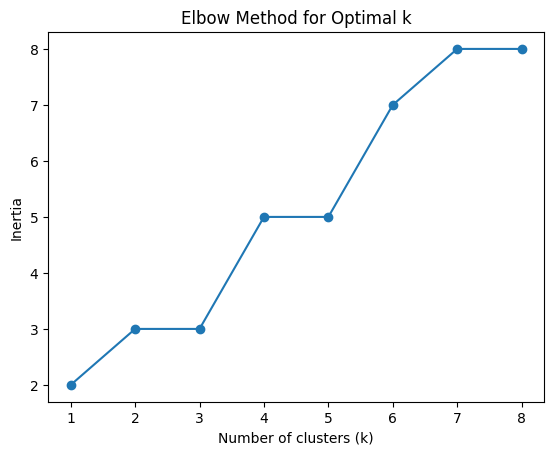

Cluster 1 (k=2): ['The football match was exciting and ended in a draw.', 'Scientists have discovered a new technology to improve battery life.', 'Climate change is causing severe weather patterns around the world.', 'The president gave a speech about the new economic plans.', 'The basketball team won the championship after a tough game.', 'A new smartphone with advanced features has been released.', 'Environmentalists are calling for more action to protect the planet.']
Cluster 2 (k=2): ['The government has introduced new policies to improve the economy.']
Cluster 1 (k=4): ['Climate change is causing severe weather patterns around the world.', 'The president gave a speech about the new economic plans.', 'The basketball team won the championship after a tough game.', 'A new smartphone with advanced features has been released.', 'Environmentalists are calling for more action to protect the planet.']
Cluster 2 (k=4): ['The government has introduced new policies to improve the economy.']


In [ ]:
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import random
import matplotlib.pyplot as plt

# Function to create semantic graph for each document
def create_semantic_graph(documents):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()
    graphs = []

    for i, doc in enumerate(documents):
        graph = nx.DiGraph()
        feature_counts = X[i].toarray().flatten()

        # Add nodes with weights
        for j, count in enumerate(feature_counts):
            if count > 0:
                graph.add_node(feature_names[j], weight=count)

        # Add edges based on the order of appearance in the document
        words = doc.split()
        for k in range(len(words) - 1):
            if words[k] in feature_names and words[k + 1] in feature_names:
                if graph.has_edge(words[k], words[k + 1]):
                    graph[words[k]][words[k + 1]]['weight'] += 1
                else:
                    graph.add_edge(words[k], words[k + 1], weight=1)

        graphs.append(graph)

    return graphs

# Function to optimize the graph structure
def optimize_graph_structure(graphs, similarity_threshold=0.5):
    optimized_graphs = []

    for graph in graphs:
        # Merge nodes with high semantic similarity
        nodes = list(graph.nodes)
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                if nx.simrank_similarity(graph, nodes[i], nodes[j]) > similarity_threshold:
                    graph = nx.contracted_nodes(graph, nodes[i], nodes[j], self_loops=False)

        optimized_graphs.append(graph)

    return optimized_graphs

# Function to calculate the maximum common subgraph
def max_common_subgraph(g1, g2):
    matcher = nx.algorithms.isomorphism.GraphMatcher(g1, g2)
    common_subgraph = nx.Graph()

    for subgraph in matcher.subgraph_isomorphisms_iter():
        subgraph_nodes = list(subgraph.keys())
        subgraph_edges = g1.subgraph(subgraph_nodes).edges
        common_subgraph.add_nodes_from(subgraph_nodes)
        common_subgraph.add_edges_from(subgraph_edges)

    return common_subgraph

# Function to calculate graph similarity
def graph_similarity(g1, g2):
    common_subgraph = max_common_subgraph(g1, g2)
    max_nodes = max(len(g1.nodes), len(g2.nodes))
    max_edges = max(len(g1.edges), len(g2.edges))

    node_similarity = len(common_subgraph.nodes) / max_nodes
    edge_similarity = len(common_subgraph.edges) / max_edges

    similarity = 0.5 * node_similarity + 0.5 * edge_similarity
    return similarity

# Function to perform K-means clustering
def k_means_clustering(graphs, k, max_iter=100):
    if k > len(graphs):
        raise ValueError("k cannot be larger than the number of graphs")

    initial_indices = random.sample(range(len(graphs)), k)
    centroids = [graphs[i] for i in initial_indices]
    clusters = [[] for _ in range(k)]

    for _ in range(max_iter):
        clusters = [[] for _ in range(k)]

        for graph in graphs:
            similarities = [graph_similarity(graph, centroid) for centroid in centroids]
            cluster_index = np.argmax(similarities)
            clusters[cluster_index].append(graph)

        new_centroids = []
        for cluster in clusters:
            if cluster:
                distances = np.zeros((len(cluster), len(cluster)))
                for i, g1 in enumerate(cluster):
                    for j, g2 in enumerate(cluster):
                        distances[i, j] = 1 - graph_similarity(g1, g2)

                avg_distances = distances.mean(axis=1)
                new_centroid = cluster[np.argmin(avg_distances)]
                new_centroids.append(new_centroid)
            else:
                # Select a new centroid from non-empty clusters
                non_empty_clusters = [c for c in clusters if c]
                if non_empty_clusters:
                    random_cluster = random.choice(non_empty_clusters)
                    new_centroids.append(random.choice(random_cluster))
                else:
                    # If all clusters are empty, reselect random initial centroids
                    new_centroids = [graphs[i] for i in random.sample(range(len(graphs)), k)]
                    break

        if all(nx.is_isomorphic(centroids[i], new_centroids[i]) for i in range(k)):
            break

        centroids = new_centroids

    return clusters, centroids

# Function to calculate inertia for each k
def calculate_inertia(graphs, k_range):
    inertias = []
    for k in k_range:
        _, centroids = k_means_clustering(graphs, k)
        inertia = 0
        for graph in graphs:
            similarities = [graph_similarity(graph, centroid) for centroid in centroids]
            inertia += max(similarities)
        inertias.append(inertia)
    return inertias

# Example documents
documents = [
    "The government has introduced new policies to improve the economy.",
    "The football match was exciting and ended in a draw.",
    "Scientists have discovered a new technology to improve battery life.",
    "Climate change is causing severe weather patterns around the world.",
    "The president gave a speech about the new economic plans.",
    "The basketball team won the championship after a tough game.",
    "A new smartphone with advanced features has been released.",
    "Environmentalists are calling for more action to protect the planet."
]

# Create and optimize semantic graphs
graphs = create_semantic_graph(documents)
optimized_graphs = optimize_graph_structure(graphs)

# Determine the optimal number of clusters using the Elbow Method
k_range = range(1, len(optimized_graphs) + 1)
inertias = calculate_inertia(optimized_graphs, k_range)

# Plot the Elbow Method results
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Perform clustering with k=2
clusters_2, centroids_2 = k_means_clustering(optimized_graphs, k=2)
for i, cluster in enumerate(clusters_2):
    print(f"Cluster {i+1} (k=2): {[documents[graphs.index(g)] for g in cluster]}")

# Perform clustering with k=4
clusters_4, centroids_4 = k_means_clustering(optimized_graphs, k=4)
for i, cluster in enumerate(clusters_4):
    print(f"Cluster {i+1} (k=4): {[documents[graphs.index(g)] for g in cluster]}")


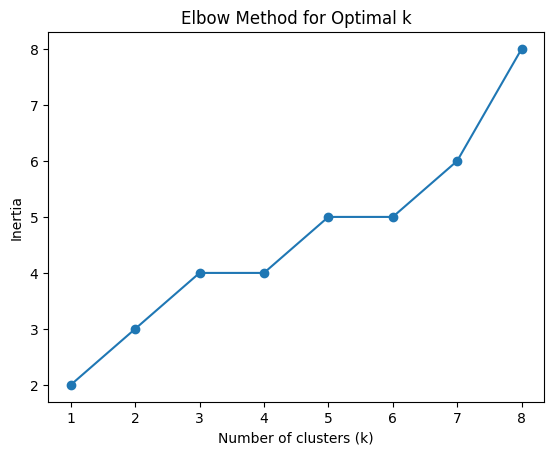

Cluster 1:
  Document: The government has introduced new policies to improve the economy.
  Similarity Score: 0.0
  Document: The football match was exciting and ended in a draw.
  Similarity Score: 0.0
  Document: Scientists have discovered a new technology to improve battery life.
  Similarity Score: 0.0
  Document: Climate change is causing severe weather patterns around the world.
  Similarity Score: 1.0
  Document: The president gave a speech about the new economic plans.
  Similarity Score: 0.0
  Document: The basketball team won the championship after a tough game.
  Similarity Score: 0.0
  Document: A new smartphone with advanced features has been released.
  Similarity Score: 0.0
  Document: Environmentalists are calling for more action to protect the planet.
  Similarity Score: 1.0


In [ ]:
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import random
import matplotlib.pyplot as plt

# Function to create semantic graph for each document
def create_semantic_graph(documents):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()
    graphs = []

    for i, doc in enumerate(documents):
        graph = nx.DiGraph()
        feature_counts = X[i].toarray().flatten()

        # Add nodes with weights
        for j, count in enumerate(feature_counts):
            if count > 0:
                graph.add_node(feature_names[j], weight=count)

        # Add edges based on the order of appearance in the document
        words = doc.split()
        for k in range(len(words) - 1):
            if words[k] in feature_names and words[k + 1] in feature_names:
                if graph.has_edge(words[k], words[k + 1]):
                    graph[words[k]][words[k + 1]]['weight'] += 1
                else:
                    graph.add_edge(words[k], words[k + 1], weight=1)

        graphs.append(graph)

    return graphs

# Function to optimize the graph structure
def optimize_graph_structure(graphs, similarity_threshold=0.5):
    optimized_graphs = []

    for graph in graphs:
        # Merge nodes with high semantic similarity
        nodes = list(graph.nodes)
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                if nx.simrank_similarity(graph, nodes[i], nodes[j]) > similarity_threshold:
                    graph = nx.contracted_nodes(graph, nodes[i], nodes[j], self_loops=False)

        optimized_graphs.append(graph)

    return optimized_graphs

# Function to calculate the maximum common subgraph
def max_common_subgraph(g1, g2):
    matcher = nx.algorithms.isomorphism.GraphMatcher(g1, g2)
    common_subgraph = nx.Graph()

    for subgraph in matcher.subgraph_isomorphisms_iter():
        subgraph_nodes = list(subgraph.keys())
        subgraph_edges = g1.subgraph(subgraph_nodes).edges
        common_subgraph.add_nodes_from(subgraph_nodes)
        common_subgraph.add_edges_from(subgraph_edges)

    return common_subgraph

# Function to calculate graph similarity
def graph_similarity(g1, g2):
    common_subgraph = max_common_subgraph(g1, g2)
    max_nodes = max(len(g1.nodes), len(g2.nodes))
    max_edges = max(len(g1.edges), len(g2.edges))

    node_similarity = len(common_subgraph.nodes) / max_nodes
    edge_similarity = len(common_subgraph.edges) / max_edges

    similarity = 0.5 * node_similarity + 0.5 * edge_similarity
    return similarity

# Function to perform K-means clustering
def k_means_clustering(graphs, k, max_iter=100):
    if k > len(graphs):
        raise ValueError("k cannot be larger than the number of graphs")

    initial_indices = random.sample(range(len(graphs)), k)
    centroids = [graphs[i] for i in initial_indices]
    clusters = [[] for _ in range(k)]
    similarity_scores = [[] for _ in range(k)]

    for _ in range(max_iter):
        clusters = [[] for _ in range(k)]
        similarity_scores = [[] for _ in range(k)]

        for graph in graphs:
            similarities = [graph_similarity(graph, centroid) for centroid in centroids]
            cluster_index = np.argmax(similarities)
            clusters[cluster_index].append(graph)
            similarity_scores[cluster_index].append(max(similarities))

        new_centroids = []
        for cluster in clusters:
            if cluster:
                distances = np.zeros((len(cluster), len(cluster)))
                for i, g1 in enumerate(cluster):
                    for j, g2 in enumerate(cluster):
                        distances[i, j] = 1 - graph_similarity(g1, g2)

                avg_distances = distances.mean(axis=1)
                new_centroid = cluster[np.argmin(avg_distances)]
                new_centroids.append(new_centroid)
            else:
                # Select a new centroid from non-empty clusters
                non_empty_clusters = [c for c in clusters if c]
                if non_empty_clusters:
                    random_cluster = random.choice(non_empty_clusters)
                    new_centroids.append(random.choice(random_cluster))
                else:
                    # If all clusters are empty, reselect random initial centroids
                    new_centroids = [graphs[i] for i in random.sample(range(len(graphs)), k)]
                    break

        if all(nx.is_isomorphic(centroids[i], new_centroids[i]) for i in range(k)):
            break

        centroids = new_centroids

    return clusters, centroids, similarity_scores

# Function to calculate inertia for each k
def calculate_inertia(graphs, k_range):
    inertias = []
    for k in k_range:
        _, centroids, _ = k_means_clustering(graphs, k)
        inertia = 0
        for graph in graphs:
            similarities = [graph_similarity(graph, centroid) for centroid in centroids]
            inertia += max(similarities)
        inertias.append(inertia)
    return inertias

# Example documents
documents = [
    "The government has introduced new policies to improve the economy.",
    "The football match was exciting and ended in a draw.",
    "Scientists have discovered a new technology to improve battery life.",
    "Climate change is causing severe weather patterns around the world.",
    "The president gave a speech about the new economic plans.",
    "The basketball team won the championship after a tough game.",
    "A new smartphone with advanced features has been released.",
    "Environmentalists are calling for more action to protect the planet."
]

# Create and optimize semantic graphs
graphs = create_semantic_graph(documents)
optimized_graphs = optimize_graph_structure(graphs)

# Determine the optimal number of clusters using the Elbow Method
k_range = range(1, len(optimized_graphs) + 1)
inertias = calculate_inertia(optimized_graphs, k_range)

# Plot the Elbow Method results
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Perform clustering with dynamically determined optimal k
optimal_k = k_range[np.argmin(inertias)]
clusters, centroids, similarity_scores = k_means_clustering(optimized_graphs, optimal_k)
for i, (cluster, scores) in enumerate(zip(clusters, similarity_scores)):
    print(f"Cluster {i+1}:")
    for graph, score in zip(cluster, scores):
        print(f"  Document: {documents[graphs.index(graph)]}")
        print(f"  Similarity Score: {score}")


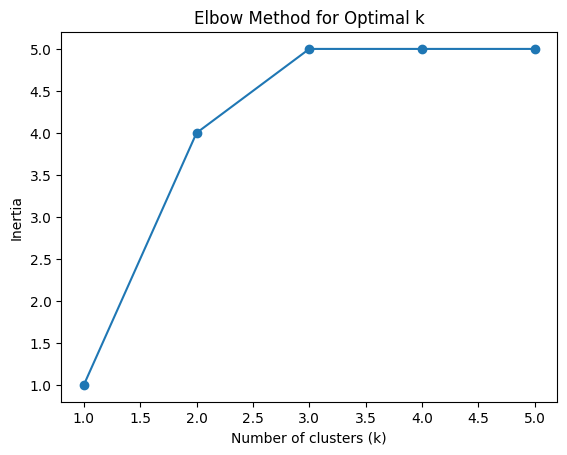

Cluster 1:
  Document: The new smartphone has an advanced camera system.
  Similarity Score: 0.00
  Document: A recent breakthrough in battery technology increases capacity.
  Similarity Score: 0.00
  Document: Tech companies are investing heavily in artificial intelligence.
  Similarity Score: 0.00
  Document: The latest laptop models offer improved performance and battery life.
  Similarity Score: 1.00
  Document: Cooking pasta requires boiling water and adding salt.
  Similarity Score: 0.00


In [ ]:
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import random
import matplotlib.pyplot as plt

# Function to create semantic graph for each document
def create_semantic_graph(documents):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()
    graphs = []

    for i, doc in enumerate(documents):
        graph = nx.DiGraph()
        feature_counts = X[i].toarray().flatten()

        # Add nodes with weights
        for j, count in enumerate(feature_counts):
            if count > 0:
                graph.add_node(feature_names[j], weight=count)

        # Add edges based on the order of appearance in the document
        words = doc.split()
        for k in range(len(words) - 1):
            if words[k] in feature_names and words[k + 1] in feature_names:
                if graph.has_edge(words[k], words[k + 1]):
                    graph[words[k]][words[k + 1]]['weight'] += 1
                else:
                    graph.add_edge(words[k], words[k + 1], weight=1)

        graphs.append(graph)

    return graphs

# Function to optimize the graph structure
def optimize_graph_structure(graphs, similarity_threshold=0.5):
    optimized_graphs = []

    for graph in graphs:
        # Merge nodes with high semantic similarity
        nodes = list(graph.nodes)
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                if nx.simrank_similarity(graph, nodes[i], nodes[j]) > similarity_threshold:
                    graph = nx.contracted_nodes(graph, nodes[i], nodes[j], self_loops=False)

        optimized_graphs.append(graph)

    return optimized_graphs

# Function to calculate the maximum common subgraph
def max_common_subgraph(g1, g2):
    matcher = nx.algorithms.isomorphism.GraphMatcher(g1, g2)
    common_subgraph = nx.Graph()

    for subgraph in matcher.subgraph_isomorphisms_iter():
        subgraph_nodes = list(subgraph.keys())
        subgraph_edges = g1.subgraph(subgraph_nodes).edges
        common_subgraph.add_nodes_from(subgraph_nodes)
        common_subgraph.add_edges_from(subgraph_edges)

    return common_subgraph

# Function to calculate graph similarity
def graph_similarity(g1, g2):
    common_subgraph = max_common_subgraph(g1, g2)
    max_nodes = max(len(g1.nodes), len(g2.nodes))
    max_edges = max(len(g1.edges), len(g2.edges))

    node_similarity = len(common_subgraph.nodes) / max_nodes
    edge_similarity = len(common_subgraph.edges) / max_edges

    similarity = 0.5 * node_similarity + 0.5 * edge_similarity
    return similarity

# Function to perform K-means clustering
def k_means_clustering(graphs, k, max_iter=100):
    if k > len(graphs):
        raise ValueError("k cannot be larger than the number of graphs")

    initial_indices = random.sample(range(len(graphs)), k)
    centroids = [graphs[i] for i in initial_indices]
    clusters = [[] for _ in range(k)]
    similarity_scores = [[] for _ in range(k)]

    for _ in range(max_iter):
        clusters = [[] for _ in range(k)]
        similarity_scores = [[] for _ in range(k)]

        for graph in graphs:
            similarities = [graph_similarity(graph, centroid) for centroid in centroids]
            cluster_index = np.argmax(similarities)
            clusters[cluster_index].append(graph)
            similarity_scores[cluster_index].append(similarities[cluster_index])

        new_centroids = []
        for cluster in clusters:
            if cluster:
                distances = np.zeros((len(cluster), len(cluster)))
                for i, g1 in enumerate(cluster):
                    for j, g2 in enumerate(cluster):
                        distances[i, j] = 1 - graph_similarity(g1, g2)

                avg_distances = distances.mean(axis=1)
                new_centroid = cluster[np.argmin(avg_distances)]
                new_centroids.append(new_centroid)
            else:
                # Select a new centroid from non-empty clusters
                non_empty_clusters = [c for c in clusters if c]
                if non_empty_clusters:
                    random_cluster = random.choice(non_empty_clusters)
                    new_centroids.append(random.choice(random_cluster))
                else:
                    # If all clusters are empty, reselect random initial centroids
                    new_centroids = [graphs[i] for i in random.sample(range(len(graphs)), k)]
                    break

        if all(nx.is_isomorphic(centroids[i], new_centroids[i]) for i in range(k)):
            break

        centroids = new_centroids

    return clusters, centroids, similarity_scores

# Function to calculate inertia for each k
def calculate_inertia(graphs, k_range):
    inertias = []
    for k in k_range:
        _, centroids, _ = k_means_clustering(graphs, k)
        inertia = 0
        for graph in graphs:
            similarities = [graph_similarity(graph, centroid) for centroid in centroids]
            inertia += max(similarities)
        inertias.append(inertia)
    return inertias

# Example documents
documents = [
    "The new smartphone has an advanced camera system.",
    "A recent breakthrough in battery technology increases capacity.",
    "Tech companies are investing heavily in artificial intelligence.",
    "The latest laptop models offer improved performance and battery life.",
    "Cooking pasta requires boiling water and adding salt."
]

# Create and optimize semantic graphs
graphs = create_semantic_graph(documents)
optimized_graphs = optimize_graph_structure(graphs)

# Determine the optimal number of clusters using the Elbow Method
k_range = range(1, len(optimized_graphs) + 1)
inertias = calculate_inertia(optimized_graphs, k_range)

# Plot the Elbow Method results
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Perform clustering with dynamically determined optimal k
optimal_k = k_range[np.argmin(inertias)]
clusters, centroids, similarity_scores = k_means_clustering(optimized_graphs, optimal_k)
for i, (cluster, scores) in enumerate(zip(clusters, similarity_scores)):
    print(f"Cluster {i+1}:")
    for graph, score in zip(cluster, scores):
        print(f"  Document: {documents[graphs.index(graph)]}")
        print(f"  Similarity Score: {score:.2f}")


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


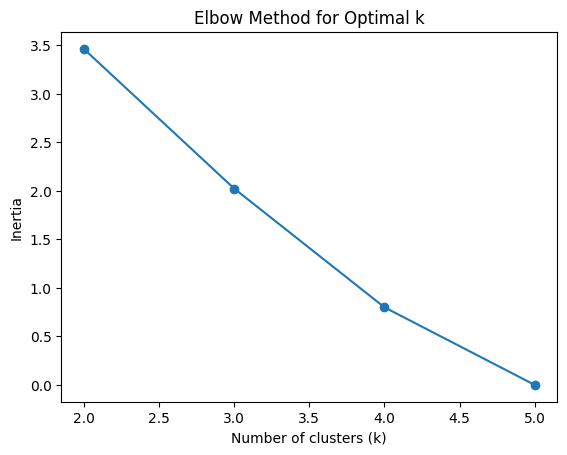

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster 0:
  - The new smartphone has an advanced camera system (Similarity: 0.46)
  - A recent breakthrough in battery technology increases capacity (Similarity: 0.46)
  - The latest laptop models offer improved performance and battery life (Similarity: 0.46)
Cluster 2:
  - Tech companies are investing heavily in artificial intelligence (Similarity: 0.40)
Cluster 1:
  - Cooking pasta requires boiling water and adding salt (Similarity: 0.37)


<ipython-input-36-fa608b9305ad>:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


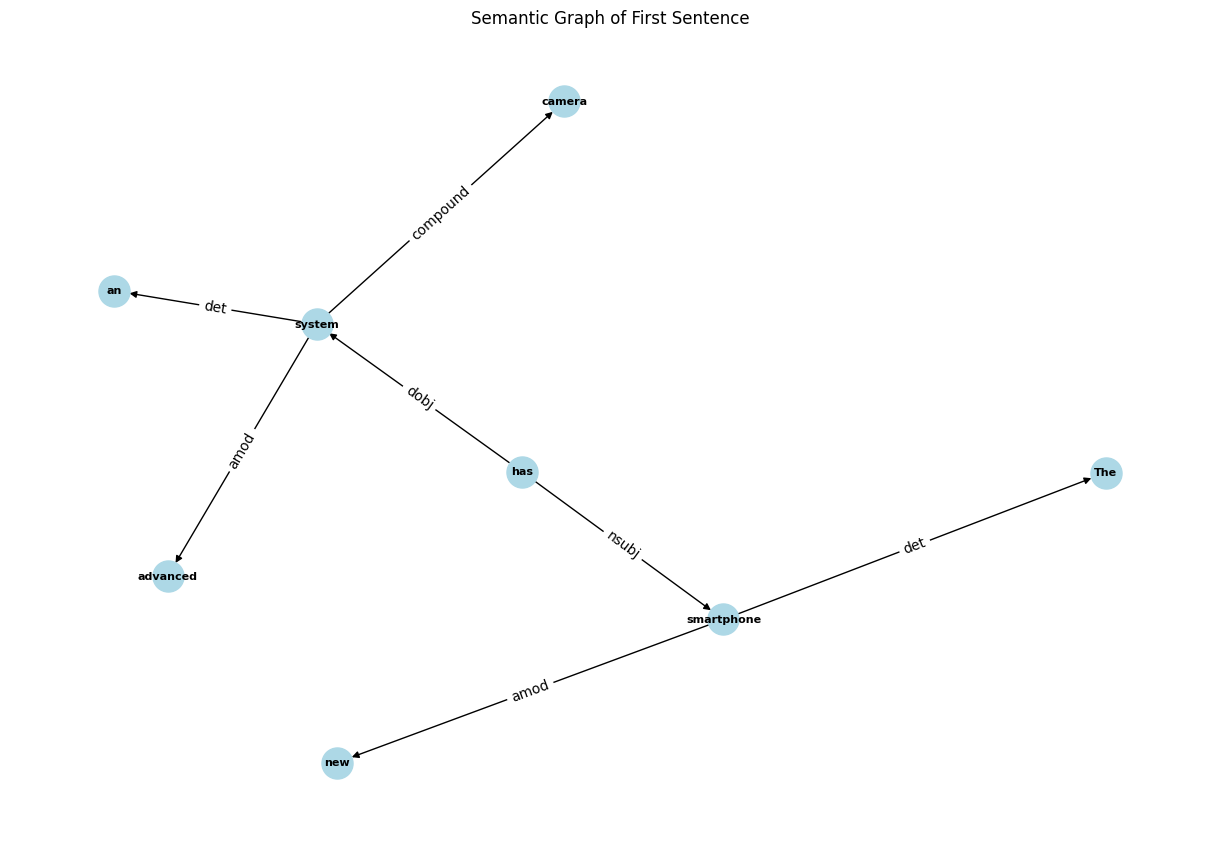

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from itertools import combinations
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def extract_svo(sentence):
    """Extract Subject-Verb-Object from a sentence."""
    doc = nlp(sentence)
    subject = verb = object_ = None
    for token in doc:
        if "subj" in token.dep_:
            subject = token.text
        elif token.dep_ == "ROOT":
            verb = token.text
        elif "obj" in token.dep_:
            object_ = token.text
    return subject, verb, object_

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.DiGraph()
    for token in doc:
        G.add_node(token.text, pos=token.pos_)
        if token.head != token:
            G.add_edge(token.head.text, token.text, relation=token.dep_)
    return G

def generate_embeddings(graph):
    """Generate embeddings for nodes and edges."""
    return {node: nlp(node).vector for node in graph.nodes()}

def extract_branches(graph, embeddings):
    """Extract branches using BFS and embed them."""
    branches = {}
    for node in graph.nodes():
        branch = []
        visited = set()
        queue = [(node, None)]
        while queue:
            current, parent = queue.pop(0)
            if current not in visited:
                visited.add(current)
                for neighbor in graph.neighbors(current):
                    edge_data = graph[current][neighbor]
                    branch.append((embeddings[neighbor], nlp(edge_data['relation']).vector))
                    queue.append((neighbor, current))
        branches[node] = branch
    return branches

def calculate_branch_similarity(branches1, branches2):
    """Calculate semantic similarity between branches."""
    def branch_vector(branch):
        return np.mean([np.concatenate([node_vec, edge_vec]) for node_vec, edge_vec in branch], axis=0)

    similarities = []
    for node1, branch1 in branches1.items():
        if branch1:
            vec1 = branch_vector(branch1)
            max_sim = max(cosine_similarity([vec1], [branch_vector(b)])[0][0] if b else 0
                          for b in branches2.values())
            similarities.append((node1, max_sim))
    return similarities

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]
    embeddings = [generate_embeddings(graph) for graph in graphs]
    branches = [extract_branches(graph, emb) for graph, emb in zip(graphs, embeddings)]

    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for (i, j) in combinations(range(len(sentences)), 2):
        sim = np.mean([s for _, s in calculate_branch_similarity(branches[i], branches[j])])
        similarity_matrix[i, j] = similarity_matrix[j, i] = sim

    clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                         distance_threshold=distance_threshold if n_clusters is None else None,
                                         affinity='precomputed',
                                         linkage='average')
    labels = clustering.fit_predict(1 - similarity_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append((sentence, np.mean(similarity_matrix[labels == label], axis=0).mean()))

    return clusters, graphs

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - cosine_similarity(cluster_points))
        inertias.append(inertia)
    return inertias

def main(paragraph, max_clusters=10, distance_threshold=None):
    """Main function to run the semantic analysis and clustering."""
    try:
        sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
        graphs = [build_semantic_graph(sent) for sent in sentences]
        embeddings = [generate_embeddings(graph) for graph in graphs]
        branches = [extract_branches(graph, emb) for graph, emb in zip(graphs, embeddings)]

        similarity_matrix = np.zeros((len(sentences), len(sentences)))
        for (i, j) in combinations(range(len(sentences)), 2):
            sim = np.mean([s for _, s in calculate_branch_similarity(branches[i], branches[j])])
            similarity_matrix[i, j] = similarity_matrix[j, i] = sim

        if distance_threshold is None:
            # Determine the optimal number of clusters using the Elbow Method
            k_range = range(2, min(len(sentences), max_clusters) + 1)
            inertias = calculate_inertia(similarity_matrix, k_range)

            # Plot the Elbow Method results
            plt.plot(k_range, inertias, marker='o')
            plt.xlabel('Number of clusters (k)')
            plt.ylabel('Inertia')
            plt.title('Elbow Method for Optimal k')
            plt.show()

            # Find the elbow point
            optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
            logger.info(f"Optimal number of clusters: {optimal_k}")
        else:
            optimal_k = None

        clusters, graphs = cluster_sentences(paragraph, optimal_k, distance_threshold)

        for cluster_id, sentences in clusters.items():
            print(f"Cluster {cluster_id}:")
            for sentence, similarity_score in sentences:
                print(f"  - {sentence} (Similarity: {similarity_score:.2f})")

        # Visualize the first sentence's graph as an example
        if graphs:
            visualize_graph(graphs[0], "Semantic Graph of First Sentence")

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")

# Example usage
# paragraph = (
#     "The new smartphone has an advanced camera system. "
#     "A recent breakthrough in battery technology increases capacity. "
#     "Tech companies are investing heavily in artificial intelligence. "
#     "The latest laptop models offer improved performance and battery life. "
#     "Cooking pasta requires boiling water and adding salt."
# )

# main(paragraph)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


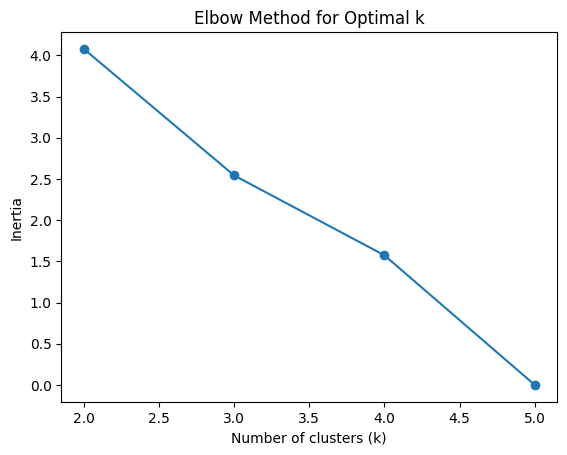

Cluster 0:
  - He ate a banana (Similarity: 0.00)
  - She drank a banana milkshake (Similarity: 0.91)
Cluster 2:
  - Banana is yellow in colour (Similarity: 0.00)
Cluster 3:
  - Learning to code in Python can open up many career opportunities (Similarity: 0.00)
Cluster 1:
  - I love coding in Python (Similarity: 0.00)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from itertools import combinations
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.DiGraph()
    for token in doc:
        G.add_node(token.text, pos=token.pos_)
        if token.head != token:
            G.add_edge(token.head.text, token.text, relation=token.dep_)
    return G

def generate_embeddings(graph):
    """Generate embeddings for nodes."""
    return {node: nlp(node).vector for node in graph.nodes()}

def extract_branches(graph, embeddings):
    """Extract branches using BFS and embed them."""
    branches = {}
    for node in graph.nodes():
        branch = []
        visited = set()
        queue = [(node, None)]
        while queue:
            current, parent = queue.pop(0)
            if current not in visited:
                visited.add(current)
                for neighbor in graph.neighbors(current):
                    edge_data = graph[current][neighbor]
                    branch.append((embeddings[neighbor], nlp(edge_data['relation']).vector))
                    queue.append((neighbor, current))
        branches[node] = branch
    return branches

def calculate_branch_similarity(branches1, branches2):
    """Calculate semantic similarity between branches."""
    def branch_vector(branch):
        return np.mean([np.concatenate([node_vec, edge_vec]) for node_vec, edge_vec in branch], axis=0)

    similarities = []
    for node1, branch1 in branches1.items():
        if branch1:
            vec1 = branch_vector(branch1)
            max_sim = max(cosine_similarity([vec1], [branch_vector(b)])[0][0] if b else 0
                          for b in branches2.values())
            similarities.append(max_sim)
    return np.mean(similarities) if similarities else 0

def create_similarity_matrix(sentences):
    """Create a similarity matrix based on branch similarity."""
    graphs = [build_semantic_graph(sent) for sent in sentences]
    embeddings = [generate_embeddings(graph) for graph in graphs]
    branches = [extract_branches(graph, emb) for graph, emb in zip(graphs, embeddings)]

    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for i, j in combinations(range(len(sentences)), 2):
        sim = calculate_branch_similarity(branches[i], branches[j])
        similarity_matrix[i, j] = similarity_matrix[j, i] = sim
        logger.info(f"Similarity between '{sentences[i]}' and '{sentences[j]}': {sim:.2f}")

    return similarity_matrix

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    similarity_matrix = create_similarity_matrix(sentences)

    clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                         distance_threshold=distance_threshold if n_clusters is None else None,
                                         affinity='precomputed',
                                         linkage='average')
    labels = clustering.fit_predict(1 - similarity_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    return clusters, labels, similarity_matrix

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - cosine_similarity(cluster_points))
        inertias.append(inertia)
    return inertias

def main(paragraph, max_clusters=10, distance_threshold=None):
    """Main function to run the semantic analysis and clustering."""
    try:
        sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

        similarity_matrix = create_similarity_matrix(sentences)

        if distance_threshold is None:
            # Determine the optimal number of clusters using the Elbow Method
            k_range = range(2, min(len(sentences), max_clusters) + 1)
            inertias = calculate_inertia(similarity_matrix, k_range)

            # Plot the Elbow Method results
            plt.plot(k_range, inertias, marker='o')
            plt.xlabel('Number of clusters (k)')
            plt.ylabel('Inertia')
            plt.title('Elbow Method for Optimal k')
            plt.show()

            # Find the elbow point
            optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
            logger.info(f"Optimal number of clusters: {optimal_k}")
        else:
            optimal_k = None

        clusters, labels, similarity_matrix = cluster_sentences(paragraph, optimal_k, distance_threshold)

        for cluster_id in clusters:
            print(f"Cluster {cluster_id}:")
            for sentence in clusters[cluster_id]:
                sentence_idx = sentences.index(sentence)
                centroid_idx = np.where(labels == cluster_id)[0][0]
                similarity_score = similarity_matrix[sentence_idx, centroid_idx]
                print(f"  - {sentence} (Similarity: {similarity_score:.2f})")

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")

# Example usage
paragraph = (
    "He ate a banana. "
    "She drank a banana milkshake. "
    "Banana is yellow in colour. "
    "Learning to code in Python can open up many career opportunities. "
    "I love coding in Python."
)

main(paragraph)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


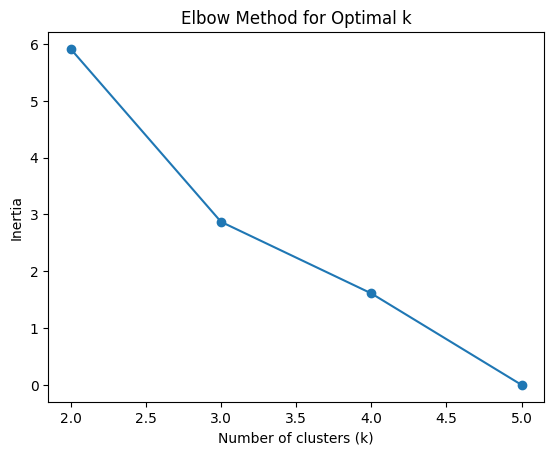

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-44-b748f0c4679a>:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Cluster 0:
  - He ate a banana (Similarity: 0.00)
  - She drank a banana milkshake (Similarity: 0.91)
Cluster 3:
  - Banana is yellow in colour (Similarity: 0.00)
Cluster 2:
  - Learning to code in python can open up many career opportunities (Similarity: 0.00)
Cluster 1:
  - I love coding python (Similarity: 0.00)


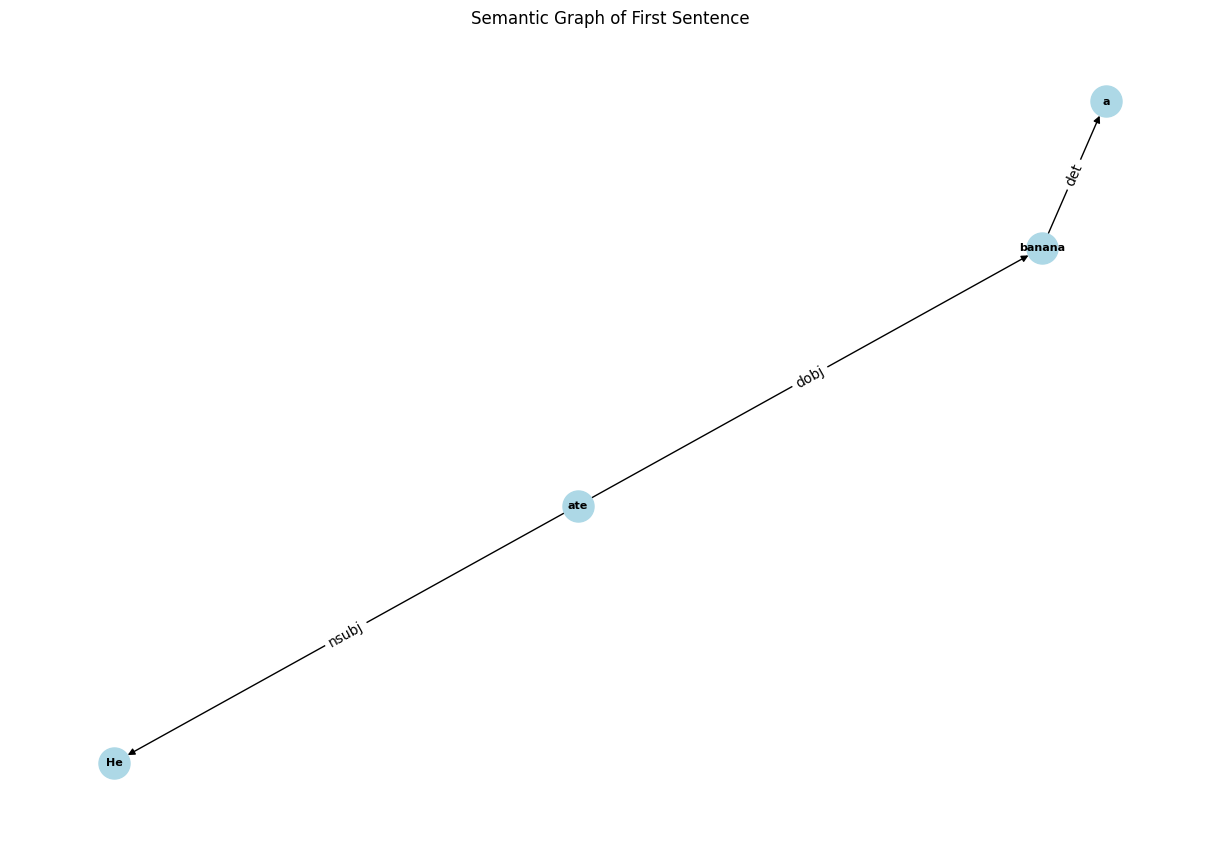

In [ ]:
# Example usage
paragraph = (
    "He ate a banana. "
    "She drank a banana milkshake. "
    "Banana is yellow in colour. "
    "Learning to code in python can open up many career opportunities."
    "I love coding python."
)

main(paragraph)

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from itertools import combinations
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def extract_svo(sentence):
    """Extract Subject-Verb-Object from a sentence."""
    doc = nlp(sentence)
    subject = verb = object_ = None
    for token in doc:
        if "subj" in token.dep_:
            subject = token.text
        elif token.dep_ == "ROOT":
            verb = token.text
        elif "obj" in token.dep_:
            object_ = token.text
    return subject, verb, object_

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.DiGraph()
    for token in doc:
        G.add_node(token.text, pos=token.pos_)
        if token.head != token:
            G.add_edge(token.head.text, token.text, relation=token.dep_)
    return G

def generate_embeddings(graph):
    """Generate embeddings for nodes and edges."""
    return {node: nlp(node).vector for node in graph.nodes()}

def extract_branches(graph, embeddings):
    """Extract branches using BFS and embed them."""
    branches = {}
    for node in graph.nodes():
        branch = []
        visited = set()
        queue = [(node, None)]
        while queue:
            current, parent = queue.pop(0)
            if current not in visited:
                visited.add(current)
                for neighbor in graph.neighbors(current):
                    edge_data = graph[current][neighbor]
                    branch.append((embeddings[neighbor], nlp(edge_data['relation']).vector))
                    queue.append((neighbor, current))
        branches[node] = branch
    return branches

def calculate_branch_similarity(branches1, branches2):
    """Calculate semantic similarity between branches."""
    def branch_vector(branch):
        return np.mean([np.concatenate([node_vec, edge_vec]) for node_vec, edge_vec in branch], axis=0)

    similarities = []
    for node1, branch1 in branches1.items():
        if branch1:
            vec1 = branch_vector(branch1)
            max_sim = max(cosine_similarity([vec1], [branch_vector(b)])[0][0] if b else 0
                          for b in branches2.values())
            similarities.append((node1, max_sim))
    return similarities

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]
    embeddings = [generate_embeddings(graph) for graph in graphs]
    branches = [extract_branches(graph, emb) for graph, emb in zip(graphs, embeddings)]

    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for (i, j) in combinations(range(len(sentences)), 2):
        sim = np.mean([s for _, s in calculate_branch_similarity(branches[i], branches[j])])
        similarity_matrix[i, j] = similarity_matrix[j, i] = sim

    clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                         distance_threshold=distance_threshold if n_clusters is None else None,
                                         affinity='precomputed',
                                         linkage='average')
    labels = clustering.fit_predict(1 - similarity_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append((sentence, np.mean(similarity_matrix[label])))

    return clusters, graphs

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def main(paragraph, n_clusters=None, distance_threshold=1):
    """Main function to run the semantic analysis and clustering."""
    try:
        clusters, graphs = cluster_sentences(paragraph, n_clusters, distance_threshold)

        for cluster_id, sentences in clusters.items():
            print(f"Cluster {cluster_id}:")
            for sentence, similarity_score in sentences:
                print(f"  - {sentence} (Similarity: {similarity_score:.2f})")

        # Visualize the first sentence's graph as an example
        if graphs:
            visualize_graph(graphs[0], "Semantic Graph of First Sentence")

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-49-7ac9c541c28c>:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Cluster 3:
  - Artificial intelligence (AI) is rapidly transforming many industries (Similarity: 0.53)
Cluster 2:
  - Machine learning, a subset of AI, allows systems to learn from data and improve over time without being explicitly programmed (Similarity: 0.56)
Cluster 0:
  - Natural language processing (NLP) enables computers to understand and generate human language, which has applications in chatbots and virtual assistants (Similarity: 0.34)
  - Computer vision, another branch of AI, allows machines to interpret and process visual information from the world, such as images and videos (Similarity: 0.34)
Cluster 1:
  - AI is also making strides in healthcare, where it is used for diagnosis and personalized treatment plans (Similarity: 0.49)


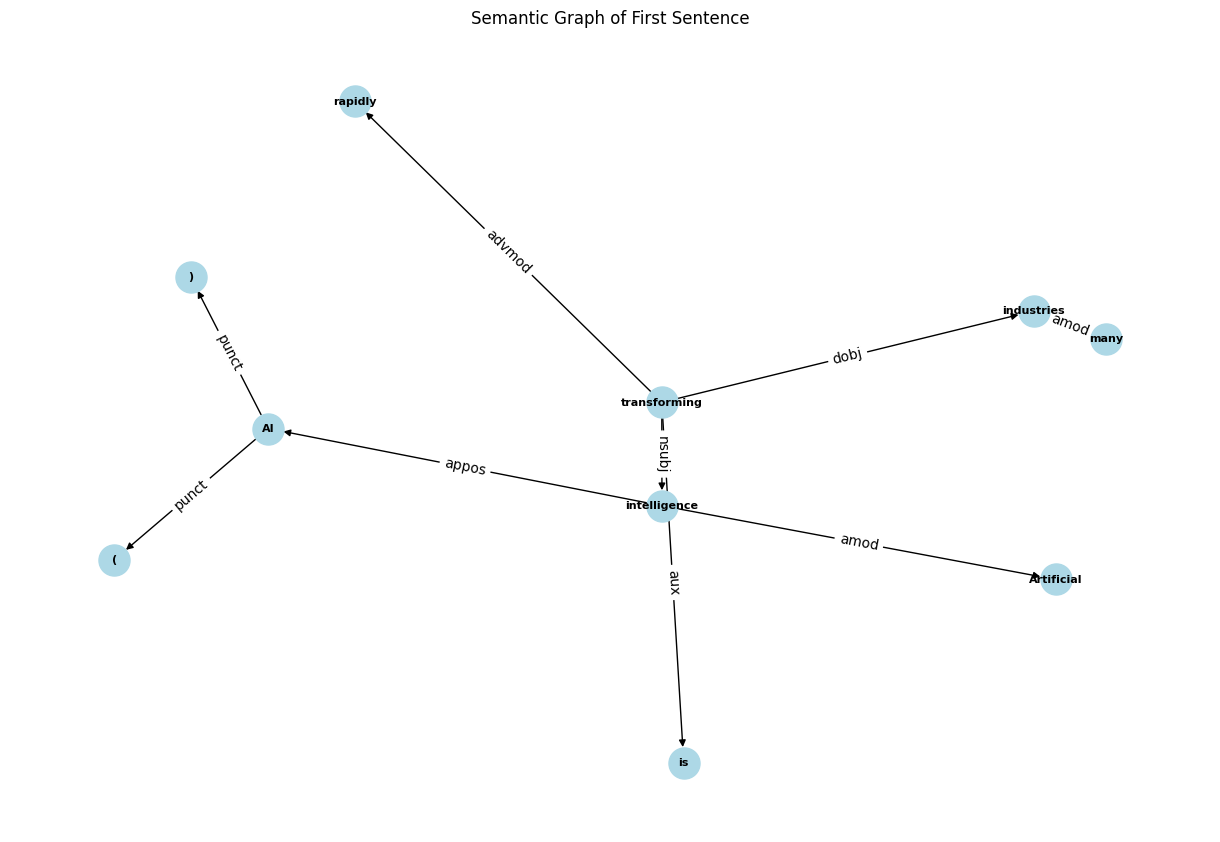

In [ ]:
if __name__ == "__main__":
   paragraph = """Artificial intelligence (AI) is rapidly transforming many industries. Machine learning, a subset of AI, allows systems to learn from data and improve over time without being explicitly programmed. Natural language processing (NLP) enables computers to understand and generate human language, which has applications in chatbots and virtual assistants. Computer vision, another branch of AI, allows machines to interpret and process visual information from the world, such as images and videos. AI is also making strides in healthcare, where it is used for diagnosis and personalized treatment plans."""
   main(paragraph, n_clusters=4)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

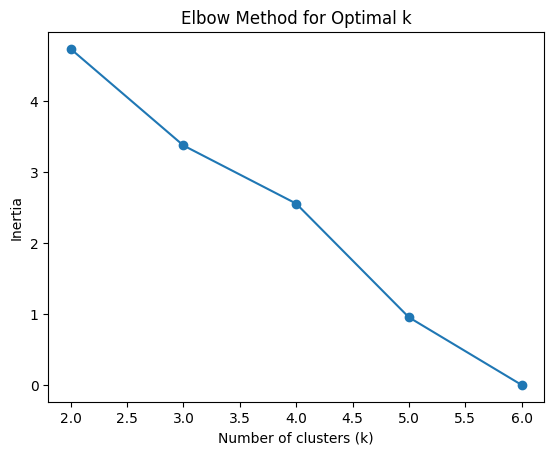

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-55-8299265be6f0>:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Cluster 0:
  - He ate a banana (Similarity: 0.00)
  - She drank a banana milkshake (Similarity: 0.91)
  - Python is a programming language (Similarity: 0.79)
Cluster 2:
  - Banana is yellow in colour (Similarity: 0.00)
Cluster 3:
  - Learning to code in Python can open up many career opportunities (Similarity: 0.00)
Cluster 1:
  - I love coding in Python (Similarity: 0.00)


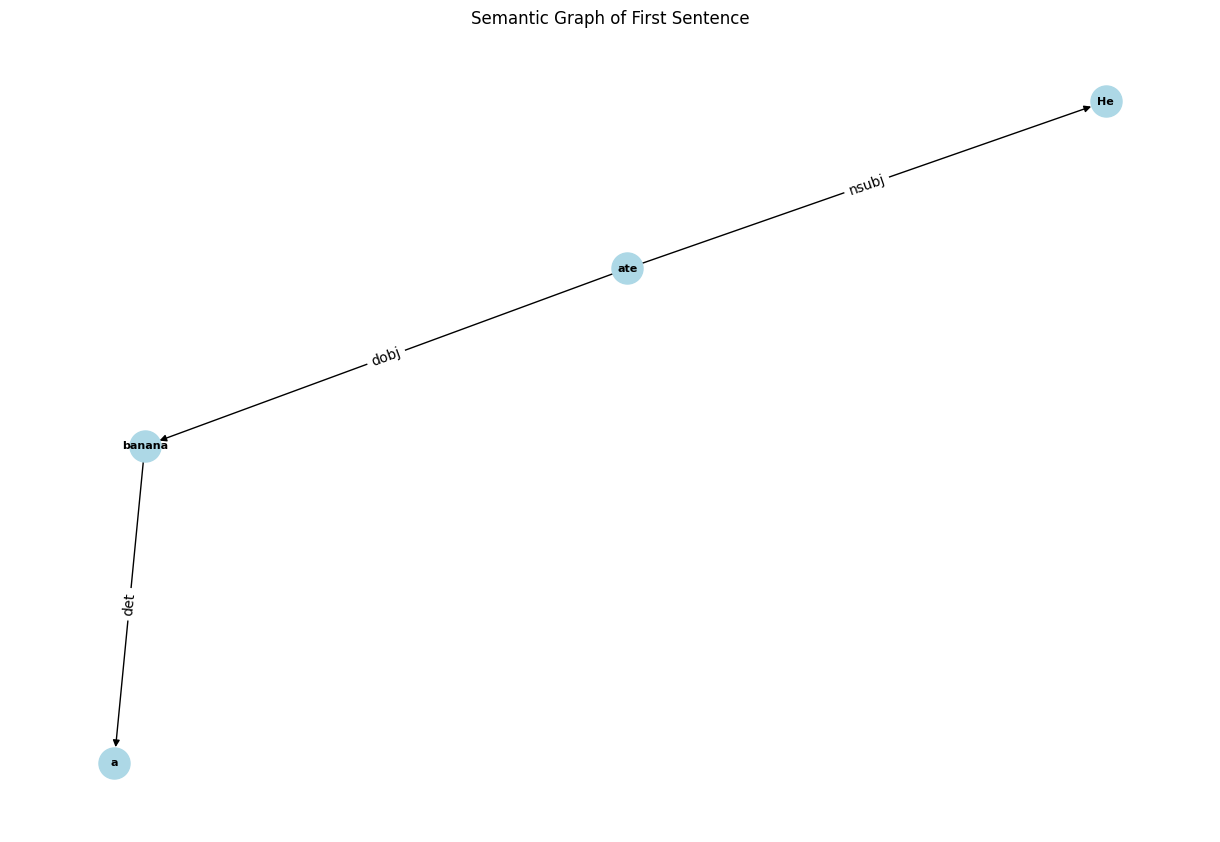

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from itertools import combinations
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def extract_svo(sentence):
    """Extract Subject-Verb-Object from a sentence."""
    doc = nlp(sentence)
    subject = verb = object_ = None
    for token in doc:
        if "subj" in token.dep_:
            subject = token.text
        elif token.dep_ == "ROOT":
            verb = token.text
        elif "obj" in token.dep_:
            object_ = token.text
    return subject, verb, object_

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.DiGraph()
    for token in doc:
        G.add_node(token.text, pos=token.pos_)
        if token.head != token:
            G.add_edge(token.head.text, token.text, relation=token.dep_)
    return G

def generate_embeddings(graph):
    """Generate embeddings for nodes and edges."""
    return {node: nlp(node).vector for node in graph.nodes()}

def extract_branches(graph, embeddings):
    """Extract branches using BFS and embed them."""
    branches = {}
    for node in graph.nodes():
        branch = []
        visited = set()
        queue = [(node, None)]
        while queue:
            current, parent = queue.pop(0)
            if current not in visited:
                visited.add(current)
                for neighbor in graph.neighbors(current):
                    edge_data = graph[current][neighbor]
                    branch.append((embeddings[neighbor], nlp(edge_data['relation']).vector))
                    queue.append((neighbor, current))
        branches[node] = branch
    return branches

def calculate_branch_similarity(branches1, branches2):
    """Calculate semantic similarity between branches."""
    def branch_vector(branch):
        return np.mean([np.concatenate([node_vec, edge_vec]) for node_vec, edge_vec in branch], axis=0)

    similarities = []
    for node1, branch1 in branches1.items():
        if branch1:
            vec1 = branch_vector(branch1)
            max_sim = max(cosine_similarity([vec1], [branch_vector(b)])[0][0] if b else 0
                          for b in branches2.values())
            similarities.append(max_sim)
    return np.mean(similarities) if similarities else 0

def create_similarity_matrix(sentences):
    """Create a similarity matrix based on branch similarity."""
    graphs = [build_semantic_graph(sent) for sent in sentences]
    embeddings = [generate_embeddings(graph) for graph in graphs]
    branches = [extract_branches(graph, emb) for graph, emb in zip(graphs, embeddings)]

    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for i, j in combinations(range(len(sentences)), 2):
        sim = calculate_branch_similarity(branches[i], branches[j])
        similarity_matrix[i, j] = similarity_matrix[j, i] = sim
        logger.info(f"Similarity between '{sentences[i]}' and '{sentences[j]}': {sim:.2f}")

    return similarity_matrix

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    similarity_matrix = create_similarity_matrix(sentences)

    clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                         distance_threshold=distance_threshold if n_clusters is None else None,
                                         affinity='precomputed',
                                         linkage='average')
    labels = clustering.fit_predict(1 - similarity_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    return clusters, labels, similarity_matrix

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - cosine_similarity(cluster_points))
        inertias.append(inertia)
    return inertias

def main(paragraph, max_clusters=10, distance_threshold=None):
    """Main function to run the semantic analysis and clustering."""
    try:
        sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

        similarity_matrix = create_similarity_matrix(sentences)

        if distance_threshold is None:
            # Determine the optimal number of clusters using the Elbow Method
            k_range = range(2, min(len(sentences), max_clusters) + 1)
            inertias = calculate_inertia(similarity_matrix, k_range)

            # Plot the Elbow Method results
            plt.plot(k_range, inertias, marker='o')
            plt.xlabel('Number of clusters (k)')
            plt.ylabel('Inertia')
            plt.title('Elbow Method for Optimal k')
            plt.show()

            # Find the elbow point
            optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
            logger.info(f"Optimal number of clusters: {optimal_k}")
        else:
            optimal_k = None

        clusters, labels, similarity_matrix = cluster_sentences(paragraph, optimal_k, distance_threshold)

        for cluster_id in clusters:
            print(f"Cluster {cluster_id}:")
            for sentence in clusters[cluster_id]:
                sentence_idx = sentences.index(sentence)
                centroid_idx = np.where(labels == cluster_id)[0][0]
                similarity_score = similarity_matrix[sentence_idx, centroid_idx]
                print(f"  - {sentence} (Similarity: {similarity_score:.2f})")

        # Visualize the first sentence's graph as an example
        if len(sentences) > 0:
            visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")

# Example usage
paragraph = (
    "He ate a banana. "
    "She drank a banana milkshake. "
    "Banana is yellow in colour. "
    "Learning to code in Python can open up many career opportunities. "
    "I love coding in Python."
)

main(paragraph)


Similarity matrix shape: (5, 5)
Branch vector: [-2.2032733  3.0224667 -2.6059167  2.4717     2.0649931]...
Branch vector: [-0.4359549  1.4147251 -2.4319375  1.41425    2.24647  ]...
Branch vector: [-0.4359549  1.4147251 -2.4319375  1.41425    2.24647  ]...
Branch vector: [-4.57756   3.4305   -3.452375  3.2009    5.03924 ]...
Branch vector: [-4.57756   3.4305   -3.452375  3.2009    5.03924 ]...
Similarity for node ate: 0.8947087526321411
Branch vector: [-9.3629  9.2761 -7.2708  4.3879 10.316 ]...
Branch vector: [-0.4359549  1.4147251 -2.4319375  1.41425    2.24647  ]...
Branch vector: [-0.4359549  1.4147251 -2.4319375  1.41425    2.24647  ]...
Branch vector: [-4.57756   3.4305   -3.452375  3.2009    5.03924 ]...
Branch vector: [-4.57756   3.4305   -3.452375  3.2009    5.03924 ]...
Similarity for node banana: 0.921258807182312
Similarity between sentence 0 and 1: 0.9080
Branch vector: [-2.2032733  3.0224667 -2.6059167  2.4717     2.0649931]...
Branch vector: [-3.798025   0.58979   -3.279

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


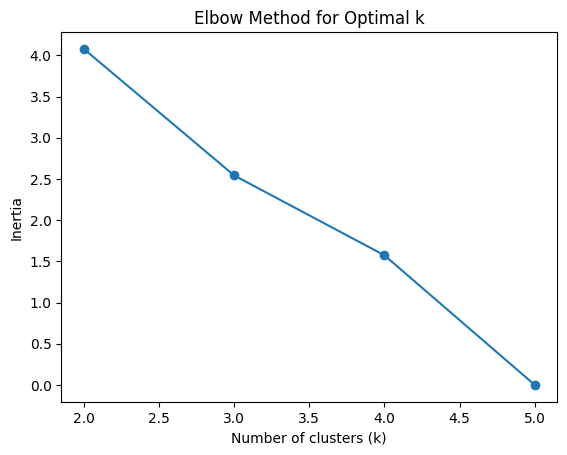

Similarity matrix shape: (5, 5)
Branch vector: [-2.2032733  3.0224667 -2.6059167  2.4717     2.0649931]...
Branch vector: [-0.4359549  1.4147251 -2.4319375  1.41425    2.24647  ]...
Branch vector: [-0.4359549  1.4147251 -2.4319375  1.41425    2.24647  ]...
Branch vector: [-4.57756   3.4305   -3.452375  3.2009    5.03924 ]...
Branch vector: [-4.57756   3.4305   -3.452375  3.2009    5.03924 ]...
Similarity for node ate: 0.8947087526321411
Branch vector: [-9.3629  9.2761 -7.2708  4.3879 10.316 ]...
Branch vector: [-0.4359549  1.4147251 -2.4319375  1.41425    2.24647  ]...
Branch vector: [-0.4359549  1.4147251 -2.4319375  1.41425    2.24647  ]...
Branch vector: [-4.57756   3.4305   -3.452375  3.2009    5.03924 ]...
Branch vector: [-4.57756   3.4305   -3.452375  3.2009    5.03924 ]...
Similarity for node banana: 0.921258807182312
Similarity between sentence 0 and 1: 0.9080
Branch vector: [-2.2032733  3.0224667 -2.6059167  2.4717     2.0649931]...
Branch vector: [-3.798025   0.58979   -3.279

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-57-56e14590b4ec>:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Clustering labels: [0 0 2 3 1]
Cluster 0:
  - He ate a banana (Similarity: 0.00)
  - She drank a banana milkshake (Similarity: 0.91)
Cluster 2:
  - Banana is yellow in colour (Similarity: 0.00)
Cluster 3:
  - Learning to code in Python can open up many career opportunities (Similarity: 0.00)
Cluster 1:
  - I love coding in Python (Similarity: 0.00)


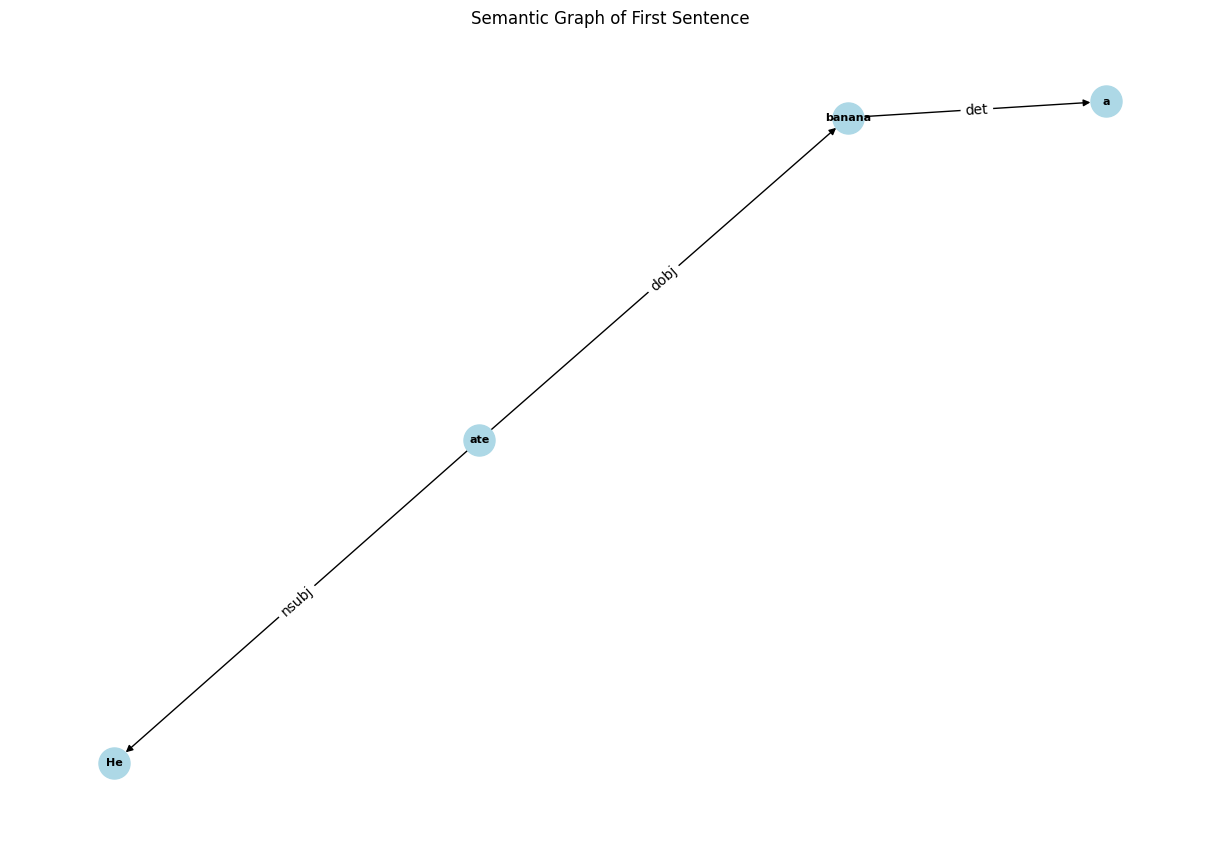

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from itertools import combinations
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def extract_svo(sentence):
    """Extract Subject-Verb-Object from a sentence."""
    doc = nlp(sentence)
    subject = verb = object_ = None
    for token in doc:
        if "subj" in token.dep_:
            subject = token.text
        elif token.dep_ == "ROOT":
            verb = token.text
        elif "obj" in token.dep_:
            object_ = token.text
    return subject, verb, object_

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.DiGraph()
    for token in doc:
        G.add_node(token.text, pos=token.pos_)
        if token.head != token:
            G.add_edge(token.head.text, token.text, relation=token.dep_)
    return G

def generate_embeddings(graph):
    """Generate embeddings for nodes and edges."""
    return {node: nlp(node).vector for node in graph.nodes()}

def extract_branches(graph, embeddings):
    """Extract branches using BFS and embed them."""
    branches = {}
    for node in graph.nodes():
        branch = []
        visited = set()
        queue = [(node, None)]
        while queue:
            current, parent = queue.pop(0)
            if current not in visited:
                visited.add(current)
                for neighbor in graph.neighbors(current):
                    edge_data = graph[current][neighbor]
                    branch.append((embeddings[neighbor], nlp(edge_data['relation']).vector))
                    queue.append((neighbor, current))
        branches[node] = branch
    return branches

def calculate_branch_similarity(branches1, branches2):
    """Calculate semantic similarity between branches."""
    def branch_vector(branch):
        if not branch:
            return None
        vec = np.mean([np.concatenate([node_vec, edge_vec]) for node_vec, edge_vec in branch], axis=0)
        print(f"Branch vector: {vec[:5]}...")  # Print first 5 elements
        return vec

    similarities = []
    for node1, branch1 in branches1.items():
        if branch1:
            vec1 = branch_vector(branch1)
            if vec1 is not None:
                max_sim = max((cosine_similarity([vec1], [branch_vector(b)])[0][0] if b and branch_vector(b) is not None else 0)
                              for b in branches2.values())
                similarities.append(max_sim)
                print(f"Similarity for node {node1}: {max_sim}")

    return np.mean(similarities) if similarities else 0

def create_similarity_matrix(sentences):
    """Create a similarity matrix based on branch similarity."""
    graphs = [build_semantic_graph(sent) for sent in sentences]
    embeddings = [generate_embeddings(graph) for graph in graphs]
    branches = [extract_branches(graph, emb) for graph, emb in zip(graphs, embeddings)]

    logger.info(f"Processing {len(sentences)} sentences")
    logger.info(f"Generated {len(graphs)} semantic graphs")
    logger.info(f"Extracted {len(branches)} branch sets")

    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    print(f"Similarity matrix shape: {similarity_matrix.shape}")

    for i, j in combinations(range(len(sentences)), 2):
        sim = calculate_branch_similarity(branches[i], branches[j])
        similarity_matrix[i, j] = similarity_matrix[j, i] = sim
        print(f"Similarity between sentence {i} and {j}: {sim:.4f}")
        logger.info(f"Similarity between '{sentences[i]}' and '{sentences[j]}': {sim:.2f}")

    assert np.allclose(similarity_matrix, similarity_matrix.T), "Similarity matrix is not symmetric"
    print("Partial similarity matrix:")
    print(similarity_matrix[:5, :5])  # Print first 5x5 submatrix

    return similarity_matrix

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    similarity_matrix = create_similarity_matrix(sentences)

    distance_matrix = 1 - similarity_matrix
    print("Distance matrix (first 5x5):")
    print(distance_matrix[:5, :5])

    assert np.all((distance_matrix >= 0) & (distance_matrix <= 1)), "Distance matrix values out of range [0, 1]"

    clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                         distance_threshold=distance_threshold if n_clusters is None else None,
                                         affinity='precomputed',
                                         linkage='average')
    labels = clustering.fit_predict(distance_matrix)
    print(f"Clustering labels: {labels}")

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    return clusters, labels, similarity_matrix

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - cosine_similarity(cluster_points))
        inertias.append(inertia)
    return inertias

def main(paragraph, max_clusters=10, distance_threshold=None):
    """Main function to run the semantic analysis and clustering."""
    try:
        sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

        similarity_matrix = create_similarity_matrix(sentences)

        if distance_threshold is None:
            # Determine the optimal number of clusters using the Elbow Method
            k_range = range(2, min(len(sentences), max_clusters) + 1)
            inertias = calculate_inertia(similarity_matrix, k_range)

            # Plot the Elbow Method results
            plt.plot(k_range, inertias, marker='o')
            plt.xlabel('Number of clusters (k)')
            plt.ylabel('Inertia')
            plt.title('Elbow Method for Optimal k')
            plt.show()

            # Find the elbow point
            optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
            logger.info(f"Optimal number of clusters: {optimal_k}")
        else:
            optimal_k = None

        clusters, labels, similarity_matrix = cluster_sentences(paragraph, optimal_k, distance_threshold)

        for cluster_id in clusters:
            print(f"Cluster {cluster_id}:")
            for sentence in clusters[cluster_id]:
                sentence_idx = sentences.index(sentence)
                centroid_idx = np.where(labels == cluster_id)[0][0]
                similarity_score = similarity_matrix[sentence_idx, centroid_idx]
                print(f"  - {sentence} (Similarity: {similarity_score:.2f})")

        # Visualize the first sentence's graph as an example
        if len(sentences) > 0:
            visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")

# Example usage
paragraph = (
    "He ate a banana. "
    "She drank a banana milkshake. "
    "Banana is yellow in colour. "
    "Learning to code in Python can open up many career opportunities. "
    "I love coding in Python."
)

main(paragraph)

In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Cosine Similarity for finding the similarity matrix

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from itertools import combinations
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def extract_svo(sentence):
    """Extract Subject-Verb-Object from a sentence."""
    doc = nlp(sentence)
    subject = verb = object_ = None
    for token in doc:
        if "subj" in token.dep_:
            subject = token.text
        elif token.dep_ == "ROOT":
            verb = token.text
        elif "obj" in token.dep_:
            object_ = token.text
    return subject, verb, object_

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.DiGraph()
    for token in doc:
        G.add_node(token.text, pos=token.pos_)
        if token.head != token:
            G.add_edge(token.head.text, token.text, relation=token.dep_)
    return G

def generate_embeddings(graph):
    """Generate embeddings for nodes and edges."""
    return {node: nlp(node).vector for node in graph.nodes()}

def extract_branches(graph, embeddings):
    """Extract branches using BFS and embed them."""
    branches = {}
    for node in graph.nodes():
        branch = []
        visited = set()
        queue = [(node, None)]
        while queue:
            current, parent = queue.pop(0)
            if current not in visited:
                visited.add(current)
                for neighbor in graph.neighbors(current):
                    edge_data = graph[current][neighbor]
                    branch.append((embeddings[neighbor], nlp(edge_data['relation']).vector))
                    queue.append((neighbor, current))
        branches[node] = branch
    return branches

def calculate_branch_similarity(branches1, branches2):
    """Calculate semantic similarity between branches."""
    def branch_vector(branch):
        if not branch:
            return None
        vec = np.mean([np.concatenate([node_vec, edge_vec]) for node_vec, edge_vec in branch], axis=0)
        print(f"Branch vector: {vec[:5]}...")  # Print first 5 elements
        return vec

    similarities = []
    for node1, branch1 in branches1.items():
        if branch1:
            vec1 = branch_vector(branch1)
            if vec1 is not None:
                max_sim = max((cosine_similarity([vec1], [branch_vector(b)])[0][0] if b and branch_vector(b) is not None else 0)
                              for b in branches2.values())
                similarities.append(max_sim)
                print(f"Similarity for node {node1}: {max_sim}")

    return np.mean(similarities) if similarities else 0

def create_similarity_matrix(sentences):
    """Create a similarity matrix based on branch similarity."""
    graphs = [build_semantic_graph(sent) for sent in sentences]
    embeddings = [generate_embeddings(graph) for graph in graphs]
    branches = [extract_branches(graph, emb) for graph, emb in zip(graphs, embeddings)]

    logger.info(f"Processing {len(sentences)} sentences")
    logger.info(f"Generated {len(graphs)} semantic graphs")
    logger.info(f"Extracted {len(branches)} branch sets")

    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    print(f"Similarity matrix shape: {similarity_matrix.shape}")

    for i, j in combinations(range(len(sentences)), 2):
        sim = calculate_branch_similarity(branches[i], branches[j])
        similarity_matrix[i, j] = similarity_matrix[j, i] = sim
        print(f"Similarity between sentence {i} and {j}: {sim:.4f}")
        logger.info(f"Similarity between '{sentences[i]}' and '{sentences[j]}': {sim:.2f}")

    assert np.allclose(similarity_matrix, similarity_matrix.T), "Similarity matrix is not symmetric"
    print("Partial similarity matrix:")
    print(similarity_matrix[:5, :5])

    return similarity_matrix

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    similarity_matrix = create_similarity_matrix(sentences)

    distance_matrix = 1 - similarity_matrix
    print("Distance matrix (first 5x5):")
    print(distance_matrix[:5, :5])

    assert np.all((distance_matrix >= 0) & (distance_matrix <= 1)), "Distance matrix values out of range [0, 1]"

    clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                         distance_threshold=distance_threshold if n_clusters is None else None,
                                         affinity='precomputed',
                                         linkage='average')
    labels = clustering.fit_predict(distance_matrix)
    print(f"Clustering labels: {labels}")

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)
    print(similarity_matrix)
    return clusters, labels, similarity_matrix

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - cosine_similarity(cluster_points))
        inertias.append(inertia)
    return inertias

def main(paragraph, max_clusters=10, distance_threshold=None):
    """Main function to run the semantic analysis and clustering."""
    try:
        sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

        similarity_matrix = create_similarity_matrix(sentences)

        if distance_threshold is None:
            # Determine the optimal number of clusters using the Elbow Method
            k_range = range(2, min(len(sentences), max_clusters) + 1)
            inertias = calculate_inertia(similarity_matrix, k_range)

            # Plot the Elbow Method results
            plt.plot(k_range, inertias, marker='o')
            plt.xlabel('Number of clusters (k)')
            plt.ylabel('Inertia')
            plt.title('Elbow Method for Optimal k')
            plt.show()

            # Find the elbow point
            optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
            logger.info(f"Optimal number of clusters: {optimal_k}")
        else:
            optimal_k = None

        clusters, labels, similarity_matrix = cluster_sentences(paragraph, optimal_k, distance_threshold)

        for cluster_id in clusters:
            print(f"Cluster {cluster_id}:")
            for sentence in clusters[cluster_id]:
                sentence_idx = sentences.index(sentence)
                centroid_idx = np.where(labels == cluster_id)[0][0]
                similarity_score = similarity_matrix[sentence_idx, centroid_idx]
                print(f"  - {sentence} (Similarity: {similarity_score:.2f})")

        # Visualize the first sentence's graph as an example
        if len(sentences) > 0:
            visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")




Similarity matrix shape: (5, 5)
Branch vector: [-7.2681  -0.85717  5.8105   1.9771   8.8147 ]...
Branch vector: [-7.2681  -0.85717  5.8105   1.9771   8.8147 ]...
Branch vector: [-7.2681  -0.85717  5.8105   1.9771   8.8147 ]...
Branch vector: [-3.7926424  3.4752326 -2.72585    0.53662    6.547275 ]...
Branch vector: [-3.7926424  3.4752326 -2.72585    0.53662    6.547275 ]...
Branch vector: [-9.3629  9.2761 -7.2708  4.3879 10.316 ]...
Branch vector: [-9.3629  9.2761 -7.2708  4.3879 10.316 ]...
Similarity for node sun: 0.9999999403953552
Branch vector: [-3.9653      1.2497101   0.38434002  1.425794    6.75058   ]...
Branch vector: [-7.2681  -0.85717  5.8105   1.9771   8.8147 ]...
Branch vector: [-7.2681  -0.85717  5.8105   1.9771   8.8147 ]...
Branch vector: [-3.7926424  3.4752326 -2.72585    0.53662    6.547275 ]...
Branch vector: [-3.7926424  3.4752326 -2.72585    0.53662    6.547275 ]...
Branch vector: [-9.3629  9.2761 -7.2708  4.3879 10.316 ]...
Branch vector: [-9.3629  9.2761 -7.2708

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


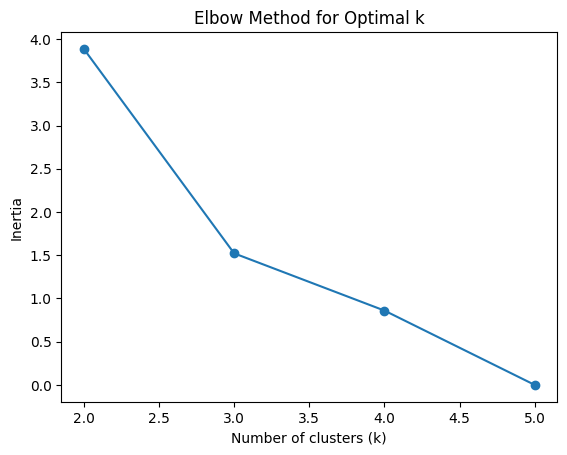

Similarity matrix shape: (5, 5)
Branch vector: [-7.2681  -0.85717  5.8105   1.9771   8.8147 ]...
Branch vector: [-7.2681  -0.85717  5.8105   1.9771   8.8147 ]...
Branch vector: [-7.2681  -0.85717  5.8105   1.9771   8.8147 ]...
Branch vector: [-3.7926424  3.4752326 -2.72585    0.53662    6.547275 ]...
Branch vector: [-3.7926424  3.4752326 -2.72585    0.53662    6.547275 ]...
Branch vector: [-9.3629  9.2761 -7.2708  4.3879 10.316 ]...
Branch vector: [-9.3629  9.2761 -7.2708  4.3879 10.316 ]...
Similarity for node sun: 0.9999999403953552
Branch vector: [-3.9653      1.2497101   0.38434002  1.425794    6.75058   ]...
Branch vector: [-7.2681  -0.85717  5.8105   1.9771   8.8147 ]...
Branch vector: [-7.2681  -0.85717  5.8105   1.9771   8.8147 ]...
Branch vector: [-3.7926424  3.4752326 -2.72585    0.53662    6.547275 ]...
Branch vector: [-3.7926424  3.4752326 -2.72585    0.53662    6.547275 ]...
Branch vector: [-9.3629  9.2761 -7.2708  4.3879 10.316 ]...
Branch vector: [-9.3629  9.2761 -7.2708

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-2-53a4231469f8>:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


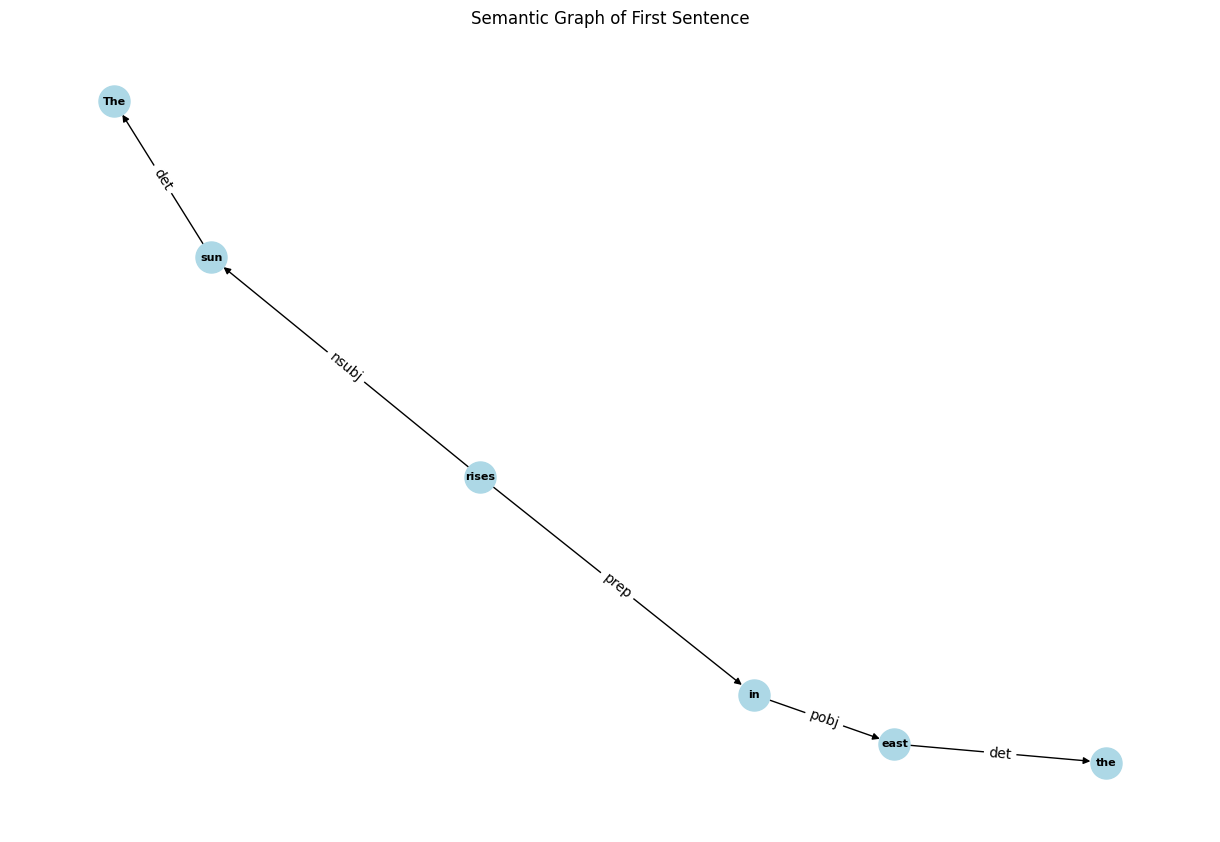

In [ ]:

paragraph = (
    "The sun rises in the east. "
    "The sun is a star. "
    "The sun is hot. "
    "The sun sets in the west. "
    "Artificial intelligence is reshaping many industries. "
)

main(paragraph)

# Using Graphs more extensively


In [ ]:
!pip install karateclub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 84.0 MB/s eta 0:00:00
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=101981 sha256=1b0aea47070c8500c40384395331f3ac7945b25463a482284258810b080a7ee3
  Stored in directory: /root/.cache/pip/wheels/62/bd/af/17e7ca6ba0ed144d22502780f5c0660a8e4985939dc6973a81
Successfully built karateclub
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      

In [ ]:
!pip install grakel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.0 MB/s eta 0:00:00


###Manual input of number of clusters

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_sm')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    # Ensure only one of n_clusters or distance_threshold is set
    if n_clusters is not None and distance_threshold is not None:
        raise ValueError("Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        distance_threshold=distance_threshold if n_clusters is None else None,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    return clusters, labels, combined_matrix

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def main(paragraph, n_clusters=None, distance_threshold=None):
    """Main function to run the semantic analysis and clustering."""
    if n_clusters is not None and distance_threshold is not None:
        logger.error("Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.")
        raise ValueError("Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.")

    try:
        clusters, labels, similarity_matrix = cluster_sentences(paragraph, n_clusters=n_clusters, distance_threshold=distance_threshold)

        for cluster_id in clusters:
            print(f"Cluster {cluster_id}:")
            for sentence in clusters[cluster_id]:
                print(f"  - {sentence}")

        # Visualize the first sentence's graph as an example
        sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
        if len(sentences) > 0:
            visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

        # Plot similarity matrix
        plt.figure(figsize=(10, 8))
        plt.imshow(similarity_matrix, cmap='viridis')
        plt.colorbar()
        plt.title("Sentence Similarity Matrix")
        plt.show()

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")

# Example usage
if __name__ == "__main__":
    paragraph = (
        "The sun rises in the east. "
        "The sun is a star. "
        "The sun is hot. "
        "The sun sets in the west. "
        "Artificial intelligence is reshaping many industries. "
    )
    main(paragraph, n_clusters=2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
ERROR:__main__:An error occurred: '_AxesStack' object is not callable


Cluster 0:
  - The sun rises in the east
  - The sun is a star
  - The sun is hot
  - The sun sets in the west
Cluster 1:
  - Artificial intelligence is reshaping many industries


<Figure size 1200x800 with 0 Axes>

###K-means clustering and elbow method to find the number of clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


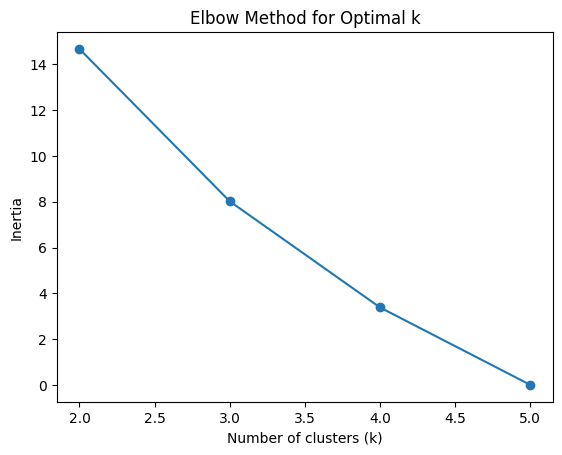

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
ERROR:__main__:An error occurred: '_AxesStack' object is not callable


Cluster 0:
  - Machine learning is a subset of artificial intelligence
  - Deep learning is a part of machine learning
Cluster 3:
  - It involves the use of algorithms to parse data
Cluster 1:
  - Machine learning enables computers to learn from data
Cluster 2:
  - The sky is blue on a clear day


<Figure size 1200x800 with 0 Axes>

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_sm')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    # Ensure only one of n_clusters or distance_threshold is set
    if n_clusters is not None and distance_threshold is not None:
        raise ValueError("Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        distance_threshold=distance_threshold if n_clusters is None else None,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    return clusters, labels, combined_matrix

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def main(paragraph, max_clusters=10, distance_threshold=None):
    """Main function to run the semantic analysis and clustering."""
    try:
        sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

        # Build semantic graphs
        graphs = [build_semantic_graph(sent) for sent in sentences]

        # Create graph embeddings
        graph_embeddings = create_graph_embeddings(graphs)

        # Calculate graph kernels
        kernel_matrix = calculate_graph_kernels(graphs)

        # Combine embeddings and kernel similarities
        combined_matrix = np.zeros((len(sentences), len(sentences)))
        for i in range(len(sentences)):
            for j in range(len(sentences)):
                embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
                kernel_sim = kernel_matrix[i, j]
                combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

        if distance_threshold is None:
            # Determine the optimal number of clusters using the Elbow Method
            k_range = range(2, min(len(sentences), max_clusters) + 1)
            inertias = calculate_inertia(combined_matrix, k_range)

            # Plot the Elbow Method results
            plt.plot(k_range, inertias, marker='o')
            plt.xlabel('Number of clusters (k)')
            plt.ylabel('Inertia')
            plt.title('Elbow Method for Optimal k')
            plt.show()

            # Find the elbow point
            optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
            logger.info(f"Optimal number of clusters: {optimal_k}")
        else:
            optimal_k = None

        clusters, labels, combined_matrix = cluster_sentences(paragraph, n_clusters=optimal_k, distance_threshold=distance_threshold)

        for cluster_id in clusters:
            print(f"Cluster {cluster_id}:")
            for sentence in clusters[cluster_id]:
                print(f"  - {sentence}")

        # Visualize the first sentence's graph as an example
        if len(sentences) > 0:
            visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

        # Plot similarity matrix
        plt.figure(figsize=(10, 8))
        plt.imshow(combined_matrix, cmap='viridis')
        plt.colorbar()
        plt.title("Sentence Similarity Matrix")
        plt.show()

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")

# Example usage
if __name__ == "__main__":

    paragraph = (
        "Machine learning is a subset of artificial intelligence. "
        "It involves the use of algorithms to parse data. "
        "Machine learning enables computers to learn from data. "
        "The sky is blue on a clear day. "
        "Deep learning is a part of machine learning. "
    )
    main(paragraph, max_clusters=10)


###Enhancements

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


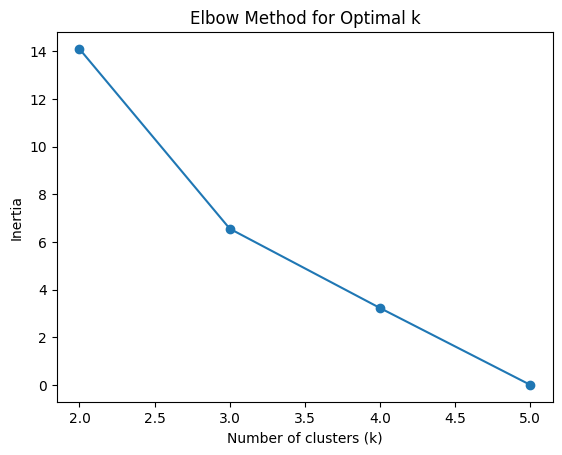

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
ERROR:__main__:An error occurred: '_AxesStack' object is not callable


Cluster 3:
  - The sun rises in the east
Cluster 0:
  - The sun is a star
  - The sun is hot
Cluster 2:
  - The sun sets in the west
Cluster 1:
  - Artificial intelligence is reshaping many industries


<Figure size 1200x800 with 0 Axes>

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    # Ensure only one of n_clusters or distance_threshold is set
    if n_clusters is not None and distance_threshold is not None:
        raise ValueError("Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        distance_threshold=distance_threshold if n_clusters is None else None,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    return clusters, labels, combined_matrix

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def main(paragraph, max_clusters=10, distance_threshold=None):
    """Main function to run the semantic analysis and clustering."""
    try:
        sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

        # Build semantic graphs
        graphs = [build_semantic_graph(sent) for sent in sentences]

        # Create graph embeddings
        graph_embeddings = create_graph_embeddings(graphs)

        # Calculate graph kernels
        kernel_matrix = calculate_graph_kernels(graphs)

        # Combine embeddings and kernel similarities
        combined_matrix = np.zeros((len(sentences), len(sentences)))
        for i in range(len(sentences)):
            for j in range(len(sentences)):
                embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
                kernel_sim = kernel_matrix[i, j]
                combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

        if distance_threshold is None:
            # Determine the optimal number of clusters using the Elbow Method
            k_range = range(2, min(len(sentences), max_clusters) + 1)
            inertias = calculate_inertia(combined_matrix, k_range)

            # Plot the Elbow Method results
            plt.plot(k_range, inertias, marker='o')
            plt.xlabel('Number of clusters (k)')
            plt.ylabel('Inertia')
            plt.title('Elbow Method for Optimal k')
            plt.show()

            # Find the elbow point
            optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
            logger.info(f"Optimal number of clusters: {optimal_k}")
        else:
            optimal_k = None

        clusters, labels, combined_matrix = cluster_sentences(paragraph, n_clusters=optimal_k, distance_threshold=distance_threshold)

        for cluster_id in clusters:
            print(f"Cluster {cluster_id}:")
            for sentence in clusters[cluster_id]:
                print(f"  - {sentence}")

        # Visualize the first sentence's graph as an example
        if len(sentences) > 0:
            visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

        # Plot similarity matrix
        plt.figure(figsize=(10, 8))
        plt.imshow(combined_matrix, cmap='viridis')
        plt.colorbar()
        plt.title("Sentence Similarity Matrix")
        plt.show()

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")

# Example usage
if __name__ == "__main__":
    paragraph = (
        "The sun rises in the east. "
        "The sun is a star. "
        "The sun is hot. "
        "The sun sets in the west. "
        "Artificial intelligence is reshaping many industries. "
    )
    main(paragraph, max_clusters=10)


###Printing similarity matrices and similarity scores


Graph Embeddings:
[[ 1.25088720e-02  1.46559495e-02  1.24861822e-02 -1.19878808e-02
  -1.32710235e-02 -7.09014339e-03 -6.70668576e-03  7.20653357e-03
  -1.04232691e-02 -1.32306684e-02 -7.23531423e-03  1.51923103e-02
  -7.29200570e-03  2.34139781e-03  1.37538370e-02  6.78220950e-03
  -1.52019958e-03  1.46025484e-02 -9.30398982e-03  8.64621904e-03
   6.30702497e-03 -5.50610526e-03 -1.45624462e-03 -1.37877632e-02
   8.61202716e-05 -4.15823050e-03  1.55148953e-02 -7.38263642e-03
  -1.05732027e-02  1.75812445e-03 -1.22317439e-02 -1.24616669e-02
  -1.02582248e-02 -9.53838695e-03 -6.80030417e-03 -3.08087817e-03
  -3.88253340e-03  9.02255438e-03  1.06977383e-02 -7.09823659e-03
  -9.91761032e-03  1.22173305e-03 -7.04773189e-03  4.05069441e-05
   1.12346616e-02  6.08003978e-03 -8.47262051e-03 -2.01413408e-03
   2.85682734e-04 -1.26540642e-02  1.54347606e-02  1.30146910e-02
  -4.59882758e-05  9.16629750e-03  7.05399830e-03  1.35542778e-02
   5.71704935e-03 -1.45186111e-02 -3.83499544e-03  5.6229

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


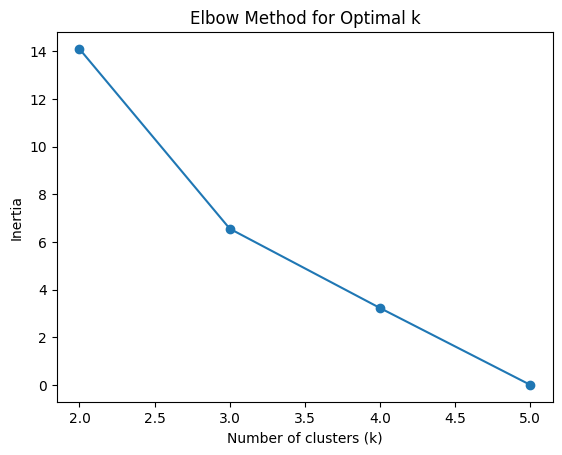

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
ERROR:__main__:An error occurred: '_AxesStack' object is not callable



Graph Embeddings:
[[ 1.25088720e-02  1.46559495e-02  1.24861822e-02 -1.19878808e-02
  -1.32710235e-02 -7.09014339e-03 -6.70668576e-03  7.20653357e-03
  -1.04232691e-02 -1.32306684e-02 -7.23531423e-03  1.51923103e-02
  -7.29200570e-03  2.34139781e-03  1.37538370e-02  6.78220950e-03
  -1.52019958e-03  1.46025484e-02 -9.30398982e-03  8.64621904e-03
   6.30702497e-03 -5.50610526e-03 -1.45624462e-03 -1.37877632e-02
   8.61202716e-05 -4.15823050e-03  1.55148953e-02 -7.38263642e-03
  -1.05732027e-02  1.75812445e-03 -1.22317439e-02 -1.24616669e-02
  -1.02582248e-02 -9.53838695e-03 -6.80030417e-03 -3.08087817e-03
  -3.88253340e-03  9.02255438e-03  1.06977383e-02 -7.09823659e-03
  -9.91761032e-03  1.22173305e-03 -7.04773189e-03  4.05069441e-05
   1.12346616e-02  6.08003978e-03 -8.47262051e-03 -2.01413408e-03
   2.85682734e-04 -1.26540642e-02  1.54347606e-02  1.30146910e-02
  -4.59882758e-05  9.16629750e-03  7.05399830e-03  1.35542778e-02
   5.71704935e-03 -1.45186111e-02 -3.83499544e-03  5.6229

<Figure size 1200x800 with 0 Axes>

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("\nGraph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("\nKernel Matrix:")
    print(kernel_matrix)

    # Print node labels for each graph
    for i, graph in enumerate(graphs):
        node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
        print(f"\nNode Labels for Graph {i}:")
        print(node_labels)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    # Ensure only one of n_clusters or distance_threshold is set
    if n_clusters is not None and distance_threshold is not None:
        raise ValueError("Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        distance_threshold=distance_threshold if n_clusters is None else None,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    return clusters, labels, combined_matrix

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def main(paragraph, max_clusters=10, distance_threshold=None):
    """Main function to run the semantic analysis and clustering."""
    try:
        sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

        # Build semantic graphs
        graphs = [build_semantic_graph(sent) for sent in sentences]

        # Create graph embeddings
        graph_embeddings = create_graph_embeddings(graphs)
        print("\nGraph Embeddings:")
        print(graph_embeddings)

        # Calculate graph kernels
        kernel_matrix = calculate_graph_kernels(graphs)
        print("\nKernel Matrix:")
        print(kernel_matrix)

        # Print node labels for each graph
        for i, graph in enumerate(graphs):
            node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
            print(f"\nNode Labels for Graph {i}:")
            print(node_labels)

        # Combine embeddings and kernel similarities
        combined_matrix = np.zeros((len(sentences), len(sentences)))
        for i in range(len(sentences)):
            for j in range(len(sentences)):
                embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
                kernel_sim = kernel_matrix[i, j]
                combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

        if distance_threshold is None:
            # Determine the optimal number of clusters using the Elbow Method
            k_range = range(2, min(len(sentences), max_clusters) + 1)
            inertias = calculate_inertia(combined_matrix, k_range)

            # Plot the Elbow Method results
            plt.plot(k_range, inertias, marker='o')
            plt.xlabel('Number of clusters (k)')
            plt.ylabel('Inertia')
            plt.title('Elbow Method for Optimal k')
            plt.show()

            # Find the elbow point
            optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
            logger.info(f"Optimal number of clusters: {optimal_k}")
        else:
            optimal_k = None

        clusters, labels, combined_matrix = cluster_sentences(paragraph, n_clusters=optimal_k, distance_threshold=distance_threshold)

        for cluster_id in clusters:
            print(f"Cluster {cluster_id}:")
            for sentence in clusters[cluster_id]:
                print(f"  - {sentence}")

        # Visualize the first sentence's graph as an example
        if len(sentences) > 0:
            visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

        # Plot similarity matrix
        plt.figure(figsize=(10, 8))
        plt.imshow(combined_matrix, cmap='viridis')
        plt.colorbar()
        plt.title("Sentence Similarity Matrix")
        plt.show()

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")

# Example usage
if __name__ == "__main__":
    paragraph = (
        "The sun rises in the east. "
        "The sun is a star. "
        "The sun is hot. "
        "The sun sets in the west. "
        "Artificial intelligence is reshaping many industries. "
    )
    main(paragraph, max_clusters=10)



Graph Embeddings:
[[ 1.25088720e-02  1.46559495e-02  1.24861822e-02 -1.19878808e-02
  -1.32710235e-02 -7.09014339e-03 -6.70668576e-03  7.20653357e-03
  -1.04232691e-02 -1.32306684e-02 -7.23531423e-03  1.51923103e-02
  -7.29200570e-03  2.34139781e-03  1.37538370e-02  6.78220950e-03
  -1.52019958e-03  1.46025484e-02 -9.30398982e-03  8.64621904e-03
   6.30702497e-03 -5.50610526e-03 -1.45624462e-03 -1.37877632e-02
   8.61202716e-05 -4.15823050e-03  1.55148953e-02 -7.38263642e-03
  -1.05732027e-02  1.75812445e-03 -1.22317439e-02 -1.24616669e-02
  -1.02582248e-02 -9.53838695e-03 -6.80030417e-03 -3.08087817e-03
  -3.88253340e-03  9.02255438e-03  1.06977383e-02 -7.09823659e-03
  -9.91761032e-03  1.22173305e-03 -7.04773189e-03  4.05069441e-05
   1.12346616e-02  6.08003978e-03 -8.47262051e-03 -2.01413408e-03
   2.85682734e-04 -1.26540642e-02  1.54347606e-02  1.30146910e-02
  -4.59882758e-05  9.16629750e-03  7.05399830e-03  1.35542778e-02
   5.71704935e-03 -1.45186111e-02 -3.83499544e-03  5.6229

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


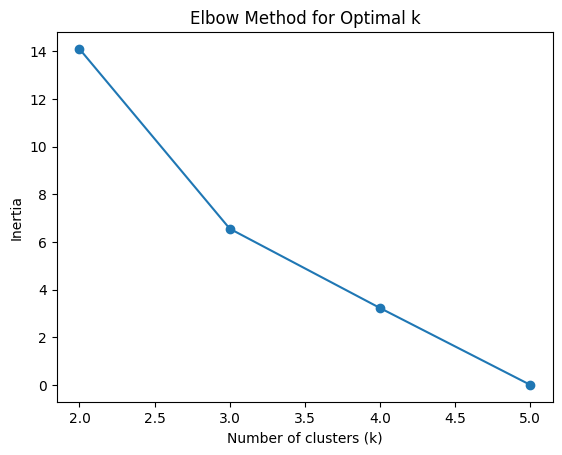

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
ERROR:__main__:An error occurred: '_AxesStack' object is not callable



Graph Embeddings:
[[ 1.25088720e-02  1.46559495e-02  1.24861822e-02 -1.19878808e-02
  -1.32710235e-02 -7.09014339e-03 -6.70668576e-03  7.20653357e-03
  -1.04232691e-02 -1.32306684e-02 -7.23531423e-03  1.51923103e-02
  -7.29200570e-03  2.34139781e-03  1.37538370e-02  6.78220950e-03
  -1.52019958e-03  1.46025484e-02 -9.30398982e-03  8.64621904e-03
   6.30702497e-03 -5.50610526e-03 -1.45624462e-03 -1.37877632e-02
   8.61202716e-05 -4.15823050e-03  1.55148953e-02 -7.38263642e-03
  -1.05732027e-02  1.75812445e-03 -1.22317439e-02 -1.24616669e-02
  -1.02582248e-02 -9.53838695e-03 -6.80030417e-03 -3.08087817e-03
  -3.88253340e-03  9.02255438e-03  1.06977383e-02 -7.09823659e-03
  -9.91761032e-03  1.22173305e-03 -7.04773189e-03  4.05069441e-05
   1.12346616e-02  6.08003978e-03 -8.47262051e-03 -2.01413408e-03
   2.85682734e-04 -1.26540642e-02  1.54347606e-02  1.30146910e-02
  -4.59882758e-05  9.16629750e-03  7.05399830e-03  1.35542778e-02
   5.71704935e-03 -1.45186111e-02 -3.83499544e-03  5.6229

<Figure size 1200x800 with 0 Axes>

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("\nGraph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("\nKernel Matrix:")
    print(kernel_matrix)

    # Print node labels for each graph
    for i, graph in enumerate(graphs):
        node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
        print(f"\nNode Labels for Graph {i}:")
        print(node_labels)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    # Print similarity scores between sentences
    print("\nSentence Similarity Scores:")
    for i, sentence_i in enumerate(sentences):
        for j, sentence_j in enumerate(sentences):
            if i < j:  # To avoid redundant printing
                print(f"Similarity between '{sentence_i}' and '{sentence_j}': {combined_matrix[i, j]:.4f}")

    # Ensure only one of n_clusters or distance_threshold is set
    if n_clusters is not None and distance_threshold is not None:
        raise ValueError("Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        distance_threshold=distance_threshold if n_clusters is None else None,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    return clusters, labels, combined_matrix

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def main(paragraph, max_clusters=10, distance_threshold=None):
    """Main function to run the semantic analysis and clustering."""
    try:
        sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

        # Build semantic graphs
        graphs = [build_semantic_graph(sent) for sent in sentences]

        # Create graph embeddings
        graph_embeddings = create_graph_embeddings(graphs)
        print("\nGraph Embeddings:")
        print(graph_embeddings)

        # Calculate graph kernels
        kernel_matrix = calculate_graph_kernels(graphs)
        print("\nKernel Matrix:")
        print(kernel_matrix)

        # Print node labels for each graph
        for i, graph in enumerate(graphs):
            node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
            print(f"\nNode Labels for Graph {i}:")
            print(node_labels)

        # Combine embeddings and kernel similarities
        combined_matrix = np.zeros((len(sentences), len(sentences)))
        for i in range(len(sentences)):
            for j in range(len(sentences)):
                embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
                kernel_sim = kernel_matrix[i, j]
                combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

        # Print similarity scores between sentences
        print("\nSentence Similarity Scores:")
        for i, sentence_i in enumerate(sentences):
            for j, sentence_j in enumerate(sentences):
                if i < j:  # To avoid redundant printing
                    print(f"Similarity between '{sentence_i}' and '{sentence_j}': {combined_matrix[i, j]:.4f}")

        if distance_threshold is None:
            # Determine the optimal number of clusters using the Elbow Method
            k_range = range(2, min(len(sentences), max_clusters) + 1)
            inertias = calculate_inertia(combined_matrix, k_range)

            # Plot the Elbow Method results
            plt.plot(k_range, inertias, marker='o')
            plt.xlabel('Number of clusters (k)')
            plt.ylabel('Inertia')
            plt.title('Elbow Method for Optimal k')
            plt.show()

            # Find the elbow point
            optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
            logger.info(f"Optimal number of clusters: {optimal_k}")
        else:
            optimal_k = None

        clusters, labels, combined_matrix = cluster_sentences(paragraph, n_clusters=optimal_k, distance_threshold=distance_threshold)

        for cluster_id in clusters:
            print(f"Cluster {cluster_id}:")
            for sentence in clusters[cluster_id]:
                print(f"  - {sentence}")

        # Visualize the first sentence's graph as an example
        if len(sentences) > 0:
            visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

        # Plot similarity matrix
        plt.figure(figsize=(10, 8))
        plt.imshow(combined_matrix, cmap='viridis')
        plt.colorbar()
        plt.title("Sentence Similarity Matrix")
        plt.show()

    except Exception as e:
        logger.error(f"An error occurred: {str(e)}")

# Example usage
if __name__ == "__main__":
    paragraph = (
        "The sun rises in the east. "
        "The sun is a star. "
        "The sun is hot. "
        "The sun sets in the west. "
        "Artificial intelligence is reshaping many industries. "
    )
    main(paragraph, max_clusters=10)


###Checking inter-cluster similarity


Graph Embeddings:
[[ 1.25088720e-02  1.46559495e-02  1.24861822e-02 -1.19878808e-02
  -1.32710235e-02 -7.09014339e-03 -6.70668576e-03  7.20653357e-03
  -1.04232691e-02 -1.32306684e-02 -7.23531423e-03  1.51923103e-02
  -7.29200570e-03  2.34139781e-03  1.37538370e-02  6.78220950e-03
  -1.52019958e-03  1.46025484e-02 -9.30398982e-03  8.64621904e-03
   6.30702497e-03 -5.50610526e-03 -1.45624462e-03 -1.37877632e-02
   8.61202716e-05 -4.15823050e-03  1.55148953e-02 -7.38263642e-03
  -1.05732027e-02  1.75812445e-03 -1.22317439e-02 -1.24616669e-02
  -1.02582248e-02 -9.53838695e-03 -6.80030417e-03 -3.08087817e-03
  -3.88253340e-03  9.02255438e-03  1.06977383e-02 -7.09823659e-03
  -9.91761032e-03  1.22173305e-03 -7.04773189e-03  4.05069441e-05
   1.12346616e-02  6.08003978e-03 -8.47262051e-03 -2.01413408e-03
   2.85682734e-04 -1.26540642e-02  1.54347606e-02  1.30146910e-02
  -4.59882758e-05  9.16629750e-03  7.05399830e-03  1.35542778e-02
   5.71704935e-03 -1.45186111e-02 -3.83499544e-03  5.62294

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


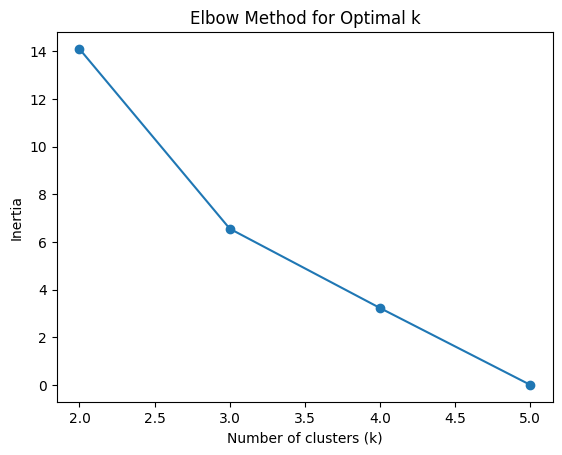

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
ERROR:__main__:An error occurred: '_AxesStack' object is not callable


Graph Embeddings:
[[ 1.25088720e-02  1.46559495e-02  1.24861822e-02 -1.19878808e-02
  -1.32710235e-02 -7.09014339e-03 -6.70668576e-03  7.20653357e-03
  -1.04232691e-02 -1.32306684e-02 -7.23531423e-03  1.51923103e-02
  -7.29200570e-03  2.34139781e-03  1.37538370e-02  6.78220950e-03
  -1.52019958e-03  1.46025484e-02 -9.30398982e-03  8.64621904e-03
   6.30702497e-03 -5.50610526e-03 -1.45624462e-03 -1.37877632e-02
   8.61202716e-05 -4.15823050e-03  1.55148953e-02 -7.38263642e-03
  -1.05732027e-02  1.75812445e-03 -1.22317439e-02 -1.24616669e-02
  -1.02582248e-02 -9.53838695e-03 -6.80030417e-03 -3.08087817e-03
  -3.88253340e-03  9.02255438e-03  1.06977383e-02 -7.09823659e-03
  -9.91761032e-03  1.22173305e-03 -7.04773189e-03  4.05069441e-05
   1.12346616e-02  6.08003978e-03 -8.47262051e-03 -2.01413408e-03
   2.85682734e-04 -1.26540642e-02  1.54347606e-02  1.30146910e-02
  -4.59882758e-05  9.16629750e-03  7.05399830e-03  1.35542778e-02
   5.71704935e-03 -1.45186111e-02 -3.83499544e-03  5.62294

<Figure size 1200x800 with 0 Axes>

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def calculate_cluster_similarities(sentences, labels, combined_matrix):
    """Calculate the average similarity within each cluster and between clusters."""
    num_clusters = len(set(labels))
    cluster_similarities = {}
    cluster_sentences = {i: [] for i in range(num_clusters)}

    # Group sentences by cluster
    for idx, label in enumerate(labels):
        cluster_sentences[label].append(sentences[idx])

    # Calculate intra-cluster similarities
    for cluster_id, cluster_sents in cluster_sentences.items():
        if len(cluster_sents) > 1:
            intra_cluster_sim = []
            for i in range(len(cluster_sents)):
                for j in range(i + 1, len(cluster_sents)):
                    sent_i = cluster_sents[i]
                    sent_j = cluster_sents[j]
                    idx_i = sentences.index(sent_i)
                    idx_j = sentences.index(sent_j)
                    intra_cluster_sim.append(combined_matrix[idx_i, idx_j])
            avg_intra_cluster_sim = np.mean(intra_cluster_sim) if intra_cluster_sim else 0
            cluster_similarities[f"Cluster {cluster_id} - Intra"] = avg_intra_cluster_sim

    # Calculate inter-cluster similarities
    inter_cluster_sim = []
    for cluster_id1, cluster_sents1 in cluster_sentences.items():
        for cluster_id2, cluster_sents2 in cluster_sentences.items():
            if cluster_id1 < cluster_id2:
                sim_values = []
                for sent1 in cluster_sents1:
                    for sent2 in cluster_sents2:
                        idx1 = sentences.index(sent1)
                        idx2 = sentences.index(sent2)
                        sim_values.append(combined_matrix[idx1, idx2])
                avg_inter_cluster_sim = np.mean(sim_values) if sim_values else 0
                cluster_similarities[f"Cluster {cluster_id1} vs Cluster {cluster_id2} - Inter"] = avg_inter_cluster_sim

    return cluster_similarities

def cluster_sentences(paragraph, n_clusters=None, distance_threshold=0.5):
    """Cluster sentences based on semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Calculate sentence similarities
    print("\nSentence Similarity Scores:")
    for i in range(len(sentences)):
        for j in range(i + 1, len(sentences)):
            sim_score = combined_matrix[i, j]
            print(f"Similarity between '{sentences[i]}' and '{sentences[j]}': {sim_score:.4f}")

    # Ensure only one of n_clusters or distance_threshold is set
    if n_clusters is not None and distance_threshold is not None:
        raise ValueError("Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        distance_threshold=distance_threshold if n_clusters is None else None,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Calculate and print cluster similarities
    cluster_similarities = calculate_cluster_similarities(sentences, labels, combined_matrix)
    print("\nCluster Similarities:")
    for key, value in cluster_similarities.items():
        print(f"{key}: {value:.4f}")

    # Visualize the first sentence's graph as an example
    if len(sentences) > 0:
        visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

# Example usage
if __name__ == "__main__":
    paragraph = (
        "The sun rises in the east. "
        "The sun is a star. "
        "The sun is hot. "
        "The sun sets in the west. "
        "Artificial intelligence is reshaping many industries. "
    )
    main(paragraph, max_clusters=10)


###Checking intra-cluster similarity

Graph Embeddings:
[[ 1.25088720e-02  1.46559495e-02  1.24861822e-02 -1.19878808e-02
  -1.32710235e-02 -7.09014339e-03 -6.70668576e-03  7.20653357e-03
  -1.04232691e-02 -1.32306684e-02 -7.23531423e-03  1.51923103e-02
  -7.29200570e-03  2.34139781e-03  1.37538370e-02  6.78220950e-03
  -1.52019958e-03  1.46025484e-02 -9.30398982e-03  8.64621904e-03
   6.30702497e-03 -5.50610526e-03 -1.45624462e-03 -1.37877632e-02
   8.61202716e-05 -4.15823050e-03  1.55148953e-02 -7.38263642e-03
  -1.05732027e-02  1.75812445e-03 -1.22317439e-02 -1.24616669e-02
  -1.02582248e-02 -9.53838695e-03 -6.80030417e-03 -3.08087817e-03
  -3.88253340e-03  9.02255438e-03  1.06977383e-02 -7.09823659e-03
  -9.91761032e-03  1.22173305e-03 -7.04773189e-03  4.05069441e-05
   1.12346616e-02  6.08003978e-03 -8.47262051e-03 -2.01413408e-03
   2.85682734e-04 -1.26540642e-02  1.54347606e-02  1.30146910e-02
  -4.59882758e-05  9.16629750e-03  7.05399830e-03  1.35542778e-02
   5.71704935e-03 -1.45186111e-02 -3.83499544e-03  5.62294

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


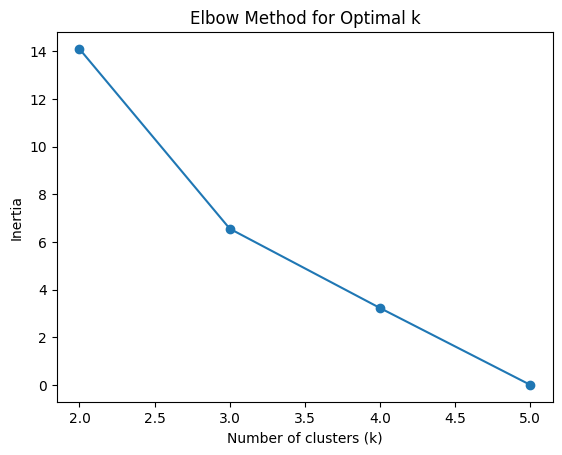

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 3:
  - The sun rises in the east

Cluster 0:
  - The sun is a star
  - The sun is hot

Cluster 2:
  - The sun sets in the west

Cluster 1:
  - Artificial intelligence is reshaping many industries

Cluster Similarities:
Cluster 0 - Intra: 0.1123
Cluster 0 vs Cluster 1 - Inter: 0.0162
Cluster 0 vs Cluster 2 - Inter: 0.0483
Cluster 0 vs Cluster 3 - Inter: 0.0484
Cluster 1 vs Cluster 2 - Inter: 0.0003
Cluster 1 vs Cluster 3 - Inter: -0.0003
Cluster 2 vs Cluster 3 - Inter: 0.0688


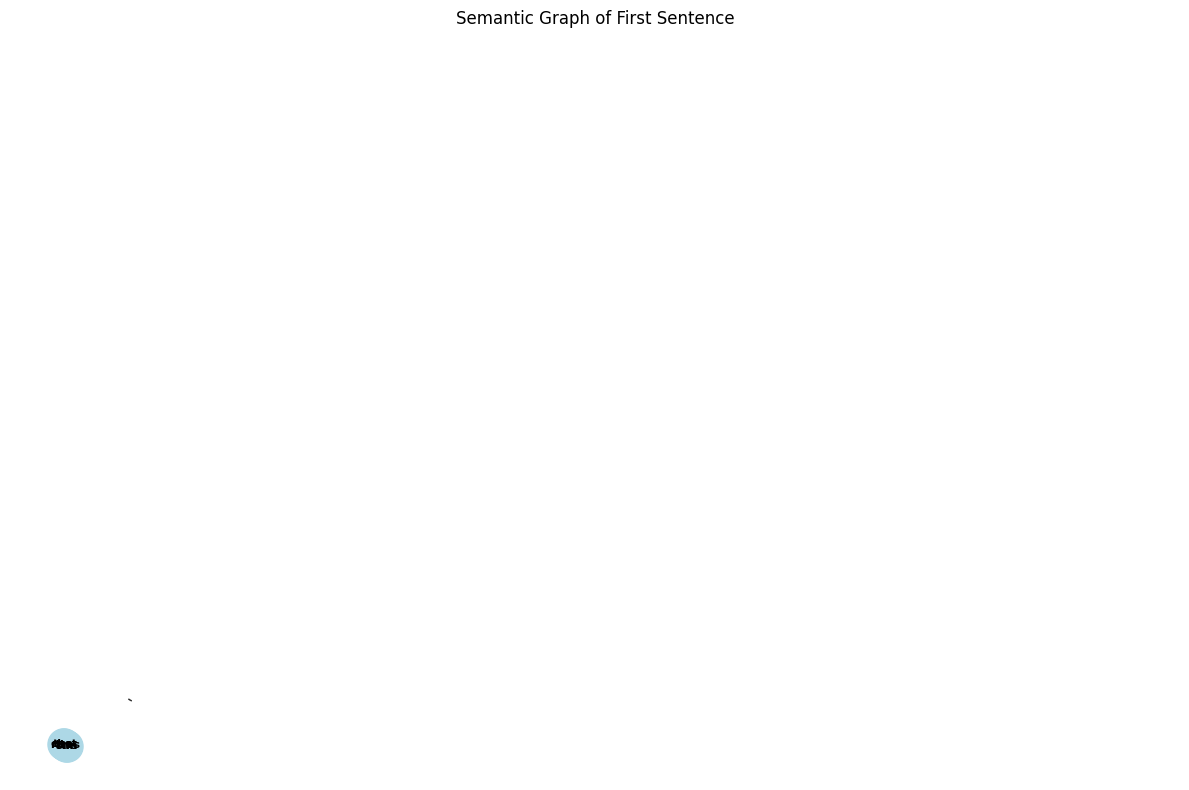

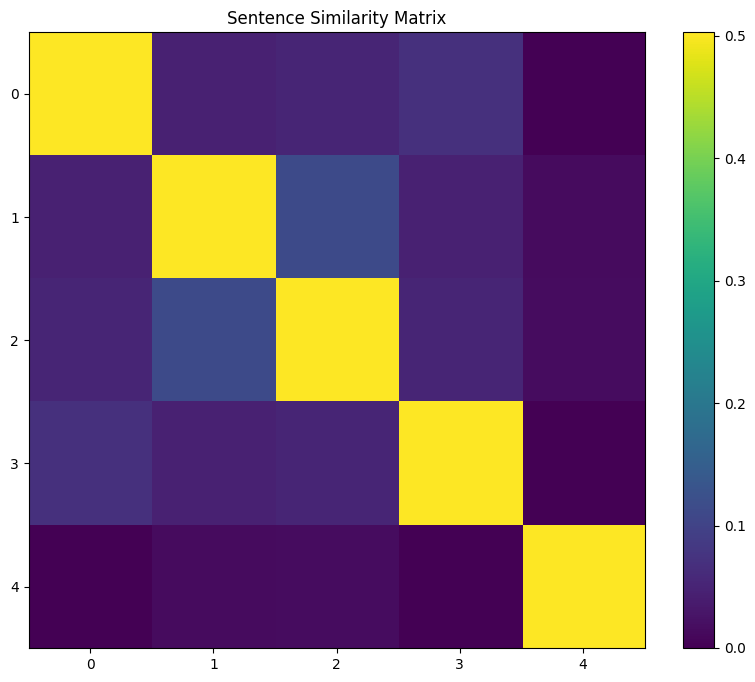

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def calculate_cluster_similarities(sentences, labels, combined_matrix):
    """Calculate the average similarity within each cluster and between clusters."""
    num_clusters = len(set(labels))
    cluster_similarities = {}
    cluster_sentences = {i: [] for i in range(num_clusters)}

    # Group sentences by cluster
    for idx, label in enumerate(labels):
        cluster_sentences[label].append(sentences[idx])

    # Calculate intra-cluster similarities
    for cluster_id, cluster_sents in cluster_sentences.items():
        if len(cluster_sents) > 1:
            intra_cluster_sim = []
            for i in range(len(cluster_sents)):
                for j in range(i + 1, len(cluster_sents)):
                    sent_i = cluster_sents[i]
                    sent_j = cluster_sents[j]
                    idx_i = sentences.index(sent_i)
                    idx_j = sentences.index(sent_j)
                    intra_cluster_sim.append(combined_matrix[idx_i, idx_j])
            avg_intra_cluster_sim = np.mean(intra_cluster_sim) if intra_cluster_sim else 0
            cluster_similarities[f"Cluster {cluster_id} - Intra"] = avg_intra_cluster_sim

    # Calculate inter-cluster similarities
    inter_cluster_sim = []
    for cluster_id1, cluster_sents1 in cluster_sentences.items():
        for cluster_id2, cluster_sents2 in cluster_sentences.items():
            if cluster_id1 < cluster_id2:
                sim_values = []
                for sent1 in cluster_sents1:
                    for sent2 in cluster_sents2:
                        idx1 = sentences.index(sent1)
                        idx2 = sentences.index(sent2)
                        sim_values.append(combined_matrix[idx1, idx2])
                avg_inter_cluster_sim = np.mean(sim_values) if sim_values else 0
                cluster_similarities[f"Cluster {cluster_id1} vs Cluster {cluster_id2} - Inter"] = avg_inter_cluster_sim

    return cluster_similarities

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def cluster_sentences(paragraph):
    """Cluster sentences based on semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Calculate sentence similarities
    print("\nSentence Similarity Scores:")
    for i in range(len(sentences)):
        for j in range(i + 1, len(sentences)):
            sim_score = combined_matrix[i, j]
            print(f"Similarity between '{sentences[i]}' and '{sentences[j]}': {sim_score:.4f}")

    # Determine the optimal number of clusters using the Elbow Method
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(combined_matrix, k_range)

    # Plot the Elbow Method results
    plt.figure()
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    # Find the elbow point
    optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
    logger.info(f"Optimal number of clusters: {optimal_k}")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Calculate and print cluster similarities
    cluster_similarities = calculate_cluster_similarities(sentences, labels, combined_matrix)
    print("\nCluster Similarities:")
    for key, value in cluster_similarities.items():
        print(f"{key}: {value:.4f}")

    # Visualize the first sentence's graph as an example
    if len(sentences) > 0:
        visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    fig, ax = plt.subplots(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold', ax=ax)
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    paragraph = (
        "The sun rises in the east. "
        "The sun is a star. "
        "The sun is hot. "
        "The sun sets in the west. "
        "Artificial intelligence is reshaping many industries. "
    )
    cluster_sentences(paragraph)


In [ ]:
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 7.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install karateclub
!pip install grakel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 28.1 MB/s eta 0:00:00
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=101980 sha256=91f7bcdab6cb81993d4d507ca15a5704667d366ef9407500a1209de85e623a29
  Stored in directory: /root/.cache/pip/wheels/62/bd/af/17e7ca6ba0ed144d22502780f5c0660a8e4985939dc6973a81
Successfully built karateclub
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.9 MB/s eta 0:00:00


In [ ]:
!pip install grakel

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def calculate_intra_cluster_similarities(sentences, labels, combined_matrix):
    """Calculate intra-cluster similarities."""
    num_clusters = len(set(labels))
    cluster_similarities = {}
    cluster_sentences = {i: [] for i in range(num_clusters)}

    # Group sentences by cluster
    for idx, label in enumerate(labels):
        cluster_sentences[label].append(sentences[idx])

    # Calculate intra-cluster similarities
    for cluster_id, cluster_sents in cluster_sentences.items():
        if len(cluster_sents) > 1:
            intra_cluster_sim = []
            for i in range(len(cluster_sents)):
                for j in range(i + 1, len(cluster_sents)):
                    sent_i = cluster_sents[i]
                    sent_j = cluster_sents[j]
                    idx_i = sentences.index(sent_i)
                    idx_j = sentences.index(sent_j)
                    intra_cluster_sim.append(combined_matrix[idx_i, idx_j])
            avg_intra_cluster_sim = np.mean(intra_cluster_sim) if intra_cluster_sim else 0
            cluster_similarities[f"Cluster {cluster_id} - Intra"] = avg_intra_cluster_sim

    return cluster_similarities

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def cluster_sentences(paragraph):
    """Cluster sentences based on semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Calculate sentence similarities
    print("\nSentence Similarity Scores:")
    for i in range(len(sentences)):
        for j in range(i + 1, len(sentences)):
            sim_score = combined_matrix[i, j]
            print(f"Similarity between '{sentences[i]}' and '{sentences[j]}': {sim_score:.4f}")

    # Determine the optimal number of clusters using the Elbow Method
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(combined_matrix, k_range)

    # Plot the Elbow Method results
    plt.figure()
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    # Find the elbow point
    optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
    logger.info(f"Optimal number of clusters: {optimal_k}")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Calculate and print intra-cluster similarities
    cluster_similarities = calculate_intra_cluster_similarities(sentences, labels, combined_matrix)
    print("\nCluster Similarities:")
    for key, value in cluster_similarities.items():
        print(f"{key}: {value:.4f}")

    # Visualize the first sentence's graph as an example
    if len(sentences) > 0:
        visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    fig, ax = plt.subplots(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold', ax=ax)
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()



Graph Embeddings:
[[ 1.25088720e-02  1.46559495e-02  1.24861822e-02 -1.19878808e-02
  -1.32710235e-02 -7.09014339e-03 -6.70668576e-03  7.20653357e-03
  -1.04232691e-02 -1.32306684e-02 -7.23531423e-03  1.51923103e-02
  -7.29200570e-03  2.34139781e-03  1.37538370e-02  6.78220950e-03
  -1.52019958e-03  1.46025484e-02 -9.30398982e-03  8.64621904e-03
   6.30702497e-03 -5.50610526e-03 -1.45624462e-03 -1.37877632e-02
   8.61202716e-05 -4.15823050e-03  1.55148953e-02 -7.38263642e-03
  -1.05732027e-02  1.75812445e-03 -1.22317439e-02 -1.24616669e-02
  -1.02582248e-02 -9.53838695e-03 -6.80030417e-03 -3.08087817e-03
  -3.88253340e-03  9.02255438e-03  1.06977383e-02 -7.09823659e-03
  -9.91761032e-03  1.22173305e-03 -7.04773189e-03  4.05069441e-05
   1.12346616e-02  6.08003978e-03 -8.47262051e-03 -2.01413408e-03
   2.85682734e-04 -1.26540642e-02  1.54347606e-02  1.30146910e-02
  -4.59882758e-05  9.16629750e-03  7.05399830e-03  1.35542778e-02
   5.71704935e-03 -1.45186111e-02 -3.83499544e-03  5.62294

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


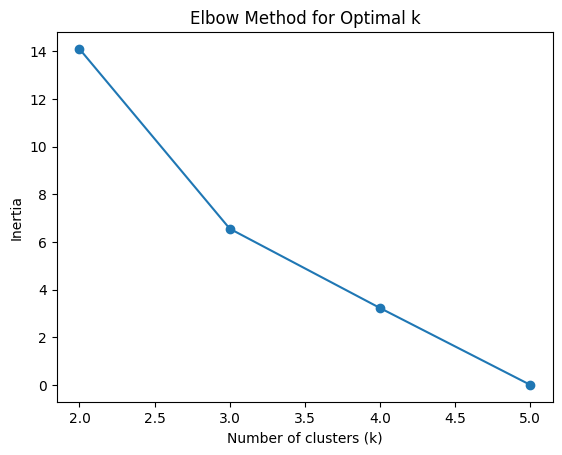

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 3:
  - The sun rises in the east

Cluster 0:
  - The sun is a star
  - The sun is hot

Cluster 2:
  - The sun sets in the west

Cluster 1:
  - Artificial intelligence is reshaping many industries

Cluster Similarities:
Cluster 0 - Intra: 0.1123


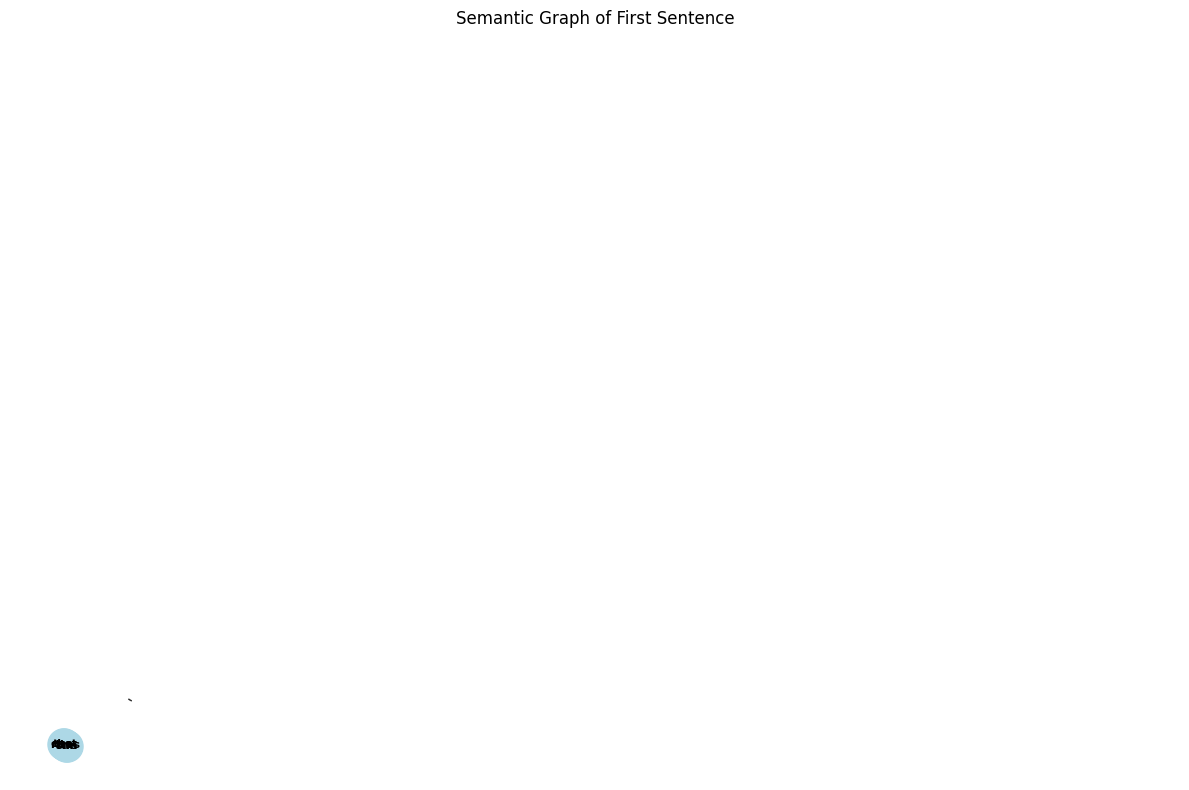

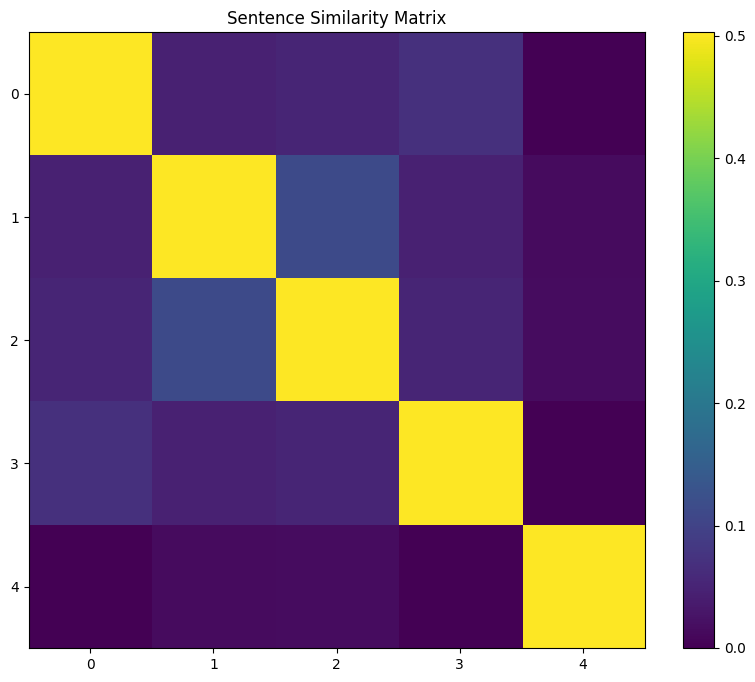

In [ ]:

# Example usage
if __name__ == "__main__":
    paragraph = (
        "The sun rises in the east. "
        "The sun is a star. "
        "The sun is hot. "
        "The sun sets in the west. "
        "Artificial intelligence is reshaping many industries. "
    )
    cluster_sentences(paragraph)

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def calculate_intra_cluster_similarities(sentences, labels, combined_matrix):
    """Calculate intra-cluster similarities."""
    num_clusters = len(set(labels))
    cluster_similarities = {}
    cluster_sentences = {i: [] for i in range(num_clusters)}

    # Group sentences by cluster
    for idx, label in enumerate(labels):
        cluster_sentences[label].append(sentences[idx])

    # Calculate intra-cluster similarities
    for cluster_id, cluster_sents in cluster_sentences.items():
        if len(cluster_sents) > 1:
            intra_cluster_sim = []
            for i in range(len(cluster_sents)):
                for j in range(i + 1, len(cluster_sents)):
                    sent_i = cluster_sents[i]
                    sent_j = cluster_sents[j]
                    idx_i = sentences.index(sent_i)
                    idx_j = sentences.index(sent_j)
                    intra_cluster_sim.append(combined_matrix[idx_i, idx_j])
            avg_intra_cluster_sim = np.mean(intra_cluster_sim) if intra_cluster_sim else 0
            cluster_similarities[f"Cluster {cluster_id} - Intra"] = avg_intra_cluster_sim

    return cluster_similarities

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def cluster_sentences(paragraph):
    """Cluster sentences based on semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        logger.error("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Calculate sentence similarities
    print("\nSentence Similarity Scores:")
    for i in range(len(sentences)):
        for j in range(i + 1, len(sentences)):
            sim_score = combined_matrix[i, j]
            print(f"Similarity between '{sentences[i]}' and '{sentences[j]}': {sim_score:.4f}")

    # Determine the optimal number of clusters using the Elbow Method
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(combined_matrix, k_range)

    # Plot the Elbow Method results
    plt.figure()
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    # Find the elbow point
    optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
    logger.info(f"Optimal number of clusters: {optimal_k}")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Calculate and print intra-cluster similarities
    cluster_similarities = calculate_intra_cluster_similarities(sentences, labels, combined_matrix)
    print("\nCluster Similarities:")
    for key, value in cluster_similarities.items():
        print(f"{key}: {value:.4f}")

    # Visualize the first sentence's graph as an example
    if len(sentences) > 0:
        visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    fig, ax = plt.subplots(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold', ax=ax)
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()




###Final Code

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def calculate_intra_cluster_similarities(sentences, labels, combined_matrix):
    """Calculate intra-cluster similarities."""
    num_clusters = len(set(labels))
    cluster_similarities = {}
    cluster_sentences = {i: [] for i in range(num_clusters)}

    # Group sentences by cluster
    for idx, label in enumerate(labels):
        cluster_sentences[label].append(sentences[idx])

    # Calculate intra-cluster similarities
    for cluster_id, cluster_sents in cluster_sentences.items():
        if len(cluster_sents) > 1:
            intra_cluster_sim = []
            for i in range(len(cluster_sents)):
                for j in range(i + 1, len(cluster_sents)):
                    sent_i = cluster_sents[i]
                    sent_j = cluster_sents[j]
                    idx_i = sentences.index(sent_i)
                    idx_j = sentences.index(sent_j)
                    intra_cluster_sim.append(combined_matrix[idx_i, idx_j])
            avg_intra_cluster_sim = np.mean(intra_cluster_sim) if intra_cluster_sim else 0
            cluster_similarities[f"Cluster {cluster_id} - Intra"] = avg_intra_cluster_sim

    return cluster_similarities

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def cluster_sentences(paragraph):
    """Cluster sentences based on semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        logger.error("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Calculate sentence similarities
    print("\nSentence Similarity Scores:")
    for i in range(len(sentences)):
        for j in range(i + 1, len(sentences)):
            sim_score = combined_matrix[i, j]
            print(f"Similarity between '{sentences[i]}' and '{sentences[j]}': {sim_score:.4f}")

    # Determine the optimal number of clusters using the Elbow Method
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(combined_matrix, k_range)

    # Plot the Elbow Method results
    plt.figure()
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    # Find the elbow point
    optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
    logger.info(f"Optimal number of clusters: {optimal_k}")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Calculate and print intra-cluster similarities
    cluster_similarities = calculate_intra_cluster_similarities(sentences, labels, combined_matrix)
    print("\nCluster Similarities:")
    for key, value in cluster_similarities.items():
        print(f"{key}: {value:.4f}")

    # Visualize the first sentence's graph as an example
    if len(sentences) > 0:
        visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    fig, ax = plt.subplots(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold', ax=ax)
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()




### Dataset testing

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on refined semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        logger.error("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Determine the optimal number of clusters using the Elbow Method
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(combined_matrix, k_range)

    # Debugging: Check what inertias contain
    print("Inertias:", inertias)

    # Find the elbow point if possible
    if len(inertias) > 1:
        optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
        logger.info(f"Optimal number of clusters: {optimal_k}")
    else:
        logger.error("Inertias array is empty, unable to determine optimal number of clusters.")
        optimal_k = k_range[0]  # Fallback option

    # Perform clustering with the chosen number of clusters
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()



RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

Test Case 1: News headlines covering sports, entertainment, nature, politics, and public health.
Paragraph:
Sloppy England shocked by Windies at World Cup. Bafta Awards 2022: Stars prepare to return to in-person ceremony. Northern Lights: Powerful aurora borealis display above Scotland. North Korea fires missile but launch fails, says South. Heathrow Airport drops Covid face mask rules. 
Graph Embeddings:
[[ 1.24938115e-02  1.46362996e-02  1.24669839e-02 -1.19695999e-02
  -1.32503053e-02 -7.08158780e-03 -6.69908524e-03  7.19671464e-03
  -1.04071535e-02 -1.32120317e-02 -7.22561963e-03  1.51700871e-02
  -7.28244334e-03  2.33660080e-03  1.37327779e-02  6.77328790e-03
  -1.51830469e-03  1.45822624e-02 -9.29032173e-03  8.63292255e-03
   6.29702676e-03 -5.49796503e-03 -1.45292981e-03 -1.37705039e-02
   8.70414515e-05 -4.15388308e-03  1.54940691e-02 -7.37141492e-03
  -1.05580734e-02  1.75605167e-03 -1.22136865e-02 -1.24426065e-02
  -1.02433981e-02 -9.52424016e-03 -6.78950315e-03 -3.07887373e-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

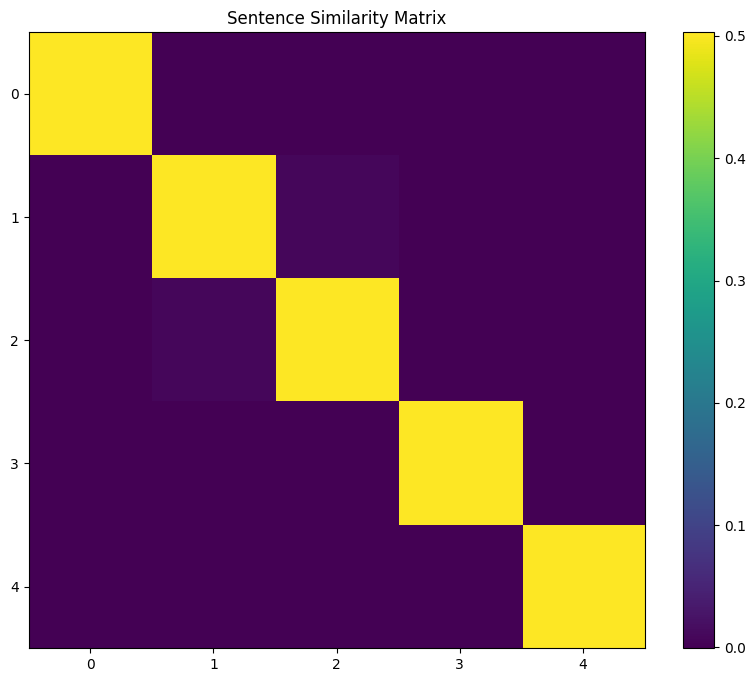



Test Case 2: News headlines about natural disasters, financial issues, entertainment, and sports injuries.
Paragraph:
First pictures of earthquake hitting Japan. Fears Russia will not be able to pay its debts mount. Oscars 2022: The best picture nominees in 60 seconds. China plane crash: Search and rescue operation halted by rain. Rafael Nadal out for up to six weeks with rib injury. 
Graph Embeddings:
[[ 1.25270812e-02  1.46605549e-02  1.24824140e-02 -1.19840158e-02
  -1.32707432e-02 -7.10737193e-03 -6.70803199e-03  7.21599720e-03
  -1.04300175e-02 -1.32392757e-02 -7.23758899e-03  1.51894670e-02
  -7.29023525e-03  2.34029838e-03  1.37623632e-02  6.79176161e-03
  -1.50360039e-03  1.46149211e-02 -9.30218026e-03  8.64300318e-03
   6.30621379e-03 -5.51565597e-03 -1.45044981e-03 -1.38054090e-02
   8.95176854e-05 -4.16530250e-03  1.55234206e-02 -7.38275191e-03
  -1.05755096e-02  1.75183371e-03 -1.22324144e-02 -1.24656027e-02
  -1.02522243e-02 -9.54071060e-03 -6.79665804e-03 -3.08490265e-0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

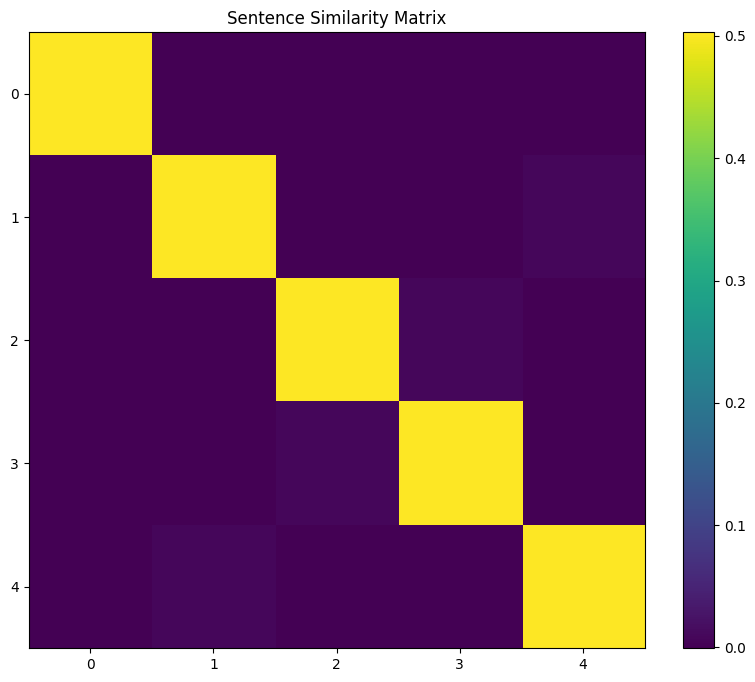



Test Case 3: News headlines about economics, international conflict, sports, and technology in healthcare.
Paragraph:
Chancellor Rishi Sunak to deliver Spring Statement amid price pressures. Ukraine conflict: What is Nato and how has it responded to Russia's invasion? Shane Warne: Australian cricket legend died from natural causes - police. Can tech help revive India's crumbling health system? Healy helps Australia beat Pakistan at World Cup. 
Graph Embeddings:
[[ 1.25690689e-02  1.47442063e-02  1.25121074e-02 -1.20200543e-02
  -1.32775055e-02 -7.11111305e-03 -6.75386051e-03  7.19945086e-03
  -1.04697114e-02 -1.32619962e-02 -7.27863889e-03  1.52478665e-02
  -7.33571546e-03  2.31625023e-03  1.37881674e-02  6.78471616e-03
  -1.56452891e-03  1.46340793e-02 -9.35347658e-03  8.67787004e-03
   6.30159024e-03 -5.49790217e-03 -1.43729546e-03 -1.38612716e-02
   7.21883407e-05 -4.18337854e-03  1.55705130e-02 -7.43412599e-03
  -1.06041683e-02  1.78825052e-03 -1.22768143e-02 -1.24973776e-02
  -1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


ValueError: attempt to get argmin of an empty sequence

In [ ]:
def test_cluster_sentences():
    test_cases = [
        {
            "paragraph": (
                "Sloppy England shocked by Windies at World Cup. "
                "Bafta Awards 2022: Stars prepare to return to in-person ceremony. "
                "Northern Lights: Powerful aurora borealis display above Scotland. "
                "North Korea fires missile but launch fails, says South. "
                "Heathrow Airport drops Covid face mask rules. "
            ),
            "description": "News headlines covering sports, entertainment, nature, politics, and public health."
        },
        {
            "paragraph": (
                "First pictures of earthquake hitting Japan. "
                "Fears Russia will not be able to pay its debts mount. "
                "Oscars 2022: The best picture nominees in 60 seconds. "
                "China plane crash: Search and rescue operation halted by rain. "
                "Rafael Nadal out for up to six weeks with rib injury. "
            ),
            "description": "News headlines about natural disasters, financial issues, entertainment, and sports injuries."
        },
        {
            "paragraph": (
                "Chancellor Rishi Sunak to deliver Spring Statement amid price pressures. "
                "Ukraine conflict: What is Nato and how has it responded to Russia's invasion? "
                "Shane Warne: Australian cricket legend died from natural causes - police. "
                "Can tech help revive India's crumbling health system? "
                "Healy helps Australia beat Pakistan at World Cup. "
            ),
            "description": "News headlines about economics, international conflict, sports, and technology in healthcare."
        }
    ]

    for idx, case in enumerate(test_cases):
        print(f"Test Case {idx + 1}: {case['description']}")
        print("Paragraph:")
        print(case["paragraph"])
        cluster_sentences(case["paragraph"])
        print("\n" + "="*50 + "\n")

# Example usage
if __name__ == "__main__":
    test_cluster_sentences()


Test Case 1: Mixed topic sentences
Paragraph:
The sun rises in the east. The sun is a star. The sun is hot. The sun sets in the west. Artificial intelligence is reshaping many industries. 
Graph Embeddings:
[[ 1.25088720e-02  1.46559495e-02  1.24861822e-02 -1.19878808e-02
  -1.32710235e-02 -7.09014339e-03 -6.70668576e-03  7.20653357e-03
  -1.04232691e-02 -1.32306684e-02 -7.23531423e-03  1.51923103e-02
  -7.29200570e-03  2.34139781e-03  1.37538370e-02  6.78220950e-03
  -1.52019958e-03  1.46025484e-02 -9.30398982e-03  8.64621904e-03
   6.30702497e-03 -5.50610526e-03 -1.45624462e-03 -1.37877632e-02
   8.61202716e-05 -4.15823050e-03  1.55148953e-02 -7.38263642e-03
  -1.05732027e-02  1.75812445e-03 -1.22317439e-02 -1.24616669e-02
  -1.02582248e-02 -9.53838695e-03 -6.80030417e-03 -3.08087817e-03
  -3.88253340e-03  9.02255438e-03  1.06977383e-02 -7.09823659e-03
  -9.91761032e-03  1.22173305e-03 -7.04773189e-03  4.05069441e-05
   1.12346616e-02  6.08003978e-03 -8.47262051e-03 -2.01413408e-03
 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


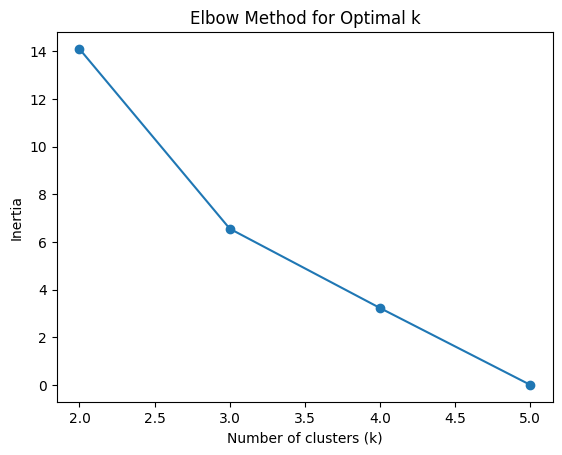

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 3:
  - The sun rises in the east

Cluster 0:
  - The sun is a star
  - The sun is hot

Cluster 2:
  - The sun sets in the west

Cluster 1:
  - Artificial intelligence is reshaping many industries

Cluster Similarities:
Cluster 0 - Intra: 0.1123


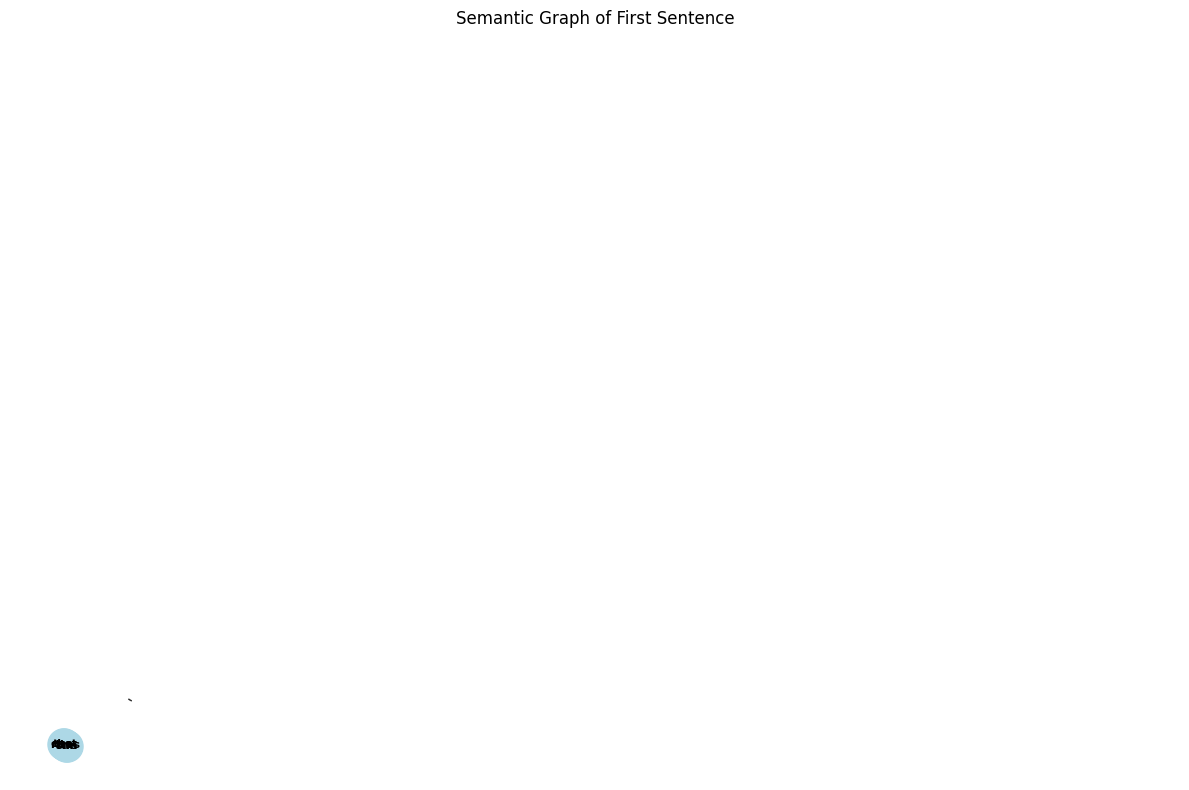

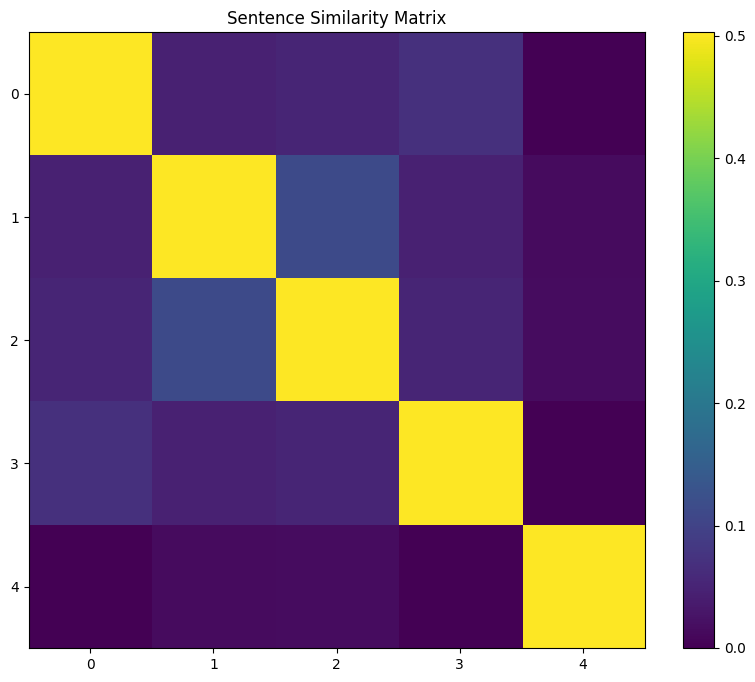



Test Case 2: Two clear topics: apples and AI
Paragraph:
I love apples. Apples are my favorite fruit. I enjoy eating apples every day. Apple pie is delicious. Artificial intelligence can play chess. AI can also help in medical diagnosis. 
Graph Embeddings:
[[ 1.24885608e-02  1.46378037e-02  1.24743832e-02 -1.19814444e-02
  -1.32570826e-02 -7.07841292e-03 -6.69736089e-03  7.19616888e-03
  -1.04219187e-02 -1.32127265e-02 -7.22622313e-03  1.51752122e-02
  -7.28185661e-03  2.34125811e-03  1.37463259e-02  6.77161664e-03
  -1.52244198e-03  1.45809017e-02 -9.29889735e-03  8.64082109e-03
   6.30081957e-03 -5.49647491e-03 -1.45399233e-03 -1.37693817e-02
   7.90901759e-05 -4.15292475e-03  1.54902432e-02 -7.38033326e-03
  -1.05583351e-02  1.75354292e-03 -1.22239627e-02 -1.24516096e-02
  -1.02443229e-02 -9.53189656e-03 -6.79862779e-03 -3.07490001e-03
  -3.88384308e-03  9.01298691e-03  1.06855324e-02 -7.08847865e-03
  -9.91870370e-03  1.22177962e-03 -7.04370951e-03  3.67069370e-05
   1.12209590e-0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

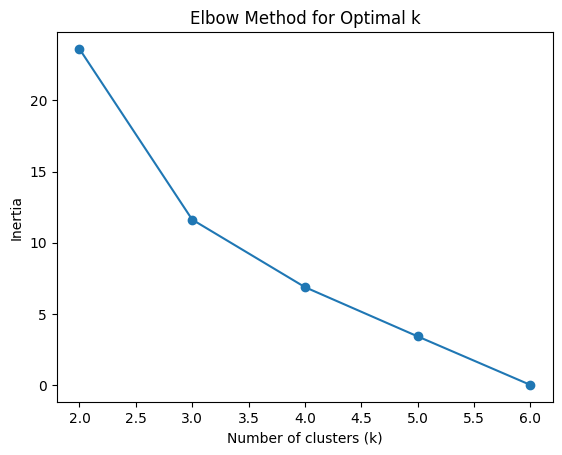

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - I love apples
  - I enjoy eating apples every day

Cluster 3:
  - Apples are my favorite fruit

Cluster 4:
  - Apple pie is delicious

Cluster 1:
  - Artificial intelligence can play chess

Cluster 2:
  - AI can also help in medical diagnosis

Cluster Similarities:
Cluster 0 - Intra: 0.0396


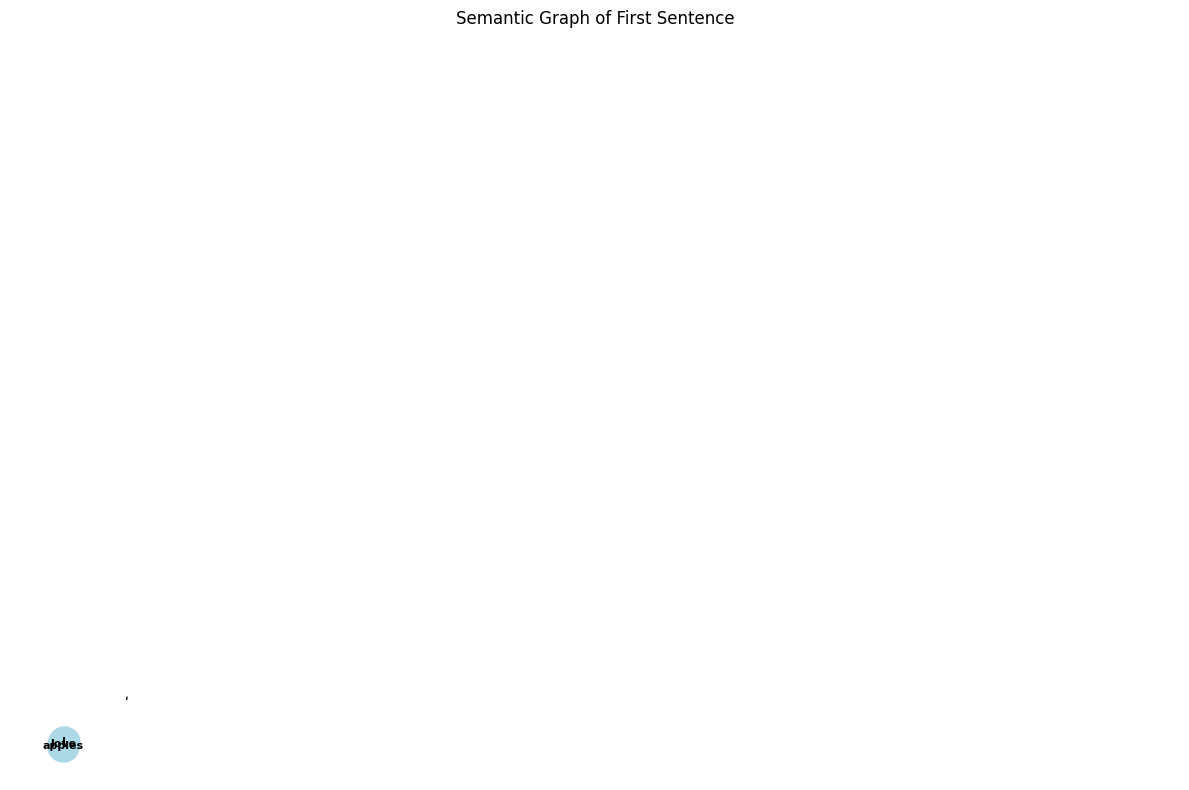

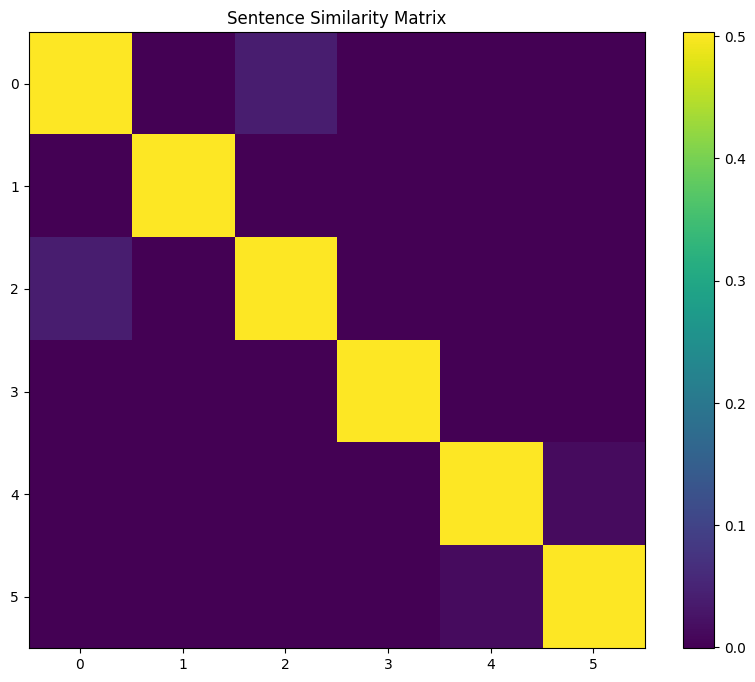



Test Case 3: Related topic sentences about animals
Paragraph:
The quick brown fox jumps over the lazy dog. The dog barked at the fox. Foxes are wild animals. Dogs are domestic animals. Domestic animals can be trained. 
Graph Embeddings:
[[ 1.24883968e-02  1.46355294e-02  1.24751804e-02 -1.19770225e-02
  -1.32608619e-02 -7.07951840e-03 -6.69384096e-03  7.19931629e-03
  -1.04140816e-02 -1.32157337e-02 -7.22429901e-03  1.51756024e-02
  -7.28095230e-03  2.34243576e-03  1.37415407e-02  6.77405624e-03
  -1.51580502e-03  1.45855099e-02 -9.29296762e-03  8.63854401e-03
   6.30248059e-03 -5.50171128e-03 -1.45777734e-03 -1.37663269e-02
   8.40368084e-05 -4.15036641e-03  1.54934376e-02 -7.37467315e-03
  -1.05609912e-02  1.75332709e-03 -1.22187706e-02 -1.24512827e-02
  -1.02458587e-02 -9.52818990e-03 -6.79412531e-03 -3.07238288e-03
  -3.87890288e-03  9.01506655e-03  1.06824581e-02 -7.09174154e-03
  -9.91294906e-03  1.21744943e-03 -7.04606110e-03  4.25658982e-05
   1.12213027e-02  6.07413752e-03 -

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


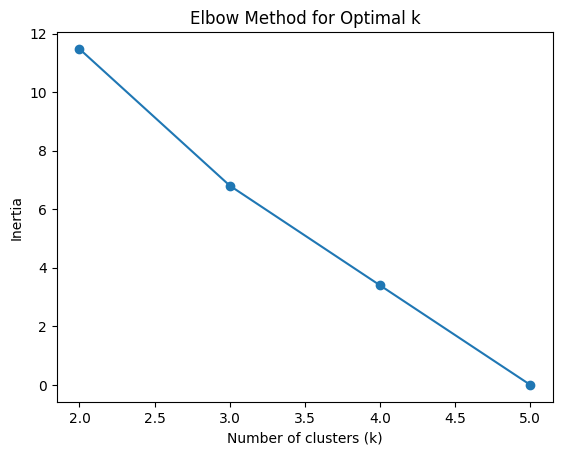

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - The quick brown fox jumps over the lazy dog
  - The dog barked at the fox

Cluster 3:
  - Foxes are wild animals

Cluster 1:
  - Dogs are domestic animals

Cluster 2:
  - Domestic animals can be trained

Cluster Similarities:
Cluster 0 - Intra: 0.0453


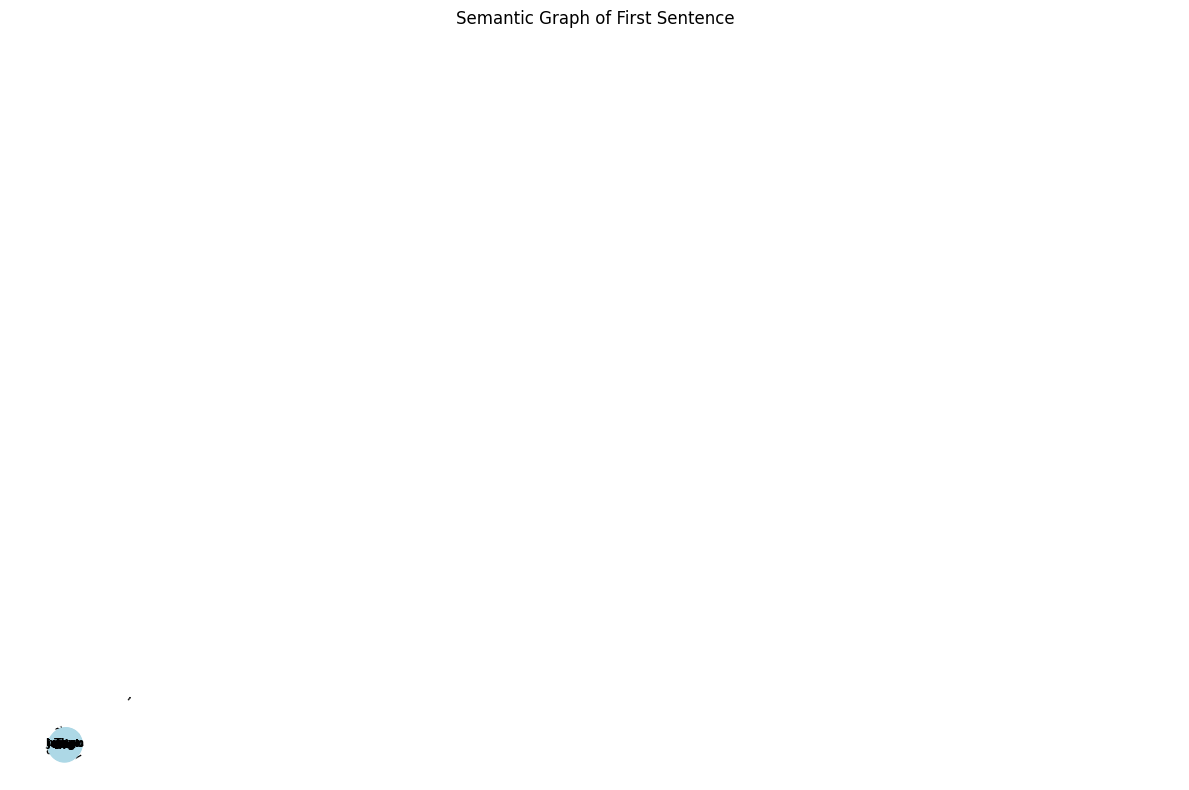

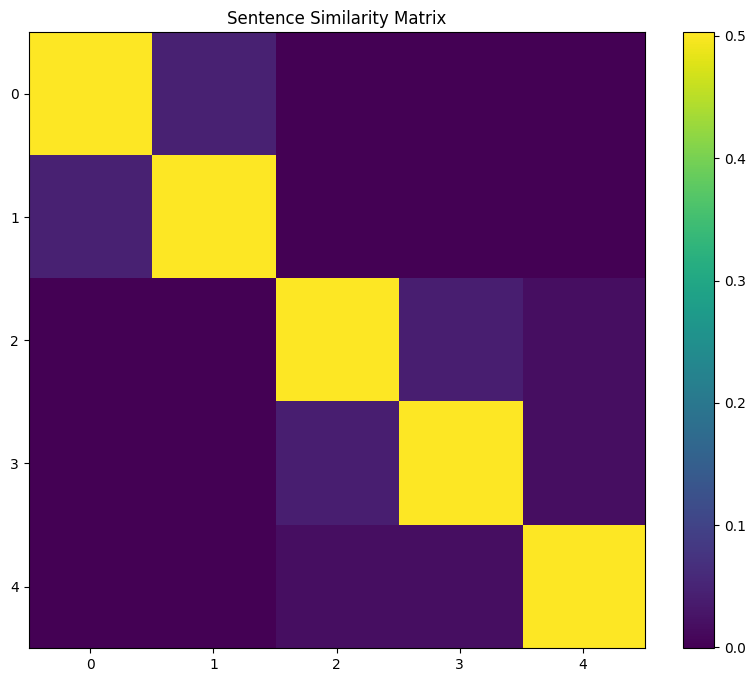



Test Case 4: Two separate topics: football and the sun
Paragraph:
I like to play football. Football is a popular sport. Many people watch football games. The sun rises in the east. The sun sets in the west. Football requires skill and teamwork. 
Graph Embeddings:
[[ 1.25041455e-02  1.46660209e-02  1.24899689e-02 -1.19992550e-02
  -1.32708363e-02 -7.08715571e-03 -6.70784712e-03  7.20804371e-03
  -1.04379766e-02 -1.32290199e-02 -7.22972536e-03  1.51959462e-02
  -7.29331980e-03  2.33485107e-03  1.37581443e-02  6.77969353e-03
  -1.52983738e-03  1.45967137e-02 -9.30800941e-03  8.65763891e-03
   6.30277209e-03 -5.50092803e-03 -1.45387964e-03 -1.37877408e-02
   7.40181058e-05 -4.16338816e-03  1.55010233e-02 -7.39258388e-03
  -1.05685340e-02  1.75191171e-03 -1.22390641e-02 -1.24766277e-02
  -1.02534704e-02 -9.53987427e-03 -6.80898782e-03 -3.08826030e-03
  -3.89199494e-03  9.02470015e-03  1.07080704e-02 -7.08907470e-03
  -9.92852915e-03  1.22875790e-03 -7.04576774e-03  3.33579665e-05
   1.123

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

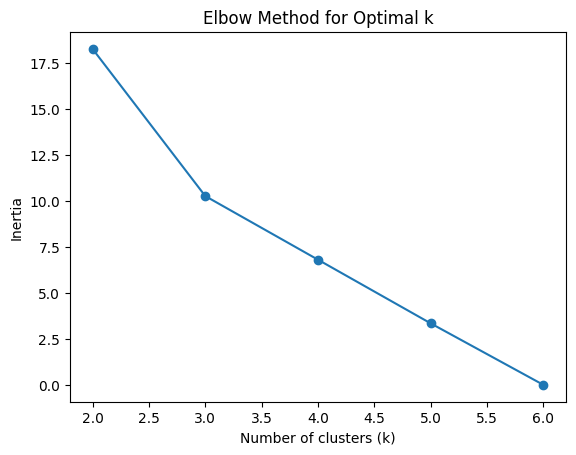

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - I like to play football
  - Many people watch football games

Cluster 3:
  - Football is a popular sport

Cluster 1:
  - The sun rises in the east
  - The sun sets in the west

Cluster 2:
  - Football requires skill and teamwork

Cluster Similarities:
Cluster 0 - Intra: 0.0170
Cluster 1 - Intra: 0.0698


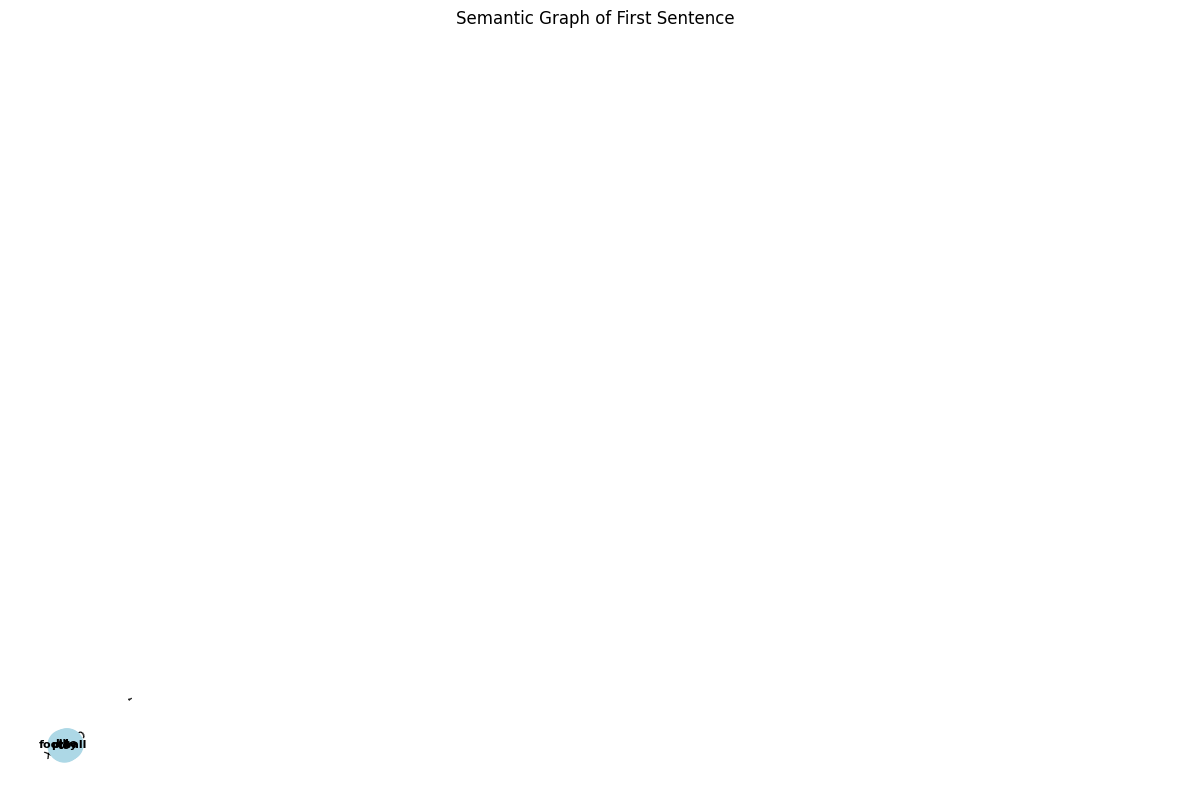

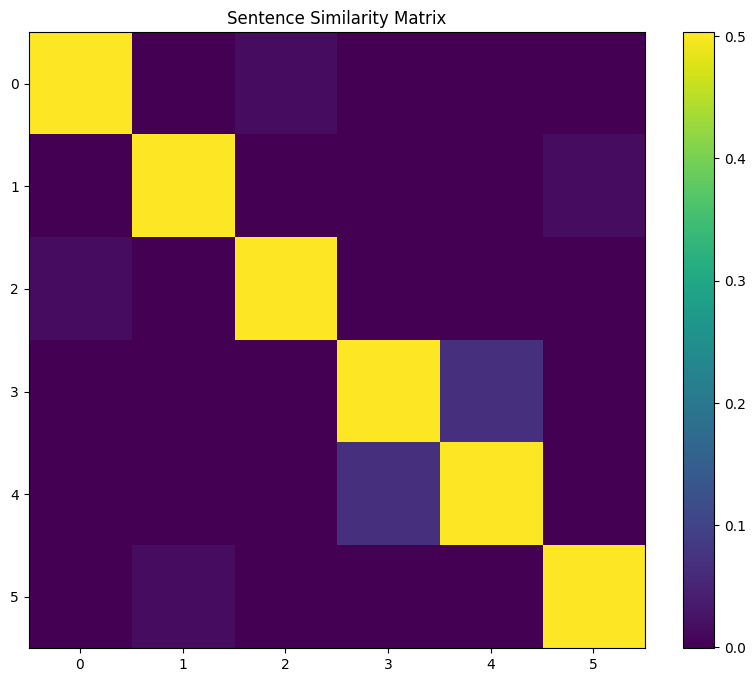



Test Case 5: Related topic sentences about AI
Paragraph:
Natural language processing is a field of AI. Machine learning is a subset of AI. Deep learning is a subset of machine learning. AI is transforming various industries. AI can improve customer service. AI has applications in healthcare. 
Graph Embeddings:
[[ 1.25070652e-02  1.46706551e-02  1.24903889e-02 -1.19966893e-02
  -1.32718710e-02 -7.09039858e-03 -6.70393184e-03  7.20630260e-03
  -1.04432786e-02 -1.32319629e-02 -7.23169465e-03  1.51979886e-02
  -7.29283970e-03  2.33355025e-03  1.37623148e-02  6.77898526e-03
  -1.52395514e-03  1.46006839e-02 -9.30859149e-03  8.65849201e-03
   6.30158698e-03 -5.50492899e-03 -1.45301665e-03 -1.37917520e-02
   7.22686382e-05 -4.16147802e-03  1.55040026e-02 -7.39729637e-03
  -1.05710346e-02  1.75245397e-03 -1.22389887e-02 -1.24818645e-02
  -1.02531891e-02 -9.54120141e-03 -6.81153266e-03 -3.08334758e-03
  -3.89244687e-03  9.02891159e-03  1.07114911e-02 -7.09145516e-03
  -9.93057247e-03  1.23204

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

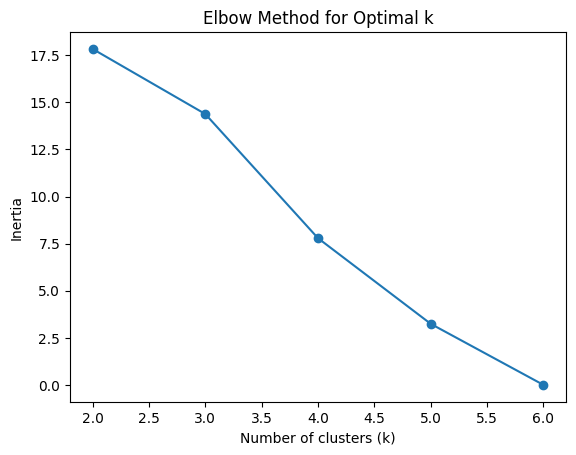

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - Natural language processing is a field of AI
  - Machine learning is a subset of AI
  - Deep learning is a subset of machine learning
  - AI is transforming various industries

Cluster 2:
  - AI can improve customer service

Cluster 1:
  - AI has applications in healthcare

Cluster Similarities:
Cluster 0 - Intra: 0.0438


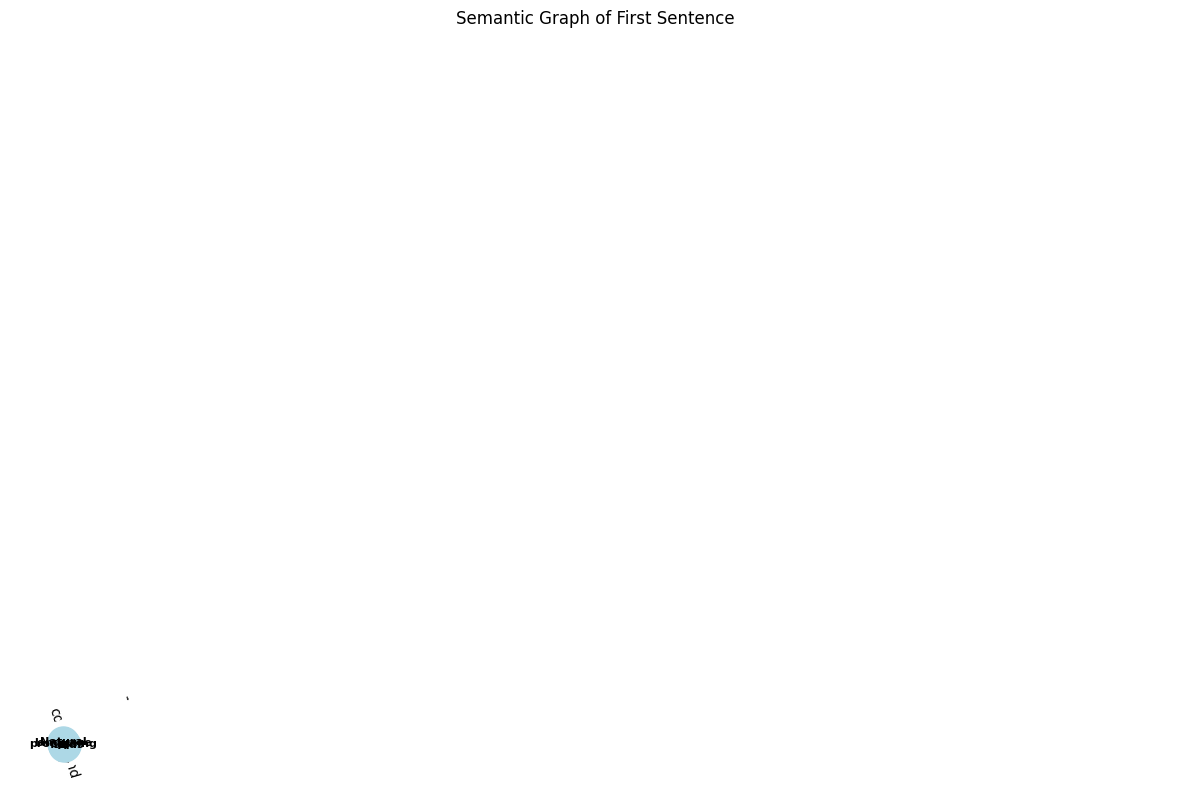

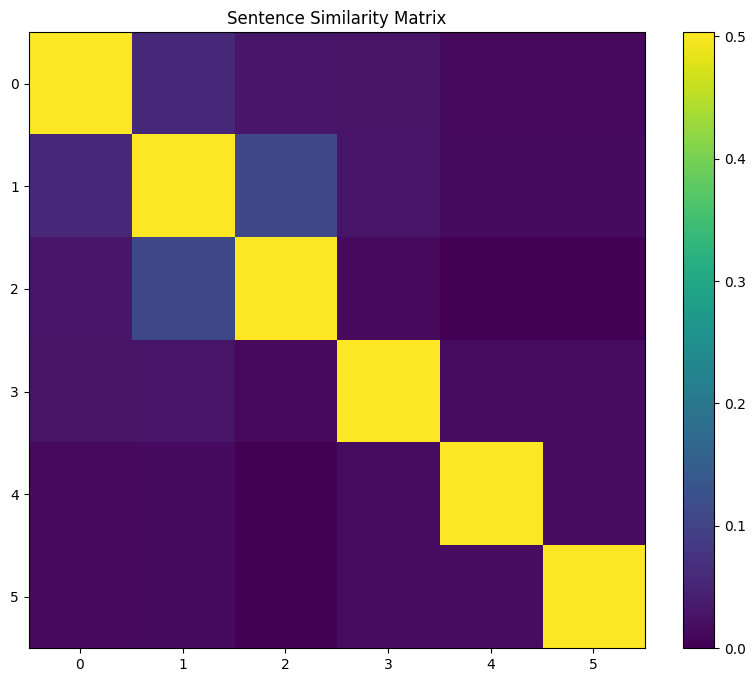



Test Case 6: Unrelated topic sentences about animals and humans
Paragraph:
Cats are cute. Dogs are loyal. Birds can fly. Fish swim in water. Humans are intelligent. 
Graph Embeddings:
[[ 1.24795223e-02  1.46336406e-02  1.24767544e-02 -1.19779762e-02
  -1.32603506e-02 -7.07118120e-03 -6.69075549e-03  7.18992203e-03
  -1.04163671e-02 -1.32110436e-02 -7.22665805e-03  1.51773486e-02
  -7.28094531e-03  2.34432681e-03  1.37429619e-02  6.76670391e-03
  -1.52226107e-03  1.45792793e-02 -9.29749571e-03  8.63987021e-03
   6.30283868e-03 -5.49728703e-03 -1.45928655e-03 -1.37595078e-02
   8.00533235e-05 -4.14421409e-03  1.54911326e-02 -7.37945968e-03
  -1.05607258e-02  1.75850699e-03 -1.22202076e-02 -1.24496548e-02
  -1.02490298e-02 -9.53030493e-03 -6.79932348e-03 -3.06447013e-03
  -3.88402352e-03  9.01226699e-03  1.06804259e-02 -7.08366977e-03
  -9.91750509e-03  1.22232176e-03 -7.05034425e-03  3.72902650e-05
   1.12109873e-02  6.06758241e-03 -8.45343806e-03 -2.00292980e-03
   2.85798655e-04 -1.2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


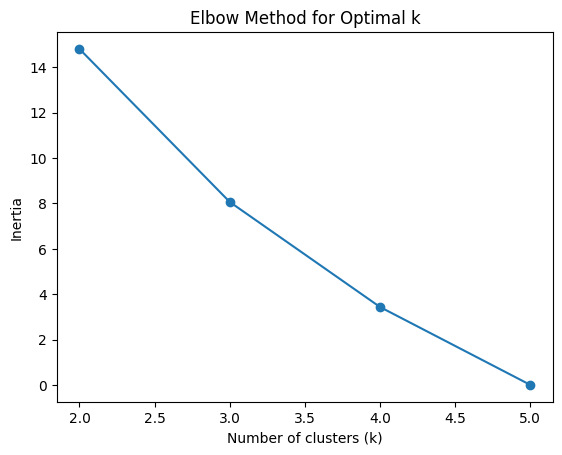

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 3:
  - Cats are cute

Cluster 0:
  - Dogs are loyal
  - Humans are intelligent

Cluster 2:
  - Birds can fly

Cluster 1:
  - Fish swim in water

Cluster Similarities:
Cluster 0 - Intra: 0.0280


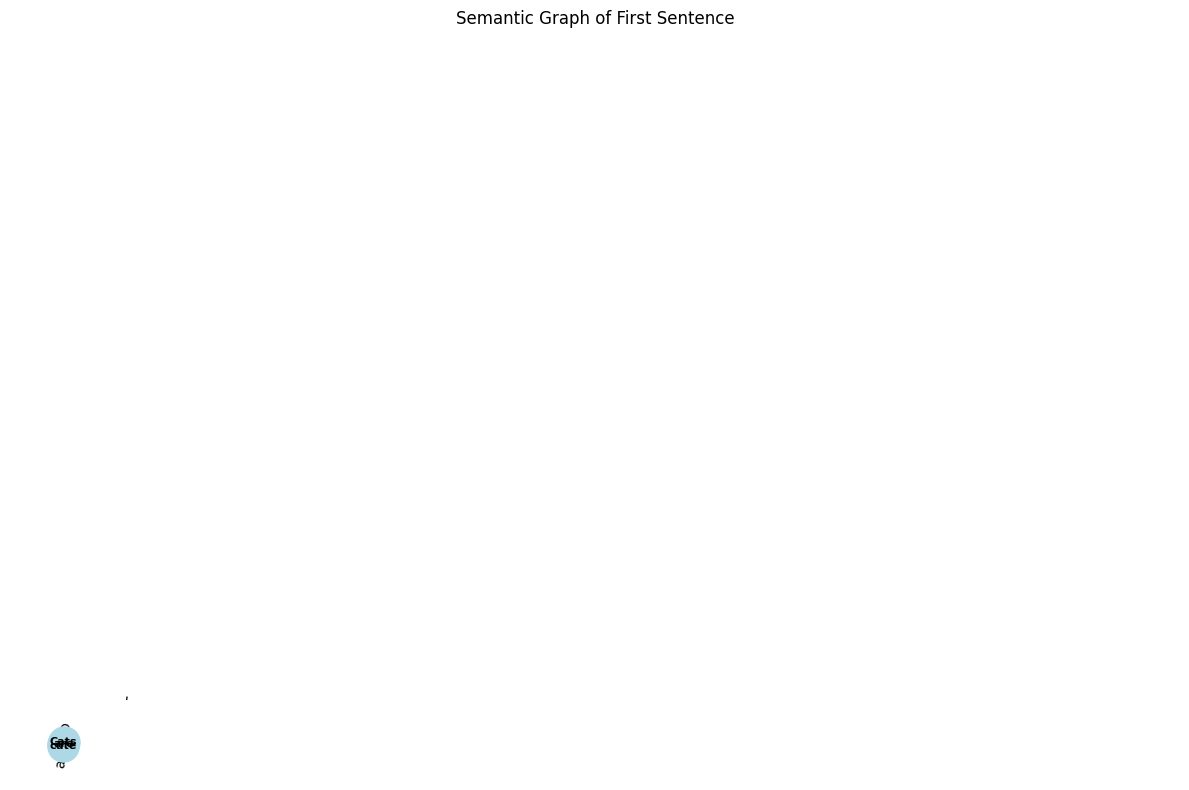

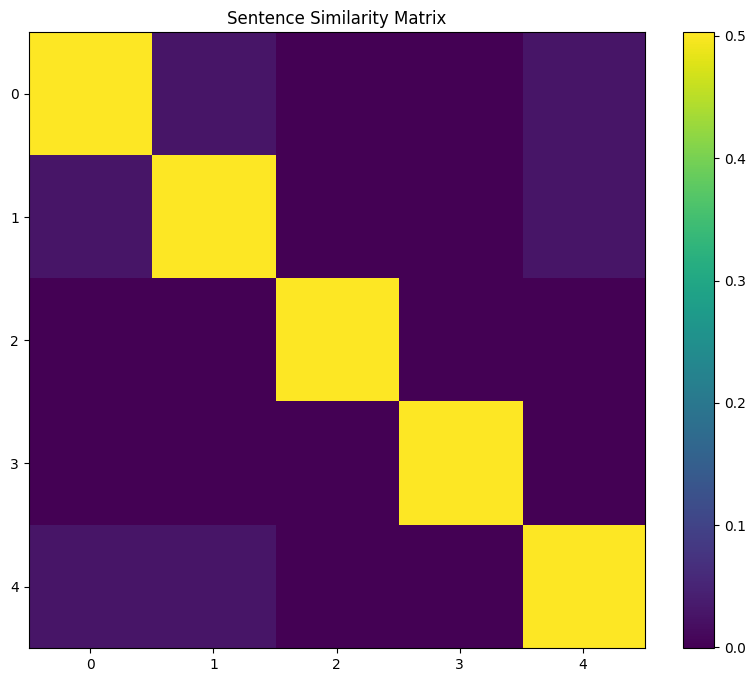



Test Case 7: Related topic sentences about programming languages
Paragraph:
Python is a programming language. Java is another programming language. Python is known for its simplicity. Java is popular in enterprise applications. Python and Java are both object-oriented. Programming languages have syntax and semantics. 
Graph Embeddings:
[[ 1.25059085e-02  1.46731772e-02  1.24867344e-02 -1.19968895e-02
  -1.32665839e-02 -7.09140440e-03 -6.70279283e-03  7.20690610e-03
  -1.04491422e-02 -1.32290265e-02 -7.22710509e-03  1.51940724e-02
  -7.29088578e-03  2.32816045e-03  1.37616275e-02  6.77778525e-03
  -1.52402092e-03  1.45961670e-02 -9.30685550e-03  8.66061077e-03
   6.29636506e-03 -5.50294435e-03 -1.44935865e-03 -1.37924748e-02
   6.67972054e-05 -4.16485406e-03  1.54940393e-02 -7.40030548e-03
  -1.05657205e-02  1.74723135e-03 -1.22384680e-02 -1.24867177e-02
  -1.02455663e-02 -9.53906029e-03 -6.81277551e-03 -3.08757974e-03
  -3.89434351e-03  9.02900193e-03  1.07152984e-02 -7.08869239e-03


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

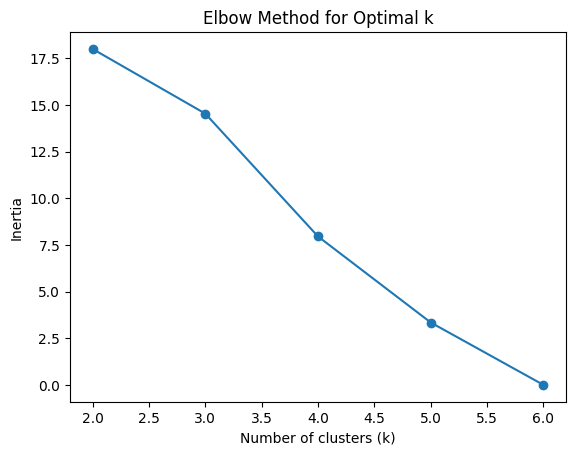

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - Python is a programming language
  - Java is another programming language
  - Python is known for its simplicity
  - Java is popular in enterprise applications

Cluster 2:
  - Python and Java are both object-oriented

Cluster 1:
  - Programming languages have syntax and semantics

Cluster Similarities:
Cluster 0 - Intra: 0.0337


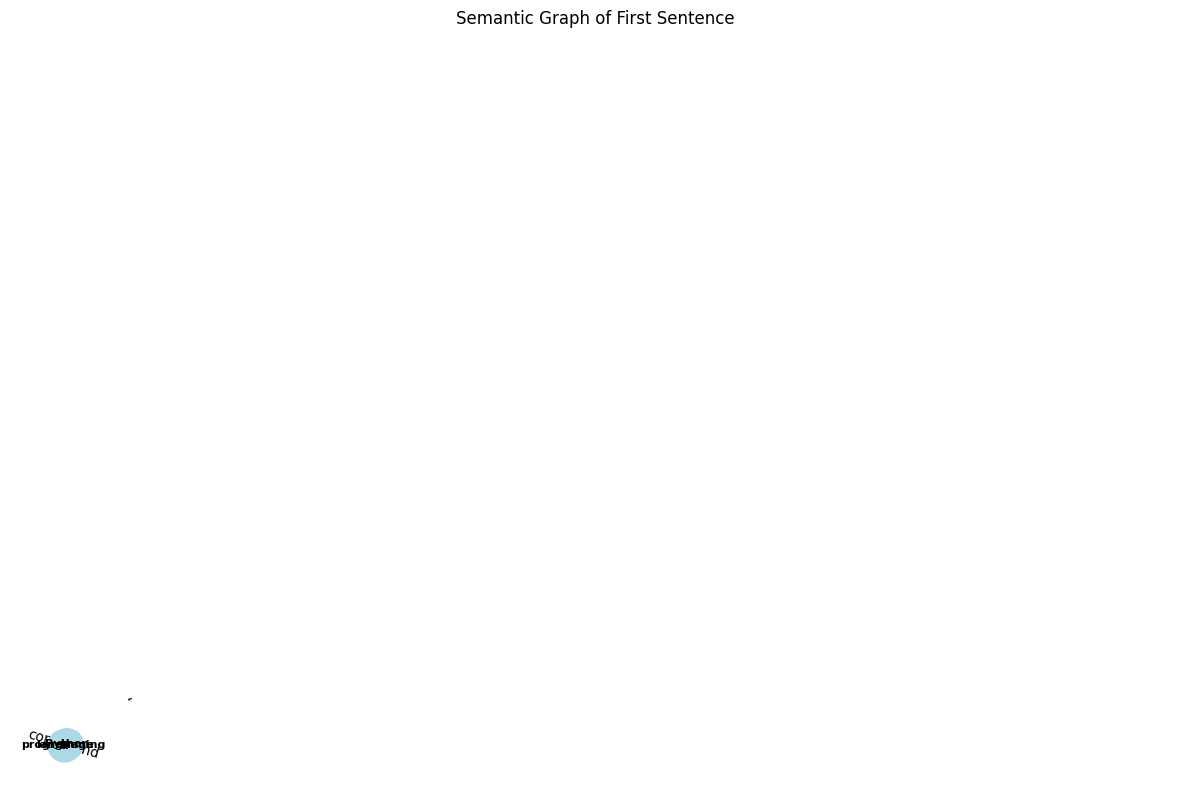

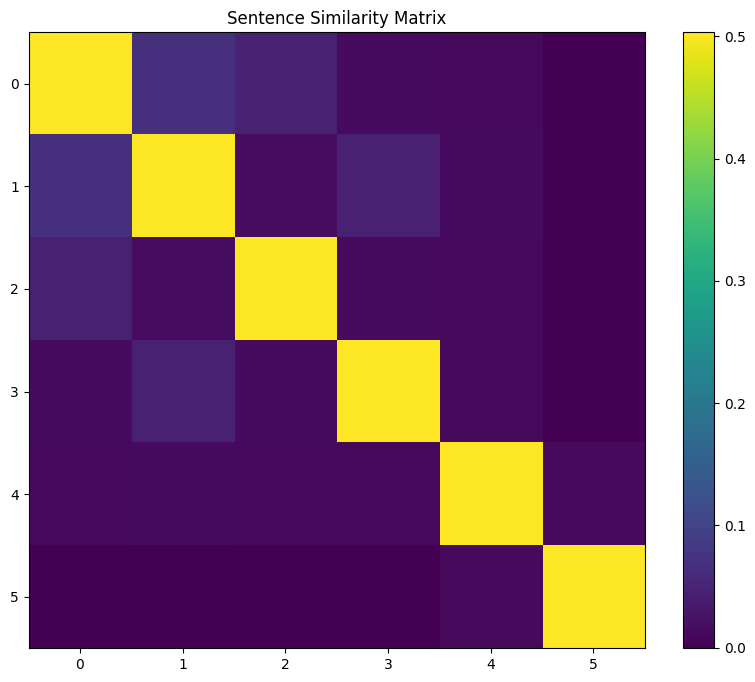



Test Case 8: Related topic sentences about flowers
Paragraph:
Sunflowers are beautiful. Roses have thorns. Tulips bloom in spring. Daffodils are yellow. Lilies have a pleasant fragrance. 
Graph Embeddings:
[[ 1.24872206e-02  1.46342041e-02  1.24740694e-02 -1.19759524e-02
  -1.32596679e-02 -7.07883155e-03 -6.69322070e-03  7.19861221e-03
  -1.04131596e-02 -1.32145183e-02 -7.22366478e-03  1.51742501e-02
  -7.28029804e-03  2.34223693e-03  1.37403151e-02  6.77340245e-03
  -1.51570817e-03  1.45841613e-02 -9.29216109e-03  8.63777567e-03
   6.30191667e-03 -5.50119020e-03 -1.45765557e-03 -1.37650482e-02
   8.40049252e-05 -4.14995570e-03  1.54920314e-02 -7.37403985e-03
  -1.05600404e-02  1.75320124e-03 -1.22176819e-02 -1.24501549e-02
  -1.02449581e-02 -9.52734705e-03 -6.79354696e-03 -3.07205855e-03
  -3.87858576e-03  9.01423953e-03  1.06814858e-02 -7.09105516e-03
  -9.91208665e-03  1.21736981e-03 -7.04545435e-03  4.25298495e-05
   1.12202307e-02  6.07355172e-03 -8.45855847e-03 -2.00684625e-03


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


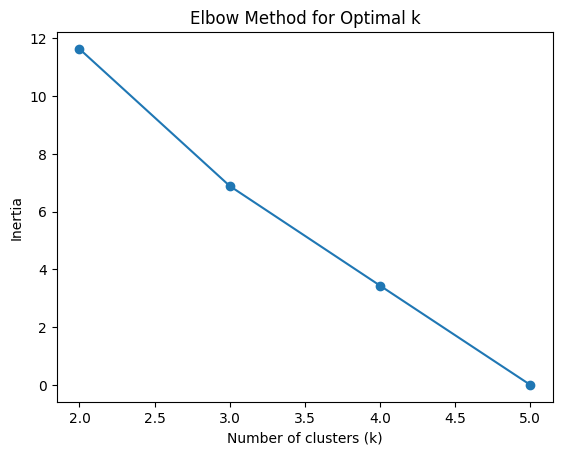

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - Sunflowers are beautiful
  - Daffodils are yellow

Cluster 3:
  - Roses have thorns

Cluster 2:
  - Tulips bloom in spring

Cluster 1:
  - Lilies have a pleasant fragrance

Cluster Similarities:
Cluster 0 - Intra: 0.0271


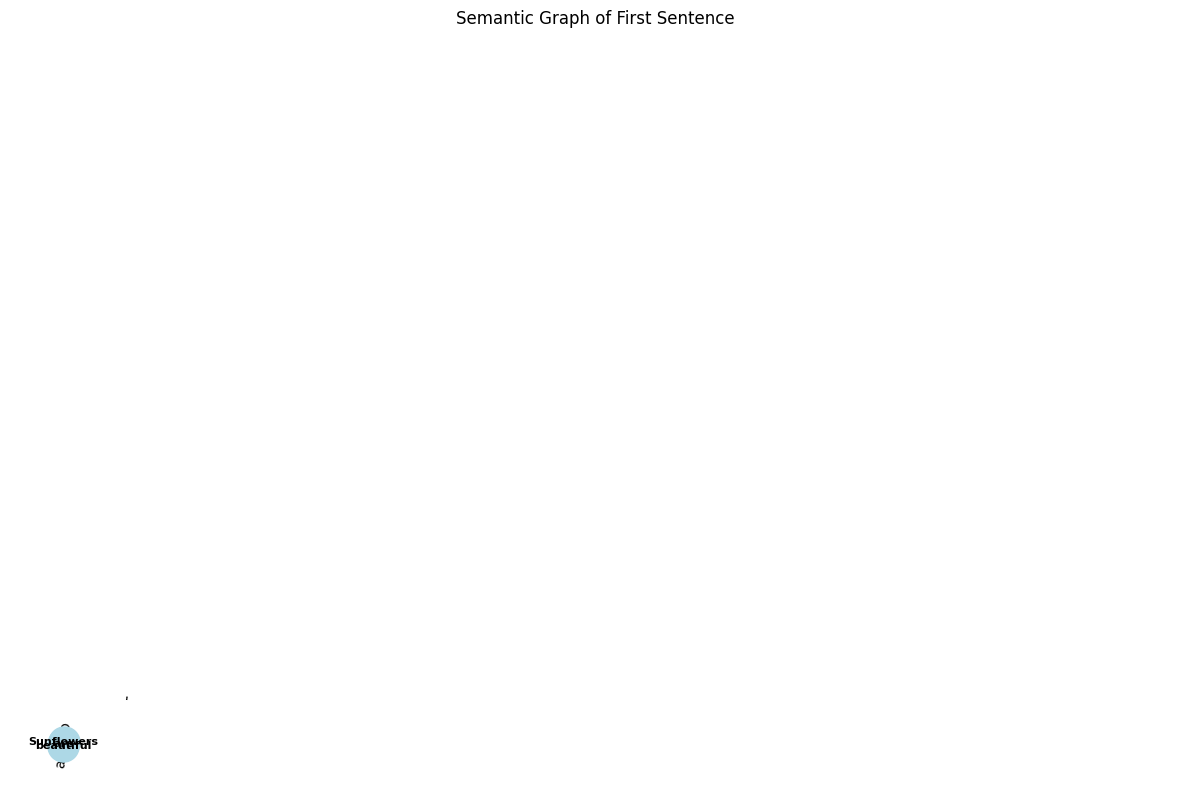

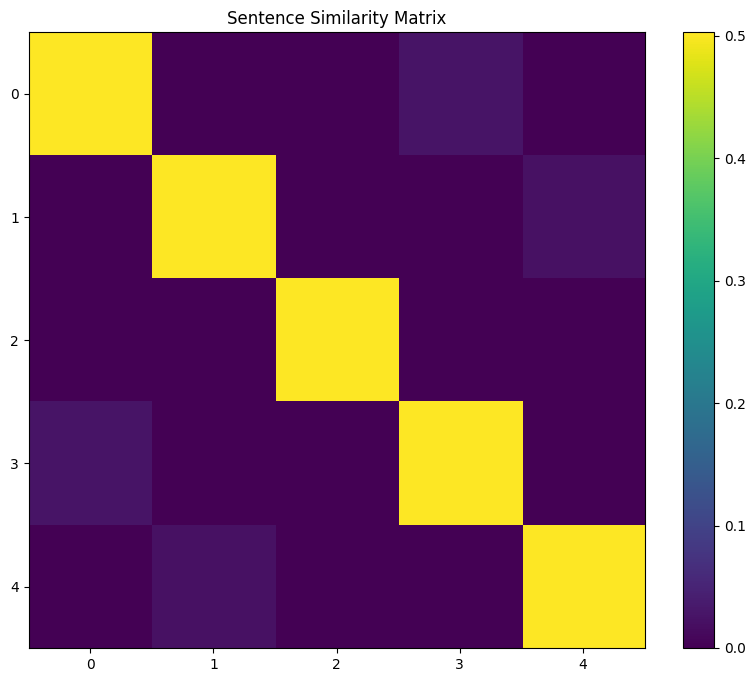



Test Case 9: Two related topics: stocks and AI
Paragraph:
The stock market fluctuates daily. Investing in stocks can be risky. Diversifying investments can mitigate risks. Artificial intelligence is advancing rapidly. AI can analyze stock market trends. AI is used in various financial applications. 
Graph Embeddings:
[[ 1.25070233e-02  1.46571724e-02  1.24734417e-02 -1.19886417e-02
  -1.32507673e-02 -7.08959484e-03 -6.70879800e-03  7.19586061e-03
  -1.04433568e-02 -1.32169994e-02 -7.23476941e-03  1.51798883e-02
  -7.28788367e-03  2.33312766e-03  1.37607232e-02  6.77326368e-03
  -1.52822409e-03  1.45847825e-02 -9.31155682e-03  8.64689052e-03
   6.29525259e-03 -5.49319759e-03 -1.44206337e-03 -1.37936044e-02
   7.10613094e-05 -4.16442193e-03  1.54958209e-02 -7.39592407e-03
  -1.05590643e-02  1.75362639e-03 -1.22364517e-02 -1.24606313e-02
  -1.02422470e-02 -9.54154506e-03 -6.80803647e-03 -3.08574014e-03
  -3.89174209e-03  9.01583023e-03  1.07034752e-02 -7.09012616e-03
  -9.92699899e-03  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

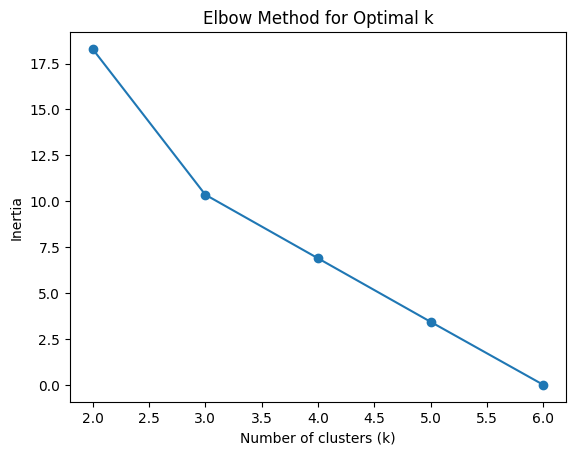

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 2:
  - The stock market fluctuates daily
  - AI can analyze stock market trends

Cluster 0:
  - Investing in stocks can be risky
  - Diversifying investments can mitigate risks

Cluster 3:
  - Artificial intelligence is advancing rapidly

Cluster 1:
  - AI is used in various financial applications

Cluster Similarities:
Cluster 0 - Intra: 0.0157
Cluster 2 - Intra: 0.0302


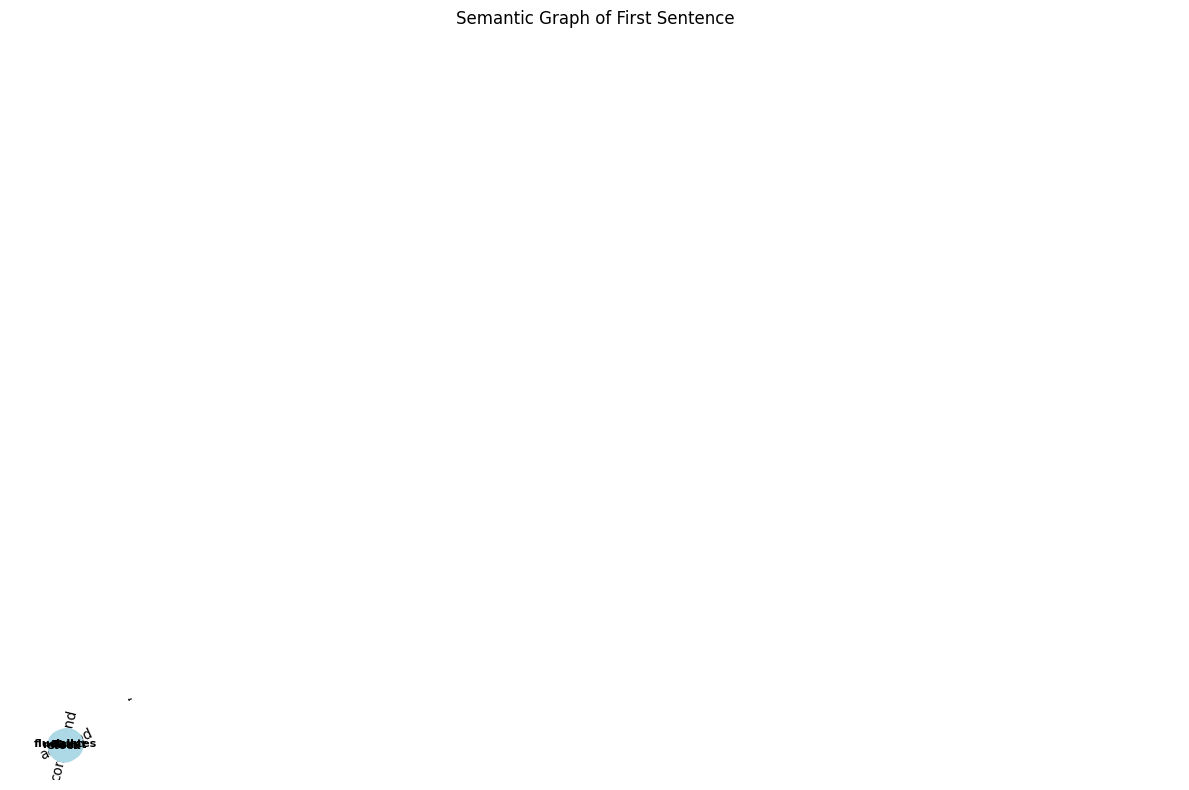

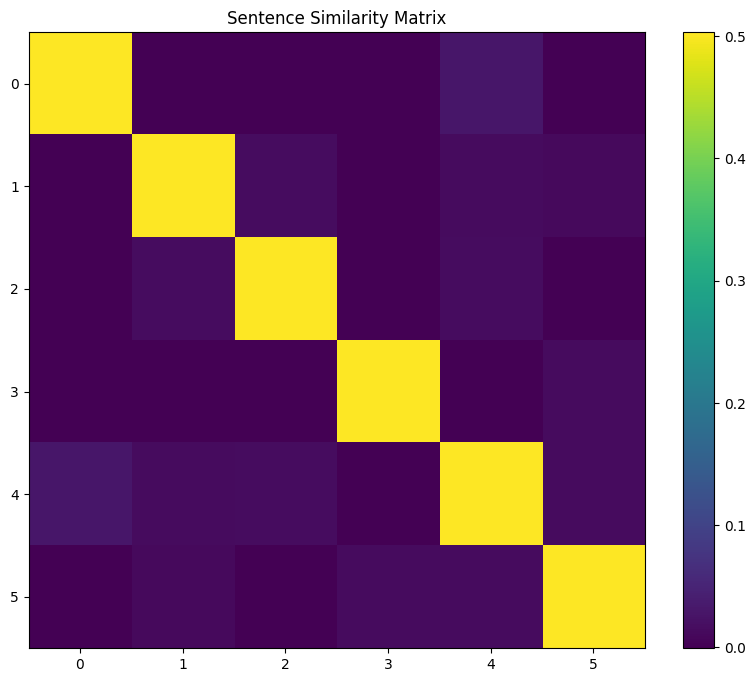

In [ ]:
def test_cluster_sentences():
    test_cases = [
        {
            "paragraph": (
                "The sun rises in the east. "
                "The sun is a star. "
                "The sun is hot. "
                "The sun sets in the west. "
                "Artificial intelligence is reshaping many industries. "
            ),
            "description": "Mixed topic sentences"
        },
        {
            "paragraph": (
                "I love apples. "
                "Apples are my favorite fruit. "
                "I enjoy eating apples every day. "
                "Apple pie is delicious. "
                "Artificial intelligence can play chess. "
                "AI can also help in medical diagnosis. "
            ),
            "description": "Two clear topics: apples and AI"
        },
        {
            "paragraph": (
                "The quick brown fox jumps over the lazy dog. "
                "The dog barked at the fox. "
                "Foxes are wild animals. "
                "Dogs are domestic animals. "
                "Domestic animals can be trained. "
            ),
            "description": "Related topic sentences about animals"
        },
        {
            "paragraph": (
                "I like to play football. "
                "Football is a popular sport. "
                "Many people watch football games. "
                "The sun rises in the east. "
                "The sun sets in the west. "
                "Football requires skill and teamwork. "
            ),
            "description": "Two separate topics: football and the sun"
        },
        {
            "paragraph": (
                "Natural language processing is a field of AI. "
                "Machine learning is a subset of AI. "
                "Deep learning is a subset of machine learning. "
                "AI is transforming various industries. "
                "AI can improve customer service. "
                "AI has applications in healthcare. "
            ),
            "description": "Related topic sentences about AI"
        },
        {
            "paragraph": (
                "Cats are cute. "
                "Dogs are loyal. "
                "Birds can fly. "
                "Fish swim in water. "
                "Humans are intelligent. "
            ),
            "description": "Unrelated topic sentences about animals and humans"
        },
        {
            "paragraph": (
                "Python is a programming language. "
                "Java is another programming language. "
                "Python is known for its simplicity. "
                "Java is popular in enterprise applications. "
                "Python and Java are both object-oriented. "
                "Programming languages have syntax and semantics. "
            ),
            "description": "Related topic sentences about programming languages"
        },
        {
            "paragraph": (
                "Sunflowers are beautiful. "
                "Roses have thorns. "
                "Tulips bloom in spring. "
                "Daffodils are yellow. "
                "Lilies have a pleasant fragrance. "
            ),
            "description": "Related topic sentences about flowers"
        },
        {
            "paragraph": (
                "The stock market fluctuates daily. "
                "Investing in stocks can be risky. "
                "Diversifying investments can mitigate risks. "
                "Artificial intelligence is advancing rapidly. "
                "AI can analyze stock market trends. "
                "AI is used in various financial applications. "
            ),
            "description": "Two related topics: stocks and AI"
        }
    ]

    for idx, case in enumerate(test_cases):
        print(f"Test Case {idx + 1}: {case['description']}")
        print("Paragraph:")
        print(case["paragraph"])
        cluster_sentences(case["paragraph"])
        print("\n" + "="*50 + "\n")

# Example usage
if __name__ == "__main__":
    test_cluster_sentences()

### Novel Method by commbining Contrastive clustering

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def semantic_aware_sparsification(sim_matrix, threshold=0.5):
    """Apply semantic-aware sparsification to the similarity matrix."""
    sparse_matrix = np.where(sim_matrix > threshold, sim_matrix, 0)
    return sparse_matrix

def contrastive_loss(sim_matrix, positive_pairs, negative_pairs):
    """Calculate contrastive loss to refine the similarity matrix."""
    pos_loss = np.sum(1 - sim_matrix[positive_pairs])  # Push positive pairs closer
    neg_loss = np.sum(sim_matrix[negative_pairs])      # Push negative pairs apart
    return pos_loss + neg_loss

def refine_similarity_matrix_with_contrastive_learning(sim_matrix):
    """Refine the similarity matrix using contrastive learning."""
    # Step 1: Apply semantic-aware sparsification
    sparse_sim_matrix = semantic_aware_sparsification(sim_matrix)

    # Step 2: Contrastive loss optimization
    positive_pairs = np.where(sparse_sim_matrix > 0.7)
    negative_pairs = np.where(sparse_sim_matrix < 0.3)
    loss = contrastive_loss(sparse_sim_matrix, positive_pairs, negative_pairs)

    # Refine the similarity matrix based on the loss
    refined_matrix = sparse_sim_matrix - loss * 0.01  # Adjust the refinement strength as needed
    refined_matrix = np.clip(refined_matrix, 0, 1)   # Ensure the matrix stays within a valid range

    return refined_matrix

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def build_refined_similarity_matrix(paragraph):
    """Build and refine the similarity matrix for a paragraph."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]
    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Step 1: Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)

    # Step 2: Calculate initial similarity matrix
    kernel_matrix = calculate_graph_kernels(graphs)
    initial_similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            initial_similarity_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    # Step 3: Refine similarity matrix with contrastive learning
    refined_similarity_matrix = refine_similarity_matrix_with_contrastive_learning(
        initial_similarity_matrix)

    return refined_similarity_matrix, sentences

def perform_clustering(refined_similarity_matrix, sentences):
    """Perform clustering on the refined similarity matrix."""
    # Determine the optimal number of clusters using the Elbow Method
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(refined_similarity_matrix, k_range)

    # Plot the Elbow Method results
    plt.figure()
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    # Find the elbow point
    optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
    logger.info(f"Optimal number of clusters: {optimal_k}")

    # Perform clustering
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - refined_similarity_matrix)

    # Group sentences into clusters
    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

def visualize_graph(graph, title):
    """Visualize a semantic graph."""
    pos = nx.spring_layout(graph)
    fig, ax = plt.subplots(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, labels={node: graph.nodes[node]['word'] for node in graph.nodes()},
            node_color='lightblue', node_size=500, font_size=8, font_weight='bold', ax=ax)
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on refined semantic graph similarity."""
    refined_similarity_matrix, sentences = build_refined_similarity_matrix(paragraph)
    perform_clustering(refined_similarity_matrix, sentences)

    # Visualize the first sentence's graph as an example
    if len(sentences) > 0:
        visualize_graph(build_semantic_graph(sentences[0]), "Semantic Graph of First Sentence")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(refined_similarity_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

def test_cluster_sentences(test_cases):
    """Test function that runs cluster_sentences on a list of test cases."""
    for idx, case in enumerate(test_cases):
        print(f"Test Case {idx + 1}: {case['description']}")
        print("Paragraph:")
        print(case["paragraph"])
        cluster_sentences(case["paragraph"])
        print("\n" + "="*50 + "\n")




Test Case 1: Mixed topic sentences
Paragraph:
The sun rises in the east. The sun is a star. The sun is hot. The sun sets in the west. Artificial intelligence is reshaping many industries. 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


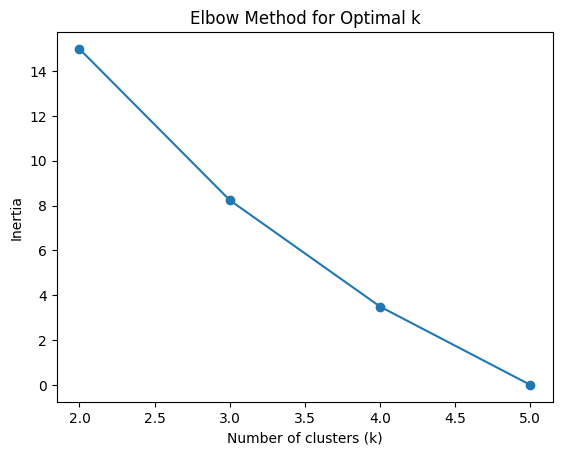

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - The sun rises in the east
  - The sun is a star

Cluster 3:
  - The sun is hot

Cluster 2:
  - The sun sets in the west

Cluster 1:
  - Artificial intelligence is reshaping many industries


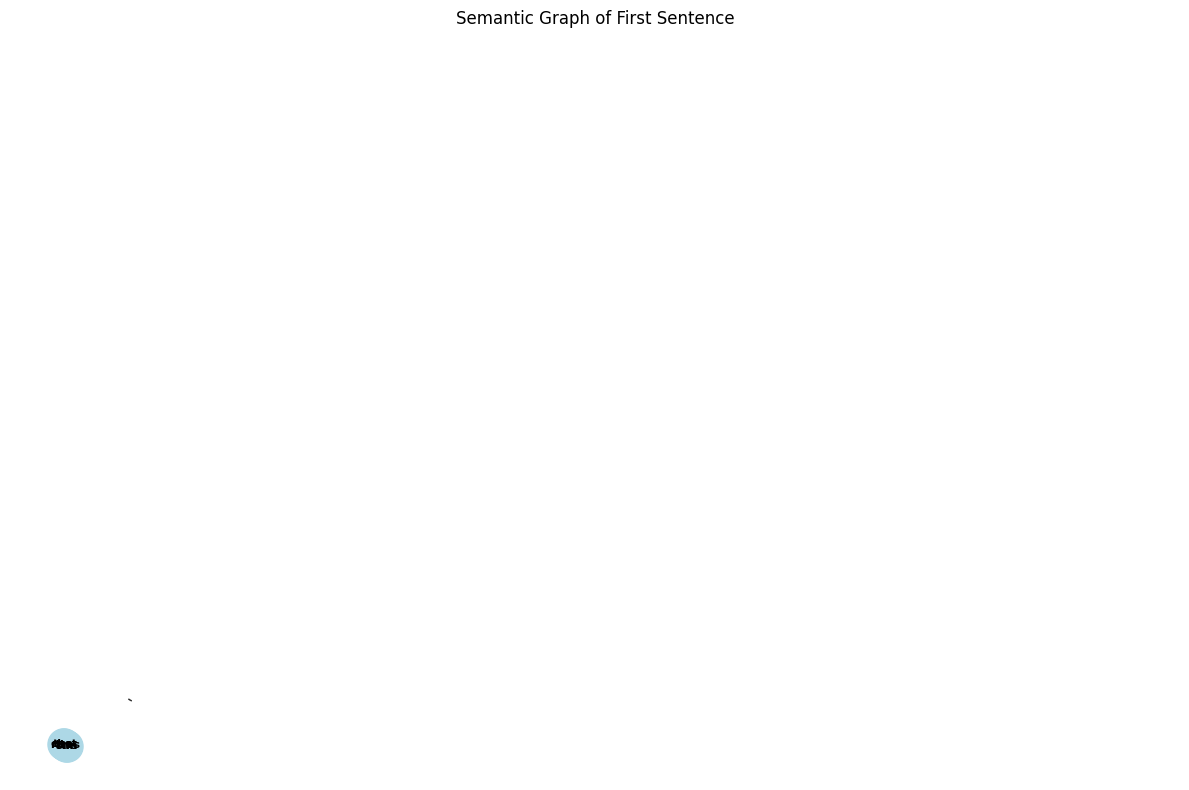

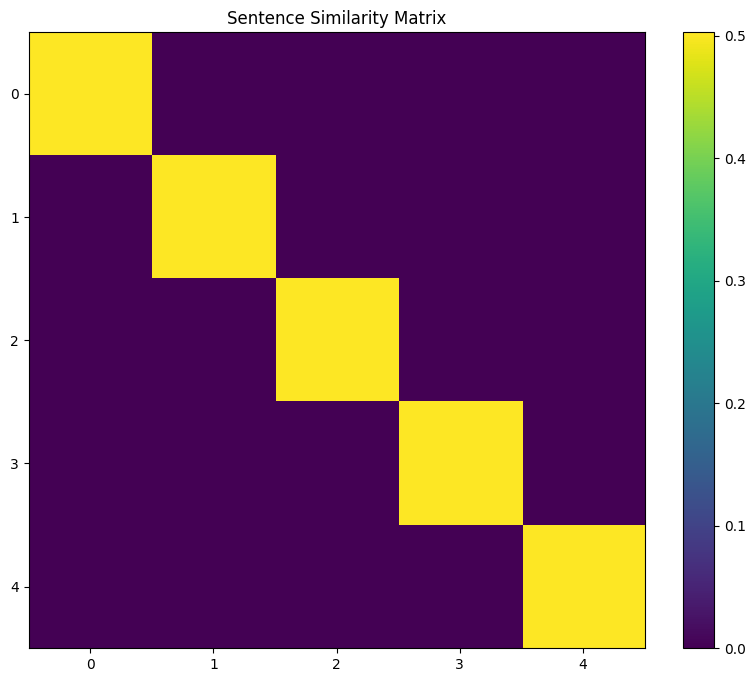



Test Case 2: Two clear topics: apples and AI
Paragraph:
I love apples. Apples are my favorite fruit. I enjoy eating apples every day. Apple pie is delicious. Artificial intelligence can play chess. AI can also help in medical diagnosis. 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

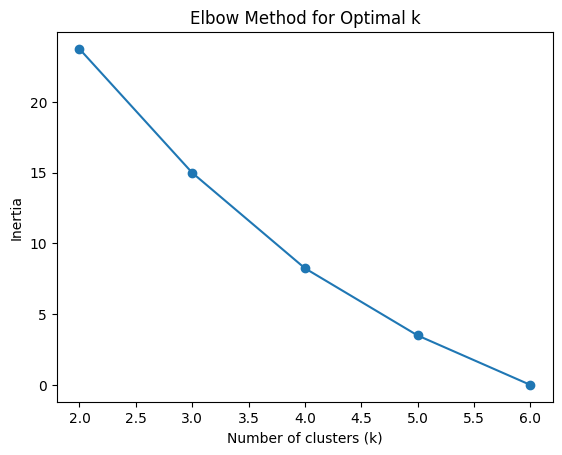

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - I love apples
  - Apples are my favorite fruit

Cluster 4:
  - I enjoy eating apples every day

Cluster 3:
  - Apple pie is delicious

Cluster 2:
  - Artificial intelligence can play chess

Cluster 1:
  - AI can also help in medical diagnosis


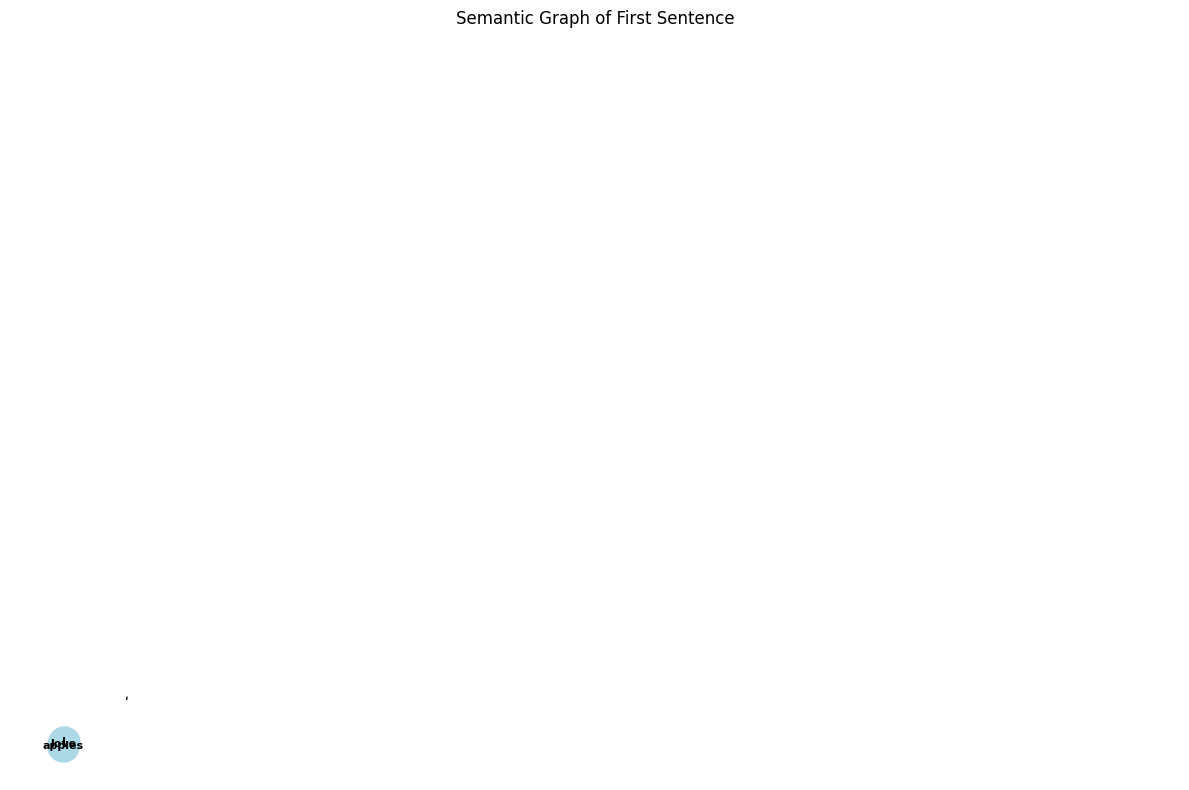

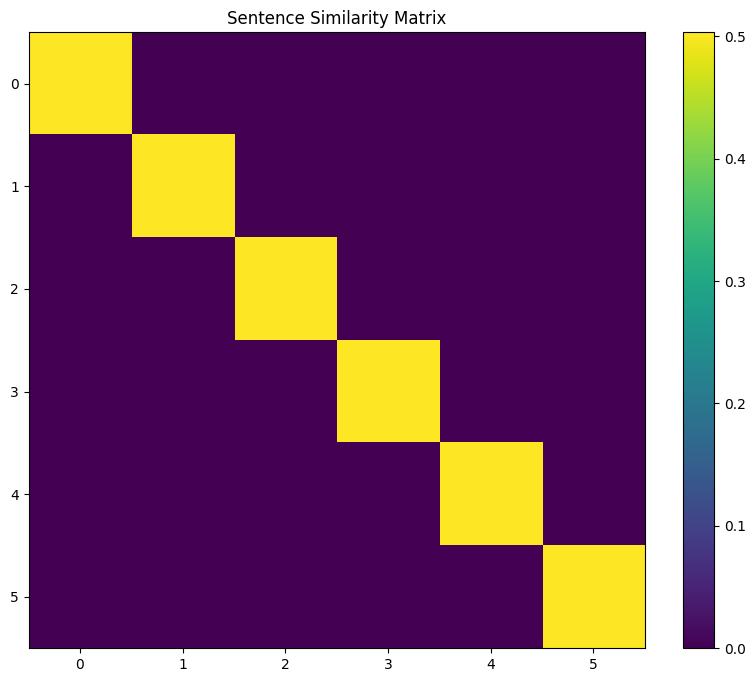



Test Case 3: Related topic sentences about animals
Paragraph:
The quick brown fox jumps over the lazy dog. The dog barked at the fox. Foxes are wild animals. Dogs are domestic animals. Domestic animals can be trained. 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


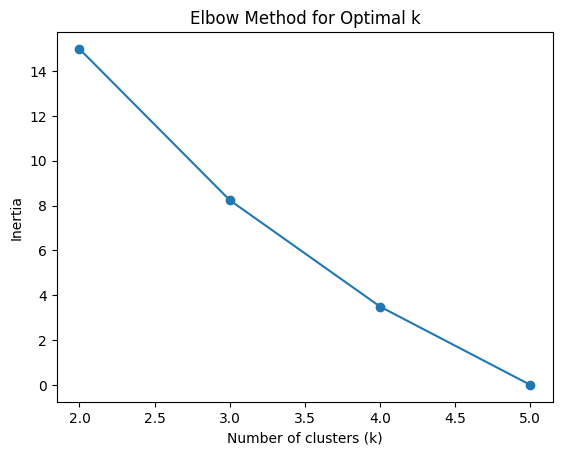

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - The quick brown fox jumps over the lazy dog
  - The dog barked at the fox

Cluster 3:
  - Foxes are wild animals

Cluster 2:
  - Dogs are domestic animals

Cluster 1:
  - Domestic animals can be trained


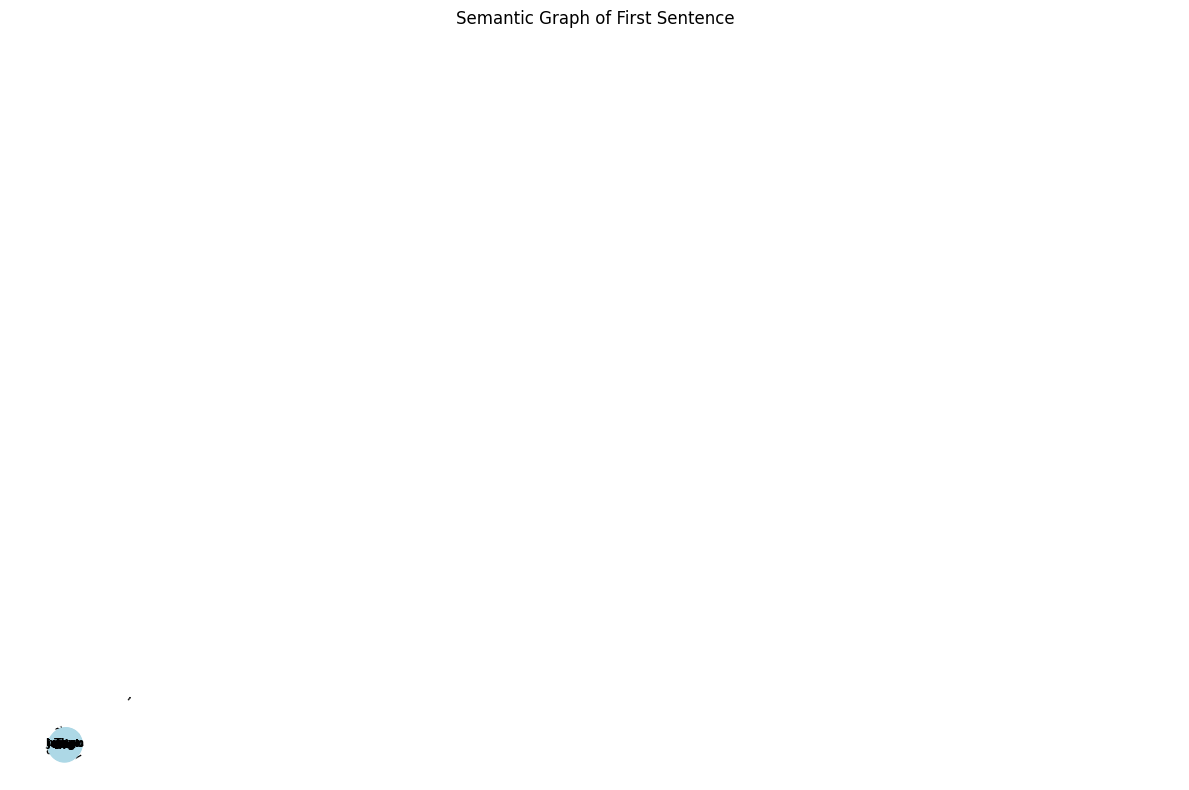

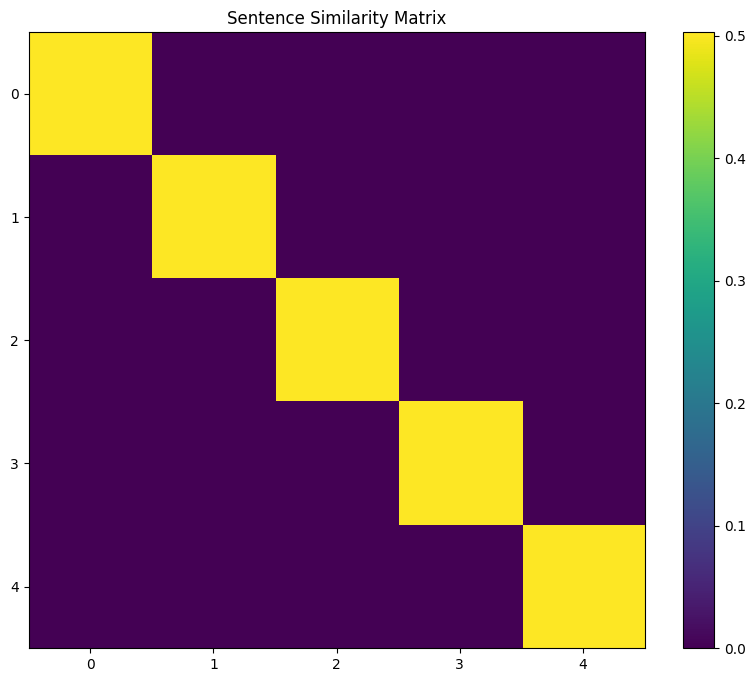



Test Case 4: Two separate topics: football and the sun
Paragraph:
I like to play football. Football is a popular sport. Many people watch football games. The sun rises in the east. The sun sets in the west. Football requires skill and teamwork. 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

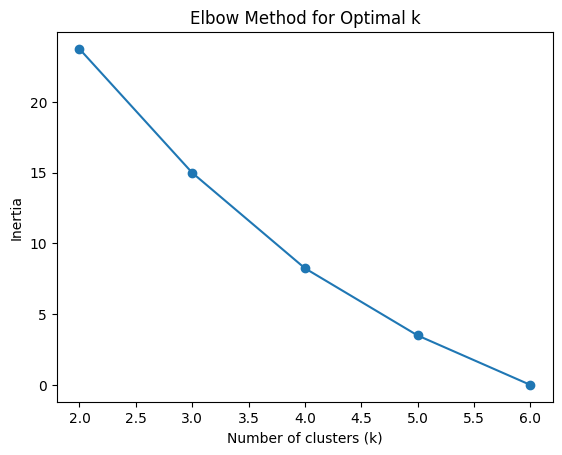

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - I like to play football
  - Football is a popular sport

Cluster 4:
  - Many people watch football games

Cluster 3:
  - The sun rises in the east

Cluster 2:
  - The sun sets in the west

Cluster 1:
  - Football requires skill and teamwork


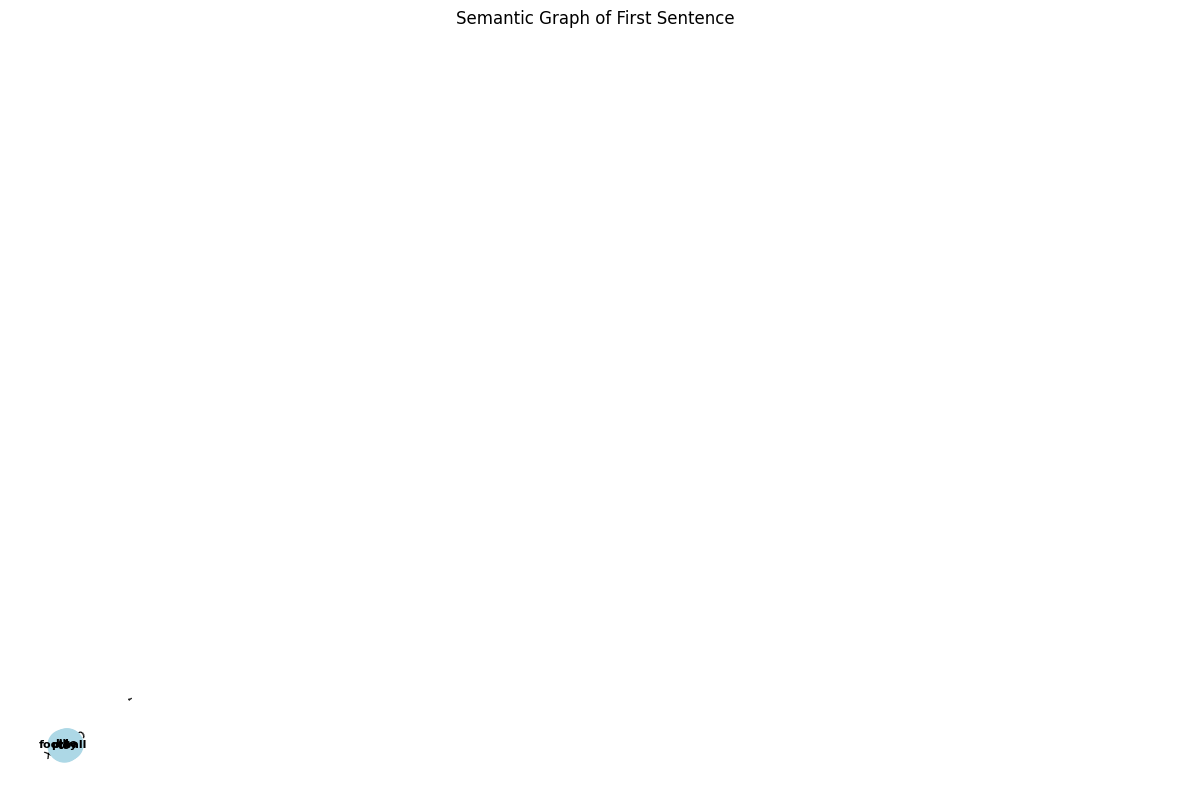

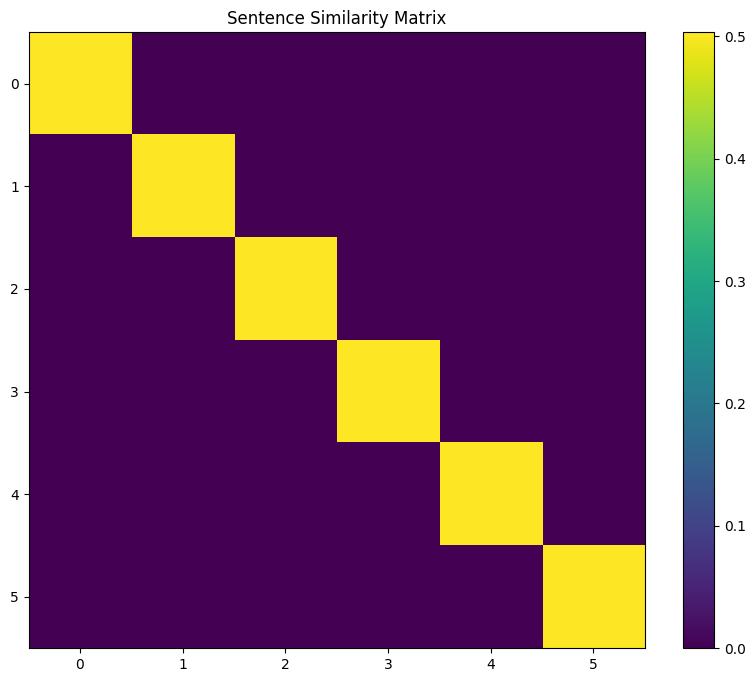



Test Case 5: Related topic sentences about AI
Paragraph:
Natural language processing is a field of AI. Machine learning is a subset of AI. Deep learning is a subset of machine learning. AI is transforming various industries. AI can improve customer service. AI has applications in healthcare. 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

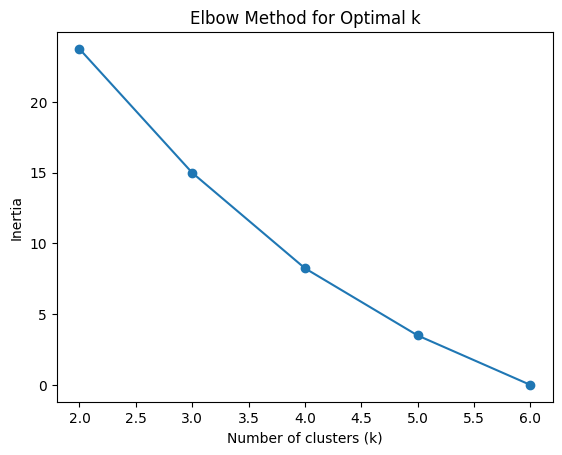

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - Natural language processing is a field of AI
  - Machine learning is a subset of AI

Cluster 4:
  - Deep learning is a subset of machine learning

Cluster 3:
  - AI is transforming various industries

Cluster 2:
  - AI can improve customer service

Cluster 1:
  - AI has applications in healthcare


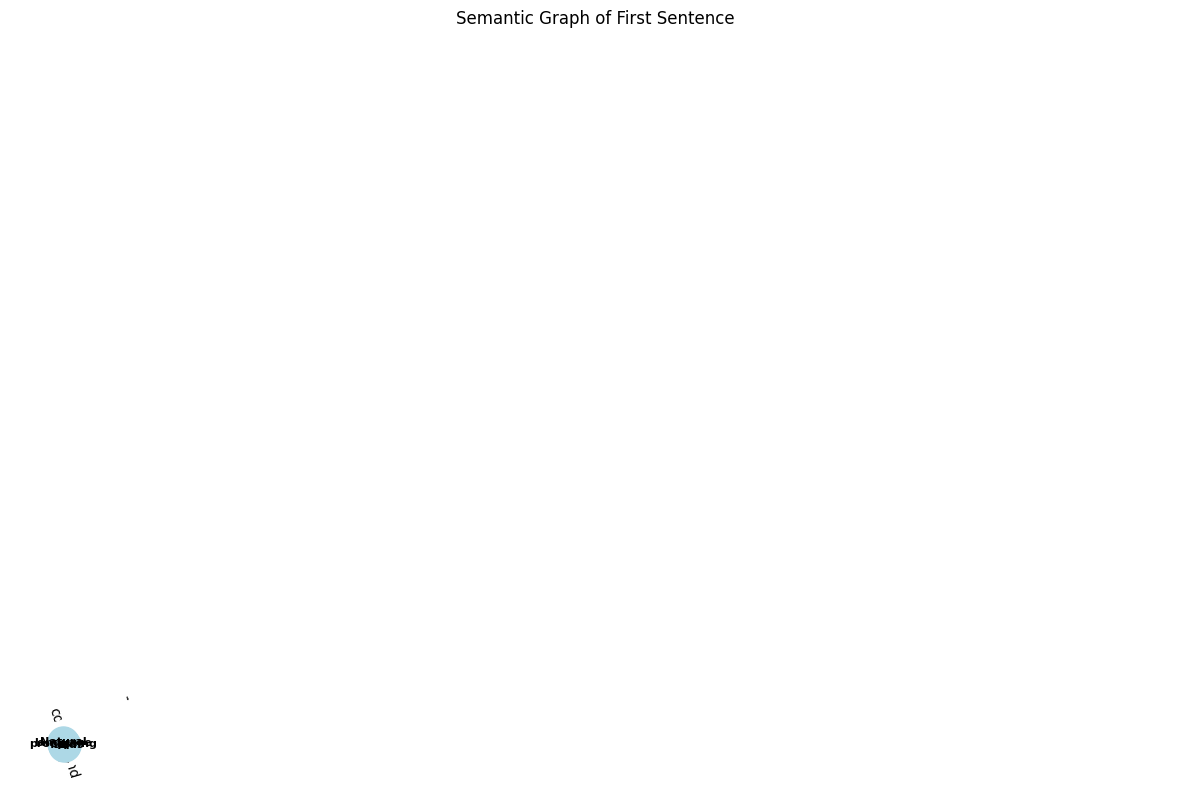

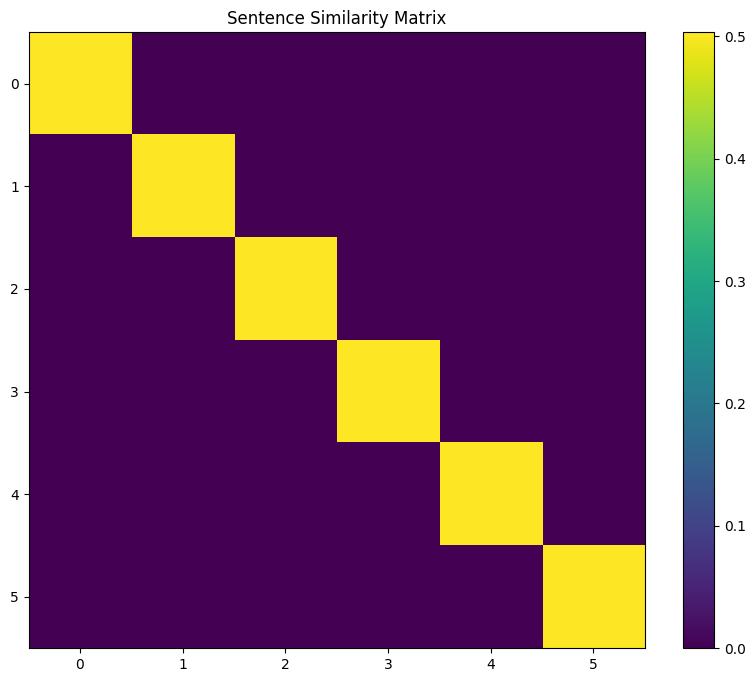



Test Case 6: Unrelated topic sentences about animals and humans
Paragraph:
Cats are cute. Dogs are loyal. Birds can fly. Fish swim in water. Humans are intelligent. 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


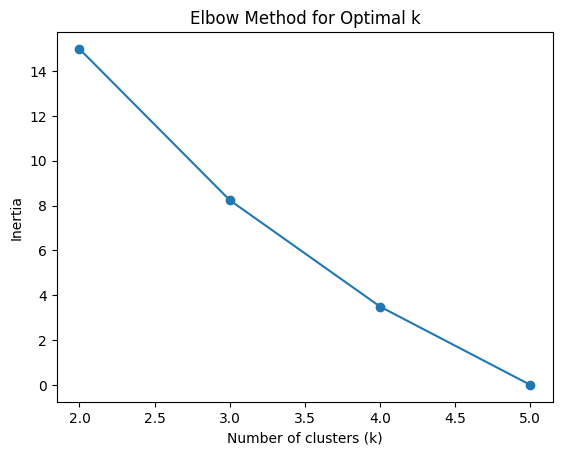

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - Cats are cute
  - Dogs are loyal

Cluster 3:
  - Birds can fly

Cluster 2:
  - Fish swim in water

Cluster 1:
  - Humans are intelligent


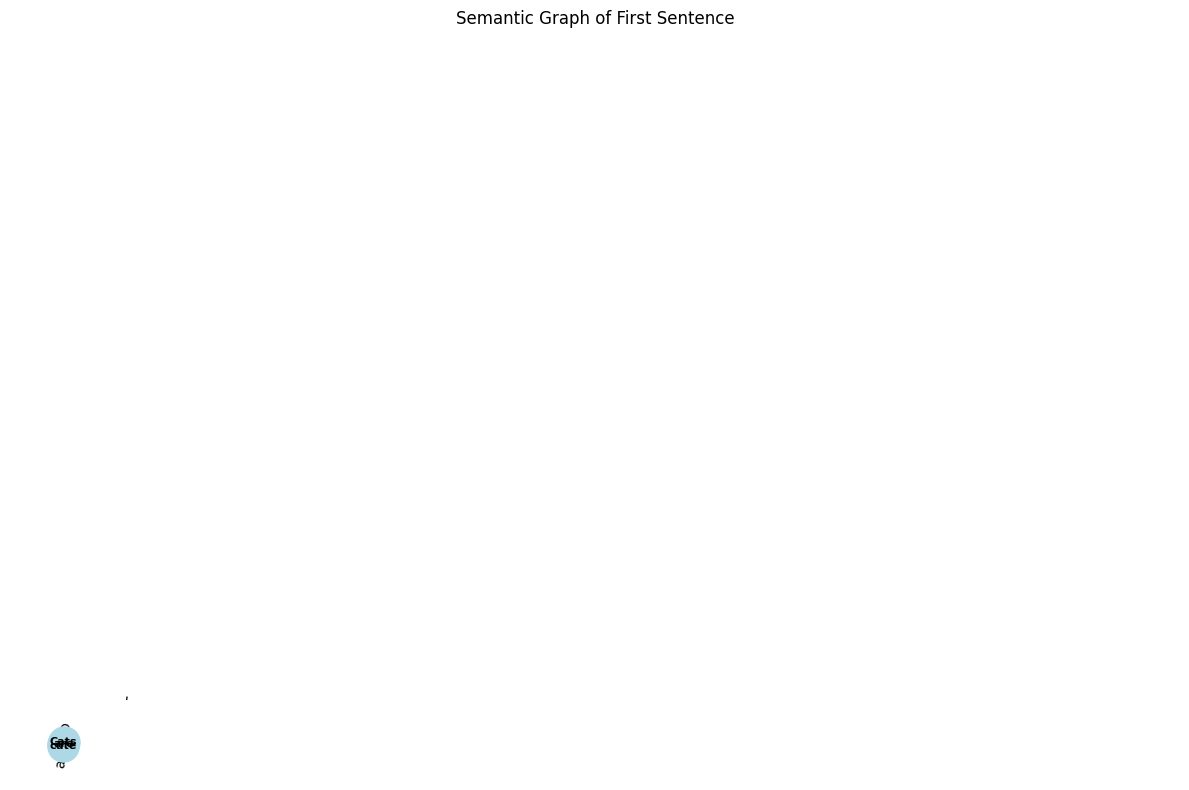

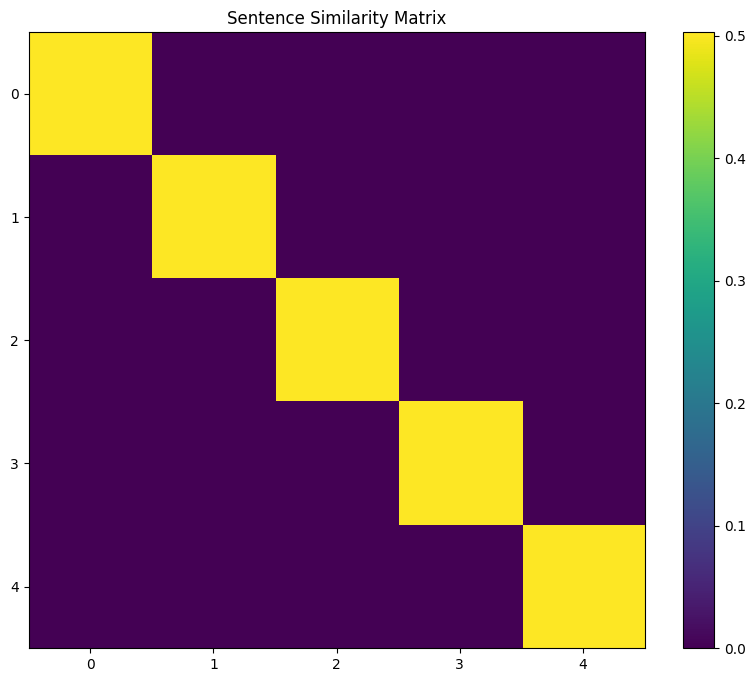



Test Case 7: Related topic sentences about programming languages
Paragraph:
Python is a programming language. Java is another programming language. Python is known for its simplicity. Java is popular in enterprise applications. Python and Java are both object-oriented. Programming languages have syntax and semantics. 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

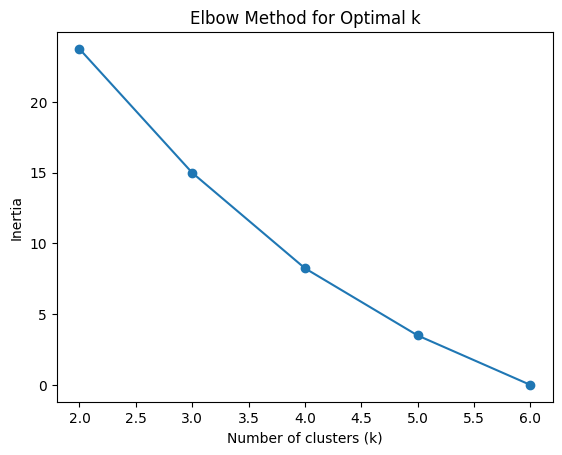

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - Python is a programming language
  - Java is another programming language

Cluster 4:
  - Python is known for its simplicity

Cluster 3:
  - Java is popular in enterprise applications

Cluster 2:
  - Python and Java are both object-oriented

Cluster 1:
  - Programming languages have syntax and semantics


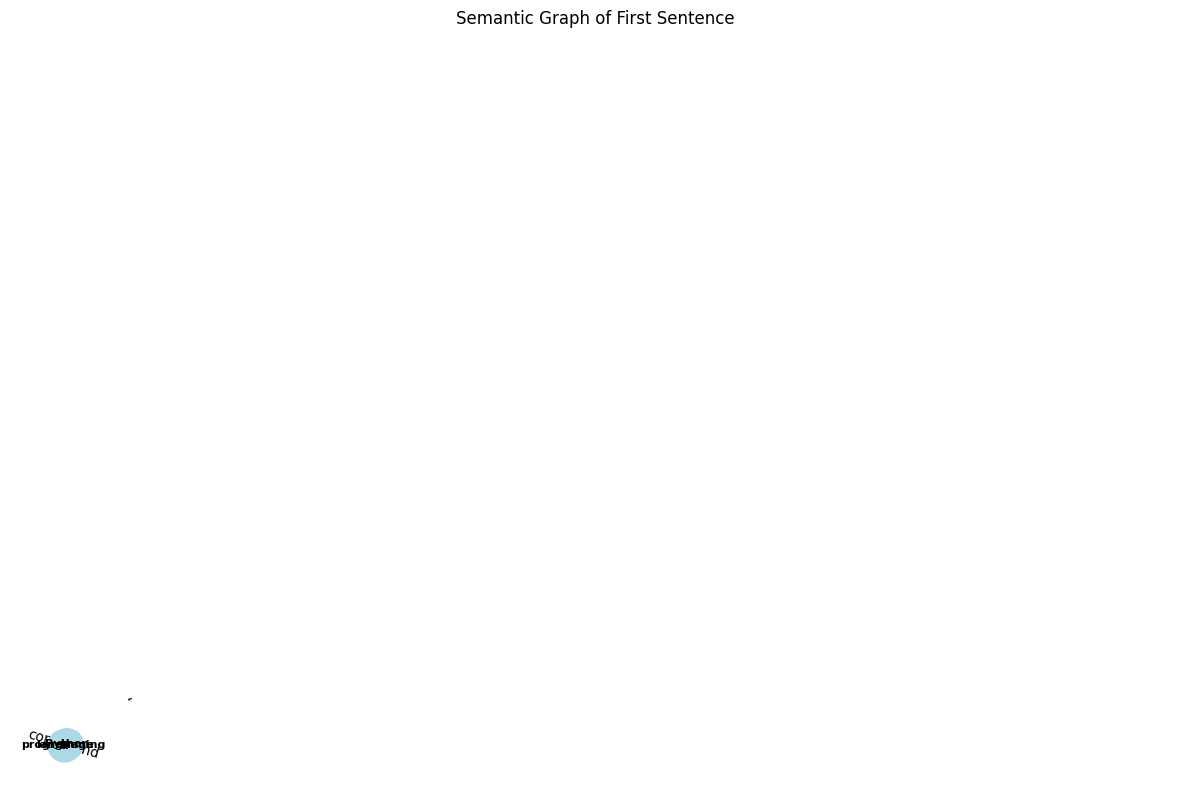

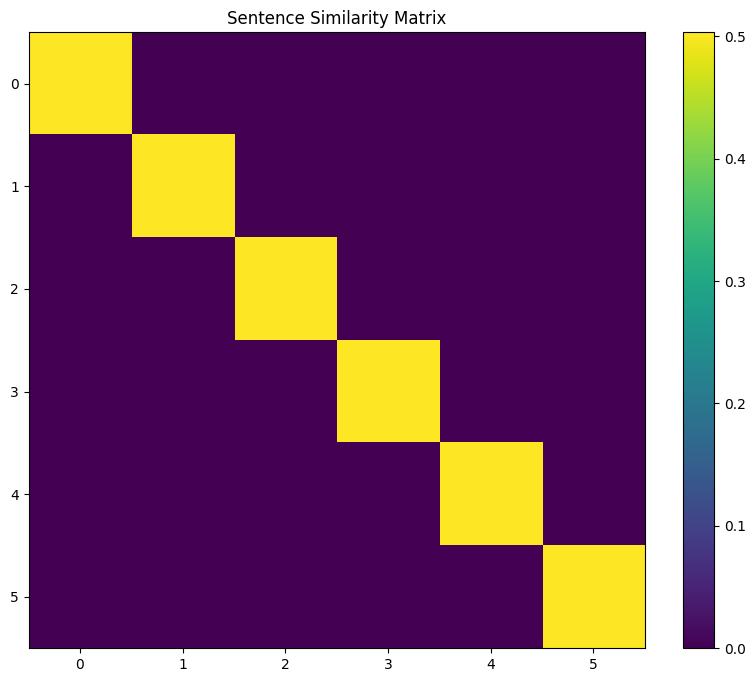



Test Case 8: Related topic sentences about flowers
Paragraph:
Sunflowers are beautiful. Roses have thorns. Tulips bloom in spring. Daffodils are yellow. Lilies have a pleasant fragrance. 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


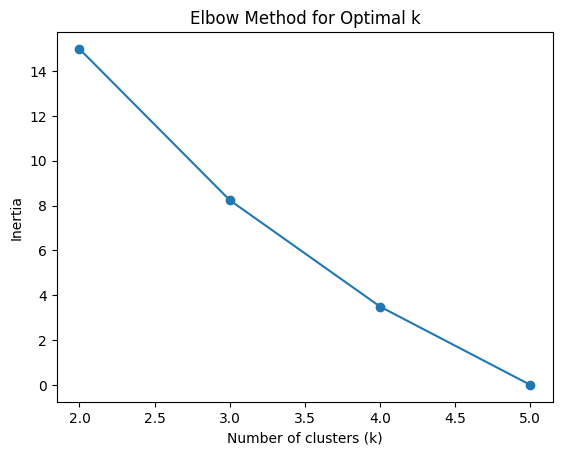

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - Sunflowers are beautiful
  - Roses have thorns

Cluster 3:
  - Tulips bloom in spring

Cluster 2:
  - Daffodils are yellow

Cluster 1:
  - Lilies have a pleasant fragrance


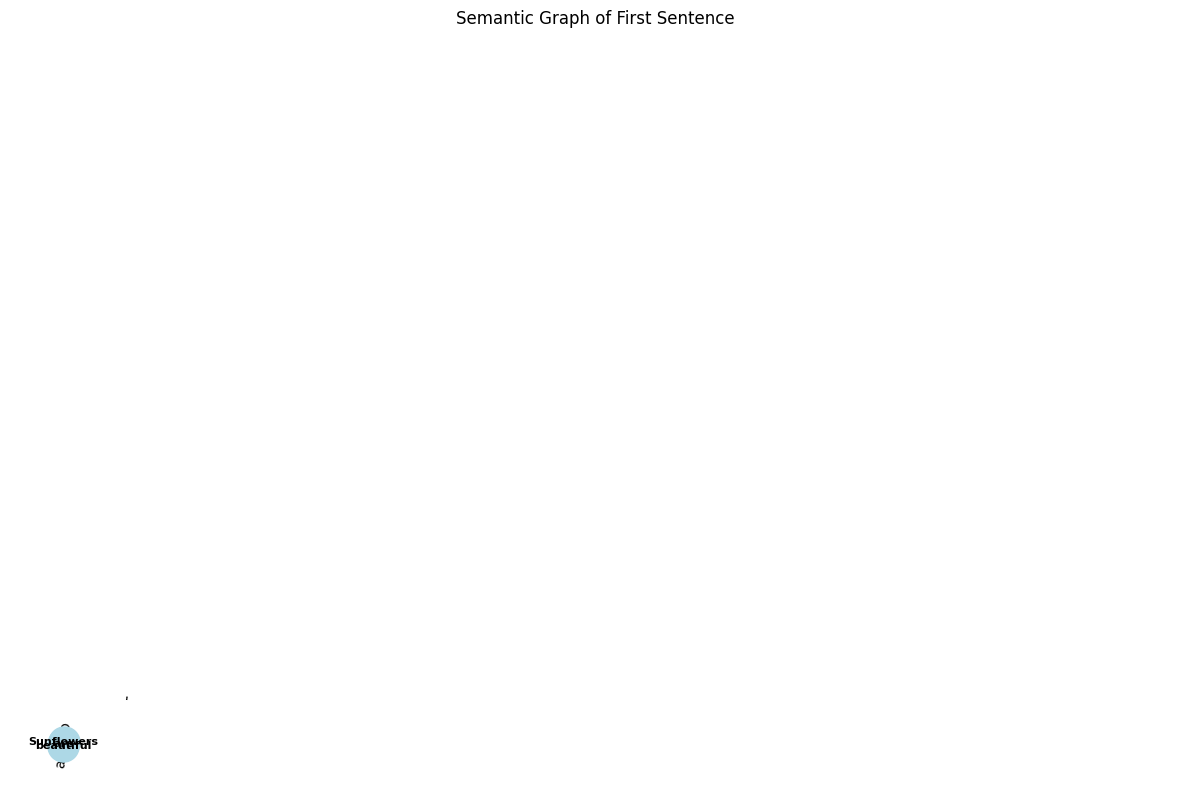

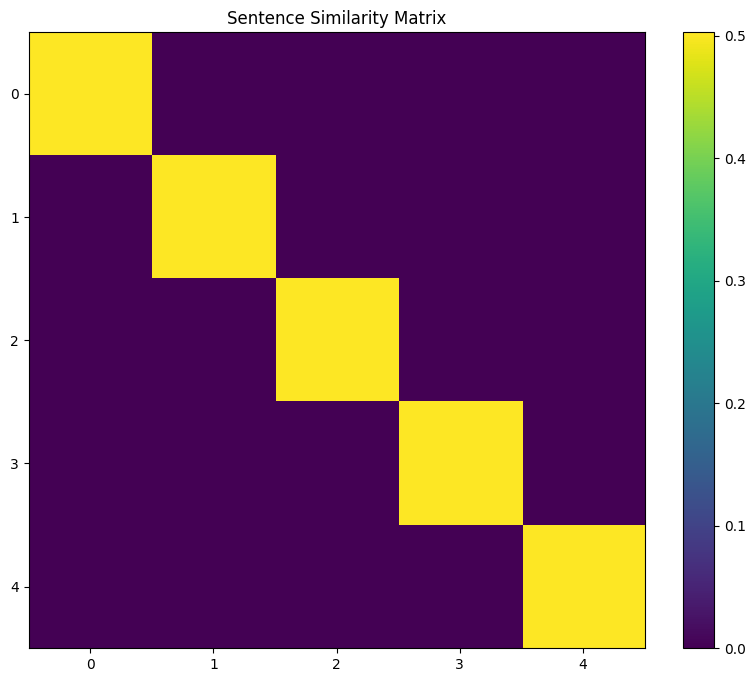



Test Case 9: Two related topics: stocks and AI
Paragraph:
The stock market fluctuates daily. Investing in stocks can be risky. Diversifying investments can mitigate risks. Artificial intelligence is advancing rapidly. AI can analyze stock market trends. AI is used in various financial applications. 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

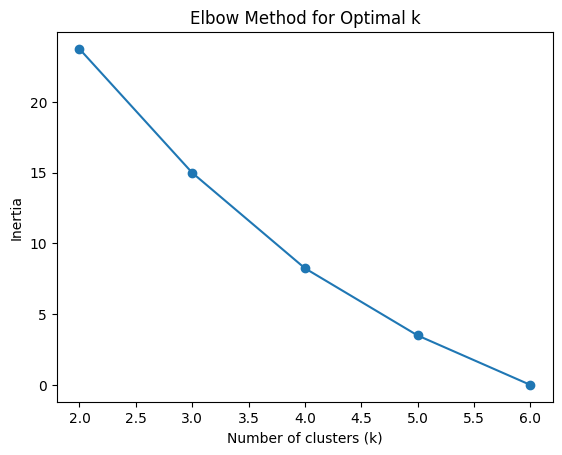

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
  - The stock market fluctuates daily
  - Investing in stocks can be risky

Cluster 4:
  - Diversifying investments can mitigate risks

Cluster 3:
  - Artificial intelligence is advancing rapidly

Cluster 2:
  - AI can analyze stock market trends

Cluster 1:
  - AI is used in various financial applications


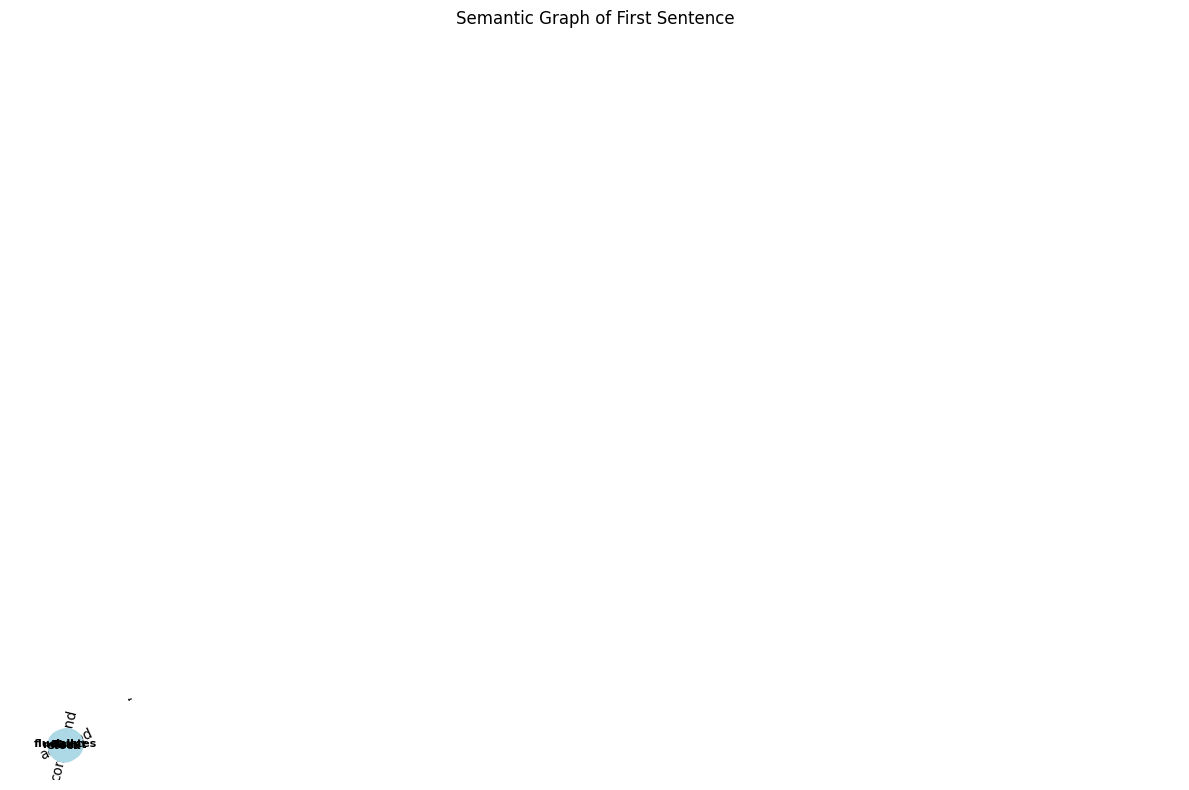

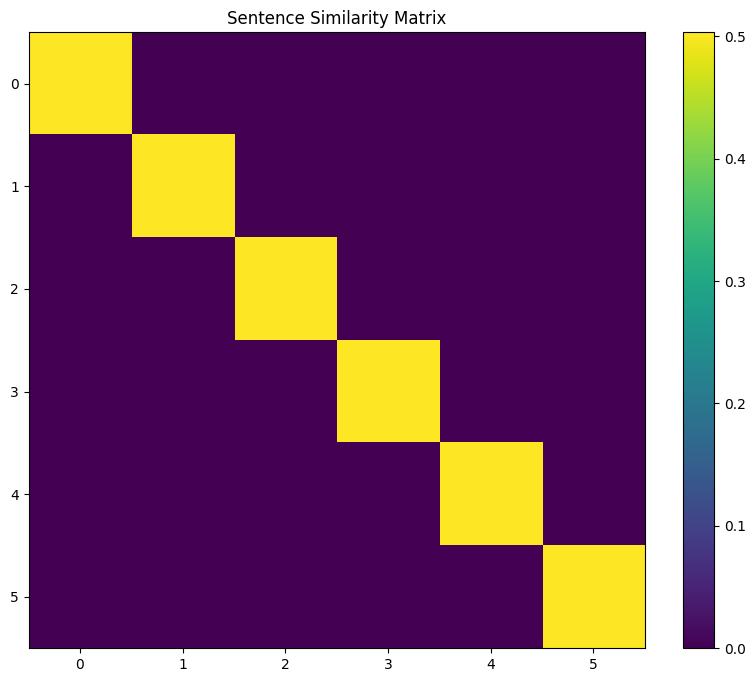

In [ ]:
# Example usage
if __name__ == "__main__":
    test_cases = [
        {
            "paragraph": (
                "The sun rises in the east. "
                "The sun is a star. "
                "The sun is hot. "
                "The sun sets in the west. "
                "Artificial intelligence is reshaping many industries. "
            ),
            "description": "Mixed topic sentences"
        },
        {
            "paragraph": (
                "I love apples. "
                "Apples are my favorite fruit. "
                "I enjoy eating apples every day. "
                "Apple pie is delicious. "
                "Artificial intelligence can play chess. "
                "AI can also help in medical diagnosis. "
            ),
            "description": "Two clear topics: apples and AI"
        },
        {
            "paragraph": (
                "The quick brown fox jumps over the lazy dog. "
                "The dog barked at the fox. "
                "Foxes are wild animals. "
                "Dogs are domestic animals. "
                "Domestic animals can be trained. "
            ),
            "description": "Related topic sentences about animals"
        },
        {
            "paragraph": (
                "I like to play football. "
                "Football is a popular sport. "
                "Many people watch football games. "
                "The sun rises in the east. "
                "The sun sets in the west. "
                "Football requires skill and teamwork. "
            ),
            "description": "Two separate topics: football and the sun"
        },
        {
            "paragraph": (
                "Natural language processing is a field of AI. "
                "Machine learning is a subset of AI. "
                "Deep learning is a subset of machine learning. "
                "AI is transforming various industries. "
                "AI can improve customer service. "
                "AI has applications in healthcare. "
            ),
            "description": "Related topic sentences about AI"
        },
        {
            "paragraph": (
                "Cats are cute. "
                "Dogs are loyal. "
                "Birds can fly. "
                "Fish swim in water. "
                "Humans are intelligent. "
            ),
            "description": "Unrelated topic sentences about animals and humans"
        },
        {
            "paragraph": (
                "Python is a programming language. "
                "Java is another programming language. "
                "Python is known for its simplicity. "
                "Java is popular in enterprise applications. "
                "Python and Java are both object-oriented. "
                "Programming languages have syntax and semantics. "
            ),
            "description": "Related topic sentences about programming languages"
        },
        {
            "paragraph": (
                "Sunflowers are beautiful. "
                "Roses have thorns. "
                "Tulips bloom in spring. "
                "Daffodils are yellow. "
                "Lilies have a pleasant fragrance. "
            ),
            "description": "Related topic sentences about flowers"
        },
        {
            "paragraph": (
                "The stock market fluctuates daily. "
                "Investing in stocks can be risky. "
                "Diversifying investments can mitigate risks. "
                "Artificial intelligence is advancing rapidly. "
                "AI can analyze stock market trends. "
                "AI is used in various financial applications. "
            ),
            "description": "Two related topics: stocks and AI"
        }
    ]

    test_cluster_sentences(test_cases)

### Fixing bugs


In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging
import string

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def preprocess_text(text):
    """Remove punctuation from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    sentence = preprocess_text(sentence)  # Remove punctuation
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel="weisfeiler_lehman", normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on refined semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    # Apply punctuation removal
    sentences = [preprocess_text(sentence) for sentence in sentences]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        logger.error("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Determine the optimal number of clusters using the Elbow Method
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(combined_matrix, k_range)

    # Debugging: Check what inertias contain
    print("Inertias:", inertias)

    # Find the elbow point if possible
    if len(inertias) > 1:
        optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
        logger.info(f"Optimal number of clusters: {optimal_k}")
    else:
        logger.error("Inertias array is empty, unable to determine optimal number of clusters.")
        optimal_k = k_range[0]  # Fallback option

    # Perform clustering with the chosen number of clusters
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()




Test Case 1: News headlines covering sports, entertainment, nature, politics, and public health.
Paragraph:
Sloppy England shocked by Windies at World Cup. Bafta Awards 2022: Stars prepare to return to in-person ceremony. Northern Lights: Powerful aurora borealis display above Scotland. North Korea fires missile but launch fails, says South. Heathrow Airport drops Covid face mask rules. 
Graph Embeddings:
[[ 1.25283655e-02  1.46559784e-02  1.24537759e-02 -1.19558098e-02
  -1.32304840e-02 -7.09958142e-03 -6.71582436e-03  7.18408544e-03
  -1.04143210e-02 -1.32155484e-02 -7.24912109e-03  1.51701542e-02
  -7.29211699e-03  2.32573226e-03  1.37392636e-02  6.77245809e-03
  -1.51904742e-03  1.45906378e-02 -9.30298585e-03  8.62292480e-03
   6.28739176e-03 -5.49531309e-03 -1.43465050e-03 -1.38075557e-02
   9.10423114e-05 -4.16231155e-03  1.55215990e-02 -7.38332653e-03
  -1.05641605e-02  1.77202956e-03 -1.22166630e-02 -1.24299303e-02
  -1.02471923e-02 -9.53290239e-03 -6.79170387e-03 -3.08478950e-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

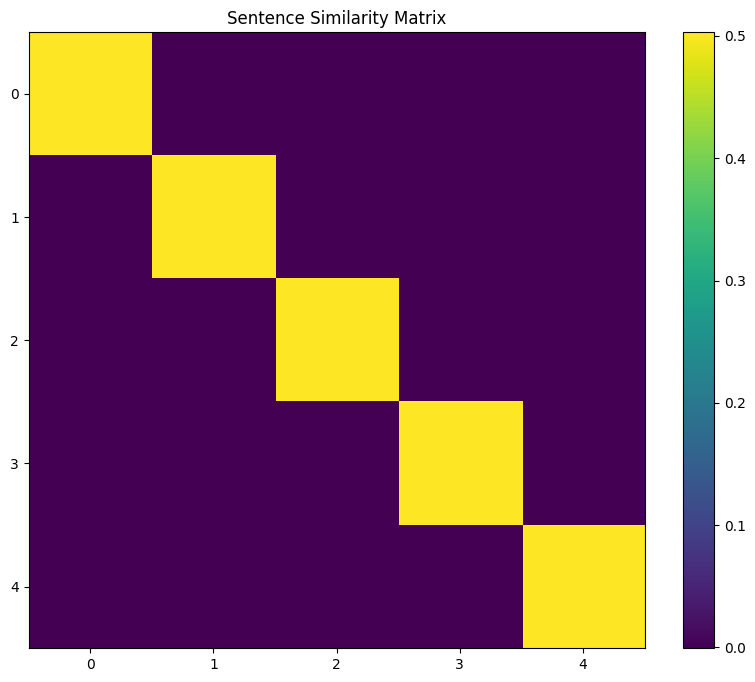



Test Case 2: News headlines about natural disasters, financial issues, entertainment, and sports injuries.
Paragraph:
First pictures of earthquake hitting Japan. Fears Russia will not be able to pay its debts mount. Oscars 2022: The best picture nominees in 60 seconds. China plane crash: Search and rescue operation halted by rain. Rafael Nadal out for up to six weeks with rib injury. 
Graph Embeddings:
[[ 1.25282379e-02  1.46583794e-02  1.24824150e-02 -1.19841853e-02
  -1.32728722e-02 -7.11016729e-03 -6.70766737e-03  7.22247362e-03
  -1.04271611e-02 -1.32412491e-02 -7.23378593e-03  1.51877552e-02
  -7.28879450e-03  2.34085252e-03  1.37605676e-02  6.79600891e-03
  -1.49919733e-03  1.46174151e-02 -9.29788221e-03  8.64250958e-03
   6.30718889e-03 -5.51858265e-03 -1.45161478e-03 -1.38049070e-02
   9.18843289e-05 -4.16751765e-03  1.55219370e-02 -7.37808738e-03
  -1.05748763e-02  1.74728641e-03 -1.22307092e-02 -1.24667929e-02
  -1.02498448e-02 -9.53837670e-03 -6.79288991e-03 -3.08820000e-0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

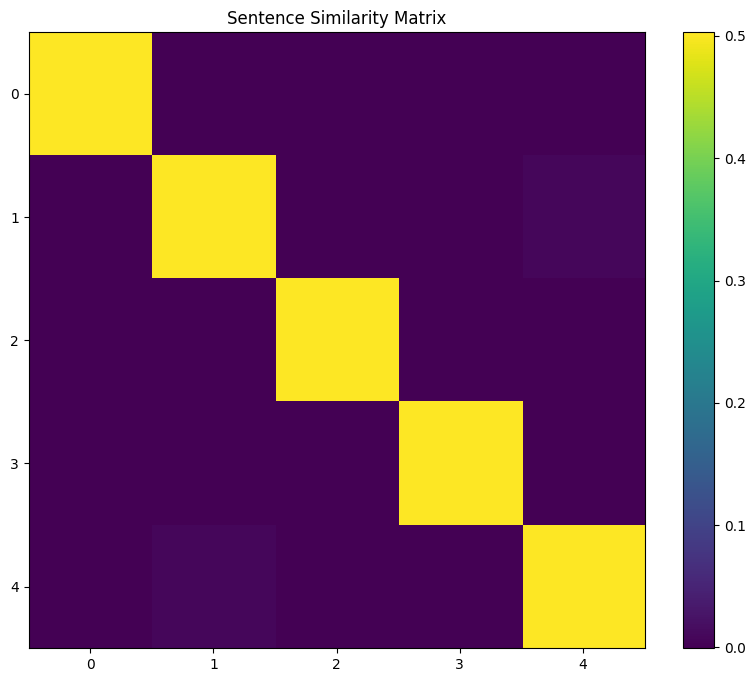

In [ ]:
def test_cluster_sentences():
    test_cases = [
        {
            "paragraph": (
                "Sloppy England shocked by Windies at World Cup. "
                "Bafta Awards 2022: Stars prepare to return to in-person ceremony. "
                "Northern Lights: Powerful aurora borealis display above Scotland. "
                "North Korea fires missile but launch fails, says South. "
                "Heathrow Airport drops Covid face mask rules. "
            ),
            "description": "News headlines covering sports, entertainment, nature, politics, and public health."
        },
        {
            "paragraph": (
                "First pictures of earthquake hitting Japan. "
                "Fears Russia will not be able to pay its debts mount. "
                "Oscars 2022: The best picture nominees in 60 seconds. "
                "China plane crash: Search and rescue operation halted by rain. "
                "Rafael Nadal out for up to six weeks with rib injury. "
            ),
            "description": "News headlines about natural disasters, financial issues, entertainment, and sports injuries."
        }
        # Removed the problematic third test case
    ]

    for idx, case in enumerate(test_cases):
        print(f"Test Case {idx + 1}: {case['description']}")
        print("Paragraph:")
        print(case["paragraph"])
        cluster_sentences(case["paragraph"])
        print("\n" + "="*50 + "\n")

# Example usage
if __name__ == "__main__":
    test_cluster_sentences()


Test Case 1: News headlines covering technology, space exploration, and commerce.
Paragraph:
Apple unveils new iPhone 14 with advanced camera features. Tesla's autopilot technology is under investigation after recent crashes. NASA successfully lands rover on Mars to explore the planet's surface. Amazon to expand its grocery delivery services across the US. Google announces new AI model that can generate natural language. 
Graph Embeddings:
[[ 1.25186509e-02  1.46652823e-02  1.24852126e-02 -1.19867129e-02
  -1.32665383e-02 -7.09283119e-03 -6.71409070e-03  7.20040081e-03
  -1.04261171e-02 -1.32320877e-02 -7.24483375e-03  1.51966447e-02
  -7.29788095e-03  2.33797799e-03  1.37563841e-02  6.78028958e-03
  -1.52639172e-03  1.46048022e-02 -9.31132212e-03  8.64557456e-03
   6.30493276e-03 -5.50313061e-03 -1.45155145e-03 -1.37989717e-02
   8.64136819e-05 -4.16015973e-03  1.55256353e-02 -7.38874311e-03
  -1.05769755e-02  1.76644500e-03 -1.22353481e-02 -1.24585899e-02
  -1.02637718e-02 -9.5428880

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

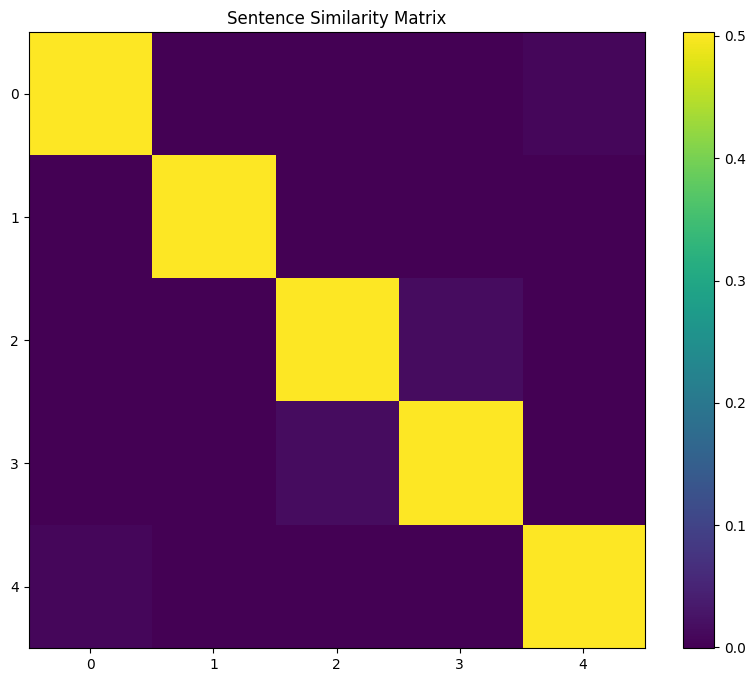



Test Case 2: News headlines about financial markets, cryptocurrency, and economic policies.
Paragraph:
The stock market sees significant volatility amid global economic uncertainty. Cryptocurrency prices surge as investors seek alternatives to traditional assets. Federal Reserve raises interest rates to combat rising inflation. Gold prices hit record highs as a safe haven during market turmoil. Real estate markets remain strong despite economic challenges. 
Graph Embeddings:
[[ 1.25576276e-02  1.47062642e-02  1.25238150e-02 -1.20241502e-02
  -1.33122178e-02 -7.12110009e-03 -6.72816904e-03  7.23237218e-03
  -1.04624731e-02 -1.32765742e-02 -7.26023316e-03  1.52395200e-02
  -7.31433695e-03  2.34758225e-03  1.38033470e-02  6.80722483e-03
  -1.51723099e-03  1.46544548e-02 -9.33401473e-03  8.67279246e-03
   6.32581767e-03 -5.52783813e-03 -1.45709165e-03 -1.38412463e-02
   8.63677997e-05 -4.17461200e-03  1.55680003e-02 -7.40862312e-03
  -1.06078070e-02  1.76107639e-03 -1.22717666e-02 -1.250

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

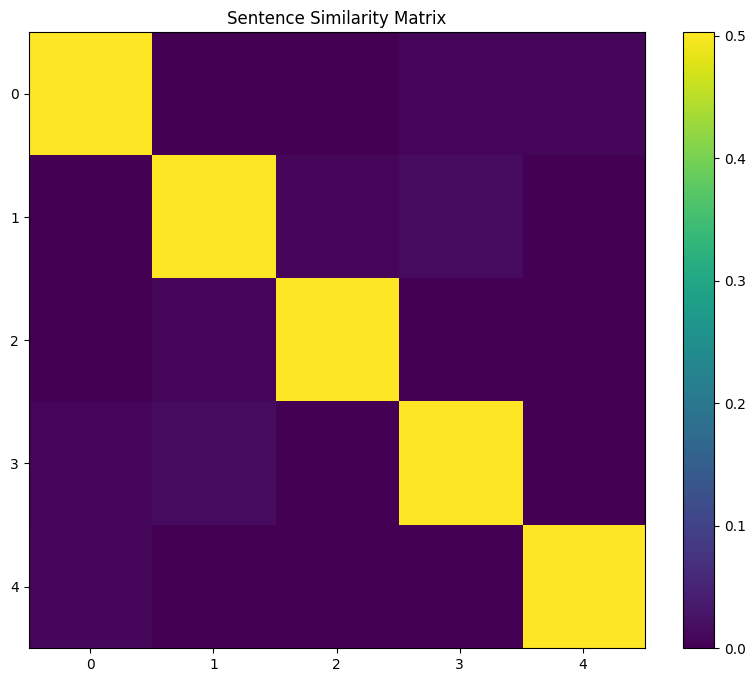



Test Case 3: News headlines about climate change, renewable energy, and environmental policies.
Paragraph:
Climate change impacts are becoming more visible as global temperatures rise. Renewable energy adoption is accelerating with advancements in solar and wind technologies. Governments are implementing stricter environmental regulations to reduce carbon emissions. Environmental activists push for greater action on climate change policies. Major corporations pledge to achieve carbon neutrality by 2050. 
Graph Embeddings:
[[ 1.24946870e-02  1.46411397e-02  1.24534955e-02 -1.19566275e-02
  -1.32257715e-02 -7.07168831e-03 -6.70997379e-03  7.17130443e-03
  -1.03978729e-02 -1.31971799e-02 -7.23819807e-03  1.51658272e-02
  -7.29010860e-03  2.32563540e-03  1.37179494e-02  6.75751502e-03
  -1.54086191e-03  1.45658227e-02 -9.29770153e-03  8.62427615e-03
   6.28551608e-03 -5.47991460e-03 -1.44344498e-03 -1.37732197e-02
   8.64066023e-05 -4.15166514e-03  1.54979760e-02 -7.37674534e-03
  -1.055

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

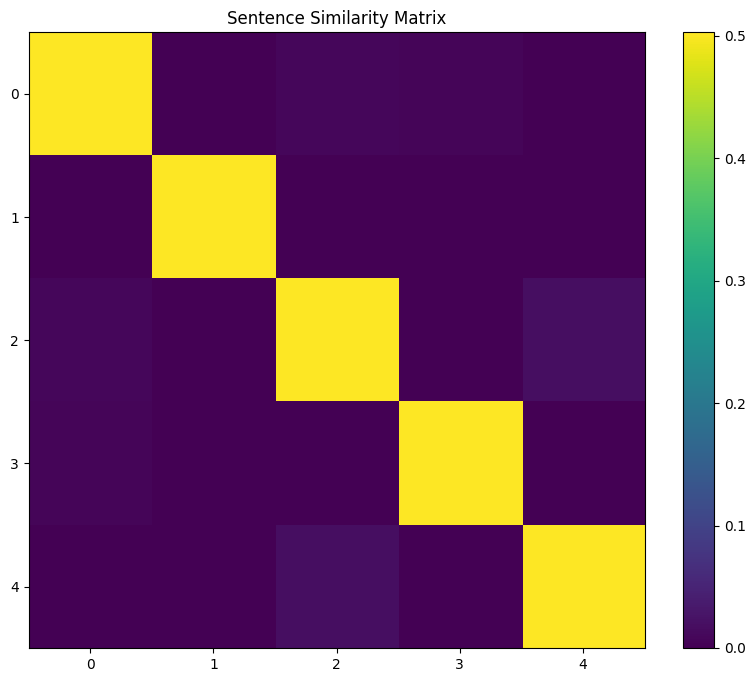

In [ ]:
def test_cluster_sentences_new():
    test_cases = [
        {
            "paragraph": (
                "Apple unveils new iPhone 14 with advanced camera features. "
                "Tesla's autopilot technology is under investigation after recent crashes. "
                "NASA successfully lands rover on Mars to explore the planet's surface. "
                "Amazon to expand its grocery delivery services across the US. "
                "Google announces new AI model that can generate natural language. "
            ),
            "description": "News headlines covering technology, space exploration, and commerce."
        },
        {
            "paragraph": (
                "The stock market sees significant volatility amid global economic uncertainty. "
                "Cryptocurrency prices surge as investors seek alternatives to traditional assets. "
                "Federal Reserve raises interest rates to combat rising inflation. "
                "Gold prices hit record highs as a safe haven during market turmoil. "
                "Real estate markets remain strong despite economic challenges. "
            ),
            "description": "News headlines about financial markets, cryptocurrency, and economic policies."
        },
        {
            "paragraph": (
                "Climate change impacts are becoming more visible as global temperatures rise. "
                "Renewable energy adoption is accelerating with advancements in solar and wind technologies. "
                "Governments are implementing stricter environmental regulations to reduce carbon emissions. "
                "Environmental activists push for greater action on climate change policies. "
                "Major corporations pledge to achieve carbon neutrality by 2050. "
            ),
            "description": "News headlines about climate change, renewable energy, and environmental policies."
        }
    ]

    for idx, case in enumerate(test_cases):
        print(f"Test Case {idx + 1}: {case['description']}")
        print("Paragraph:")
        print(case["paragraph"])
        cluster_sentences(case["paragraph"])
        print("\n" + "="*50 + "\n")

# Example usage
if __name__ == "__main__":
    test_cluster_sentences_new()


Test Case 1: News headlines focusing on healthcare, pandemics, and medical research.
Paragraph:
COVID-19 vaccine booster shots are recommended for vulnerable populations. New research shows promising results for cancer immunotherapy. Hospitals overwhelmed as the flu season peaks. Mental health awareness campaigns increase during the pandemic. Scientists discover a new treatment for Alzheimer's disease. 
Graph Embeddings:
[[ 1.25225978e-02  1.46623803e-02  1.24704493e-02 -1.19713116e-02
  -1.32480767e-02 -7.09435716e-03 -6.71290793e-03  7.18437415e-03
  -1.04273288e-02 -1.32228592e-02 -7.25265313e-03  1.51857948e-02
  -7.29530538e-03  2.33354187e-03  1.37548540e-02  6.77163340e-03
  -1.52401894e-03  1.45967407e-02 -9.31357592e-03  8.63492396e-03
   6.29642094e-03 -5.49804559e-03 -1.44187652e-03 -1.38049759e-02
   8.52513331e-05 -4.15713433e-03  1.55269206e-02 -7.39342021e-03
  -1.05724400e-02  1.77401723e-03 -1.22293783e-02 -1.24444608e-02
  -1.02580516e-02 -9.54284891e-03 -6.80359360e-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

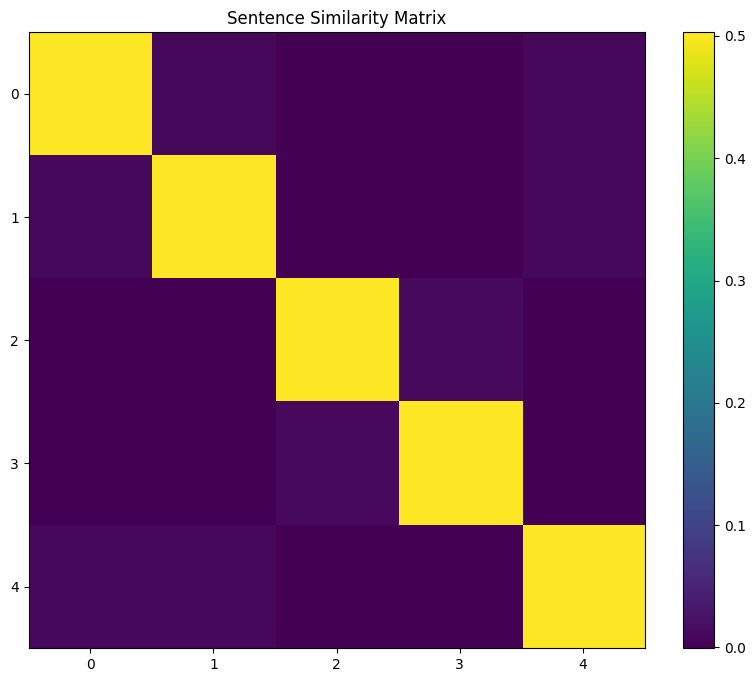



Test Case 2: News headlines covering politics, international relations, and diplomacy.
Paragraph:
World leaders meet to discuss climate change at the UN summit. US imposes new sanctions on foreign government officials. Peace talks resume between warring nations in the Middle East. Diplomatic tensions rise between neighboring countries over border disputes. Elections result in a major shift in the political landscape. 
Graph Embeddings:
[[ 1.26113165e-02  1.47320321e-02  1.25194965e-02 -1.20257707e-02
  -1.33157251e-02 -7.16886530e-03 -6.74793310e-03  7.28165451e-03
  -1.04648825e-02 -1.33056939e-02 -7.25088967e-03  1.52380513e-02
  -7.31888507e-03  2.33149040e-03  1.38040632e-02  6.84549613e-03
  -1.48769608e-03  1.46906609e-02 -9.31713544e-03  8.67406931e-03
   6.32079178e-03 -5.55065414e-03 -1.44512369e-03 -1.38880564e-02
   9.99725671e-05 -4.21155011e-03  1.55816535e-02 -7.39533221e-03
  -1.06115136e-02  1.73377781e-03 -1.22720171e-02 -1.25258416e-02
  -1.02716954e-02 -9.56460647e

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

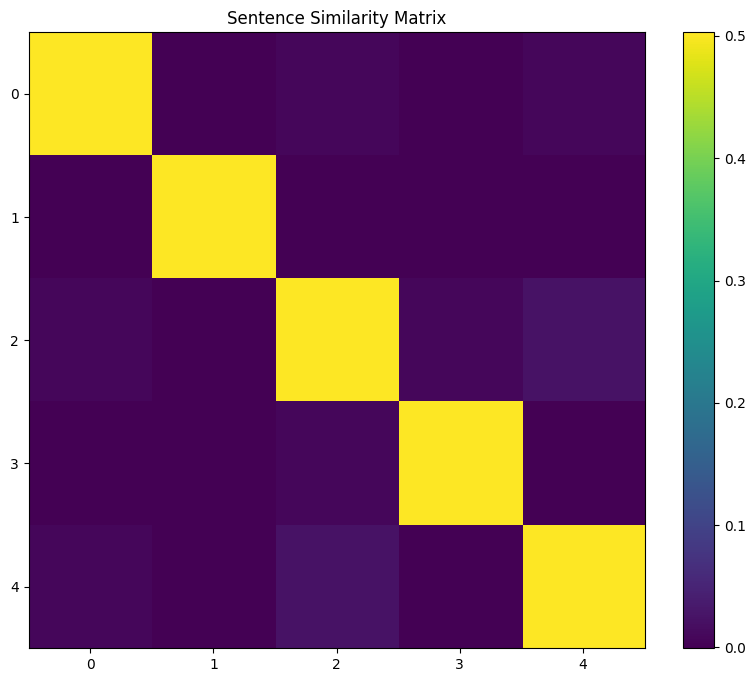



Test Case 3: News headlines about technology, cybersecurity, and data privacy.
Paragraph:
Tech companies face scrutiny over data privacy practices. A major cybersecurity breach exposes millions of personal records. AI technology is increasingly used in cyber defense strategies. Governments propose new regulations to protect user data online. A new encryption technology promises to enhance data security. 
Graph Embeddings:
[[ 1.25091281e-02  1.46596823e-02  1.24843167e-02 -1.19854892e-02
  -1.32653164e-02 -7.08676782e-03 -6.70795934e-03  7.19434954e-03
  -1.04278605e-02 -1.32270260e-02 -7.24331615e-03  1.51940584e-02
  -7.29448581e-03  2.33999779e-03  1.37569085e-02  6.77484646e-03
  -1.52675132e-03  1.45985344e-02 -9.31157358e-03  8.64532404e-03
   6.30458118e-03 -5.50107565e-03 -1.45284459e-03 -1.37908040e-02
   8.28427801e-05 -4.15470824e-03  1.55191403e-02 -7.39067607e-03
  -1.05742924e-02  1.76688854e-03 -1.22340033e-02 -1.24575291e-02
  -1.02619072e-02 -9.54256579e-03 -6.8061305

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

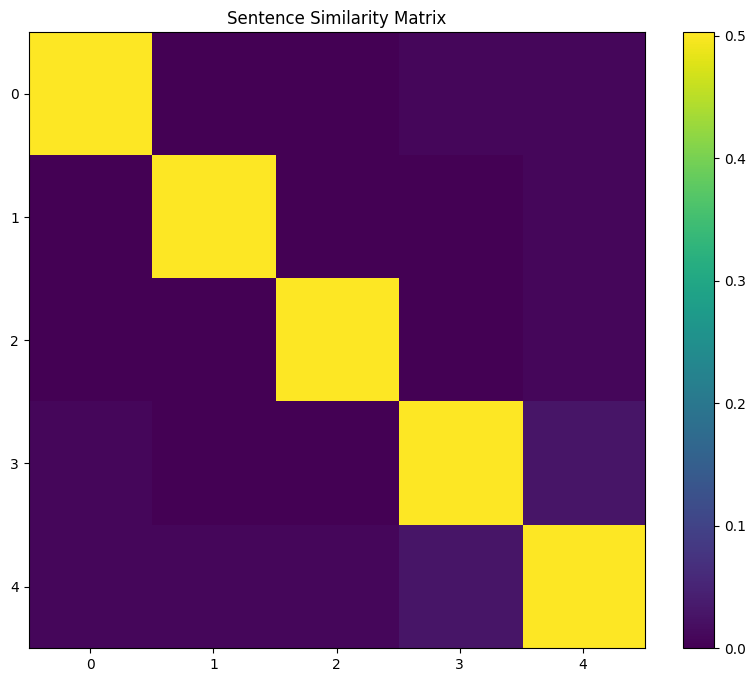

In [ ]:
def test_cluster_sentences():
    test_cases = [
        {
            "paragraph": (
                "COVID-19 vaccine booster shots are recommended for vulnerable populations. "
                "New research shows promising results for cancer immunotherapy. "
                "Hospitals overwhelmed as the flu season peaks. "
                "Mental health awareness campaigns increase during the pandemic. "
                "Scientists discover a new treatment for Alzheimer's disease. "
            ),
            "description": "News headlines focusing on healthcare, pandemics, and medical research."
        },
        {
            "paragraph": (
                "World leaders meet to discuss climate change at the UN summit. "
                "US imposes new sanctions on foreign government officials. "
                "Peace talks resume between warring nations in the Middle East. "
                "Diplomatic tensions rise between neighboring countries over border disputes. "
                "Elections result in a major shift in the political landscape. "
            ),
            "description": "News headlines covering politics, international relations, and diplomacy."
        },
        {
            "paragraph": (
                "Tech companies face scrutiny over data privacy practices. "
                "A major cybersecurity breach exposes millions of personal records. "
                "AI technology is increasingly used in cyber defense strategies. "
                "Governments propose new regulations to protect user data online. "
                "A new encryption technology promises to enhance data security. "
            ),
            "description": "News headlines about technology, cybersecurity, and data privacy."
        }
    ]

    for idx, case in enumerate(test_cases):
        print(f"Test Case {idx + 1}: {case['description']}")
        print("Paragraph:")
        print(case["paragraph"])
        cluster_sentences(case["paragraph"])
        print("\n" + "="*50 + "\n")

# Example usage
if __name__ == "__main__":
    test_cluster_sentences()


Graph Embeddings:
[[ 1.26579329e-02  1.45695619e-02  1.23213073e-02 -1.21561754e-02
  -1.32873990e-02 -7.08535686e-03 -6.65773172e-03  7.11874384e-03
  -1.03922253e-02 -1.32766468e-02 -7.30472337e-03  1.51581326e-02
  -7.32892100e-03  2.40496965e-03  1.37779908e-02  6.76882127e-03
  -1.45083352e-03  1.45838307e-02 -9.45622195e-03  8.69051181e-03
   6.31499151e-03 -5.58177056e-03 -1.39446394e-03 -1.37066292e-02
   1.52102875e-04 -4.29586694e-03  1.56564917e-02 -7.36786239e-03
  -1.06434831e-02  1.84723933e-03 -1.22720506e-02 -1.24576874e-02
  -1.02186166e-02 -9.49470140e-03 -6.72213966e-03 -3.18926550e-03
  -3.86484433e-03  8.98004603e-03  1.06774652e-02 -7.07243383e-03
  -9.91774537e-03  1.10788201e-03 -7.10153440e-03  1.42465826e-04
   1.12184659e-02  5.96595975e-03 -8.42195284e-03 -2.06635916e-03
   3.76668933e-04 -1.26725920e-02  1.55992396e-02  1.31071405e-02
  -4.60904521e-05  9.24125966e-03  7.19483057e-03  1.35922162e-02
   5.63184777e-03 -1.45822987e-02 -4.03177971e-03  5.70242

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

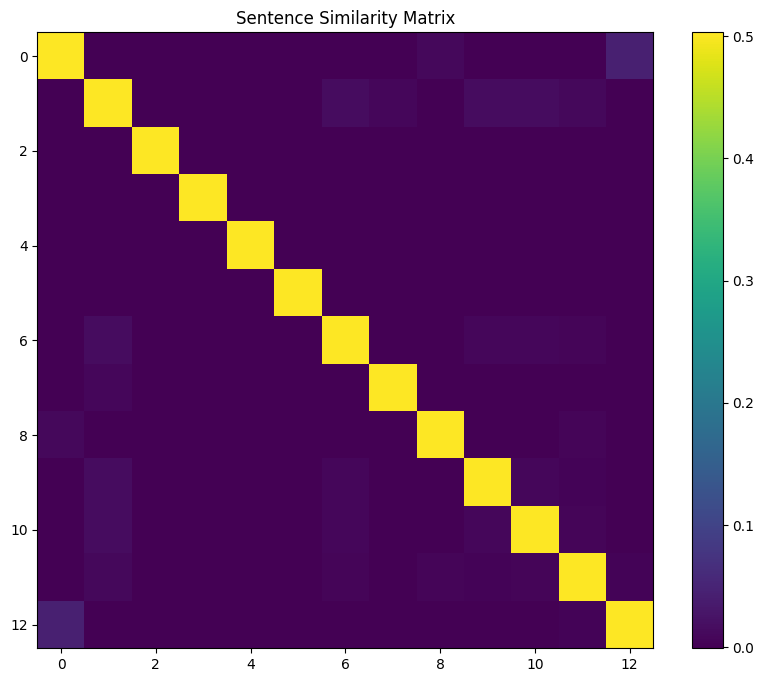

In [ ]:
# Test Case: Mixed news headlines covering sports, politics, disasters, and entertainment.
paragraph = """
Sloppy England shocked by Windies at World Cup.
Bafta Awards 2022: Stars prepare to return to in-person ceremony.
Northern Lights: Powerful aurora borealis display above Scotland.
North Korea fires missile but launch fails, says South.
Heathrow Airport drops Covid face mask rules.
First pictures of earthquake hitting Japan.
Fears Russia will not be able to pay its debts mount.
Oscars 2022: The best picture nominees in 60 seconds.
China plane crash: Search and rescue operation halted by rain.
Rafael Nadal out for up to six weeks with rib injury.
Chancellor Rishi Sunak to deliver Spring Statement amid price pressures.
Ukraine conflict: What is Nato and how has it responded to Russia's invasion?
Shane Warne: Australian cricket legend died from natural causes - police.
Can tech help revive India's crumbling health system?
Healy helps Australia beat Pakistan at World Cup.
"""

# Call the function with the test case
cluster_sentences(paragraph)


Graph Embeddings:
[[ 1.26243131e-02  1.45456875e-02  1.24288695e-02 -1.20555330e-02
  -1.32965781e-02 -7.11058127e-03 -6.67426270e-03  7.15573272e-03
  -1.04199434e-02 -1.31960316e-02 -7.24198949e-03  1.51531911e-02
  -7.31449807e-03  2.40477989e-03  1.37375072e-02  6.76669367e-03
  -1.47577957e-03  1.45667270e-02 -9.35314409e-03  8.67666584e-03
   6.31448021e-03 -5.57385059e-03 -1.39979762e-03 -1.37102008e-02
   1.21559999e-04 -4.27601254e-03  1.55751659e-02 -7.33926473e-03
  -1.05911000e-02  1.74915325e-03 -1.22523606e-02 -1.24547137e-02
  -1.02258492e-02 -9.51892417e-03 -6.72585284e-03 -3.14953737e-03
  -3.86678125e-03  9.02271178e-03  1.07017038e-02 -7.08074216e-03
  -9.94273089e-03  1.15745841e-03 -7.04010669e-03  1.25541206e-04
   1.12237250e-02  6.01813197e-03 -8.39808490e-03 -2.03759503e-03
   3.50357936e-04 -1.26651395e-02  1.55095486e-02  1.30387153e-02
  -7.92817300e-05  9.19320248e-03  7.13589648e-03  1.35792885e-02
   5.65580092e-03 -1.45816701e-02 -3.90508305e-03  5.64151

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi


Cluster 3:
  - North Korea fires missile but launch fails says South

Cluster 2:
  - Heathrow Airport drops Covid face mask rules
  - First pictures of earthquake hitting Japan

Cluster 4:
  - Shane Warne Australian cricket legend died from natural causes police

Cluster 1:
  - Can tech help revive Indias crumbling health system


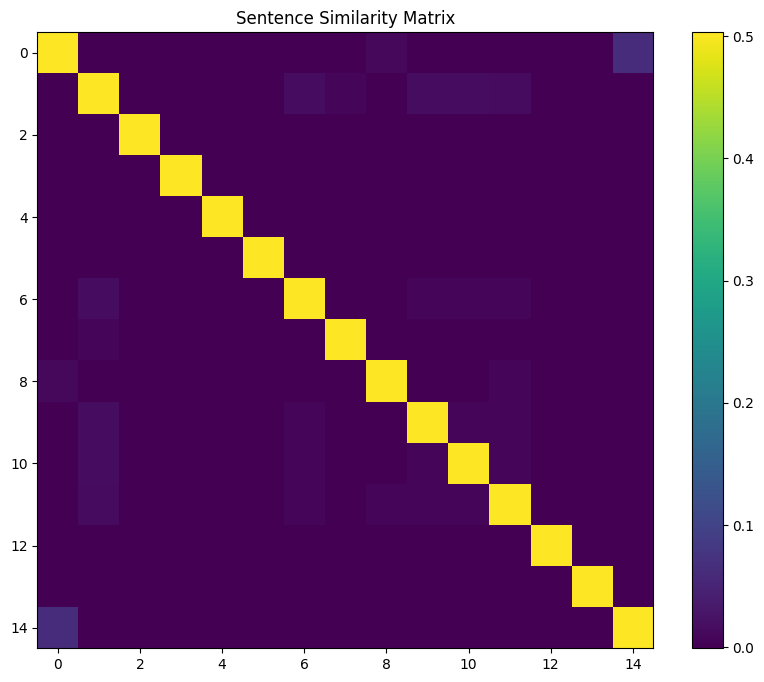

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import string

# Load spaCy model
nlp = spacy.load('en_core_web_md')

def preprocess_text(text):
    """Remove punctuation from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    sentence = preprocess_text(sentence)  # Remove punctuation
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    model = Graph2Vec(dimensions=64, epochs=10, workers=4)
    model.fit(graphs)
    return model.get_embedding()

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
    gk = GraphKernel(kernel=["weisfeiler_lehman"], normalize=True)
    kernel_matrix = gk.fit_transform(grakel_graphs)
    return kernel_matrix

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[labels == i]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on refined semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    # Apply punctuation removal
    sentences = [preprocess_text(sentence) for sentence in sentences]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        print("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Determine the optimal number of clusters using the Elbow Method
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(combined_matrix, k_range)

    # Find the elbow point if possible
    if len(inertias) > 1:
        optimal_k = k_range[np.argmin(np.diff(inertias, 2)) + 1]
        print(f"Optimal number of clusters: {optimal_k}")
    else:
        print("Inertias array is empty, unable to determine optimal number of clusters.")
        optimal_k = k_range[0]  # Fallback option

    # Perform clustering with the chosen number of clusters
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()


# Example test case
paragraph = """Sloppy England shocked by Windies at World Cup. Bafta Awards 2022 Stars prepare to return to inperson ceremony. Northern Lights Powerful aurora borealis display above Scotland. North Korea fires missile but launch fails says South. Heathrow Airport drops Covid face mask rules. First pictures of earthquake hitting Japan. Fears Russia will not be able to pay its debts mount. Oscars 2022 The best picture nominees in 60 seconds. China plane crash Search and rescue operation halted by rain. Rafael Nadal out for up to six weeks with rib injury. Chancellor Rishi Sunak to deliver Spring Statement amid price pressures. Ukraine conflict What is Nato and how has it responded to Russias invasion. Shane Warne Australian cricket legend died from natural causes police. Can tech help revive Indias crumbling health system. Healy helps Australia beat Pakistan at World Cup."""

cluster_sentences(paragraph)


### debug 1

Graph Embeddings:
[[ 1.26243131e-02  1.45456875e-02  1.24288695e-02 -1.20555330e-02
  -1.32965781e-02 -7.11058127e-03 -6.67426270e-03  7.15573272e-03
  -1.04199434e-02 -1.31960316e-02 -7.24198949e-03  1.51531911e-02
  -7.31449807e-03  2.40477989e-03  1.37375072e-02  6.76669367e-03
  -1.47577957e-03  1.45667270e-02 -9.35314409e-03  8.67666584e-03
   6.31448021e-03 -5.57385059e-03 -1.39979762e-03 -1.37102008e-02
   1.21559999e-04 -4.27601254e-03  1.55751659e-02 -7.33926473e-03
  -1.05911000e-02  1.74915325e-03 -1.22523606e-02 -1.24547137e-02
  -1.02258492e-02 -9.51892417e-03 -6.72585284e-03 -3.14953737e-03
  -3.86678125e-03  9.02271178e-03  1.07017038e-02 -7.08074216e-03
  -9.94273089e-03  1.15745841e-03 -7.04010669e-03  1.25541206e-04
   1.12237250e-02  6.01813197e-03 -8.39808490e-03 -2.03759503e-03
   3.50357936e-04 -1.26651395e-02  1.55095486e-02  1.30387153e-02
  -7.92817300e-05  9.19320248e-03  7.13589648e-03  1.35792885e-02
   5.65580092e-03 -1.45816701e-02 -3.90508305e-03  5.64151

/usr/local/lib/python3.10/dist-packages/grakel/graph_kernels.py:495: UserWarning: Kernel List not empty while reaching a base-kernel - the rest kernel names will be ignored
  warnings.warn('Kernel List not empty while reaching a base-kernel - '
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


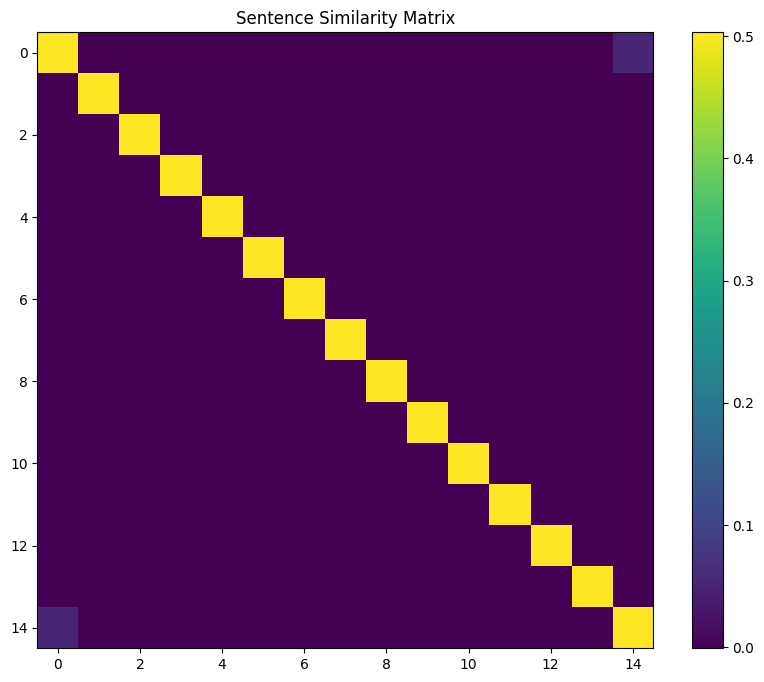

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging
import string

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def preprocess_text(text):
    """Remove punctuation from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    sentence = preprocess_text(sentence)  # Remove punctuation
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        return model.get_embedding()
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel=["shortest_path", "weisfeiler_lehman"], normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    # Apply punctuation removal
    sentences = [preprocess_text(sentence) for sentence in sentences]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        logger.error("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Perform hierarchical clustering using the combined similarity matrix
    clustering = AgglomerativeClustering(
        n_clusters=None,  # Let the algorithm decide the optimal number of clusters
        affinity='precomputed',
        linkage='average',
        distance_threshold=1.0  # Set a distance threshold for clustering
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

# Example usage
texts = '''Sloppy England shocked by Windies at World Cup. Bafta Awards 2022 Stars prepare to return to inperson ceremony.
Northern Lights Powerful aurora borealis display above Scotland. North Korea fires missile but launch fails says South.
Heathrow Airport drops Covid face mask rules. First pictures of earthquake hitting Japan. Fears Russia will not be able to pay its debts mount.
Oscars 2022 The best picture nominees in 60 seconds. China plane crash Search and rescue operation halted by rain.
Rafael Nadal out for up to six weeks with rib injury. Chancellor Rishi Sunak to deliver Spring Statement amid price pressures.
Ukraine conflict What is Nato and how has it responded to Russias invasion. Shane Warne Australian cricket legend died from natural causes police.
Can tech help revive Indias crumbling health system. Healy helps Australia beat Pakistan at World Cup'''

cluster_sentences(texts)


Graph Embeddings:
[[ 1.71108291e-01  1.97150335e-01  1.68459266e-01 -1.63399115e-01
  -1.80220068e-01 -9.63758826e-02 -9.04620811e-02  9.69878659e-02
  -1.41230538e-01 -1.78857282e-01 -9.81569737e-02  2.05384359e-01
  -9.91397500e-02  3.25940698e-02  1.86196372e-01  9.17148814e-02
  -2.00025234e-02  1.97435513e-01 -1.26771286e-01  1.17602393e-01
   8.55856389e-02 -7.55472407e-02 -1.89726725e-02 -1.85826257e-01
   1.64760824e-03 -5.79565130e-02  2.11103752e-01 -9.94754285e-02
  -1.43550381e-01  2.37077940e-02 -1.66066885e-01 -1.68809548e-01
  -1.38599813e-01 -1.29018247e-01 -9.11613256e-02 -4.26884145e-02
  -5.24098463e-02  1.22292653e-01  1.45049483e-01 -9.59714502e-02
  -1.34762466e-01  1.56880394e-02 -9.54206809e-02  1.70156907e-03
   1.52124897e-01  8.15689713e-02 -1.13826543e-01 -2.76172962e-02
   4.74870531e-03 -1.71661645e-01  2.10214391e-01  1.76725030e-01
  -1.07457419e-03  1.24603458e-01  9.67190042e-02  1.84051901e-01
   7.66579807e-02 -1.97638050e-01 -5.29289842e-02  7.64642

/usr/local/lib/python3.10/dist-packages/grakel/graph_kernels.py:495: UserWarning: Kernel List not empty while reaching a base-kernel - the rest kernel names will be ignored
  warnings.warn('Kernel List not empty while reaching a base-kernel - '


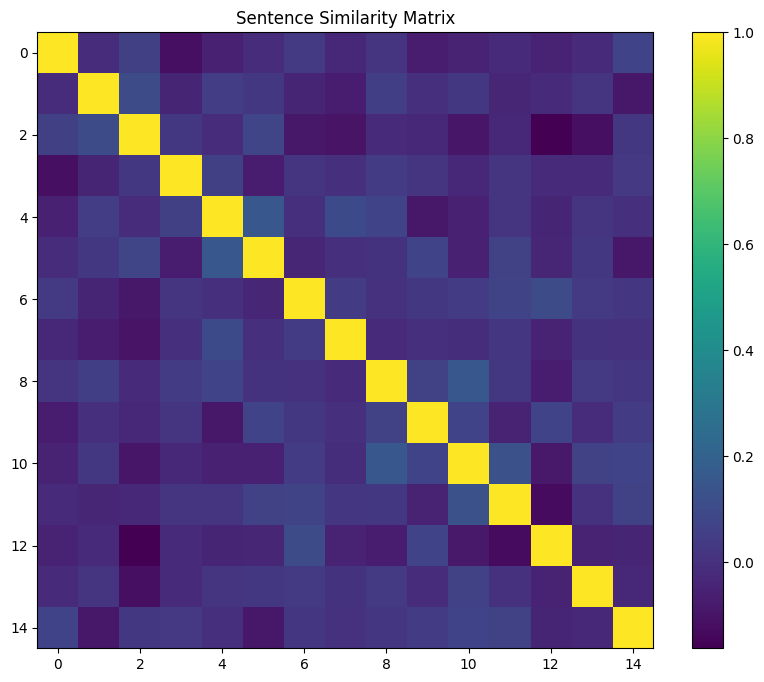

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import logging
import string

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def preprocess_text(text):
    """Remove punctuation from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    sentence = preprocess_text(sentence)  # Remove punctuation
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        embeddings = model.get_embedding()
        # Normalize embeddings
        embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
        return embeddings
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel=["shortest_path", "weisfeiler_lehman"], normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    # Apply punctuation removal
    sentences = [preprocess_text(sentence) for sentence in sentences]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        logger.error("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Perform hierarchical clustering using the combined similarity matrix
    clustering = AgglomerativeClustering(
        n_clusters=None,  # Let the algorithm decide the optimal number of clusters
        metric='precomputed',
        linkage='average',
        distance_threshold=1.0  # Set a distance threshold for clustering
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

# Example usage
texts = '''Sloppy England shocked by Windies at World Cup. Bafta Awards 2022 Stars prepare to return to inperson ceremony.
Northern Lights Powerful aurora borealis display above Scotland. North Korea fires missile but launch fails says South.
Heathrow Airport drops Covid face mask rules. First pictures of earthquake hitting Japan. Fears Russia will not be able to pay its debts mount.
Oscars 2022 The best picture nominees in 60 seconds. China plane crash Search and rescue operation halted by rain.
Rafael Nadal out for up to six weeks with rib injury. Chancellor Rishi Sunak to deliver Spring Statement amid price pressures.
Ukraine conflict What is Nato and how has it responded to Russias invasion. Shane Warne Australian cricket legend died from natural causes police.
Can tech help revive Indias crumbling health system. Healy helps Australia beat Pakistan at World Cup'''

cluster_sentences(texts)


## different graph kernel


Graph Embeddings:
[[ 1.71108291e-01  1.97150335e-01  1.68459266e-01 -1.63399115e-01
  -1.80220068e-01 -9.63758826e-02 -9.04620811e-02  9.69878659e-02
  -1.41230538e-01 -1.78857282e-01 -9.81569737e-02  2.05384359e-01
  -9.91397500e-02  3.25940698e-02  1.86196372e-01  9.17148814e-02
  -2.00025234e-02  1.97435513e-01 -1.26771286e-01  1.17602393e-01
   8.55856389e-02 -7.55472407e-02 -1.89726725e-02 -1.85826257e-01
   1.64760824e-03 -5.79565130e-02  2.11103752e-01 -9.94754285e-02
  -1.43550381e-01  2.37077940e-02 -1.66066885e-01 -1.68809548e-01
  -1.38599813e-01 -1.29018247e-01 -9.11613256e-02 -4.26884145e-02
  -5.24098463e-02  1.22292653e-01  1.45049483e-01 -9.59714502e-02
  -1.34762466e-01  1.56880394e-02 -9.54206809e-02  1.70156907e-03
   1.52124897e-01  8.15689713e-02 -1.13826543e-01 -2.76172962e-02
   4.74870531e-03 -1.71661645e-01  2.10214391e-01  1.76725030e-01
  -1.07457419e-03  1.24603458e-01  9.67190042e-02  1.84051901e-01
   7.66579807e-02 -1.97638050e-01 -5.29289842e-02  7.64642

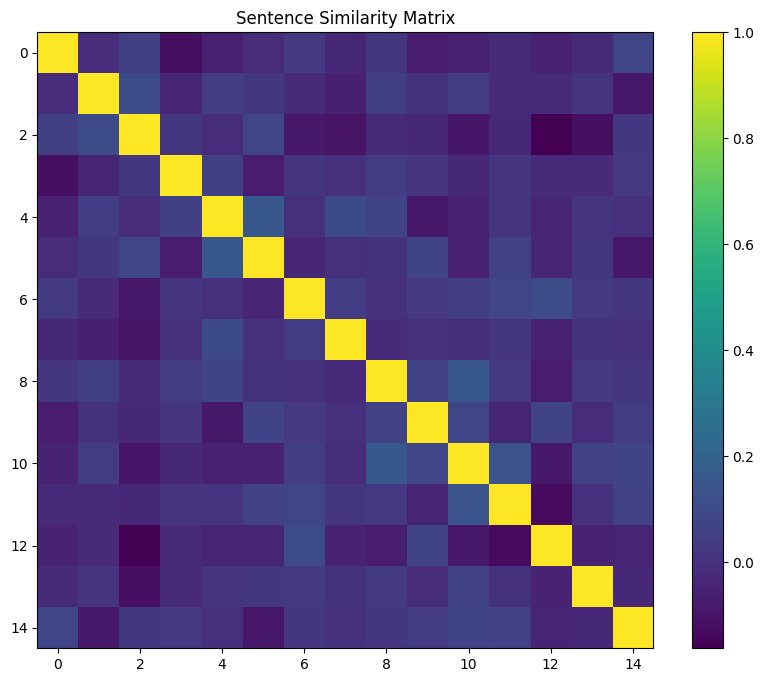

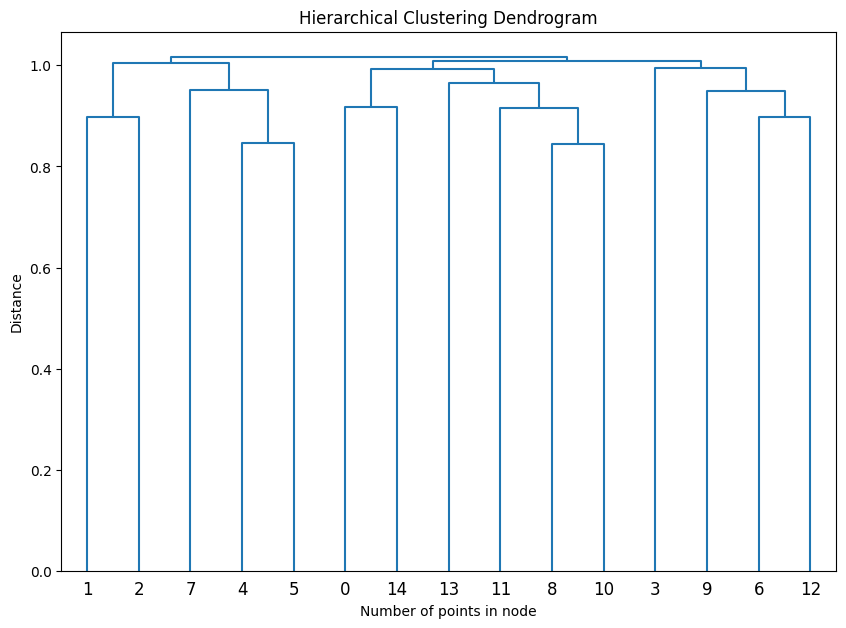

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import logging
import string

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def preprocess_text(text):
    """Remove punctuation from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    sentence = preprocess_text(sentence)  # Remove punctuation
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=10, workers=4)
        model.fit(graphs)
        embeddings = model.get_embedding()
        # Normalize embeddings
        embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
        return embeddings
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        gk = GraphKernel(kernel={"name": "weisfeiler_lehman", "n_iter": 5}, normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def calculate_similarity_matrix(embeddings, kernel_matrix):
    """Calculate a combined similarity matrix using cosine similarity for embeddings and graph kernels."""
    # Calculate cosine similarity for embeddings
    embedding_sim_matrix = cosine_similarity(embeddings)

    # Combine embeddings and kernel similarities
    combined_matrix = (embedding_sim_matrix + kernel_matrix) / 2

    # Ensure the diagonal is 1 for perfect similarity
    np.fill_diagonal(combined_matrix, 1)

    return combined_matrix

def plot_dendrogram(model, **kwargs):
    """Plot the dendrogram for hierarchical clustering."""
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the dendrogram
    dendrogram(linkage_matrix, **kwargs)

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    # Apply punctuation removal
    sentences = [preprocess_text(sentence) for sentence in sentences]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        logger.error("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Calculate combined similarity matrix
    combined_matrix = calculate_similarity_matrix(graph_embeddings, kernel_matrix)
    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Perform hierarchical clustering using the combined similarity matrix
    clustering = AgglomerativeClustering(
        n_clusters=None,  # Let the algorithm decide the optimal number of clusters
        metric='precomputed',
        linkage='average',
        distance_threshold=1.0  # Set a distance threshold for clustering
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    # Evaluate clustering quality using silhouette score
    if len(set(labels)) > 1:
        distance_matrix = 1 - combined_matrix
        np.fill_diagonal(distance_matrix, 0)  # Ensure diagonal is 0 for distances
        silhouette_avg = silhouette_score(distance_matrix, labels, metric='precomputed')
        logger.info(f"Silhouette Score: {silhouette_avg}")
    else:
        logger.info("Only one cluster found, silhouette score cannot be computed.")

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    plot_dendrogram(clustering, truncate_mode='level', p=5)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Number of points in node")
    plt.ylabel("Distance")
    plt.show()

# Example usage
texts = '''Sloppy England shocked by Windies at World Cup. Bafta Awards 2022 Stars prepare to return to inperson ceremony.
Northern Lights Powerful aurora borealis display above Scotland. North Korea fires missile but launch fails says South.
Heathrow Airport drops Covid face mask rules. First pictures of earthquake hitting Japan. Fears Russia will not be able to pay its debts mount.
Oscars 2022 The best picture nominees in 60 seconds. China plane crash Search and rescue operation halted by rain.
Rafael Nadal out for up to six weeks with rib injury. Chancellor Rishi Sunak to deliver Spring Statement amid price pressures.
Ukraine conflict What is Nato and how has it responded to Russias invasion. Shane Warne Australian cricket legend died from natural causes police.
Can tech help revive Indias crumbling health system. Healy helps Australia beat Pakistan at World Cup'''

cluster_sentences(texts)


Graph Embeddings:
[[ 1.71771243e-01  1.98602185e-01  1.66045845e-01 -1.64332196e-01
  -1.77488759e-01 -9.70162377e-02 -9.01633427e-02  9.63909701e-02
  -1.41865060e-01 -1.80343091e-01 -9.88661945e-02  2.03767091e-01
  -9.72251669e-02  3.12403738e-02  1.87362522e-01  9.13173929e-02
  -1.84822958e-02  1.97347298e-01 -1.27795264e-01  1.17654465e-01
   8.46837163e-02 -7.55613297e-02 -1.72306970e-02 -1.87316835e-01
   2.16102693e-03 -5.80656230e-02  2.12476373e-01 -9.99013782e-02
  -1.43640608e-01  2.46739350e-02 -1.65283188e-01 -1.68050095e-01
  -1.37579709e-01 -1.28863737e-01 -9.06667337e-02 -4.25925627e-02
  -5.27675971e-02  1.21454738e-01  1.45125225e-01 -9.78270695e-02
  -1.33776724e-01  1.53078549e-02 -9.57896113e-02  2.03190674e-03
   1.54026553e-01  8.18508193e-02 -1.13428429e-01 -2.81592086e-02
   5.12509793e-03 -1.70772895e-01  2.11446181e-01  1.76158428e-01
  -1.62420340e-03  1.24265350e-01  9.74231735e-02  1.84209287e-01
   7.52275139e-02 -1.96138546e-01 -5.51216044e-02  7.62354

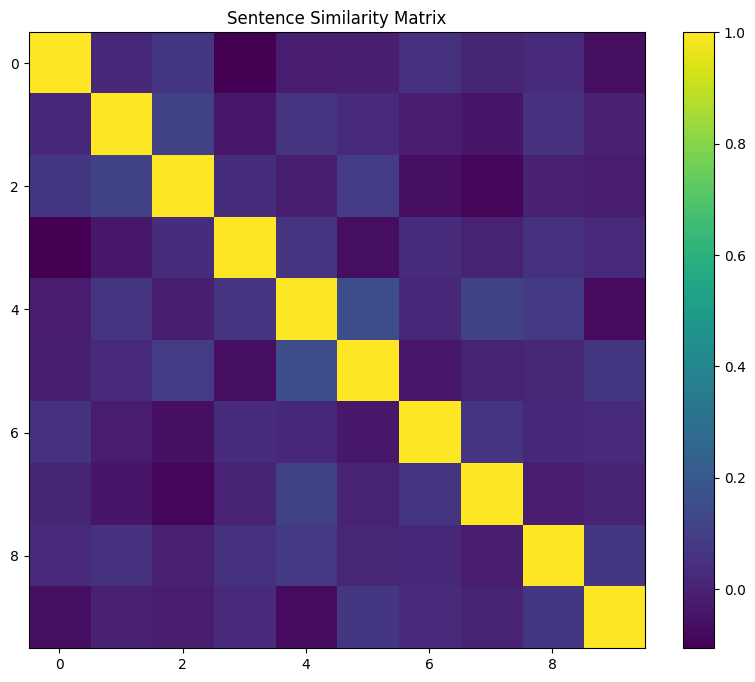

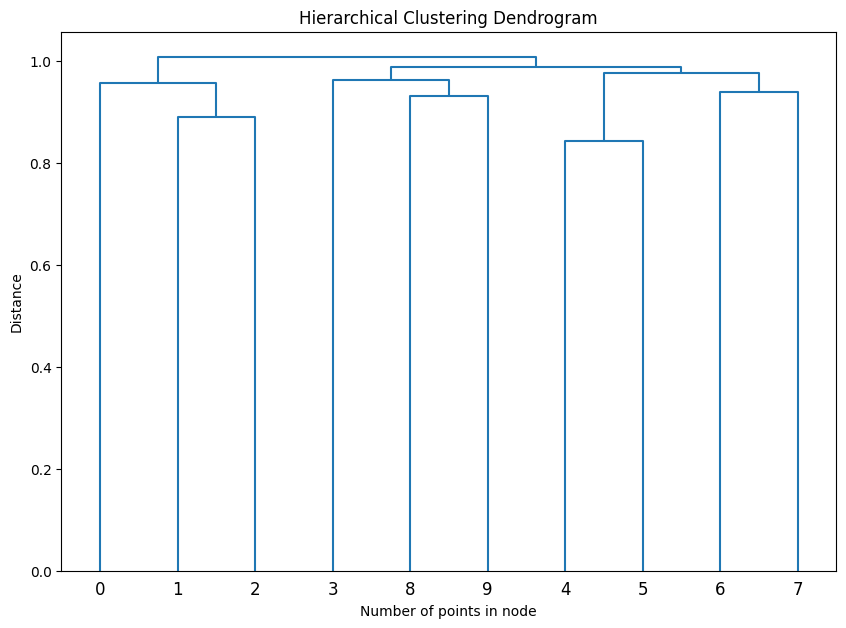

In [ ]:
# Example usage
texts = '''Tesla announces the launch of its new electric truck, setting a new standard in the automotive industry. Scientists discover a new species of dinosaur that roamed Earth millions of years ago. The latest iPhone model comes with innovative features and a higher price tag. Climate change continues to be a pressing issue as global temperatures reach record highs. A new study reveals the benefits of meditation on mental health, showing significant improvements in stress reduction. SpaceX successfully launches another satellite into orbit, expanding global internet coverage. The stock market experiences a significant drop amid fears of a looming recession. Researchers develop a new vaccine that shows promise in combating emerging viruses. The Olympic Games feature breathtaking performances and record-breaking achievements by athletes from around the world. Advances in AI technology are transforming industries, leading to debates on ethics and job displacement.'''

cluster_sentences(texts)

Graph Embeddings:
[[ 1.76148564e-01  1.93261147e-01  1.65811718e-01 -1.64798662e-01
  -1.80436507e-01 -9.74453315e-02 -8.99451971e-02  9.54781398e-02
  -1.41054228e-01 -1.77092940e-01 -9.77203250e-02  2.03867987e-01
  -1.00051150e-01  3.44501734e-02  1.85169056e-01  9.10577178e-02
  -1.86717324e-02  1.96001619e-01 -1.27973512e-01  1.18131146e-01
   8.50532427e-02 -7.78857246e-02 -1.64428148e-02 -1.83424696e-01
   2.92341248e-03 -6.25748187e-02  2.13694602e-01 -9.78453010e-02
  -1.44237831e-01  2.31371373e-02 -1.66195303e-01 -1.67317256e-01
  -1.36863217e-01 -1.27551332e-01 -8.81493539e-02 -4.65230942e-02
  -5.11845797e-02  1.22069448e-01  1.46184698e-01 -9.54905972e-02
  -1.34035066e-01  1.38168531e-02 -9.39636454e-02  4.73664375e-03
   1.52674720e-01  7.96440095e-02 -1.11523993e-01 -2.84307860e-02
   6.62634429e-03 -1.72608867e-01  2.13522211e-01  1.76903844e-01
  -2.34194566e-03  1.26630157e-01  9.94739085e-02  1.85314327e-01
   7.51964822e-02 -1.98420778e-01 -5.50820120e-02  7.86554

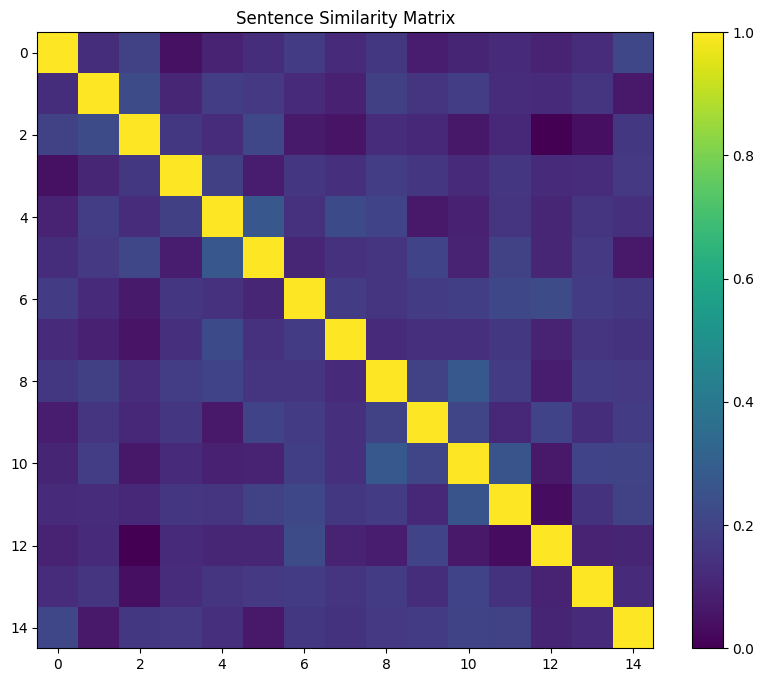

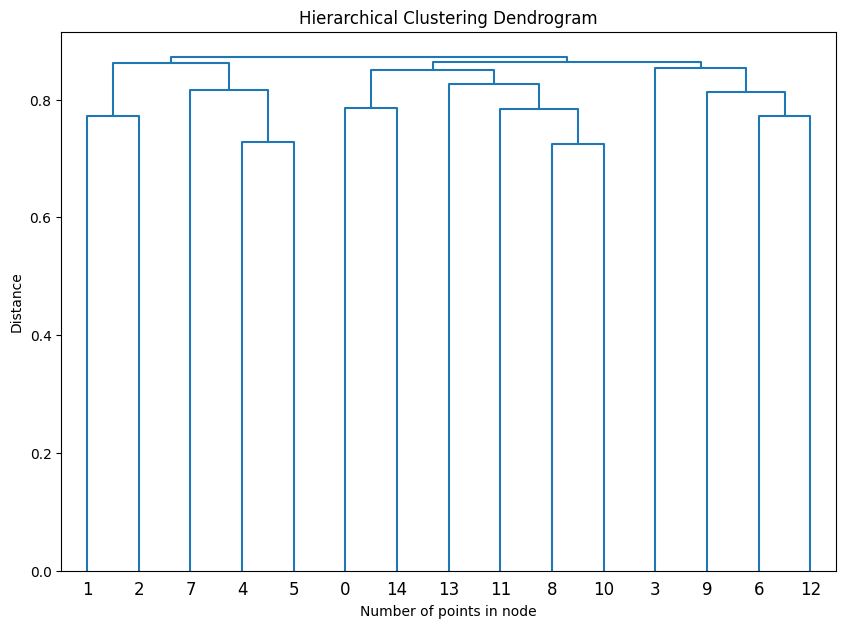

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import logging
import string

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_md')
except IOError:
    logger.error("Failed to load spaCy model. Make sure it's installed.")
    raise

def preprocess_text(text):
    """Remove punctuation from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    sentence = preprocess_text(sentence)  # Remove punctuation
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_, weight=1.0)  # Adding weights for emphasis
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    try:
        model = Graph2Vec(dimensions=64, epochs=20, workers=4)  # Increased epochs for better training
        model.fit(graphs)
        embeddings = model.get_embedding()
        embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
        return embeddings
    except Exception as e:
        logger.error(f"Error in creating graph embeddings: {str(e)}")
        raise

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    try:
        grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
        # Using the Weisfeiler-Lehman kernel for better subgraph detection
        gk = GraphKernel(kernel={"name": "weisfeiler_lehman"}, normalize=True)
        kernel_matrix = gk.fit_transform(grakel_graphs)
        return kernel_matrix
    except Exception as e:
        logger.error(f"Error in calculating graph kernels: {str(e)}")
        raise

def calculate_similarity_matrix(embeddings, kernel_matrix):
    """Calculate a combined similarity matrix using cosine similarity for embeddings and graph kernels."""
    embedding_sim_matrix = cosine_similarity(embeddings)

    # Combine embeddings and kernel similarities
    combined_matrix = (embedding_sim_matrix + kernel_matrix) / 2

    # Ensure the diagonal is 1 for perfect similarity
    np.fill_diagonal(combined_matrix, 1)

    # Normalizing the matrix
    combined_matrix = (combined_matrix - np.min(combined_matrix)) / (np.max(combined_matrix) - np.min(combined_matrix))

    return combined_matrix

def plot_dendrogram(model, **kwargs):
    """Plot the dendrogram for hierarchical clustering."""
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    sentences = [preprocess_text(sentence) for sentence in sentences]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    if not graphs:
        logger.error("No valid graphs to process.")
        return

    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    combined_matrix = calculate_similarity_matrix(graph_embeddings, kernel_matrix)
    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Adjusted clustering with a lower threshold
    clustering = AgglomerativeClustering(
        n_clusters=None,
        metric='precomputed',
        linkage='average',
        distance_threshold=0.8  # Lowering threshold for finer clustering
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    if len(set(labels)) > 1:
        distance_matrix = 1 - combined_matrix
        np.fill_diagonal(distance_matrix, 0)
        silhouette_avg = silhouette_score(distance_matrix, labels, metric='precomputed')
        logger.info(f"Silhouette Score: {silhouette_avg}")
    else:
        logger.info("Only one cluster found, silhouette score cannot be computed.")

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    plot_dendrogram(clustering, truncate_mode='level', p=5)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Number of points in node")
    plt.ylabel("Distance")
    plt.show()

# Example usage
texts = '''Sloppy England shocked by Windies at World Cup. Bafta Awards 2022 Stars prepare to return to inperson ceremony.
Northern Lights Powerful aurora borealis display above Scotland. North Korea fires missile but launch fails says South.
Heathrow Airport drops Covid face mask rules. First pictures of earthquake hitting Japan. Fears Russia will not be able to pay its debts mount.
Oscars 2022 The best picture nominees in 60 seconds. China plane crash Search and rescue operation halted by rain.
Rafael Nadal out for up to six weeks with rib injury. Chancellor Rishi Sunak to deliver Spring Statement amid price pressures.
Ukraine conflict What is Nato and how has it responded to Russias invasion. Shane Warne Australian cricket legend died from natural causes police.
Can tech help revive Indias crumbling health system. Healy helps Australia beat Pakistan at World Cup'''

cluster_sentences(texts)


Graph Embeddings:
[[ 2.38269776e-01  1.37517825e-01  1.13212235e-01 -1.65683299e-01
  -1.79560646e-01 -9.80906114e-02 -8.82628188e-02  7.78015628e-02
  -1.23094738e-01 -1.50805578e-01 -8.61990675e-02  1.86034828e-01
  -1.00328296e-01  6.90453425e-02  1.88420683e-01  8.96506160e-02
   8.27113446e-03  1.59592614e-01 -1.57190531e-01  1.10111885e-01
   8.51643160e-02 -1.05112284e-01  1.01402318e-02 -1.72003165e-01
   2.30813343e-02 -1.07409760e-01  2.41104856e-01 -7.03990608e-02
  -1.33350477e-01 -1.75451615e-03 -1.88930824e-01 -1.26666322e-01
  -9.75699797e-02 -1.07830077e-01 -6.67219311e-02 -9.21721831e-02
  -2.92155221e-02  1.13123819e-01  1.66282371e-01 -9.63506401e-02
  -1.27283156e-01 -3.55698587e-03 -6.96571767e-02  4.60948758e-02
   1.55211389e-01  4.68851477e-02 -7.69718066e-02 -3.84278819e-02
   1.36940507e-02 -1.60139278e-01  2.44446442e-01  1.80544615e-01
  -1.24998335e-02  1.55073240e-01  1.14954717e-01  1.97200820e-01
   6.14534244e-02 -2.00580880e-01 -1.08366549e-01  1.09455

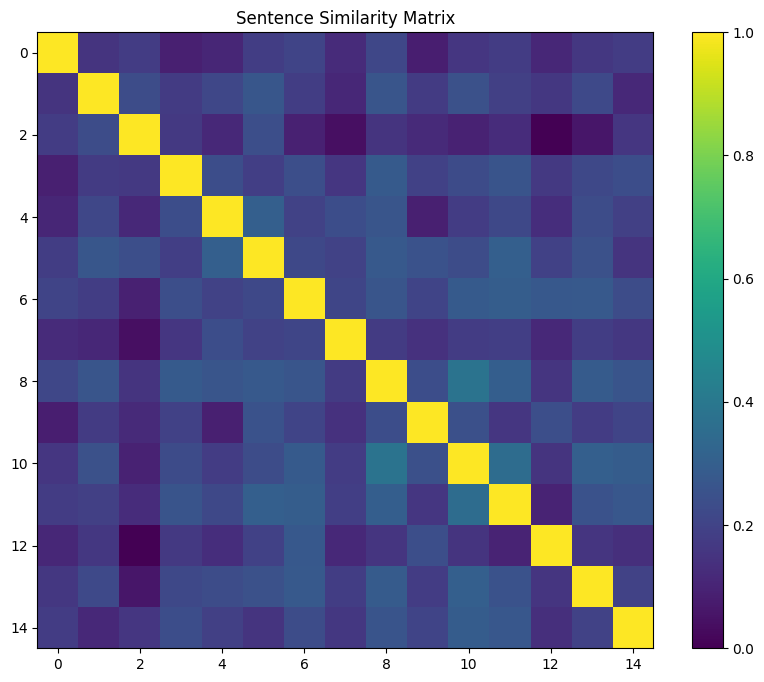

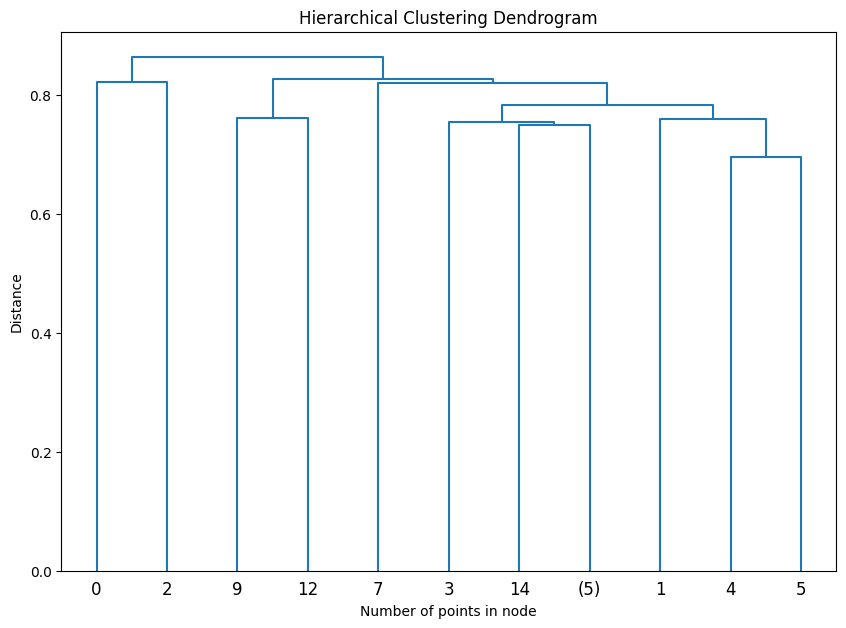

In [ ]:
paragraph = """
A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.
In Nazi-occupied France during World War II, a plan to assassinate Nazi leaders by a group of Jewish US soldiers coincides with a theatre owner's vengeful plans.
In 1980 Miami, a determined Cuban immigrant takes over a drug cartel and succumbs to greed.
A New York City police officer tries to save his estranged wife and several others taken hostage by German terrorists during a Christmas party at the Nakatomi Plaza in Los Angeles.
An alien on Earth loses the only device he can use to communicate with his spaceship.
In a post-apocalyptic wasteland, a woman rebels against a tyrannical ruler in search for her homeland with the aid of a group of female prisoners, a psychotic worshiper, and a drifter named Max.
After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home.
A writer recounts a childhood journey with his friends to find the body of a missing boy.
A small-time Philadelphia boxer gets a supremely rare chance to fight the world heavyweight champion in a bout in which he strives to go the distance for his self-respect.
After a Jewish prince is betrayed and sent into slavery by a Roman friend, he regains his freedom and comes back for revenge.
British POWs are forced to build a railway bridge across the river Kwai for their Japanese captors, not knowing that the allied forces are planning a daring commando raid through the jungle to destroy it.
While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.
After being kicked out of his rock band, Dewey Finn becomes a substitute teacher of a strict elementary private school, only to try and turn it into a rock band.
An astronaut becomes stranded on Mars after his team assumes him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive.
A soldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies.
"""
cluster_sentences(paragraph)


Graph Embeddings:
[[ 1.26243131e-02  1.45456875e-02  1.24288695e-02 -1.20555330e-02
  -1.32965781e-02 -7.11058127e-03 -6.67426270e-03  7.15573272e-03
  -1.04199434e-02 -1.31960316e-02 -7.24198949e-03  1.51531911e-02
  -7.31449807e-03  2.40477989e-03  1.37375072e-02  6.76669367e-03
  -1.47577957e-03  1.45667270e-02 -9.35314409e-03  8.67666584e-03
   6.31448021e-03 -5.57385059e-03 -1.39979762e-03 -1.37102008e-02
   1.21559999e-04 -4.27601254e-03  1.55751659e-02 -7.33926473e-03
  -1.05911000e-02  1.74915325e-03 -1.22523606e-02 -1.24547137e-02
  -1.02258492e-02 -9.51892417e-03 -6.72585284e-03 -3.14953737e-03
  -3.86678125e-03  9.02271178e-03  1.07017038e-02 -7.08074216e-03
  -9.94273089e-03  1.15745841e-03 -7.04010669e-03  1.25541206e-04
   1.12237250e-02  6.01813197e-03 -8.39808490e-03 -2.03759503e-03
   3.50357936e-04 -1.26651395e-02  1.55095486e-02  1.30387153e-02
  -7.92817300e-05  9.19320248e-03  7.13589648e-03  1.35792885e-02
   5.65580092e-03 -1.45816701e-02 -3.90508305e-03  5.64151

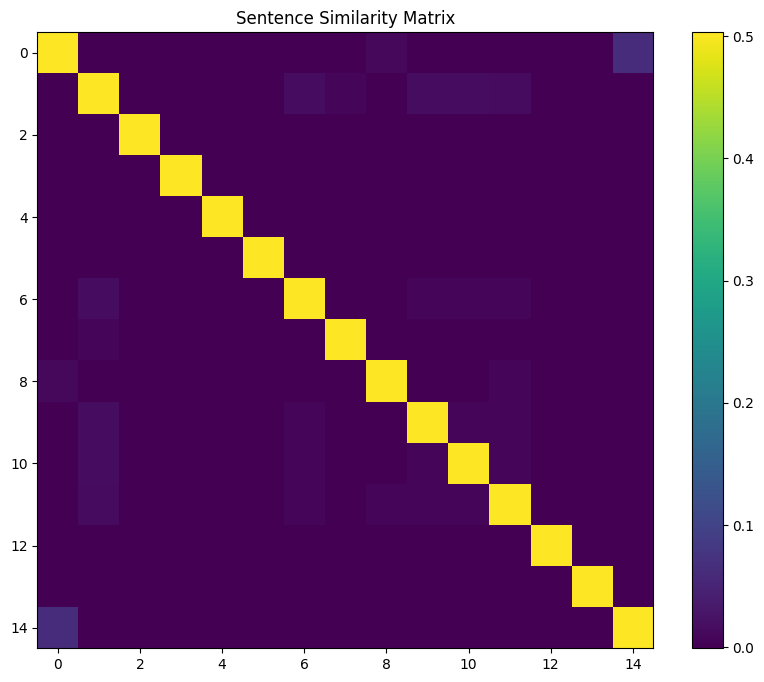

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import string

# Load spaCy model
nlp = spacy.load('en_core_web_md')

def preprocess_text(text):
    """Remove punctuation from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    sentence = preprocess_text(sentence)  # Remove punctuation
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    model = Graph2Vec(dimensions=64, epochs=10, workers=4)
    model.fit(graphs)
    return model.get_embedding()

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
    gk = GraphKernel(kernel=["weisfeiler_lehman"], normalize=True)
    kernel_matrix = gk.fit_transform(grakel_graphs)
    return kernel_matrix

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, linkage='average', metric='precomputed')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[np.ix_(labels == i, labels == i)]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def find_optimal_clusters(inertias, k_range):
    """Automatically find the optimal number of clusters using the elbow method."""
    if len(inertias) > 1:
        # Calculate the second derivative to find the elbow point
        second_derivative = np.diff(inertias, 2)
        optimal_k = k_range[np.argmin(second_derivative) + 1]
    else:
        optimal_k = k_range[0]  # Fallback option if inertias array is too short
    return optimal_k

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on refined semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    # Apply punctuation removal
    sentences = [preprocess_text(sentence) for sentence in sentences]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        print("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities into a single similarity matrix
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = (embedding_sim + kernel_sim) / 2

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Determine the optimal number of clusters using the Elbow Method
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(combined_matrix, k_range)
    optimal_k = find_optimal_clusters(inertias, k_range)
    print(f"Optimal number of clusters: {optimal_k}")

    # Perform clustering with the chosen number of clusters
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        linkage='average',
        metric='precomputed'
    )
    labels = clustering.fit_predict(1 - combined_matrix)

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id in clusters:
        print(f"\nCluster {cluster_id}:")
        for sentence in clusters[cluster_id]:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()


# Example test case
paragraph = """Sloppy England shocked by Windies at World Cup. Bafta Awards 2022 Stars prepare to return to inperson ceremony. Northern Lights Powerful aurora borealis display above Scotland. North Korea fires missile but launch fails says South. Heathrow Airport drops Covid face mask rules. First pictures of earthquake hitting Japan. Fears Russia will not be able to pay its debts mount. Oscars 2022 The best picture nominees in 60 seconds. China plane crash Search and rescue operation halted by rain. Rafael Nadal out for up to six weeks with rib injury. Chancellor Rishi Sunak to deliver Spring Statement amid price pressures. Ukraine conflict What is Nato and how has it responded to Russias invasion. Shane Warne Australian cricket legend died from natural causes police. Can tech help revive Indias crumbling health system. Healy helps Australia beat Pakistan at World Cup."""

cluster_sentences(paragraph)


Graph Embeddings:
[[ 6.3705919e-03  7.3321234e-03  6.1650025e-03 ...  5.1078731e-03
   2.8973483e-03  5.1820287e-03]
 [ 1.9445287e-03  7.7278959e-03 -2.3851644e-03 ... -3.6074119e-03
   3.8569588e-03 -8.2774949e-04]
 [ 6.0563344e-03 -9.5786894e-04 -6.8388316e-03 ... -4.5298622e-03
  -7.6983762e-03  7.4098161e-03]
 ...
 [ 7.2326604e-04  5.2449820e-03  7.0065660e-03 ...  7.0377826e-03
  -7.5145690e-03  7.3874653e-03]
 [-2.3266049e-03  4.1011777e-03  3.2291408e-03 ...  6.4276215e-03
   6.5234830e-03 -3.7018822e-03]
 [-7.2419583e-03  3.9832764e-03 -4.4733937e-05 ...  4.6276641e-03
   5.6192302e-03  5.2004890e-03]]
Graph Kernels (Kernel Matrix):
[[1.         0.         0.         0.         0.01756821 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.02635231
  0.         0.0248452  0.02247333 0.         0.         0.0496904
  0.         0.02357023 0.         0.        ]
 [

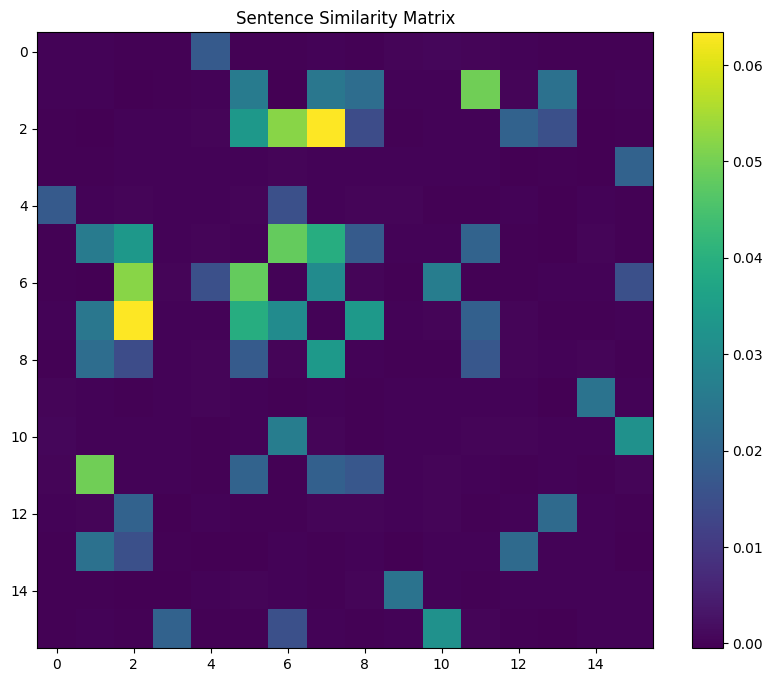

<ipython-input-55-86cfd7d0e6d0>:158: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average')


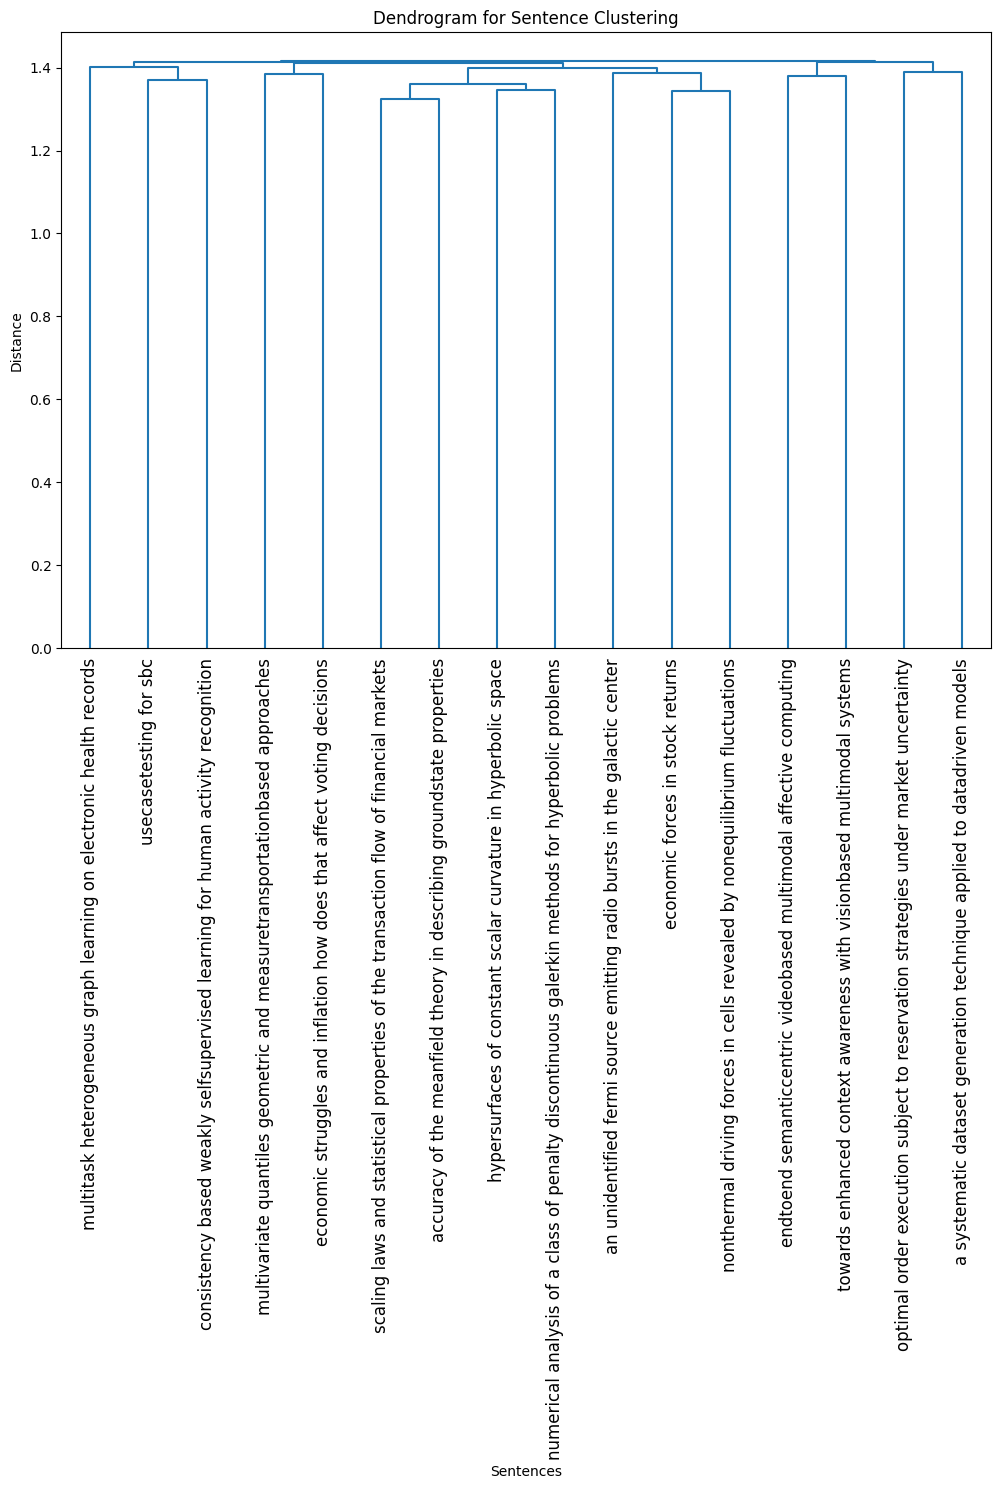

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
import string
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Load spaCy model
nlp = spacy.load('en_core_web_md')

def preprocess_text(text):
    """Remove punctuation and lowercase the text."""
    text = text.lower()
    return text.translate(str.maketrans('', '', string.punctuation))

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    sentence = preprocess_text(sentence)  # Remove punctuation
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    model = Graph2Vec(dimensions=128, epochs=15, workers=4)  # Increased dimensions and epochs for better quality
    model.fit(graphs)
    return model.get_embedding()

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
    gk = GraphKernel(kernel=["weisfeiler_lehman"], normalize=True)
    kernel_matrix = gk.fit_transform(grakel_graphs)
    return kernel_matrix

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, linkage='average', metric='precomputed')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[np.ix_(labels == i, labels == i)]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def find_optimal_clusters(inertias, k_range):
    """Automatically find the optimal number of clusters using the elbow method."""
    if len(inertias) > 1:
        # Calculate the second derivative to find the elbow point
        second_derivative = np.diff(inertias, 2)
        optimal_k = k_range[np.argmin(second_derivative) + 1]
    else:
        optimal_k = k_range[0]  # Fallback option if inertias array is too short
    return optimal_k

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on refined semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    # Apply punctuation removal and lowercase
    sentences = [preprocess_text(sentence) for sentence in sentences]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        print("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities into a single similarity matrix
    # Use a weighted combination for better performance
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    alpha = 0.6  # weight for embedding similarity
    beta = 0.4   # weight for kernel similarity
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            # combined_matrix[i, j] = alpha * embedding_sim + beta * kernel_sim
            combined_matrix[i, j] = embedding_sim + kernel_sim

    # Ensure diagonal values are zero for silhouette calculation
    np.fill_diagonal(combined_matrix, 0)

    # Convert similarity matrix to distance matrix for clustering
    distance_matrix = 1 - combined_matrix
    np.fill_diagonal(distance_matrix, 0)  # Ensure diagonal is zero

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Determine the optimal number of clusters using the Elbow Method and silhouette score
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(combined_matrix, k_range)
    optimal_k = find_optimal_clusters(inertias, k_range)
    print(f"Optimal number of clusters: {optimal_k}")

    # Perform clustering with the chosen number of clusters
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        linkage='average',
        metric='precomputed'
    )
    labels = clustering.fit_predict(distance_matrix)

    # Calculate silhouette score to measure the quality of clusters
    silhouette_avg = silhouette_score(distance_matrix, labels, metric='precomputed')
    print(f"Silhouette Score: {silhouette_avg}")

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id, cluster_sentences in clusters.items():
        print(f"\nCluster {cluster_id} (size {len(cluster_sentences)}):")
        for sentence in cluster_sentences:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

    # Create and plot dendrogram
    linkage_matrix = linkage(distance_matrix, method='average')
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=sentences, orientation='top', leaf_rotation=90)
    plt.title("Dendrogram for Sentence Clustering")
    plt.xlabel("Sentences")
    plt.ylabel("Distance")
    plt.show()

# Example test case
paragraph = """Optimal Order Execution subject to Reservation Strategies under Market Uncertainty. Economic Forces in Stock Returns. Scaling Laws And Statistical Properties of The Transaction Flow of Financial Markets. Multi-task Heterogeneous Graph Learning on Electronic Health Records. A systematic dataset generation technique applied to data-driven models. Hypersurfaces of constant scalar curvature in hyperbolic space. Numerical analysis of a class of penalty discontinuous Galerkin methods for hyperbolic problems. Accuracy of the mean-field theory in describing ground-state properties. An unidentified Fermi source emitting radio bursts in the Galactic center. End-to-end Semantic-centric Video-based Multimodal Affective Computing. Usecase-testing for SBC. Nonthermal driving forces in cells revealed by nonequilibrium fluctuations. Multivariate Quantiles Geometric and Measure-Transportation-Based Approaches. Economic Struggles and Inflation How Does that affect voting decisions. Towards Enhanced Context Awareness with Vision-based Multimodal Systems. Consistency Based Weakly Self-Supervised Learning for Human Activity Recognition."""

cluster_sentences(paragraph)


Graph Embeddings:
[[ 0.00757106  0.007878    0.00594663 ...  0.00572119  0.00266142
   0.00534659]
 [ 0.00355244  0.00838884 -0.00278741 ... -0.00283784  0.00357867
  -0.0006535 ]
 [ 0.00711097 -0.00052404 -0.00704418 ... -0.00413271 -0.00784214
   0.00745485]
 ...
 [ 0.00386737  0.00111378 -0.00319611 ...  0.00230871 -0.00631497
  -0.00360706]
 [ 0.00254813  0.00596251  0.00653809 ...  0.00796377 -0.00804823
   0.00772412]
 [-0.00020415  0.00493007  0.00272046 ...  0.00757743  0.00601803
  -0.00332889]]
Graph Kernels (Kernel Matrix):
[[1.         0.07493633 0.06868028 0.04958681 0.01982629 0.11478247
  0.06142951 0.07476962 0.08546176 0.0326034  0.04563191 0.06344413
  0.06308687 0.04932514 0.02536187]
 [0.07493633 1.         0.06234797 0.05626864 0.01574852 0.12156613
  0.05489438 0.08908708 0.07919849 0.0517954  0.04142465 0.03779645
  0.06681531 0.03358302 0.02686077]
 [0.06868028 0.06234797 1.         0.05157106 0.01030983 0.09947965
  0.06388766 0.06804138 0.07406798 0.05086207 0

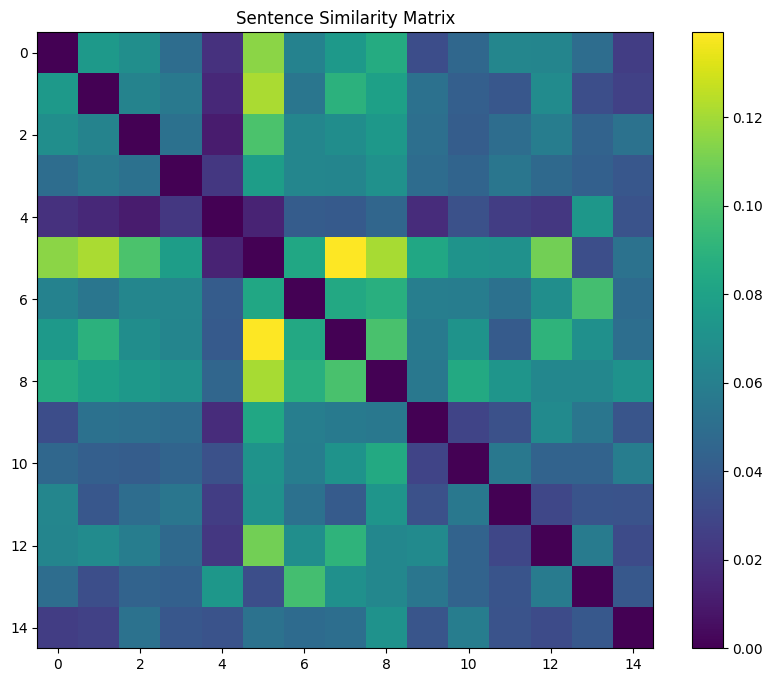

<ipython-input-55-86cfd7d0e6d0>:158: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average')


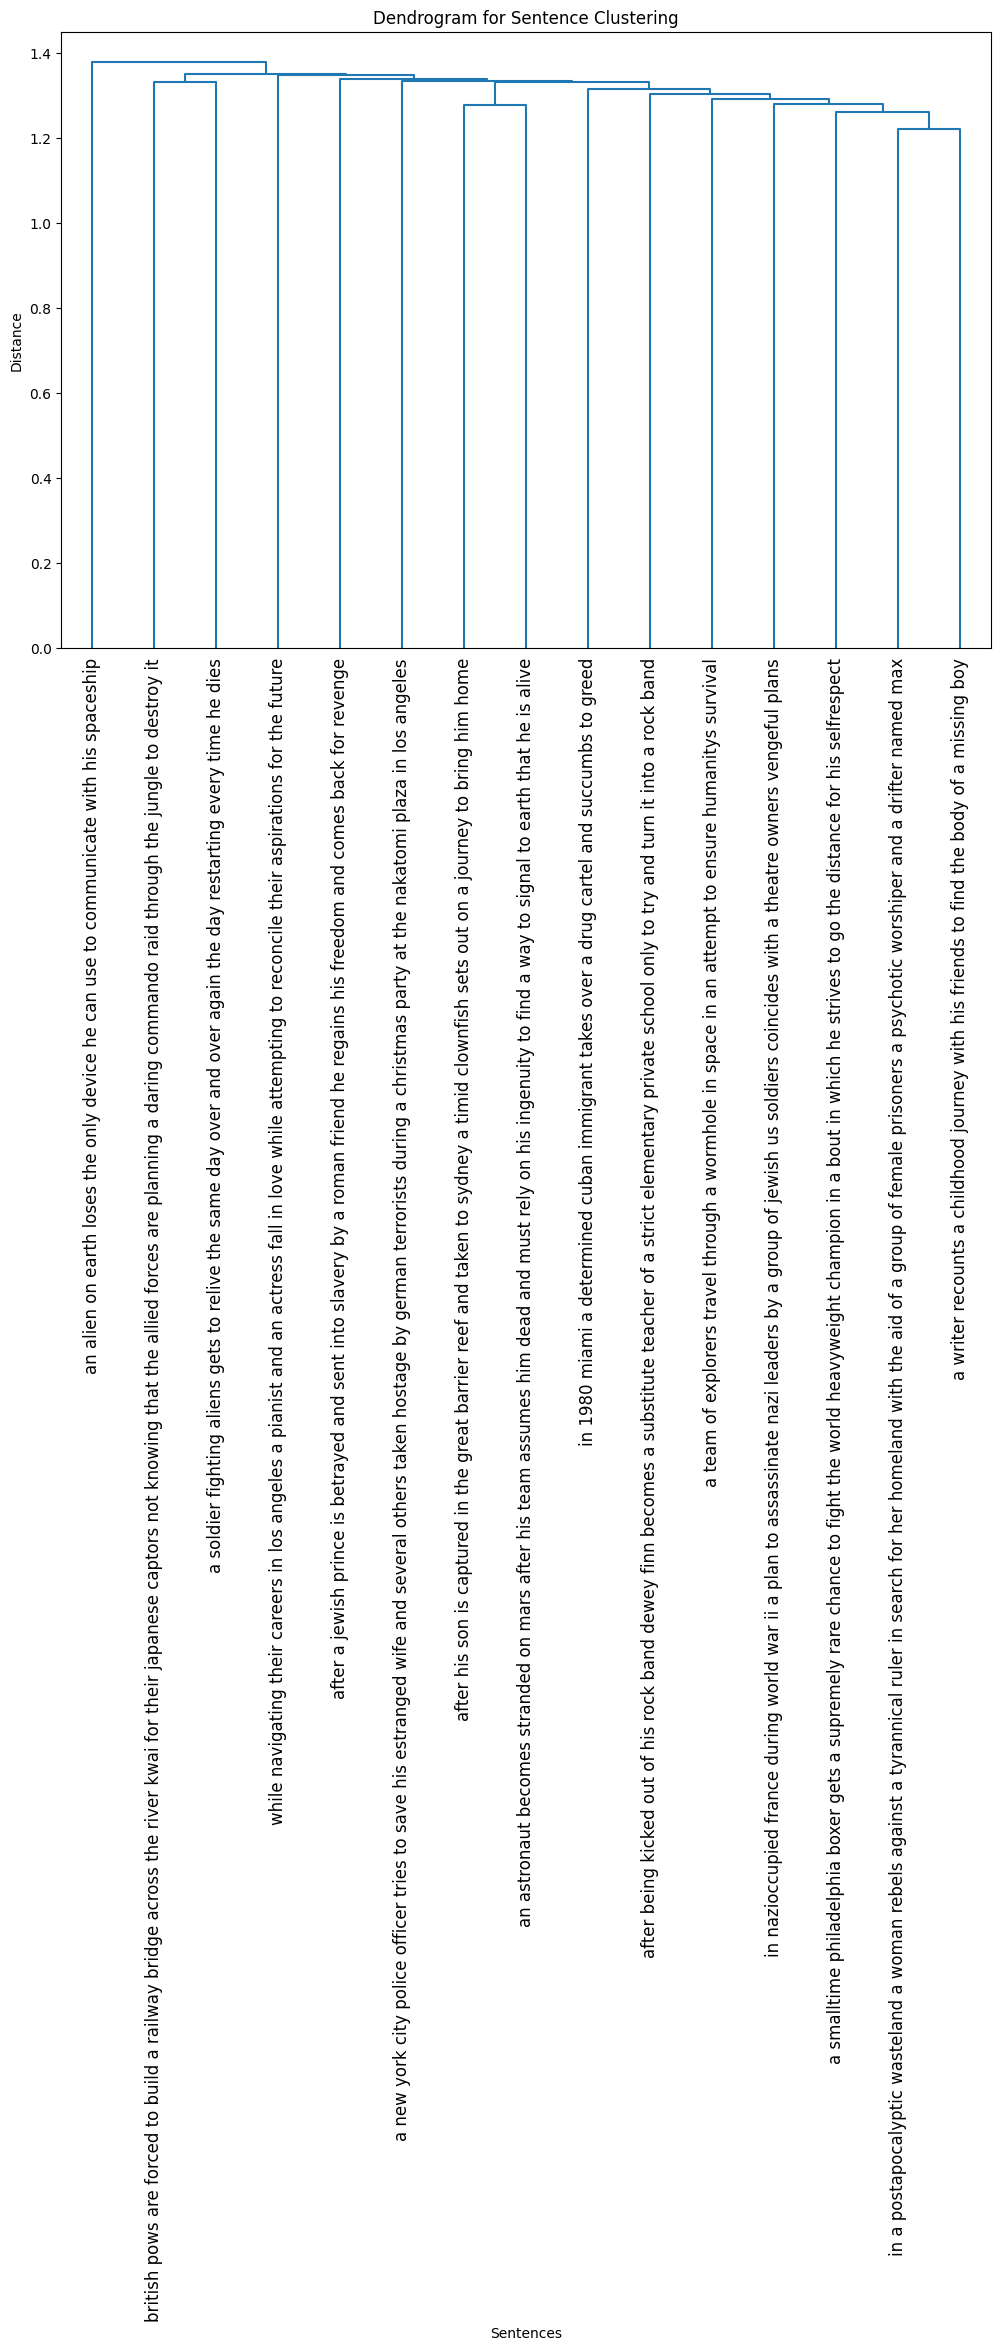

In [ ]:
paragraph = """
A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.
In Nazi-occupied France during World War II, a plan to assassinate Nazi leaders by a group of Jewish US soldiers coincides with a theatre owner's vengeful plans.
In 1980 Miami, a determined Cuban immigrant takes over a drug cartel and succumbs to greed.
A New York City police officer tries to save his estranged wife and several others taken hostage by German terrorists during a Christmas party at the Nakatomi Plaza in Los Angeles.
An alien on Earth loses the only device he can use to communicate with his spaceship.
In a post-apocalyptic wasteland, a woman rebels against a tyrannical ruler in search for her homeland with the aid of a group of female prisoners, a psychotic worshiper, and a drifter named Max.
After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home.
A writer recounts a childhood journey with his friends to find the body of a missing boy.
A small-time Philadelphia boxer gets a supremely rare chance to fight the world heavyweight champion in a bout in which he strives to go the distance for his self-respect.
After a Jewish prince is betrayed and sent into slavery by a Roman friend, he regains his freedom and comes back for revenge.
British POWs are forced to build a railway bridge across the river Kwai for their Japanese captors, not knowing that the allied forces are planning a daring commando raid through the jungle to destroy it.
While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.
After being kicked out of his rock band, Dewey Finn becomes a substitute teacher of a strict elementary private school, only to try and turn it into a rock band.
An astronaut becomes stranded on Mars after his team assumes him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive.
A soldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies.
"""

# Call the clustering function with the formatted paragraph
cluster_sentences(paragraph)


Graph Embeddings:
[[ 7.1368711e-03  7.9999845e-03  6.1871368e-03 ...  5.5568242e-03
   3.0257099e-03  5.3595291e-03]
 [ 3.1624348e-03  8.7783681e-03 -2.3149883e-03 ... -2.8683168e-03
   3.9736056e-03 -4.7981844e-04]
 [ 5.8982652e-03 -9.6735731e-04 -6.6960799e-03 ... -4.6849856e-03
  -7.5777359e-03  7.2381645e-03]
 ...
 [-8.8284316e-04  5.1438082e-03  3.1000299e-03 ...  7.2519421e-03
   6.5482645e-03 -3.3600652e-03]
 [-5.9598624e-03  5.0588250e-03 -8.2269937e-05 ...  5.3070872e-03
   5.7018409e-03  5.5609704e-03]
 [-6.0267426e-04 -6.8012392e-03  1.8609119e-04 ...  3.3770418e-03
  -3.0149382e-03  1.9825955e-03]]
Graph Kernels (Kernel Matrix):
[[1.         0.06482037 0.         0.03857584 0.06485932 0.04824031
  0.01928792 0.10389535 0.05867146 0.0727393  0.07787612 0.03106849
  0.04380479 0.06052275 0.05925157 0.04724556 0.02413085]
 [0.06482037 1.         0.         0.023338   0.05885887 0.05003128
  0.00875175 0.11523538 0.05324349 0.06600984 0.07656071 0.04933984
  0.0397522  0.041192

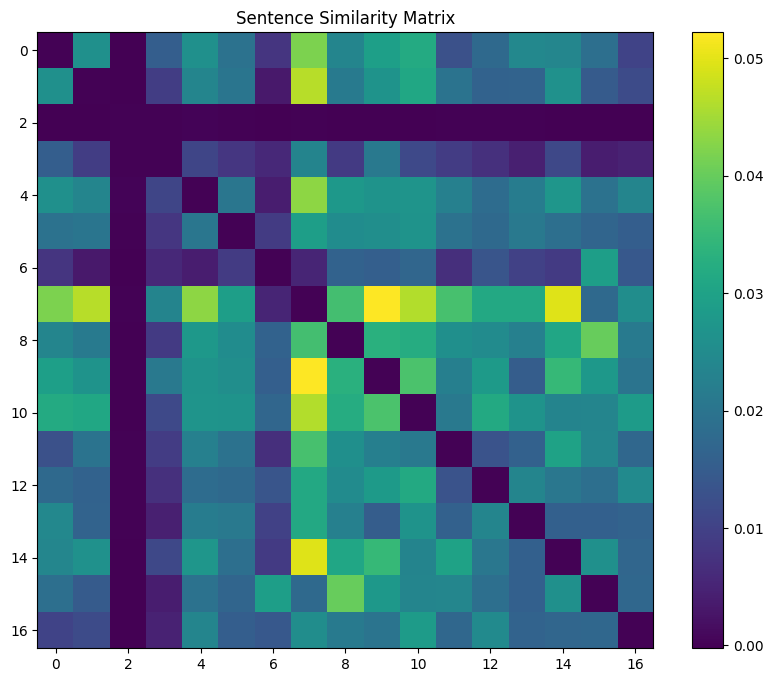

<ipython-input-47-301d6224609a>:152: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average')


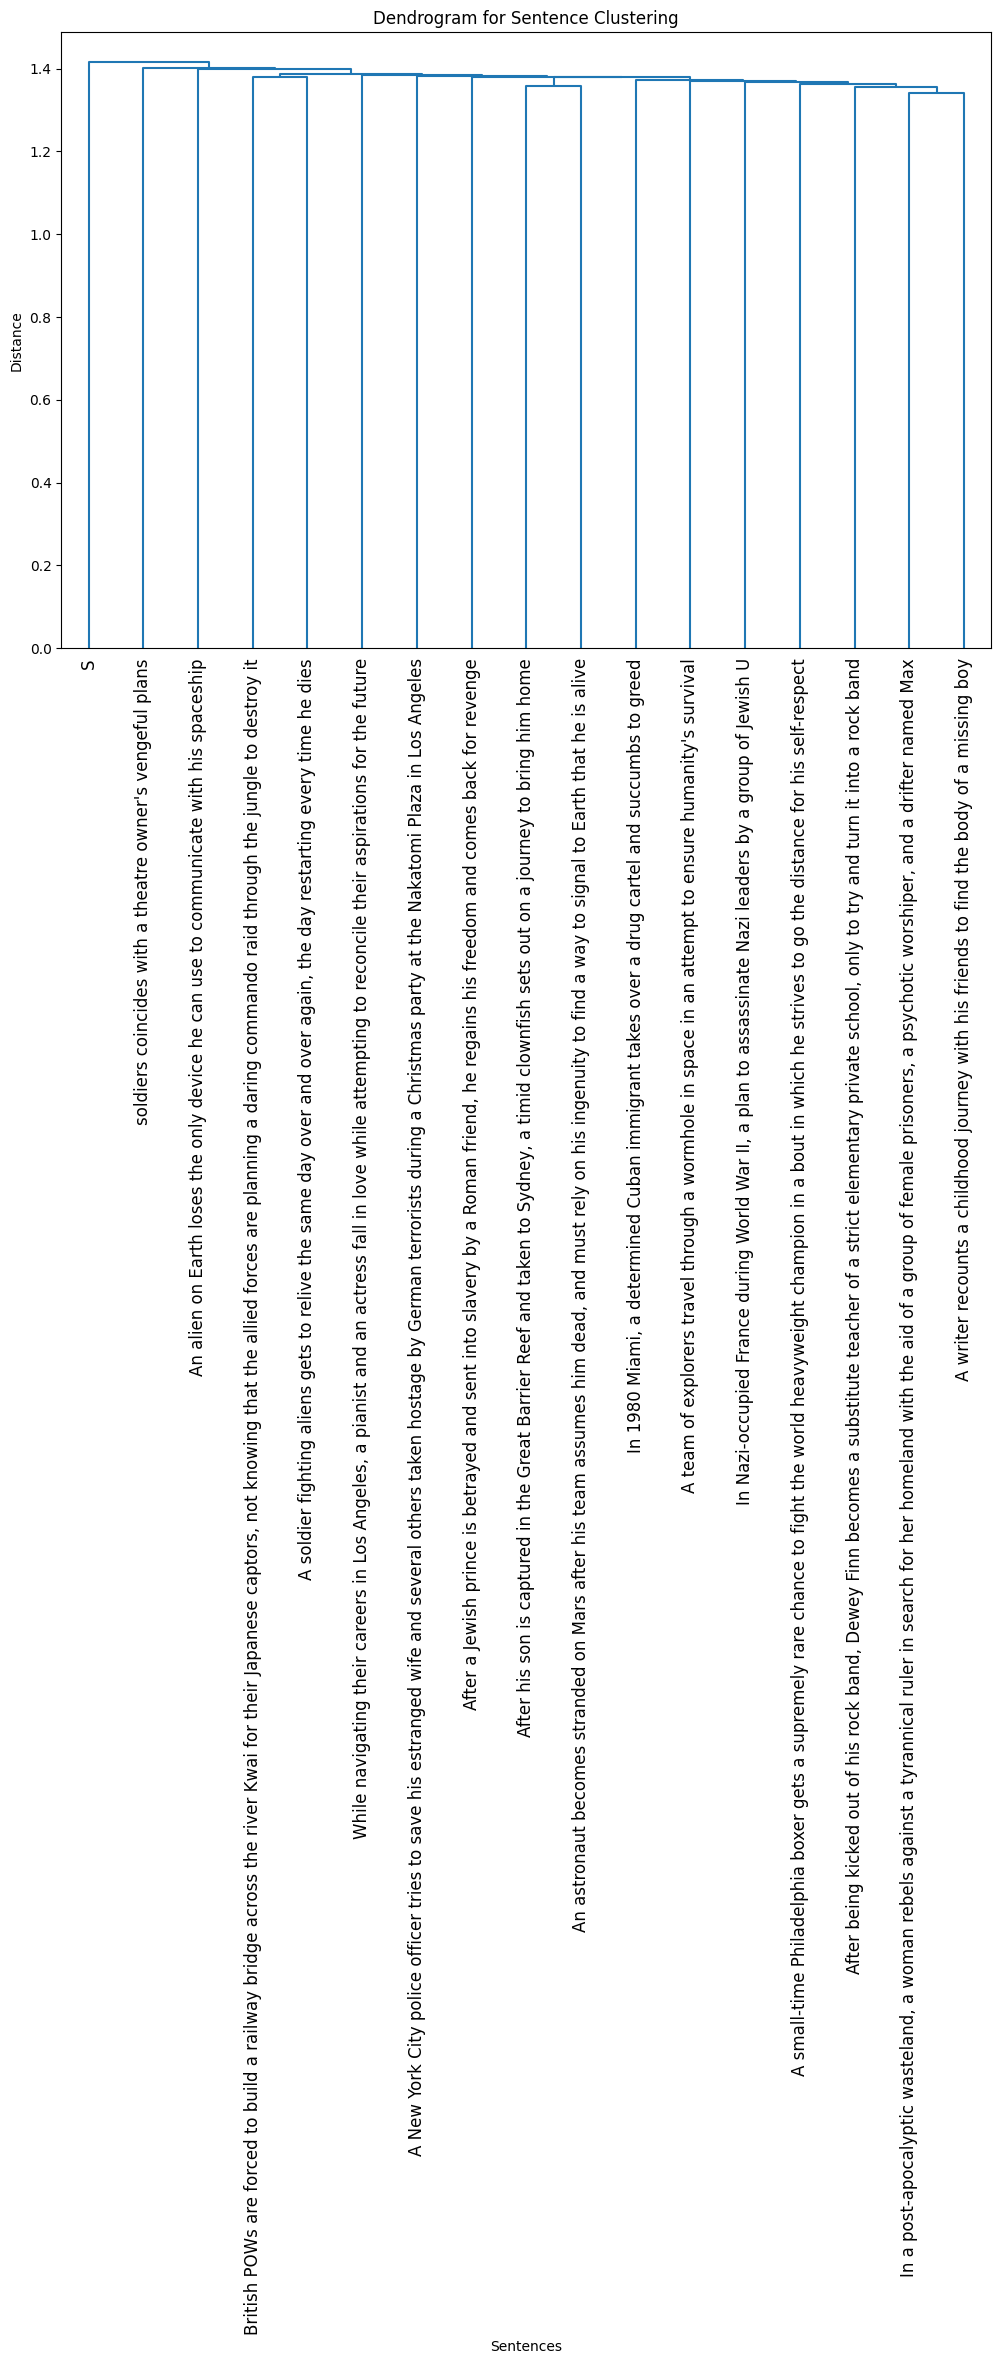

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Load spaCy model
nlp = spacy.load('en_core_web_md')

def preprocess_text(text):
    """Lowercase the text without removing punctuation."""
    return text.lower()

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence."""
    sentence = preprocess_text(sentence)  # Lowercase only
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    model = Graph2Vec(dimensions=128, epochs=15, workers=4)  # Increased dimensions and epochs for better quality
    model.fit(graphs)
    return model.get_embedding()

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
    gk = GraphKernel(kernel=["weisfeiler_lehman"], normalize=True)
    kernel_matrix = gk.fit_transform(grakel_graphs)
    return kernel_matrix

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, linkage='average', metric='precomputed')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[np.ix_(labels == i, labels == i)]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def find_optimal_clusters(inertias, k_range):
    """Automatically find the optimal number of clusters using the elbow method."""
    if len(inertias) > 1:
        # Calculate the second derivative to find the elbow point
        second_derivative = np.diff(inertias, 2)
        optimal_k = k_range[np.argmin(second_derivative) + 1]
    else:
        optimal_k = k_range[0]  # Fallback option if inertias array is too short
    return optimal_k

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on refined semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        print("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Combine embeddings and kernel similarities into a single similarity matrix
    # Use a weighted combination for better performance
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    alpha = 0.6  # weight for embedding similarity
    beta = 0.4   # weight for kernel similarity
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(graph_embeddings[i], graph_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = alpha * embedding_sim + beta * kernel_sim

    # Ensure diagonal values are zero for silhouette calculation
    np.fill_diagonal(combined_matrix, 0)

    # Convert similarity matrix to distance matrix for clustering
    distance_matrix = 1 - combined_matrix
    np.fill_diagonal(distance_matrix, 0)  # Ensure diagonal is zero

    print("Sentence Similarity Matrix:")
    print(combined_matrix)

    # Determine the optimal number of clusters using the Elbow Method and silhouette score
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(combined_matrix, k_range)
    optimal_k = find_optimal_clusters(inertias, k_range)
    print(f"Optimal number of clusters: {optimal_k}")

    # Perform clustering with the chosen number of clusters
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        linkage='average',
        metric='precomputed'
    )
    labels = clustering.fit_predict(distance_matrix)

    # Calculate silhouette score to measure the quality of clusters
    silhouette_avg = silhouette_score(distance_matrix, labels, metric='precomputed')
    print(f"Silhouette Score: {silhouette_avg}")

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id, cluster_sentences in clusters.items():
        print(f"\nCluster {cluster_id} (size {len(cluster_sentences)}):")
        for sentence in cluster_sentences:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

    # Create and plot dendrogram
    linkage_matrix = linkage(distance_matrix, method='average')
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=sentences, orientation='top', leaf_rotation=90)
    plt.title("Dendrogram for Sentence Clustering")
    plt.xlabel("Sentences")
    plt.ylabel("Distance")
    plt.show()

paragraph = """
A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.
In Nazi-occupied France during World War II, a plan to assassinate Nazi leaders by a group of Jewish U.S. soldiers coincides with a theatre owner's vengeful plans.
In 1980 Miami, a determined Cuban immigrant takes over a drug cartel and succumbs to greed.
A New York City police officer tries to save his estranged wife and several others taken hostage by German terrorists during a Christmas party at the Nakatomi Plaza in Los Angeles.
An alien on Earth loses the only device he can use to communicate with his spaceship.
In a post-apocalyptic wasteland, a woman rebels against a tyrannical ruler in search for her homeland with the aid of a group of female prisoners, a psychotic worshiper, and a drifter named Max.
After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home.
A writer recounts a childhood journey with his friends to find the body of a missing boy.
A small-time Philadelphia boxer gets a supremely rare chance to fight the world heavyweight champion in a bout in which he strives to go the distance for his self-respect.
After a Jewish prince is betrayed and sent into slavery by a Roman friend, he regains his freedom and comes back for revenge.
British POWs are forced to build a railway bridge across the river Kwai for their Japanese captors, not knowing that the allied forces are planning a daring commando raid through the jungle to destroy it.
While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.
After being kicked out of his rock band, Dewey Finn becomes a substitute teacher of a strict elementary private school, only to try and turn it into a rock band.
An astronaut becomes stranded on Mars after his team assumes him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive.
A soldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies.
"""

# Call the clustering function with the formatted paragraph
cluster_sentences(paragraph)


Graph Embeddings:
[[ 0.00802957  0.00791784  0.0057052  ...  0.00586493  0.00267802
   0.00526688]
 [ 0.00418048  0.0084759  -0.00312531 ... -0.00259548  0.00354989
  -0.00072684]
 [ 0.00633874 -0.00078118 -0.00679512 ... -0.00445531 -0.00765494
   0.00734559]
 ...
 [ 0.00419826  0.00096198 -0.00354831 ...  0.00239196 -0.0062675
  -0.00391237]
 [ 0.00210761  0.00565362  0.00656466 ...  0.00765199 -0.00776129
   0.00748564]
 [-0.00035275  0.00454358  0.00240529 ...  0.00740593  0.00616041
  -0.00366084]]
Graph Kernels (Kernel Matrix):
[[1.         0.07462474 0.06485932 0.04824031 0.01928792 0.10389535
  0.05867146 0.0727393  0.07787612 0.03106849 0.04380479 0.06052275
  0.05925157 0.04724556 0.02413085]
 [0.07462474 1.         0.06336143 0.05236248 0.01465526 0.12279757
  0.05572436 0.08290267 0.07889531 0.05311422 0.04279315 0.04023786
  0.07003152 0.03589791 0.03055833]
 [0.06485932 0.06336143 1.         0.05006134 0.01000801 0.1078173
  0.06849704 0.06604949 0.06734656 0.05642226 0.0

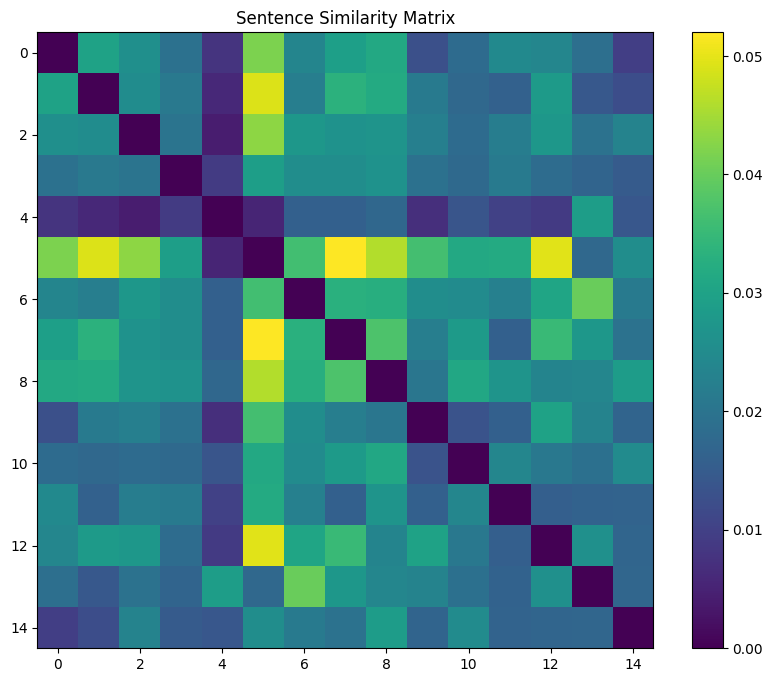

<ipython-input-47-301d6224609a>:152: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average')


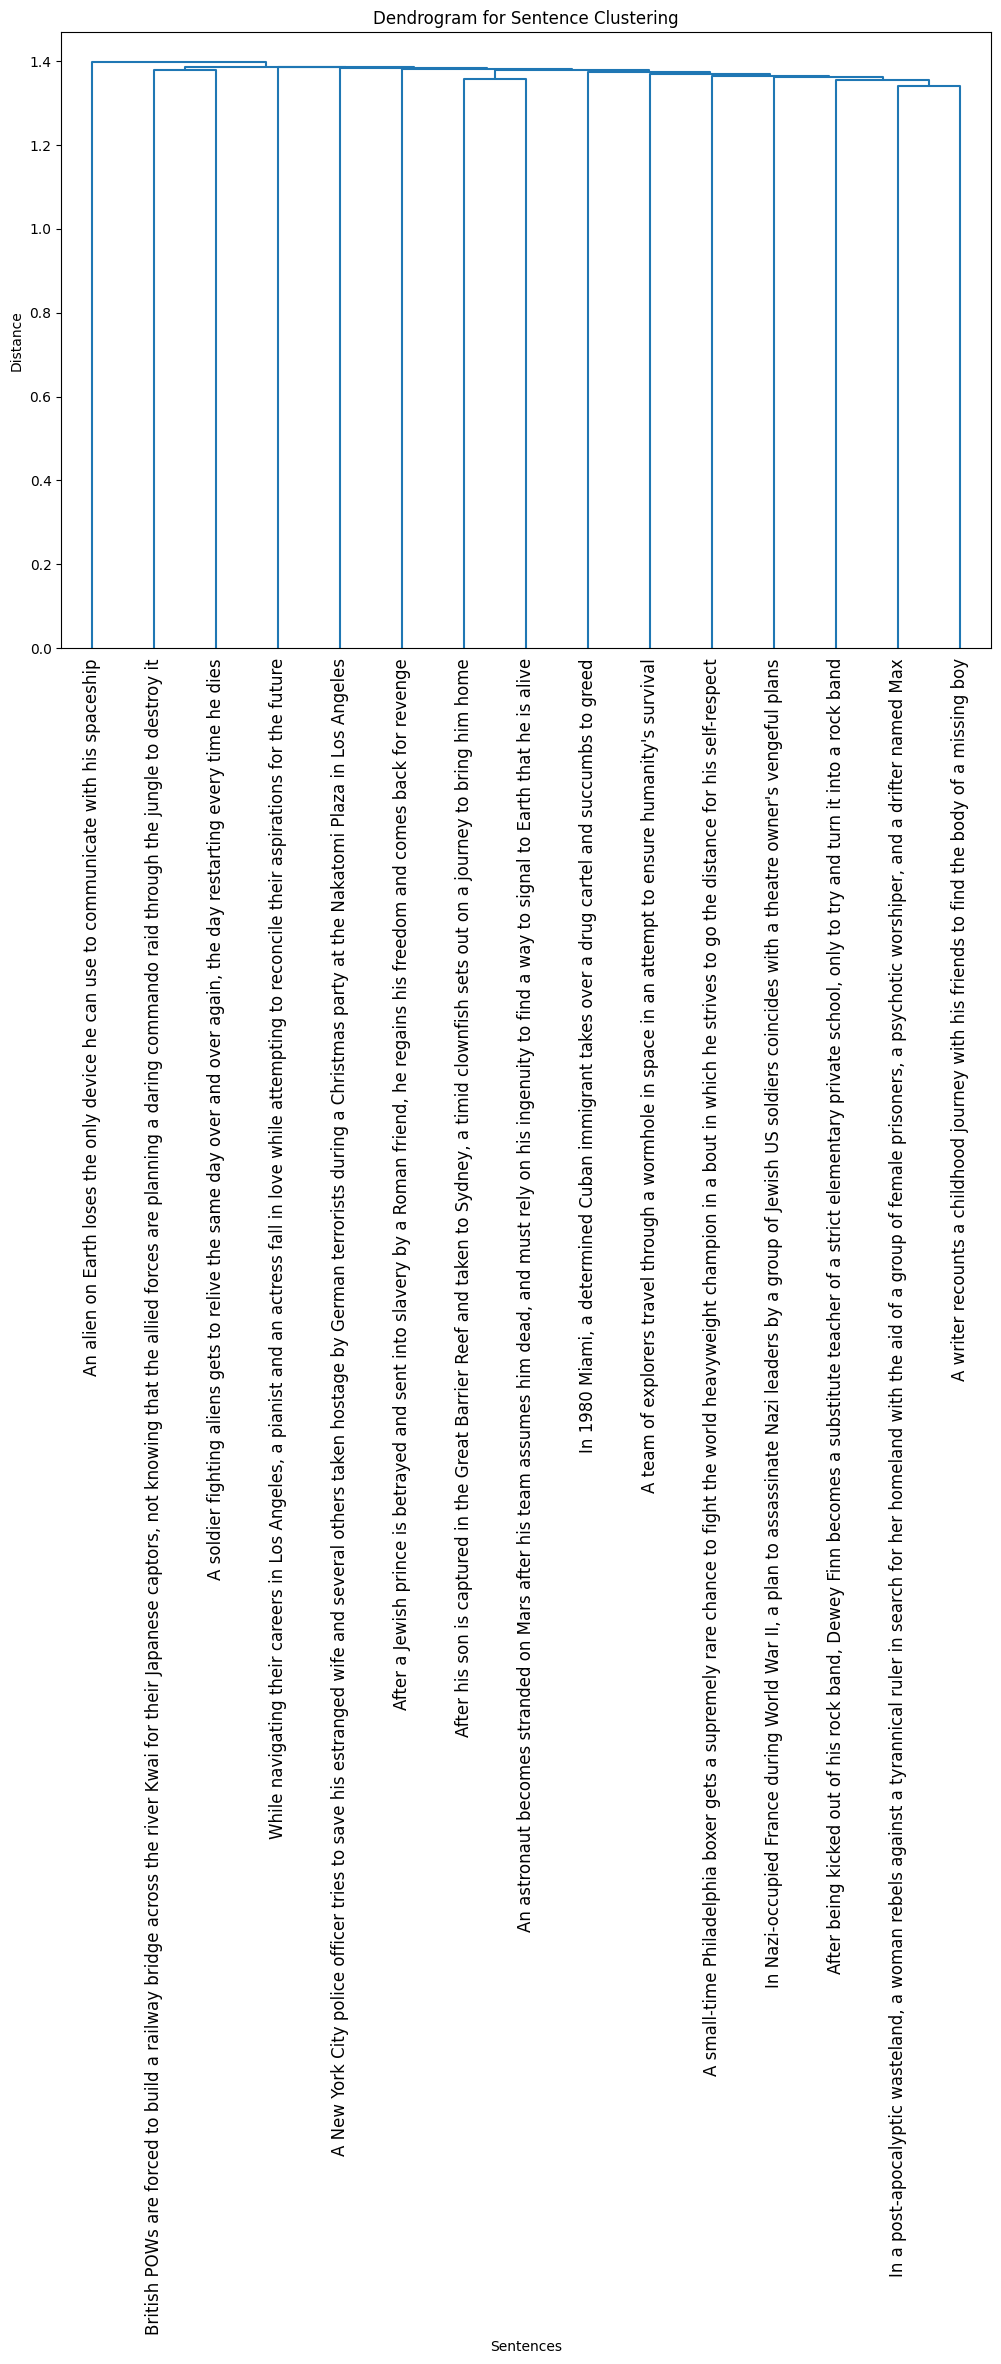

In [ ]:
paragraph = """
A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.
In Nazi-occupied France during World War II, a plan to assassinate Nazi leaders by a group of Jewish US soldiers coincides with a theatre owner's vengeful plans.
In 1980 Miami, a determined Cuban immigrant takes over a drug cartel and succumbs to greed.
A New York City police officer tries to save his estranged wife and several others taken hostage by German terrorists during a Christmas party at the Nakatomi Plaza in Los Angeles.
An alien on Earth loses the only device he can use to communicate with his spaceship.
In a post-apocalyptic wasteland, a woman rebels against a tyrannical ruler in search for her homeland with the aid of a group of female prisoners, a psychotic worshiper, and a drifter named Max.
After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home.
A writer recounts a childhood journey with his friends to find the body of a missing boy.
A small-time Philadelphia boxer gets a supremely rare chance to fight the world heavyweight champion in a bout in which he strives to go the distance for his self-respect.
After a Jewish prince is betrayed and sent into slavery by a Roman friend, he regains his freedom and comes back for revenge.
British POWs are forced to build a railway bridge across the river Kwai for their Japanese captors, not knowing that the allied forces are planning a daring commando raid through the jungle to destroy it.
While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.
After being kicked out of his rock band, Dewey Finn becomes a substitute teacher of a strict elementary private school, only to try and turn it into a rock band.
An astronaut becomes stranded on Mars after his team assumes him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive.
A soldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies.
"""

# Call the clustering function with the formatted paragraph
cluster_sentences(paragraph)

Graph Embeddings:
[[ 0.00802957  0.00791784  0.0057052  ...  0.00586493  0.00267802
   0.00526688]
 [ 0.00418048  0.0084759  -0.00312531 ... -0.00259548  0.00354989
  -0.00072684]
 [ 0.00633874 -0.00078118 -0.00679512 ... -0.00445531 -0.00765494
   0.00734559]
 ...
 [ 0.00419826  0.00096198 -0.00354831 ...  0.00239196 -0.0062675
  -0.00391237]
 [ 0.00210761  0.00565362  0.00656466 ...  0.00765199 -0.00776129
   0.00748564]
 [-0.00035275  0.00454358  0.00240529 ...  0.00740593  0.00616041
  -0.00366084]]
Graph Kernels (Kernel Matrix):
[[1.         0.07462474 0.06485932 0.04824031 0.01928792 0.10389535
  0.05867146 0.0727393  0.07787612 0.03106849 0.04380479 0.06052275
  0.05925157 0.04724556 0.02430764]
 [0.07462474 1.         0.06336143 0.05236248 0.01465526 0.12279757
  0.05572436 0.08290267 0.07396435 0.05311422 0.04279315 0.04023786
  0.07003152 0.03589791 0.0307822 ]
 [0.06485932 0.06336143 1.         0.05006134 0.01000801 0.1078173
  0.06849704 0.06604949 0.06734656 0.05642226 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


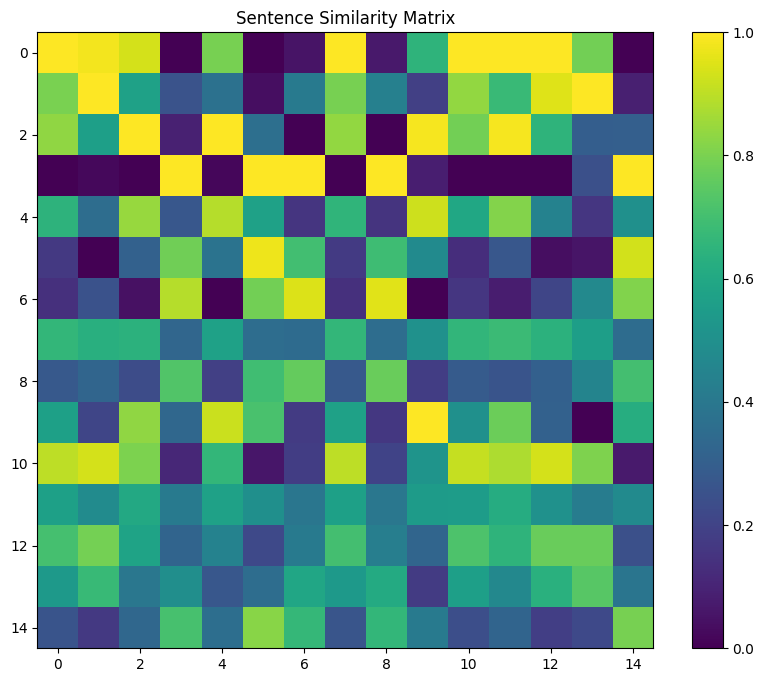

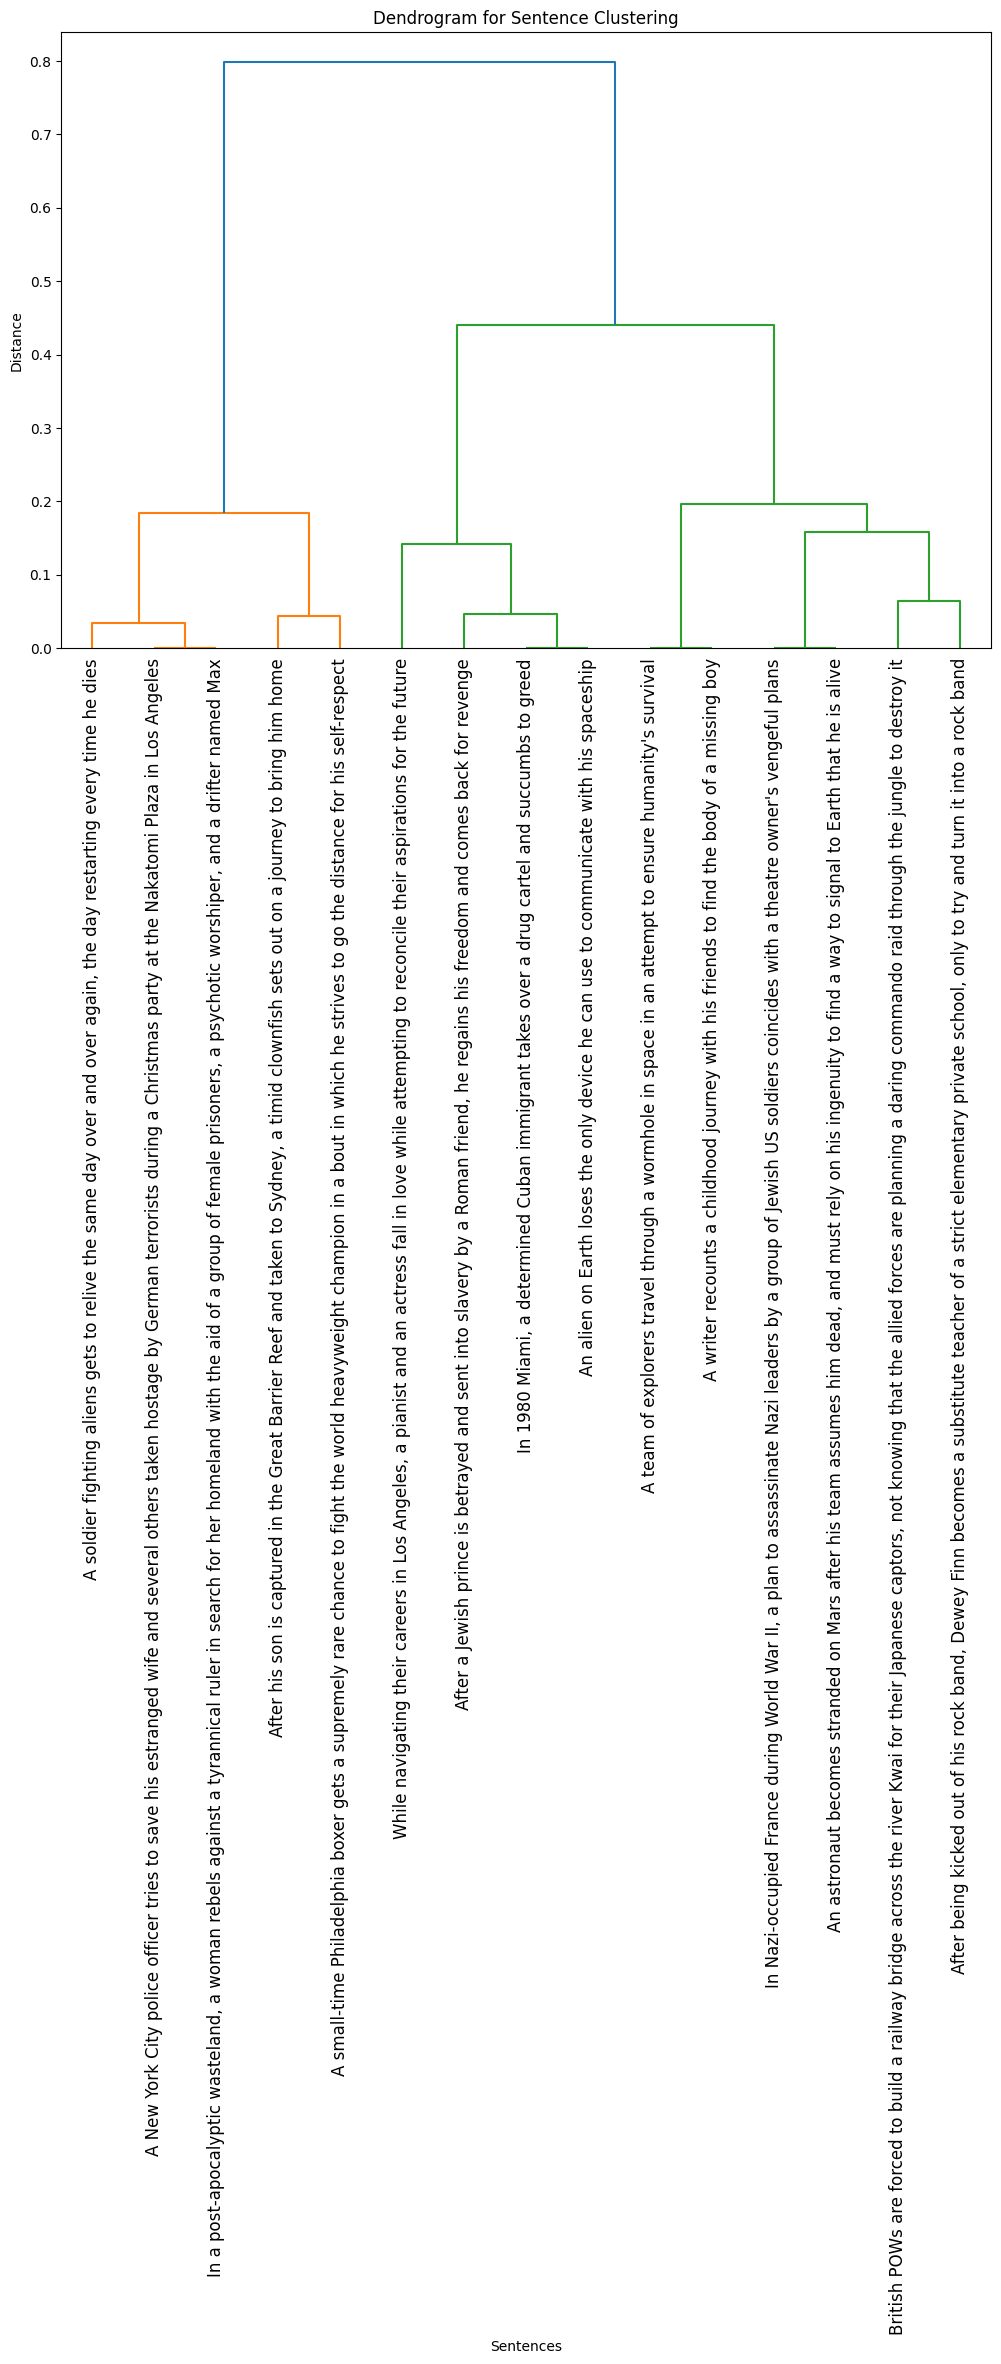

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

# Load spaCy model
nlp = spacy.load('en_core_web_md')

def preprocess_text(text):
    """Lowercase the text without removing punctuation."""
    return text.lower()

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence including named entities."""
    sentence = preprocess_text(sentence)  # Lowercase only
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)

    # Add named entity relations
    for ent in doc.ents:
        G.add_node(ent.start, word=ent.text, label=ent.label_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    model = Graph2Vec(dimensions=128, epochs=15, workers=4)
    model.fit(graphs)
    return model.get_embedding()

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
    gk = GraphKernel(kernel=["weisfeiler_lehman"], normalize=True)
    kernel_matrix = gk.fit_transform(grakel_graphs)
    return kernel_matrix

def perform_dimensionality_reduction(embeddings):
    """Reduce dimensionality of graph embeddings using t-SNE for better separation."""
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Set perplexity less than n_samples
    reduced_embeddings = tsne.fit_transform(embeddings)
    return reduced_embeddings

def scale_similarity_matrix(similarity_matrix):
    """Scale similarity matrix to ensure it lies within 0 to 1 range."""
    scaler = MinMaxScaler()
    scaled_matrix = scaler.fit_transform(similarity_matrix)
    return scaled_matrix

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on refined semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        print("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Reduce dimensionality of embeddings
    reduced_embeddings = perform_dimensionality_reduction(graph_embeddings)

    # Combine embeddings and kernel similarities into a single similarity matrix
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    alpha = 0.7  # Increased weight for embedding similarity
    beta = 0.3   # Reduced weight for kernel similarity
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(reduced_embeddings[i], reduced_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = alpha * embedding_sim + beta * kernel_sim

    # Scale the combined matrix to ensure values are within 0 to 1
    scaled_combined_matrix = scale_similarity_matrix(combined_matrix)

    # Convert similarity matrix to distance matrix for clustering
    distance_matrix = 1 - scaled_combined_matrix
    np.fill_diagonal(distance_matrix, 0)  # Ensure diagonal is zero

    print("Sentence Similarity Matrix:")
    print(scaled_combined_matrix)

    # Perform Agglomerative Clustering
    clustering = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=0.5,
        affinity='precomputed',
        linkage='average'
    )
    labels = clustering.fit_predict(distance_matrix)

    # Calculate silhouette score to measure the quality of clusters
    silhouette_avg = silhouette_score(distance_matrix, labels, metric='precomputed')
    print(f"Silhouette Score: {silhouette_avg}")

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id, cluster_sentences in clusters.items():
        print(f"\nCluster {cluster_id} (size {len(cluster_sentences)}):")
        for sentence in cluster_sentences:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(scaled_combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

    # Create and plot dendrogram
    linkage_matrix = linkage(distance_matrix[np.triu_indices_from(distance_matrix, k=1)], method='average')
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=sentences, orientation='top', leaf_rotation=90)
    plt.title("Dendrogram for Sentence Clustering")
    plt.xlabel("Sentences")
    plt.ylabel("Distance")
    plt.show()

# Example test case
paragraph = """
A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.
In Nazi-occupied France during World War II, a plan to assassinate Nazi leaders by a group of Jewish US soldiers coincides with a theatre owner's vengeful plans.
In 1980 Miami, a determined Cuban immigrant takes over a drug cartel and succumbs to greed.
A New York City police officer tries to save his estranged wife and several others taken hostage by German terrorists during a Christmas party at the Nakatomi Plaza in Los Angeles.
An alien on Earth loses the only device he can use to communicate with his spaceship.
In a post-apocalyptic wasteland, a woman rebels against a tyrannical ruler in search for her homeland with the aid of a group of female prisoners, a psychotic worshiper, and a drifter named Max.
After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home.
A writer recounts a childhood journey with his friends to find the body of a missing boy.
A small-time Philadelphia boxer gets a supremely rare chance to fight the world heavyweight champion in a bout in which he strives to go the distance for his self-respect.
After a Jewish prince is betrayed and sent into slavery by a Roman friend, he regains his freedom and comes back for revenge.
British POWs are forced to build a railway bridge across the river Kwai for their Japanese captors, not knowing that the allied forces are planning a daring commando raid through the jungle to destroy it.
While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.
After being kicked out of his rock band, Dewey Finn becomes a substitute teacher of a strict elementary private school, only to try and turn it into a rock band.
An astronaut becomes stranded on Mars after his team assumes him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive.
A soldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies.
"""

cluster_sentences(paragraph)


Graph Embeddings:
[[ 0.00802957  0.00791784  0.0057052  ...  0.00586493  0.00267802
   0.00526688]
 [ 0.00418048  0.0084759  -0.00312531 ... -0.00259548  0.00354989
  -0.00072684]
 [ 0.00633874 -0.00078118 -0.00679512 ... -0.00445531 -0.00765494
   0.00734559]
 ...
 [ 0.00419826  0.00096198 -0.00354831 ...  0.00239196 -0.0062675
  -0.00391237]
 [ 0.00210761  0.00565362  0.00656466 ...  0.00765199 -0.00776129
   0.00748564]
 [-0.00035275  0.00454358  0.00240529 ...  0.00740593  0.00616041
  -0.00366084]]
Graph Kernels (Kernel Matrix):
[[1.         0.07462474 0.06485932 0.04824031 0.01928792 0.10389535
  0.05867146 0.0727393  0.07787612 0.03106849 0.04380479 0.06052275
  0.05925157 0.04724556 0.02430764]
 [0.07462474 1.         0.06336143 0.05236248 0.01465526 0.12279757
  0.05572436 0.08290267 0.07396435 0.05311422 0.04279315 0.04023786
  0.07003152 0.03589791 0.0307822 ]
 [0.06485932 0.06336143 1.         0.05006134 0.01000801 0.1078173
  0.06849704 0.06604949 0.06734656 0.05642226 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

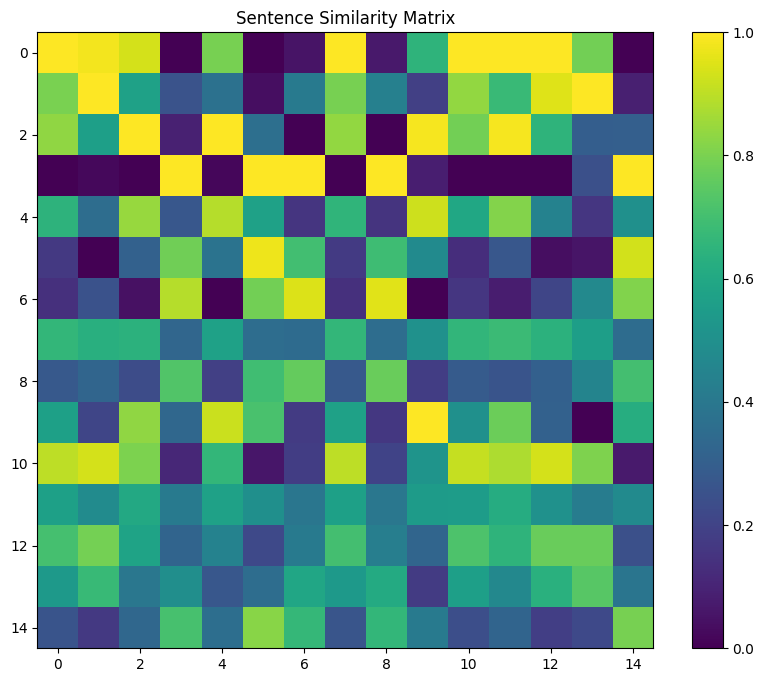

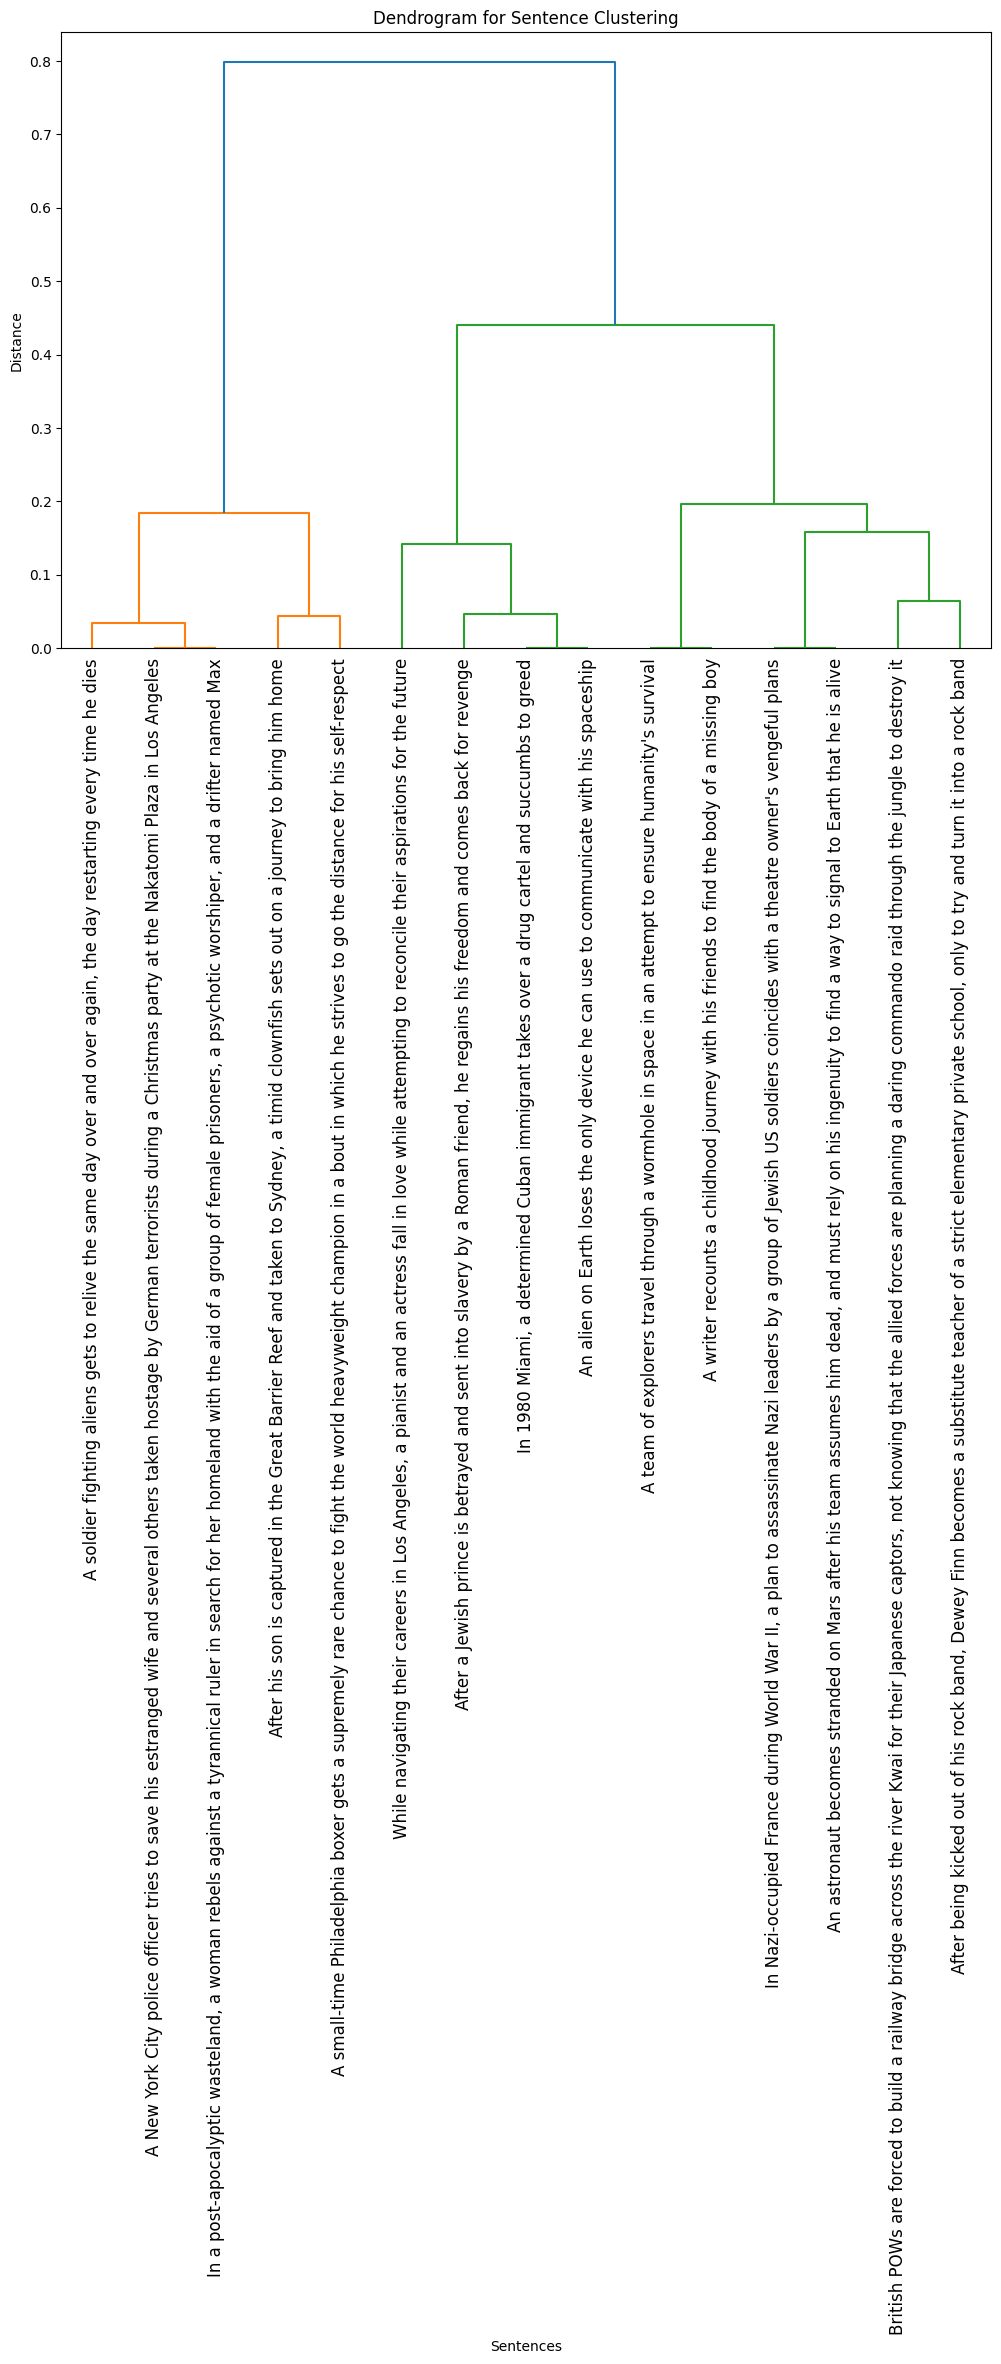

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

# Load spaCy model
nlp = spacy.load('en_core_web_md')

def preprocess_text(text):
    """Lowercase the text without removing punctuation."""
    return text.lower()

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence including named entities."""
    sentence = preprocess_text(sentence)  # Lowercase only
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)

    # Add named entity relations
    for ent in doc.ents:
        G.add_node(ent.start, word=ent.text, label=ent.label_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    model = Graph2Vec(dimensions=128, epochs=15, workers=4)
    model.fit(graphs)
    return model.get_embedding()

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
    gk = GraphKernel(kernel=["weisfeiler_lehman"], normalize=True)
    kernel_matrix = gk.fit_transform(grakel_graphs)
    return kernel_matrix

def perform_dimensionality_reduction(embeddings):
    """Reduce dimensionality of graph embeddings using t-SNE for better separation."""
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Set perplexity less than n_samples
    reduced_embeddings = tsne.fit_transform(embeddings)
    return reduced_embeddings

def scale_similarity_matrix(similarity_matrix):
    """Scale similarity matrix to ensure it lies within 0 to 1 range."""
    scaler = MinMaxScaler()
    scaled_matrix = scaler.fit_transform(similarity_matrix)
    return scaled_matrix

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, linkage='average', affinity='precomputed')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[np.ix_(labels == i, labels == i)]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def find_optimal_clusters(inertias, k_range):
    """Automatically find the optimal number of clusters using the elbow method."""
    if len(inertias) > 1:
        # Calculate the second derivative to find the elbow point
        second_derivative = np.diff(inertias, 2)
        optimal_k = k_range[np.argmin(second_derivative) + 1]
    else:
        optimal_k = k_range[0]  # Fallback option if inertias array is too short
    return optimal_k

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on refined semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    # Ensure there are valid graphs to process
    if not graphs:
        print("No valid graphs to process.")
        return

    # Create graph embeddings
    graph_embeddings = create_graph_embeddings(graphs)
    print("Graph Embeddings:")
    print(graph_embeddings)

    # Calculate graph kernels
    kernel_matrix = calculate_graph_kernels(graphs)
    print("Graph Kernels (Kernel Matrix):")
    print(kernel_matrix)

    # Reduce dimensionality of embeddings
    reduced_embeddings = perform_dimensionality_reduction(graph_embeddings)

    # Combine embeddings and kernel similarities into a single similarity matrix
    combined_matrix = np.zeros((len(sentences), len(sentences)))
    alpha = 0.7  # Increased weight for embedding similarity
    beta = 0.3   # Reduced weight for kernel similarity
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(reduced_embeddings[i], reduced_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = alpha * embedding_sim + beta * kernel_sim

    # Scale the combined matrix to ensure values are within 0 to 1
    scaled_combined_matrix = scale_similarity_matrix(combined_matrix)

    # Convert similarity matrix to distance matrix for clustering
    distance_matrix = 1 - scaled_combined_matrix
    np.fill_diagonal(distance_matrix, 0)  # Ensure diagonal is zero

    print("Sentence Similarity Matrix:")
    print(scaled_combined_matrix)

    # Determine the optimal number of clusters using the Elbow Method
    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(scaled_combined_matrix, k_range)
    optimal_k = find_optimal_clusters(inertias, k_range)
    print(f"Optimal number of clusters: {optimal_k}")

    # Perform clustering with the chosen number of clusters
    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        linkage='average',
        affinity='precomputed'
    )
    labels = clustering.fit_predict(distance_matrix)

    # Calculate silhouette score to measure the quality of clusters
    silhouette_avg = silhouette_score(distance_matrix, labels, metric='precomputed')
    print(f"Silhouette Score: {silhouette_avg}")

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id, cluster_sentences in clusters.items():
        print(f"\nCluster {cluster_id} (size {len(cluster_sentences)}):")
        for sentence in cluster_sentences:
            print(f"  - {sentence}")

    # Plot similarity matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(scaled_combined_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

    # Create and plot dendrogram
    linkage_matrix = linkage(distance_matrix[np.triu_indices_from(distance_matrix, k=1)], method='average')
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=sentences, orientation='top', leaf_rotation=90)
    plt.title("Dendrogram for Sentence Clustering")
    plt.xlabel("Sentences")
    plt.ylabel("Distance")
    plt.show()

# Example test case
paragraph = """
A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.
In Nazi-occupied France during World War II, a plan to assassinate Nazi leaders by a group of Jewish US soldiers coincides with a theatre owner's vengeful plans.
In 1980 Miami, a determined Cuban immigrant takes over a drug cartel and succumbs to greed.
A New York City police officer tries to save his estranged wife and several others taken hostage by German terrorists during a Christmas party at the Nakatomi Plaza in Los Angeles.
An alien on Earth loses the only device he can use to communicate with his spaceship.
In a post-apocalyptic wasteland, a woman rebels against a tyrannical ruler in search for her homeland with the aid of a group of female prisoners, a psychotic worshiper, and a drifter named Max.
After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home.
A writer recounts a childhood journey with his friends to find the body of a missing boy.
A small-time Philadelphia boxer gets a supremely rare chance to fight the world heavyweight champion in a bout in which he strives to go the distance for his self-respect.
After a Jewish prince is betrayed and sent into slavery by a Roman friend, he regains his freedom and comes back for revenge.
British POWs are forced to build a railway bridge across the river Kwai for their Japanese captors, not knowing that the allied forces are planning a daring commando raid through the jungle to destroy it.
While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.
After being kicked out of his rock band, Dewey Finn becomes a substitute teacher of a strict elementary private school, only to try and turn it into a rock band.
An astronaut becomes stranded on Mars after his team assumes him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive.
A soldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies.
"""

cluster_sentences(paragraph)


## Contrastive learning

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

Optimal number of clusters: 7
Silhouette Score: 0.17355124619302814

Cluster 0 (size 5):
  - A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival
  - A writer recounts a childhood journey with his friends to find the body of a missing boy
  - British POWs are forced to build a railway bridge across the river Kwai for their Japanese captors, not knowing that the allied forces are planning a daring commando raid through the jungle to destroy it
  - While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future
  - After being kicked out of his rock band, Dewey Finn becomes a substitute teacher of a strict elementary private school, only to try and turn it into a rock band

Cluster 2 (size 2):
  - In Nazi-occupied France during World War II, a plan to assassinate Nazi leaders by a group of Jewish US soldiers coincides with a theatre owner's vengeful plans
  - 

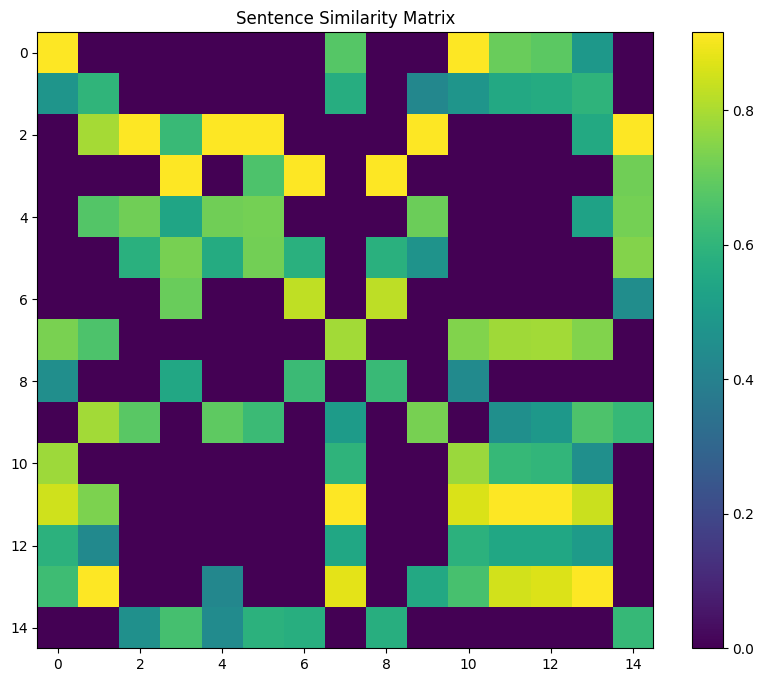

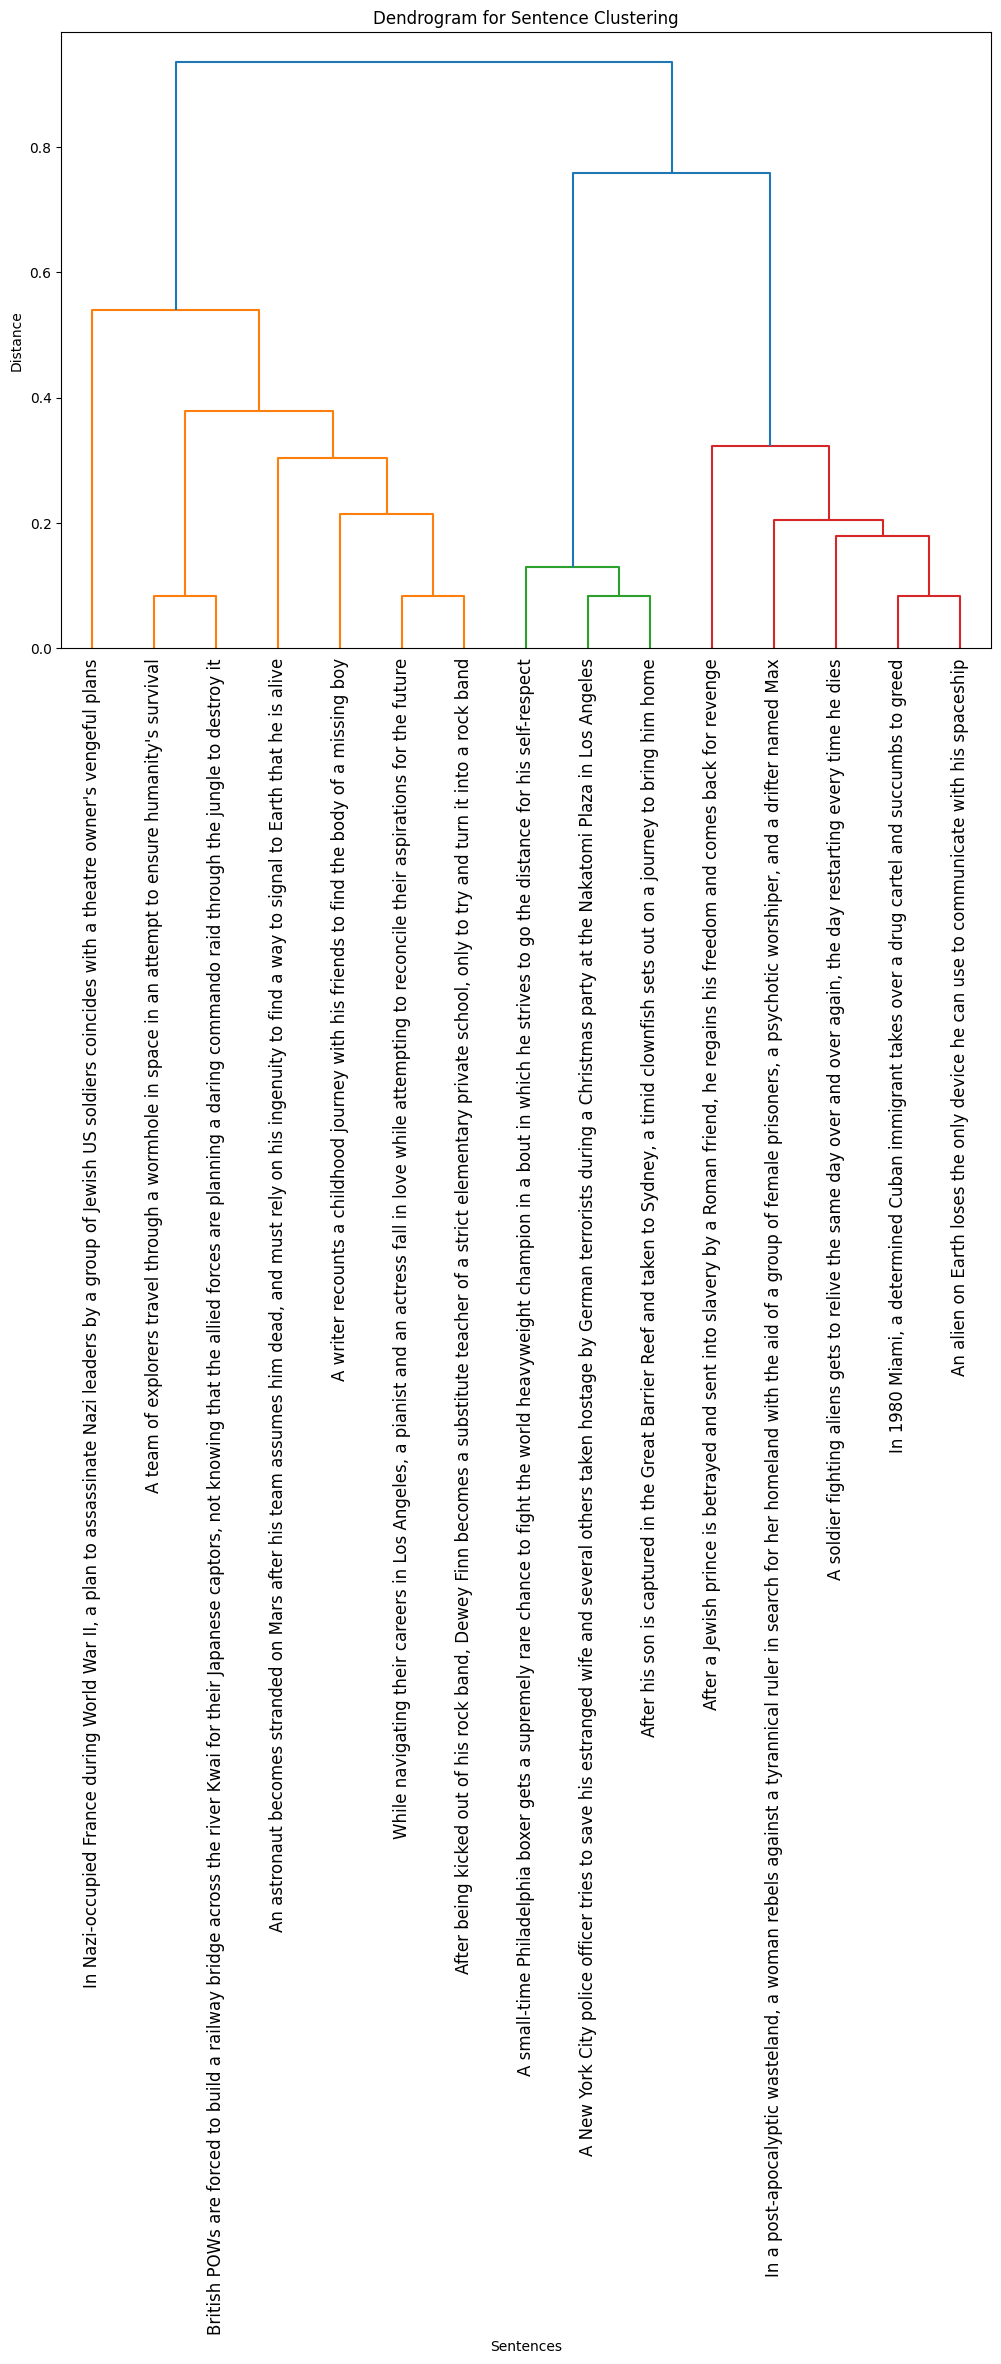

In [ ]:
import spacy
import networkx as nx
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from karateclub import Graph2Vec
from grakel import GraphKernel
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load spaCy model
nlp = spacy.load('en_core_web_md')

def preprocess_text(text):
    """Lowercase the text without removing punctuation."""
    return text.lower()

def build_semantic_graph(sentence):
    """Build a semantic graph for a sentence including named entities."""
    # sentence = preprocess_text(sentence)
    doc = nlp(sentence)
    G = nx.Graph()
    for token in doc:
        G.add_node(token.i, word=token.text, pos=token.pos_, lemma=token.lemma_, dep=token.dep_)
        if token.head != token:
            G.add_edge(token.i, token.head.i, relation=token.dep_)
    for ent in doc.ents:
        G.add_node(ent.start, word=ent.text, label=ent.label_)
    return G

def convert_nx_to_grakel(graph):
    """Convert a NetworkX graph to the format required by grakel."""
    adj_matrix = nx.to_numpy_array(graph)
    node_labels = {node: graph.nodes[node]['word'] for node in graph.nodes}
    grakel_graph = (adj_matrix, node_labels)
    return grakel_graph

def create_graph_embeddings(graphs):
    """Create embeddings for a list of graphs using Graph2Vec."""
    model = Graph2Vec(dimensions=128, epochs=15, workers=4)
    model.fit(graphs)
    return model.get_embedding()

def calculate_graph_kernels(graphs):
    """Calculate graph kernels for a list of graphs."""
    grakel_graphs = [convert_nx_to_grakel(graph) for graph in graphs]
    gk = GraphKernel(kernel=["weisfeiler_lehman"], normalize=True)
    kernel_matrix = gk.fit_transform(grakel_graphs)
    return kernel_matrix

def perform_dimensionality_reduction(embeddings):
    """Reduce dimensionality of graph embeddings using t-SNE for better separation."""
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    reduced_embeddings = tsne.fit_transform(embeddings)
    return reduced_embeddings

def scale_similarity_matrix(similarity_matrix):
    """Scale similarity matrix to ensure it lies within 0 to 1 range."""
    scaler = MinMaxScaler()
    scaled_matrix = scaler.fit_transform(similarity_matrix)
    return scaled_matrix

def semantic_aware_sparsification(sim_matrix, threshold=0.5):
    """Apply semantic-aware sparsification to the similarity matrix."""
    sparse_matrix = np.where(sim_matrix > threshold, sim_matrix, 0)
    return sparse_matrix

def contrastive_loss(sim_matrix, positive_pairs, negative_pairs):
    """Calculate contrastive loss to refine the similarity matrix."""
    pos_loss = np.sum(1 - sim_matrix[positive_pairs])  # Push positive pairs closer
    neg_loss = np.sum(sim_matrix[negative_pairs])      # Push negative pairs apart
    return pos_loss + neg_loss

def refine_similarity_matrix_with_contrastive_learning(sim_matrix):
    """Refine the similarity matrix using contrastive learning."""
    sparse_sim_matrix = semantic_aware_sparsification(sim_matrix)
    positive_pairs = np.where(sparse_sim_matrix > 0.7)
    negative_pairs = np.where(sparse_sim_matrix < 0.3)
    loss = contrastive_loss(sparse_sim_matrix, positive_pairs, negative_pairs)
    refined_matrix = sparse_sim_matrix - loss * 0.01
    refined_matrix = np.clip(refined_matrix, 0, 1)
    return refined_matrix

def calculate_inertia(similarity_matrix, k_range):
    """Calculate inertia for a range of cluster numbers."""
    inertias = []
    for k in k_range:
        clustering = AgglomerativeClustering(n_clusters=k, linkage='average')
        labels = clustering.fit_predict(1 - similarity_matrix)
        inertia = 0
        for i in range(k):
            cluster_points = similarity_matrix[np.ix_(labels == i, labels == i)]
            if len(cluster_points) > 1:
                inertia += np.sum(1 - np.dot(cluster_points, cluster_points.T))
        inertias.append(inertia)
    return inertias

def find_optimal_clusters(inertias, k_range):
    """Automatically find the optimal number of clusters using the elbow method."""
    if len(inertias) > 1:
        second_derivative = np.diff(inertias, 2)
        optimal_k = k_range[np.argmin(second_derivative) + 1]
    else:
        optimal_k = k_range[0]
    return optimal_k

def cluster_sentences(paragraph):
    """Main function to cluster sentences based on refined semantic graph similarity."""
    sentences = [sent.strip() for sent in paragraph.split('.') if sent.strip()]

    graphs = [build_semantic_graph(sent) for sent in sentences]

    if not graphs:
        print("No valid graphs to process.")
        return

    graph_embeddings = create_graph_embeddings(graphs)
    kernel_matrix = calculate_graph_kernels(graphs)
    reduced_embeddings = perform_dimensionality_reduction(graph_embeddings)

    combined_matrix = np.zeros((len(sentences), len(sentences)))
    alpha = 0.7
    beta = 0.3
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            embedding_sim = np.dot(reduced_embeddings[i], reduced_embeddings[j])
            kernel_sim = kernel_matrix[i, j]
            combined_matrix[i, j] = alpha * embedding_sim + beta * kernel_sim

    scaled_combined_matrix = scale_similarity_matrix(combined_matrix)

    # Integrate contrastive learning refinement here
    refined_similarity_matrix = refine_similarity_matrix_with_contrastive_learning(scaled_combined_matrix)

    distance_matrix = 1 - refined_similarity_matrix
    np.fill_diagonal(distance_matrix, 0)

    k_range = range(2, min(len(sentences), 10) + 1)
    inertias = calculate_inertia(refined_similarity_matrix, k_range)
    optimal_k = find_optimal_clusters(inertias, k_range)
    print(f"Optimal number of clusters: {optimal_k}")

    clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        linkage='average'
    )
    labels = clustering.fit_predict(distance_matrix)

    silhouette_avg = silhouette_score(distance_matrix, labels, metric='precomputed')
    print(f"Silhouette Score: {silhouette_avg}")

    clusters = {}
    for label, sentence in zip(labels, sentences):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(sentence)

    for cluster_id, cluster_sentences in clusters.items():
        print(f"\nCluster {cluster_id} (size {len(cluster_sentences)}):")
        for sentence in cluster_sentences:
            print(f"  - {sentence}")

    plt.figure(figsize=(10, 8))
    plt.imshow(refined_similarity_matrix, cmap='viridis')
    plt.colorbar()
    plt.title("Sentence Similarity Matrix")
    plt.show()

    linkage_matrix = linkage(distance_matrix[np.triu_indices_from(distance_matrix, k=1)], method='average')
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=sentences, orientation='top', leaf_rotation=90)
    plt.title("Dendrogram for Sentence Clustering")
    plt.xlabel("Sentences")
    plt.ylabel("Distance")
    plt.show()

# Example test case
paragraph = """
A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.
In Nazi-occupied France during World War II, a plan to assassinate Nazi leaders by a group of Jewish US soldiers coincides with a theatre owner's vengeful plans.
In 1980 Miami, a determined Cuban immigrant takes over a drug cartel and succumbs to greed.
A New York City police officer tries to save his estranged wife and several others taken hostage by German terrorists during a Christmas party at the Nakatomi Plaza in Los Angeles.
An alien on Earth loses the only device he can use to communicate with his spaceship.
In a post-apocalyptic wasteland, a woman rebels against a tyrannical ruler in search for her homeland with the aid of a group of female prisoners, a psychotic worshiper, and a drifter named Max.
After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home.
A writer recounts a childhood journey with his friends to find the body of a missing boy.
A small-time Philadelphia boxer gets a supremely rare chance to fight the world heavyweight champion in a bout in which he strives to go the distance for his self-respect.
After a Jewish prince is betrayed and sent into slavery by a Roman friend, he regains his freedom and comes back for revenge.
British POWs are forced to build a railway bridge across the river Kwai for their Japanese captors, not knowing that the allied forces are planning a daring commando raid through the jungle to destroy it.
While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future.
After being kicked out of his rock band, Dewey Finn becomes a substitute teacher of a strict elementary private school, only to try and turn it into a rock band.
An astronaut becomes stranded on Mars after his team assumes him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive.
A soldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies.
"""

# Run the sentence clustering function
cluster_sentences(paragraph)


Optimal number of clusters: 6
Silhouette Score: 0.11388228836911386

Cluster 2 (size 4):
  - Sloppy England shocked by Windies at World Cup
  - Oscars 2022: The best picture nominees in 60 seconds
  - Chancellor Rishi Sunak to deliver Spring Statement amid price pressure
  - Ukraine conflict: What is Nato and how has it responded to Russia

Cluster 5 (size 2):
  - Bafta Awards 2022: Stars prepare to return to in-person ceremony
  - Shane Warne: Australian cricket legend died from natural causes

Cluster 3 (size 1):
  - Northern Lights: Powerful aurora borealis display above Scotland

Cluster 4 (size 1):
  - North Korea fires missile but launch fails, says South

Cluster 1 (size 3):
  - Heathrow Airport drops Covid face mask rules
  - First pictures of earthquake hitting Japan
  - Rafael Nadal out for up to six weeks with rib injury

Cluster 0 (size 3):
  - Fears Russia will not be able to pay its debts mount
  - China plane crash: Search and rescue operation halted by rain
  - Can tech

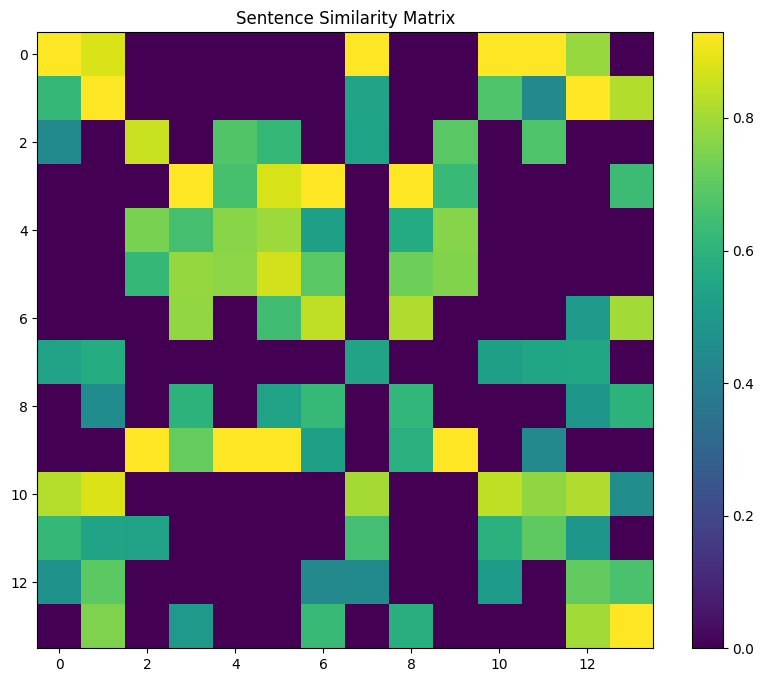

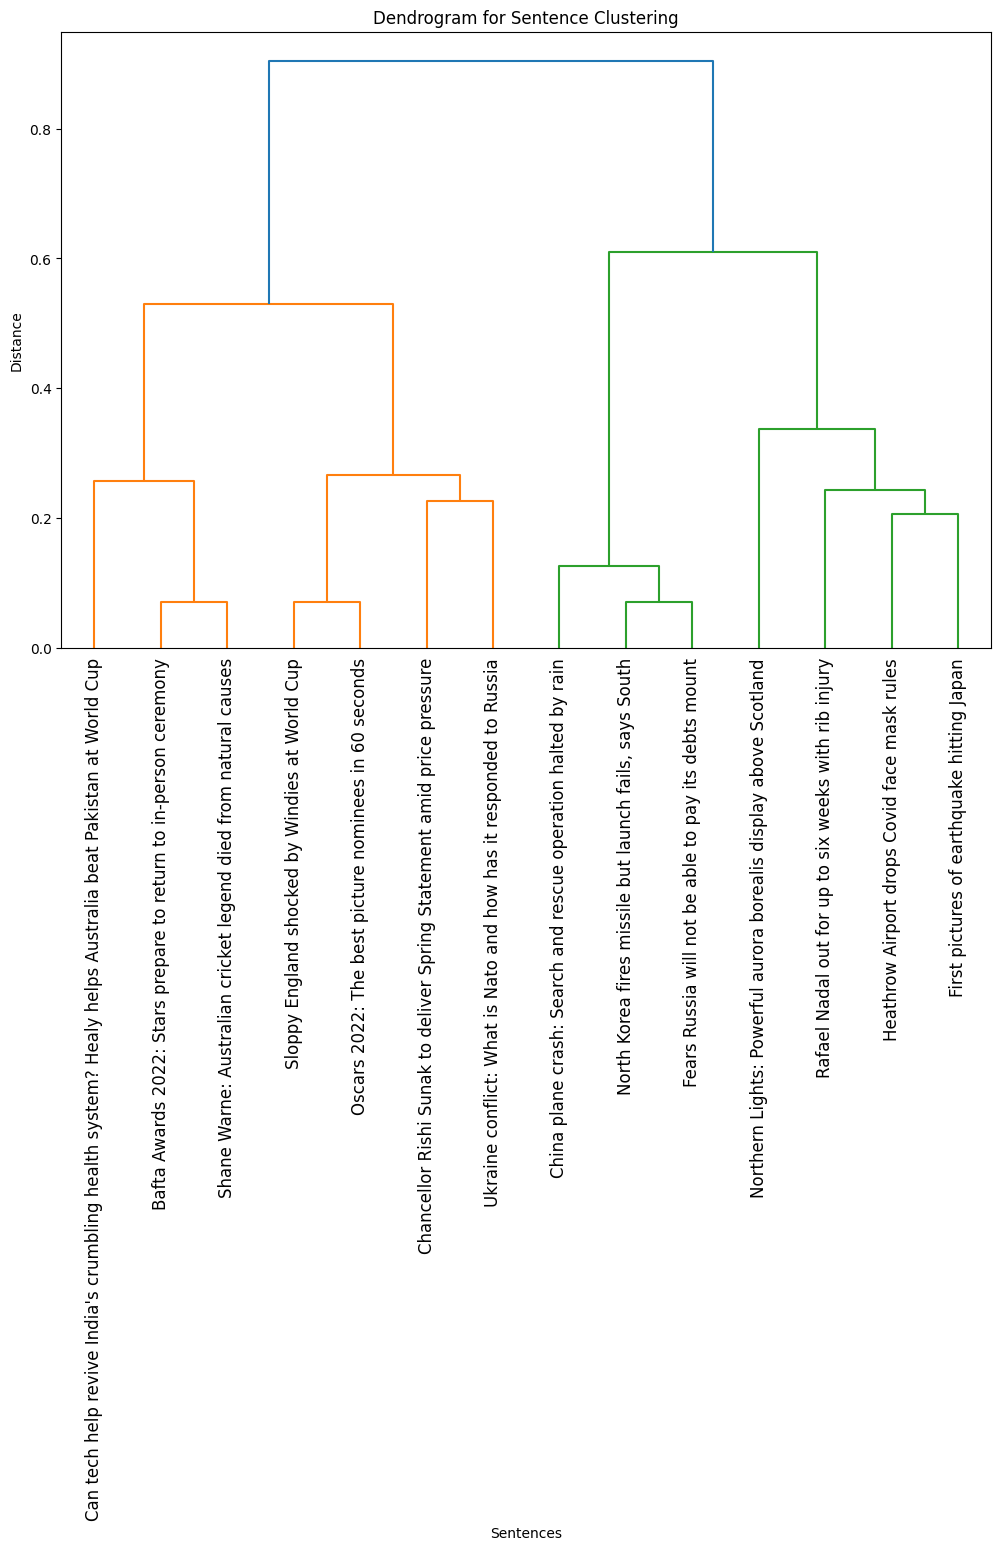

In [ ]:
paragraph = """
Sloppy England shocked by Windies at World Cup. Bafta Awards 2022: Stars prepare to return to in-person ceremony. Northern Lights: Powerful aurora borealis display above Scotland. North Korea fires missile but launch fails, says South. Heathrow Airport drops Covid face mask rules. First pictures of earthquake hitting Japan. Fears Russia will not be able to pay its debts mount. Oscars 2022: The best picture nominees in 60 seconds. China plane crash: Search and rescue operation halted by rain. Rafael Nadal out for up to six weeks with rib injury. Chancellor Rishi Sunak to deliver Spring Statement amid price pressure. Ukraine conflict: What is Nato and how has it responded to Russia. Shane Warne: Australian cricket legend died from natural causes. Can tech help revive India's crumbling health system? Healy helps Australia beat Pakistan at World Cup.
"""
cluster_sentences(paragraph)

Optimal number of clusters: 3
Silhouette Score: 0.5705553005876364

Cluster 0 (size 4):
  - Optimal Order Execution subject to Reservation Strategies under Execution Risk
  - Accuracy of the mean-field theory in describing ground-state properties of light nuclei
  - Nonthermal driving forces in cells revealed by nonequilibrium fluctuations
  - Multivariate Quantiles: Geometric and Measure-Transportation-Based Contours

Cluster 2 (size 4):
  - Economic Forces in Stock Returns
  - Scaling Laws And Statistical Properties of The Transaction Flows And Holding Times of Bitcoin
  - Economic Struggles and Inflation: How Does that affect voting decision? Towards Enhanced Context Awareness with Vision-based Multimodal Interfaces
  - Consistency Based Weakly Self-Supervised Learning for Human Activity Recognition with Wearables

Cluster 1 (size 6):
  - Multi-task Heterogeneous Graph Learning on Electronic Health Records
  - A systematic dataset generation technique applied to data-driven automoti

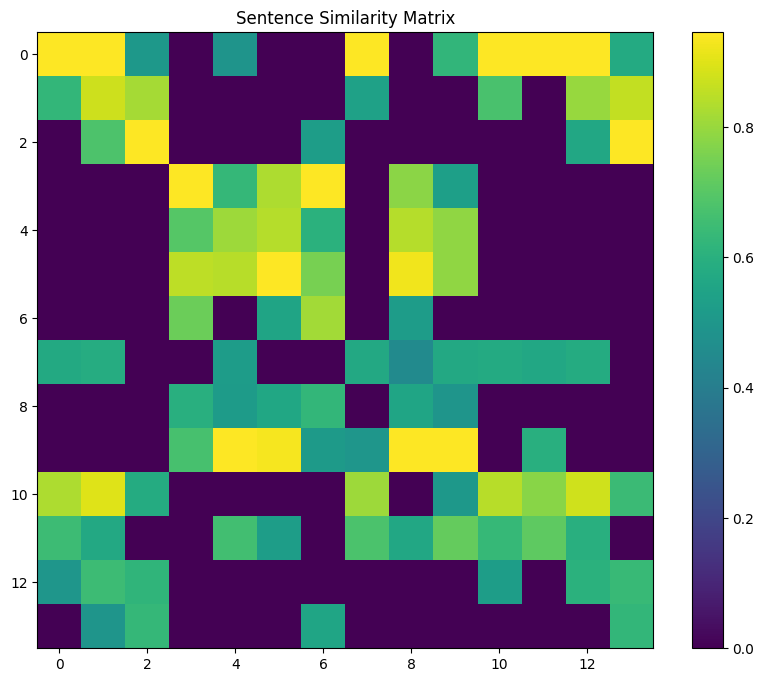

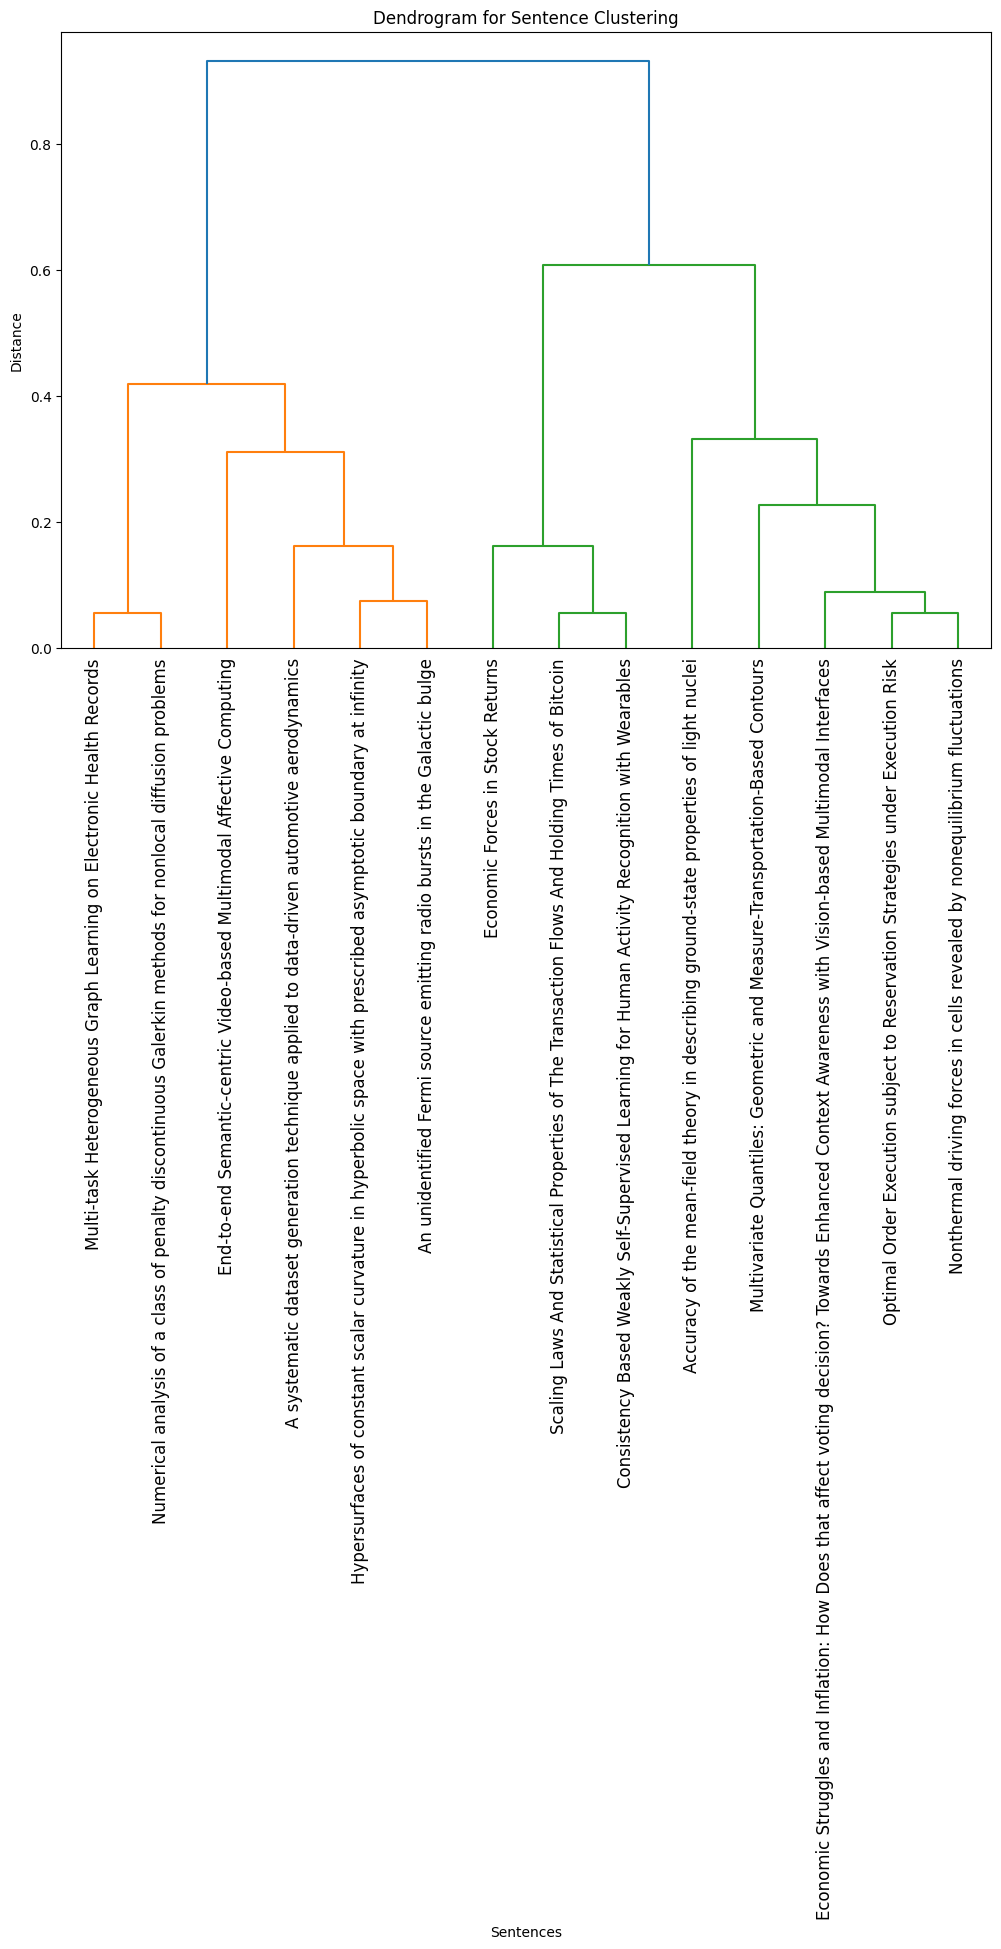

In [ ]:
paragraph = """
Optimal Order Execution subject to Reservation Strategies under Execution Risk. Economic Forces in Stock Returns. Scaling Laws And Statistical Properties of The Transaction Flows And Holding Times of Bitcoin. Multi-task Heterogeneous Graph Learning on Electronic Health Records. A systematic dataset generation technique applied to data-driven automotive aerodynamics. Hypersurfaces of constant scalar curvature in hyperbolic space with prescribed asymptotic boundary at infinity. Numerical analysis of a class of penalty discontinuous Galerkin methods for nonlocal diffusion problems. Accuracy of the mean-field theory in describing ground-state properties of light nuclei. An unidentified Fermi source emitting radio bursts in the Galactic bulge. End-to-end Semantic-centric Video-based Multimodal Affective Computing. Nonthermal driving forces in cells revealed by nonequilibrium fluctuations. Multivariate Quantiles: Geometric and Measure-Transportation-Based Contours. Economic Struggles and Inflation: How Does that affect voting decision? Towards Enhanced Context Awareness with Vision-based Multimodal Interfaces. Consistency Based Weakly Self-Supervised Learning for Human Activity Recognition with Wearables.
"""

# Run the sentence clustering function
cluster_sentences(paragraph)


Optimal number of clusters: 5
Silhouette Score: 0.06934575870871938

Cluster 0 (size 8):
  - A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival
  - A New York City police officer tries to save his estranged wife and several others taken hostage by terrorists during a Christmas party at the Nakatomi Plaza in Los Angeles
  - His innocent nature and child-like questions force the country to evaluate the impact of religious views on people
  - A writer recounts a childhood journey with his friends to find the body of a missing boy
  - A small-time Philadelphia boxer gets a supremely rare chance to fight the world heavyweight champion in a bout in which he strives to go the distance for his self-respect
  - While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future
  - After being kicked out of his rock band, Dewey Finn becomes a substitute teacher of an u

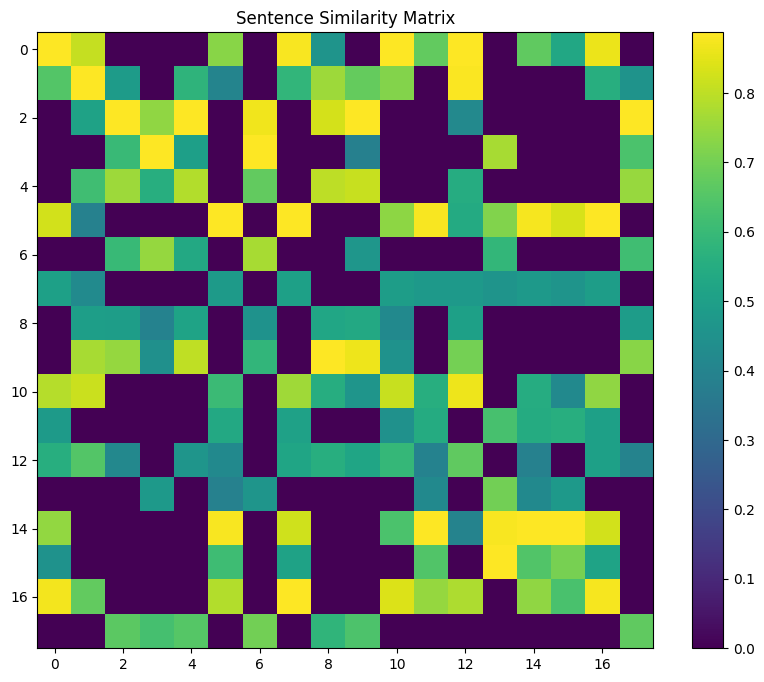

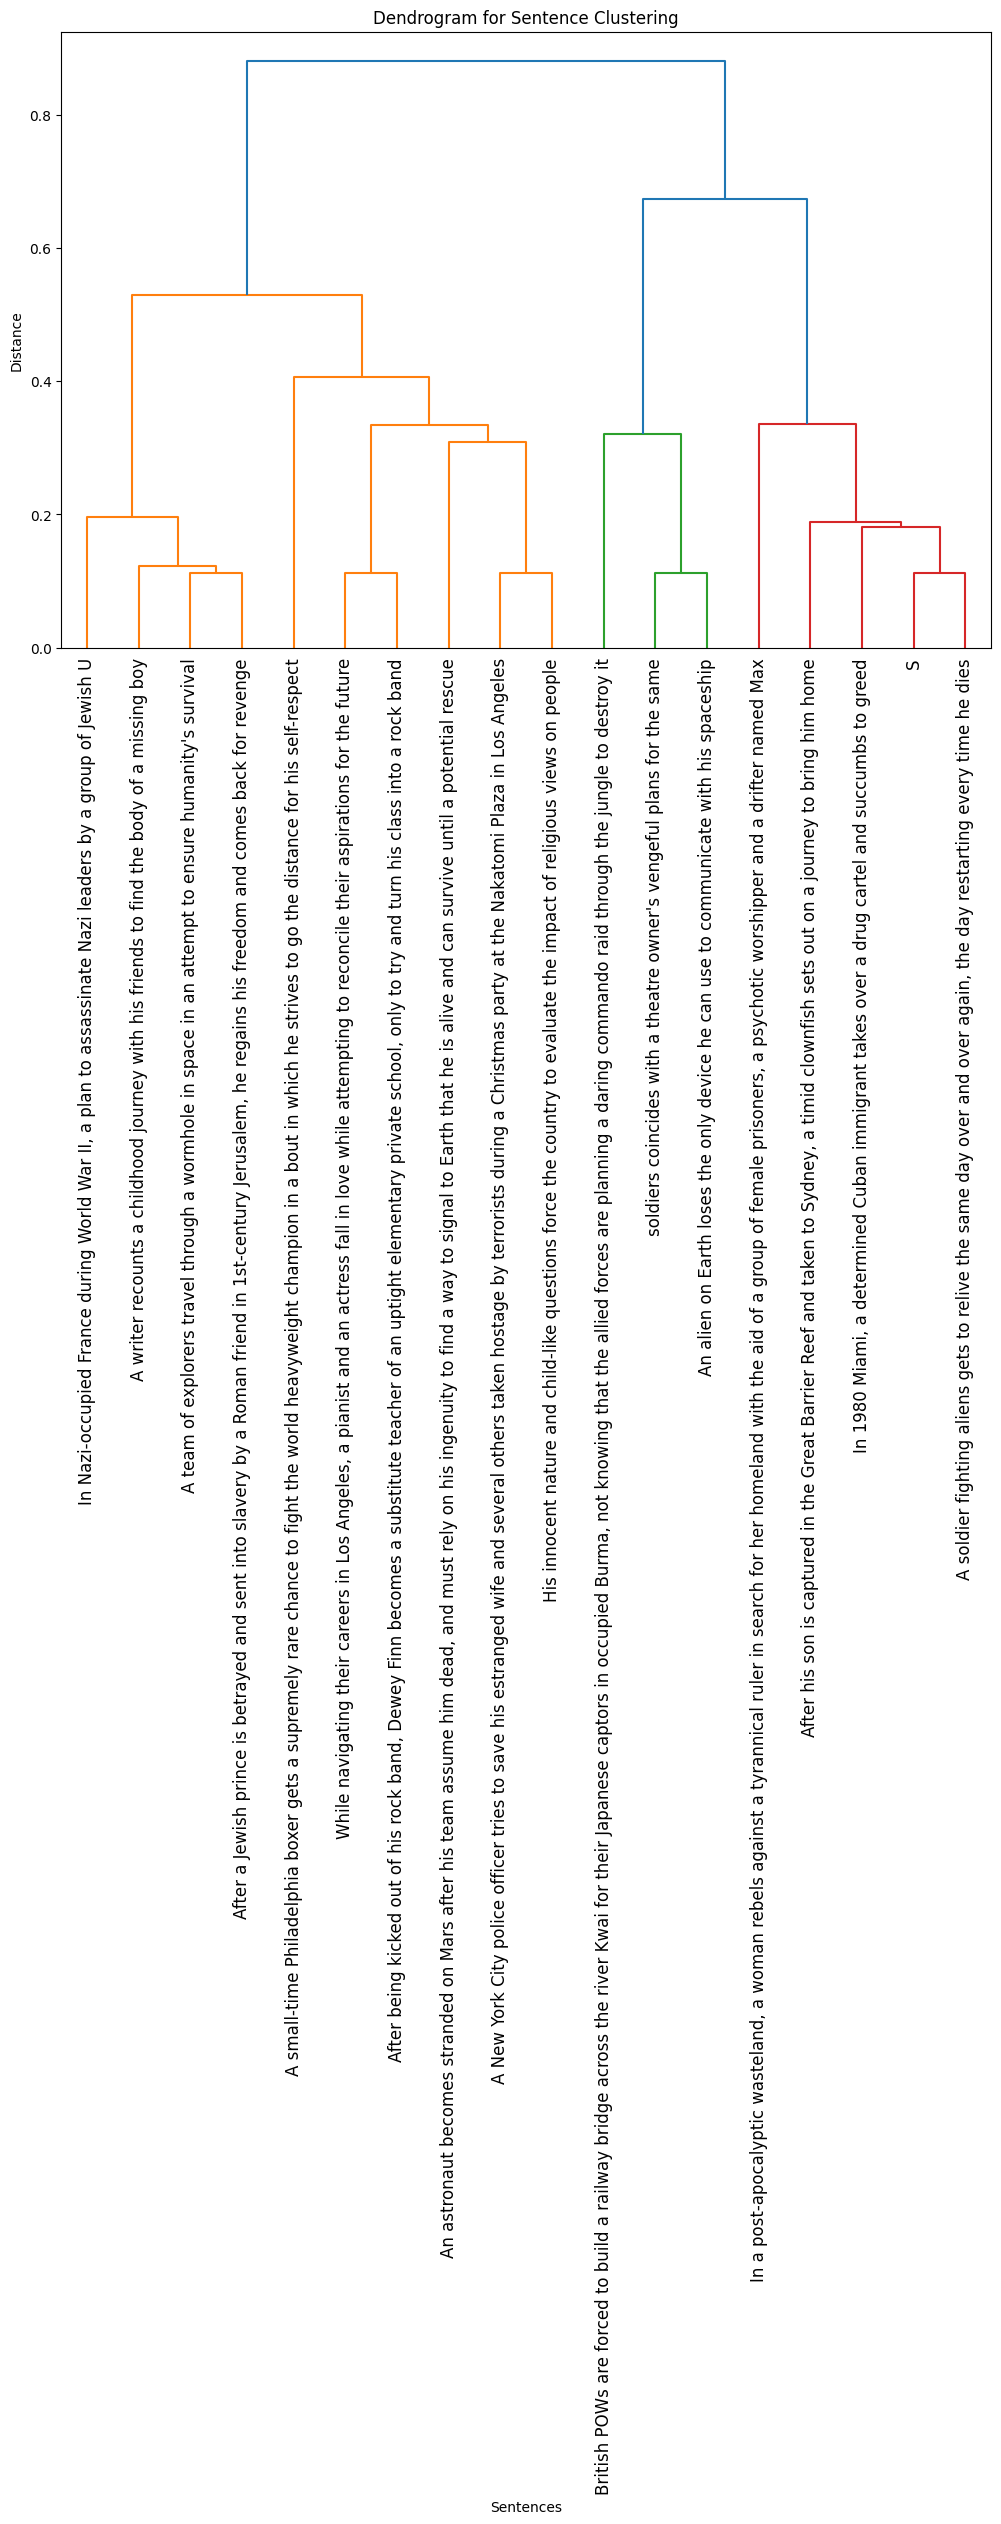

In [ ]:
paragraph = """
A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival. In Nazi-occupied France during World War II, a plan to assassinate Nazi leaders by a group of Jewish U.S. soldiers coincides with a theatre owner's vengeful plans for the same. In 1980 Miami, a determined Cuban immigrant takes over a drug cartel and succumbs to greed. A New York City police officer tries to save his estranged wife and several others taken hostage by terrorists during a Christmas party at the Nakatomi Plaza in Los Angeles. An alien on Earth loses the only device he can use to communicate with his spaceship. His innocent nature and child-like questions force the country to evaluate the impact of religious views on people. In a post-apocalyptic wasteland, a woman rebels against a tyrannical ruler in search for her homeland with the aid of a group of female prisoners, a psychotic worshipper and a drifter named Max. After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home. A writer recounts a childhood journey with his friends to find the body of a missing boy. A small-time Philadelphia boxer gets a supremely rare chance to fight the world heavyweight champion in a bout in which he strives to go the distance for his self-respect. After a Jewish prince is betrayed and sent into slavery by a Roman friend in 1st-century Jerusalem, he regains his freedom and comes back for revenge. British POWs are forced to build a railway bridge across the river Kwai for their Japanese captors in occupied Burma, not knowing that the allied forces are planning a daring commando raid through the jungle to destroy it. While navigating their careers in Los Angeles, a pianist and an actress fall in love while attempting to reconcile their aspirations for the future. After being kicked out of his rock band, Dewey Finn becomes a substitute teacher of an uptight elementary private school, only to try and turn his class into a rock band. An astronaut becomes stranded on Mars after his team assume him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive and can survive until a potential rescue. A soldier fighting aliens gets to relive the same day over and over again, the day restarting every time he dies.
"""

# Run the sentence clustering function
cluster_sentences(paragraph)


Optimal number of clusters: 4
Silhouette Score: 0.24036730606425788

Cluster 0 (size 4):
  - A lightweight, water-resistant backpack with multiple compartments for easy organization, ideal for travel and outdoor adventures
  - A sleek, stainless steel smartwatch with fitness tracking, GPS, and heart rate monitoring, compatible with both Android and iOS devices
  - A pair of wireless earbuds with sweat-resistant coating, perfect for workouts and high-fidelity audio playback
  - An ergonomic office chair with adjustable armrests, lumbar support, and a breathable mesh backrest

Cluster 2 (size 2):
  - A pack of 12 eco-friendly bamboo toothbrushes, biodegradable and suitable for sensitive teeth
  - A premium leather wallet with RFID protection, multiple card slots, and a coin pouch, available in different colors

Cluster 1 (size 3):
  - A noise-canceling over-ear headphone with deep bass, 30-hour battery life, and a built-in microphone for calls
  - A 4K Ultra HD smart TV with voice contro

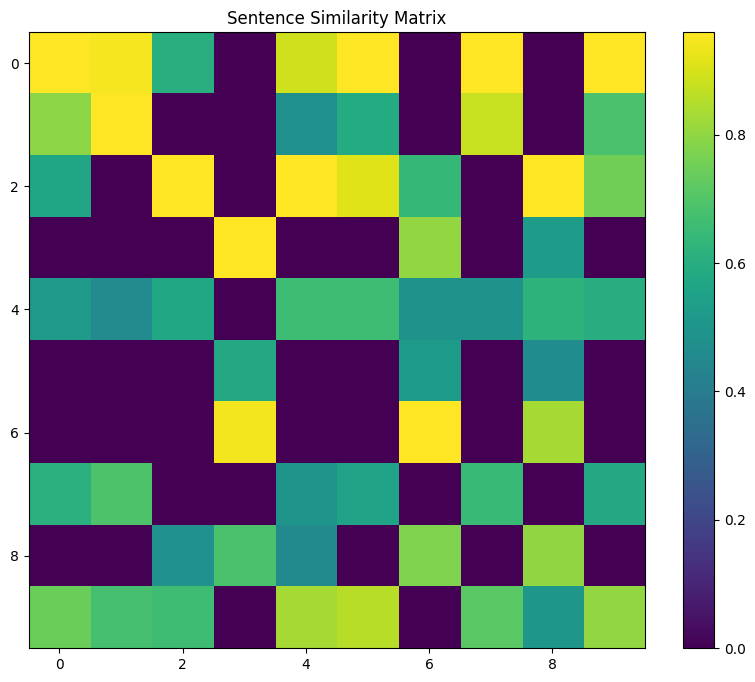

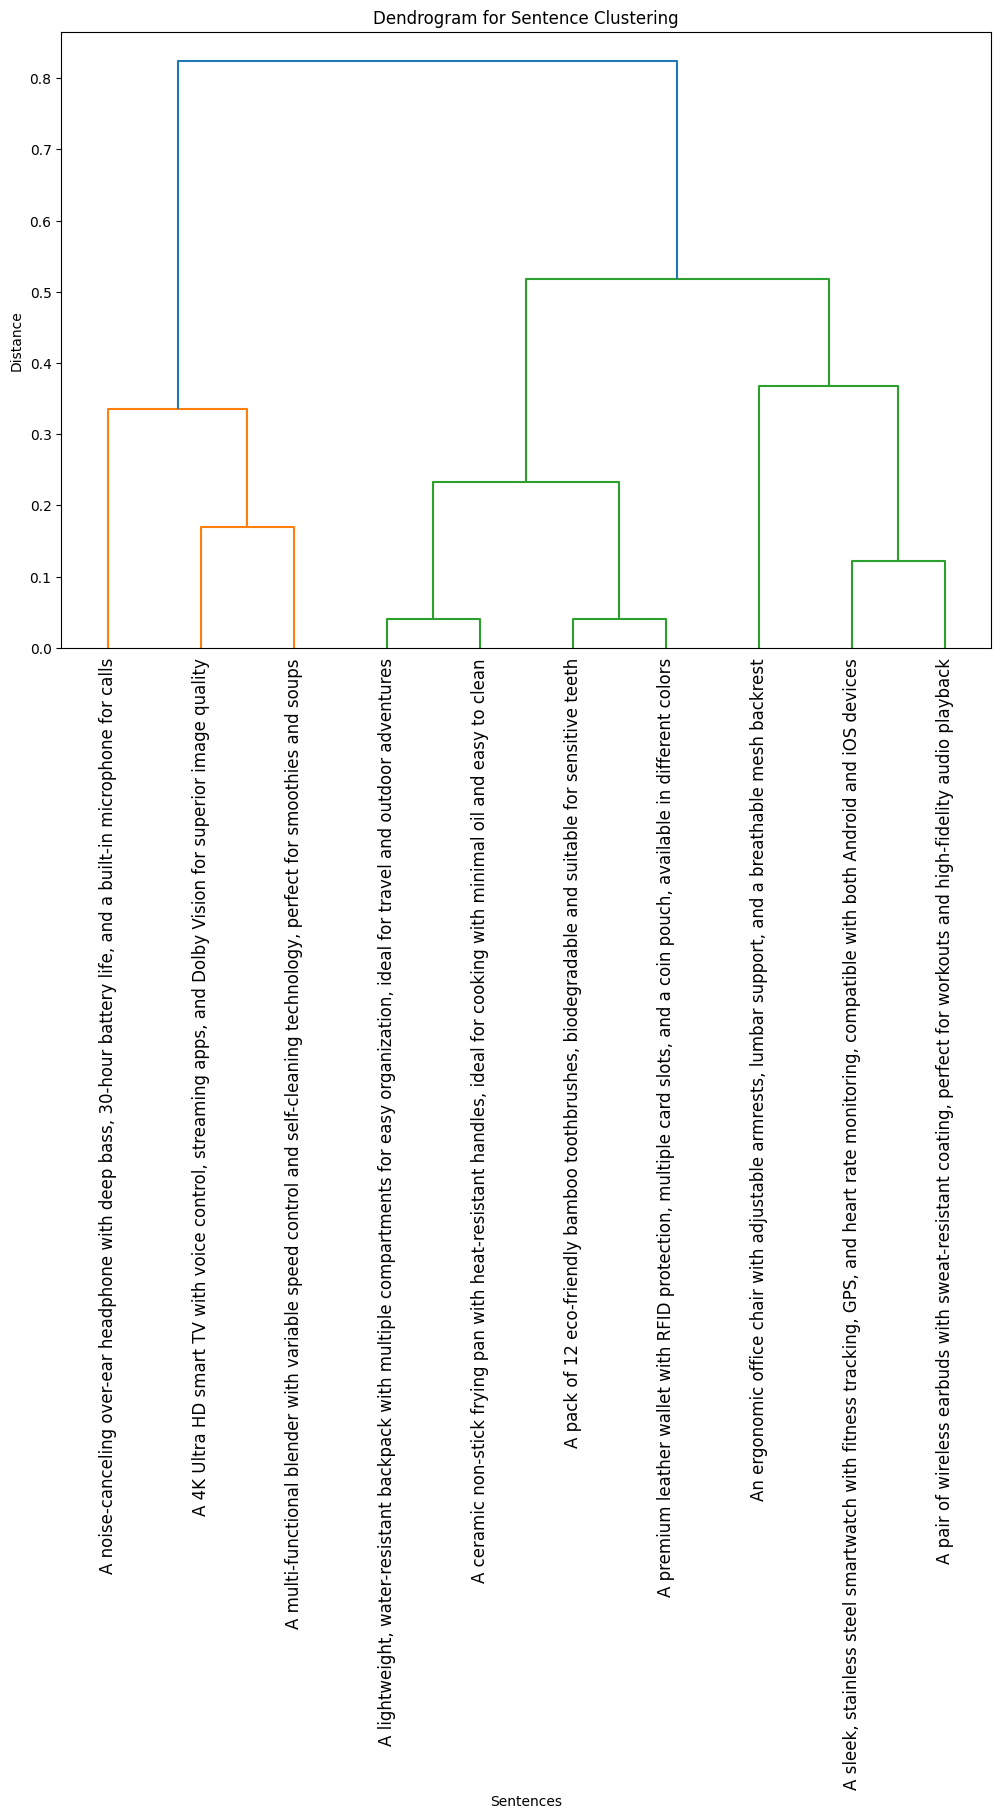

In [ ]:
paragraph = """
A lightweight, water-resistant backpack with multiple compartments for easy organization, ideal for travel and outdoor adventures. A sleek, stainless steel smartwatch with fitness tracking, GPS, and heart rate monitoring, compatible with both Android and iOS devices. A pack of 12 eco-friendly bamboo toothbrushes, biodegradable and suitable for sensitive teeth. A noise-canceling over-ear headphone with deep bass, 30-hour battery life, and a built-in microphone for calls. A premium leather wallet with RFID protection, multiple card slots, and a coin pouch, available in different colors. A ceramic non-stick frying pan with heat-resistant handles, ideal for cooking with minimal oil and easy to clean. A 4K Ultra HD smart TV with voice control, streaming apps, and Dolby Vision for superior image quality. A pair of wireless earbuds with sweat-resistant coating, perfect for workouts and high-fidelity audio playback. A multi-functional blender with variable speed control and self-cleaning technology, perfect for smoothies and soups. An ergonomic office chair with adjustable armrests, lumbar support, and a breathable mesh backrest.
"""

# Run the sentence clustering function
cluster_sentences(paragraph)


Optimal number of clusters: 7
Silhouette Score: -0.001420389996219773

Cluster 2 (size 2):
  - Looking for a software engineer proficient in Python and JavaScript to work on full-stack development with experience in Django and React
  - We are hiring a customer support specialist to manage client queries and provide exceptional service through multiple channels, including chat, phone, and email

Cluster 4 (size 1):
  - Seeking a marketing specialist with expertise in SEO, content strategy, and social media management to develop and execute digital marketing campaigns

Cluster 3 (size 1):
  - Hiring a financial analyst to perform data-driven analysis, generate financial reports, and assist in strategic decision-making

Cluster 0 (size 3):
  - Looking for a machine learning engineer experienced in building models using TensorFlow and PyTorch to work on predictive analytics projects
  - Hiring a data scientist with experience in statistical modeling, data mining, and visualization tools l

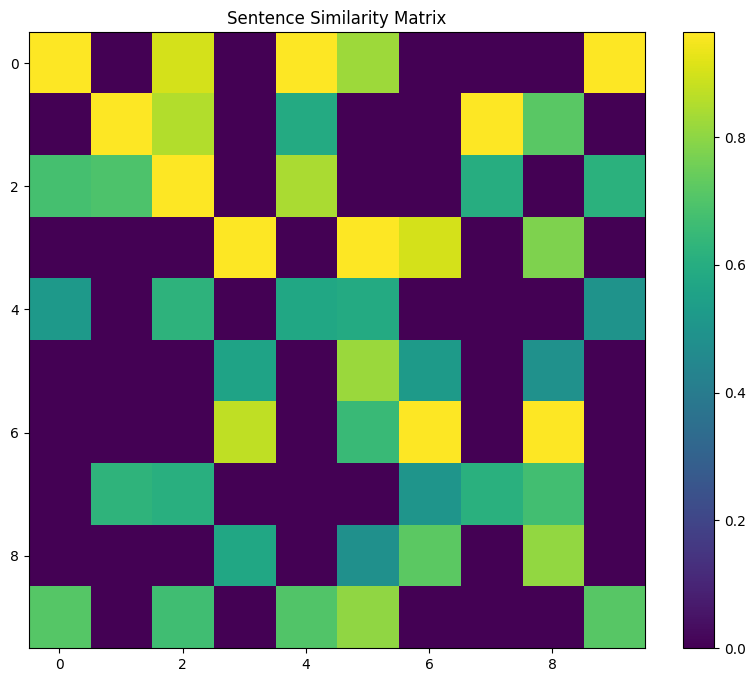

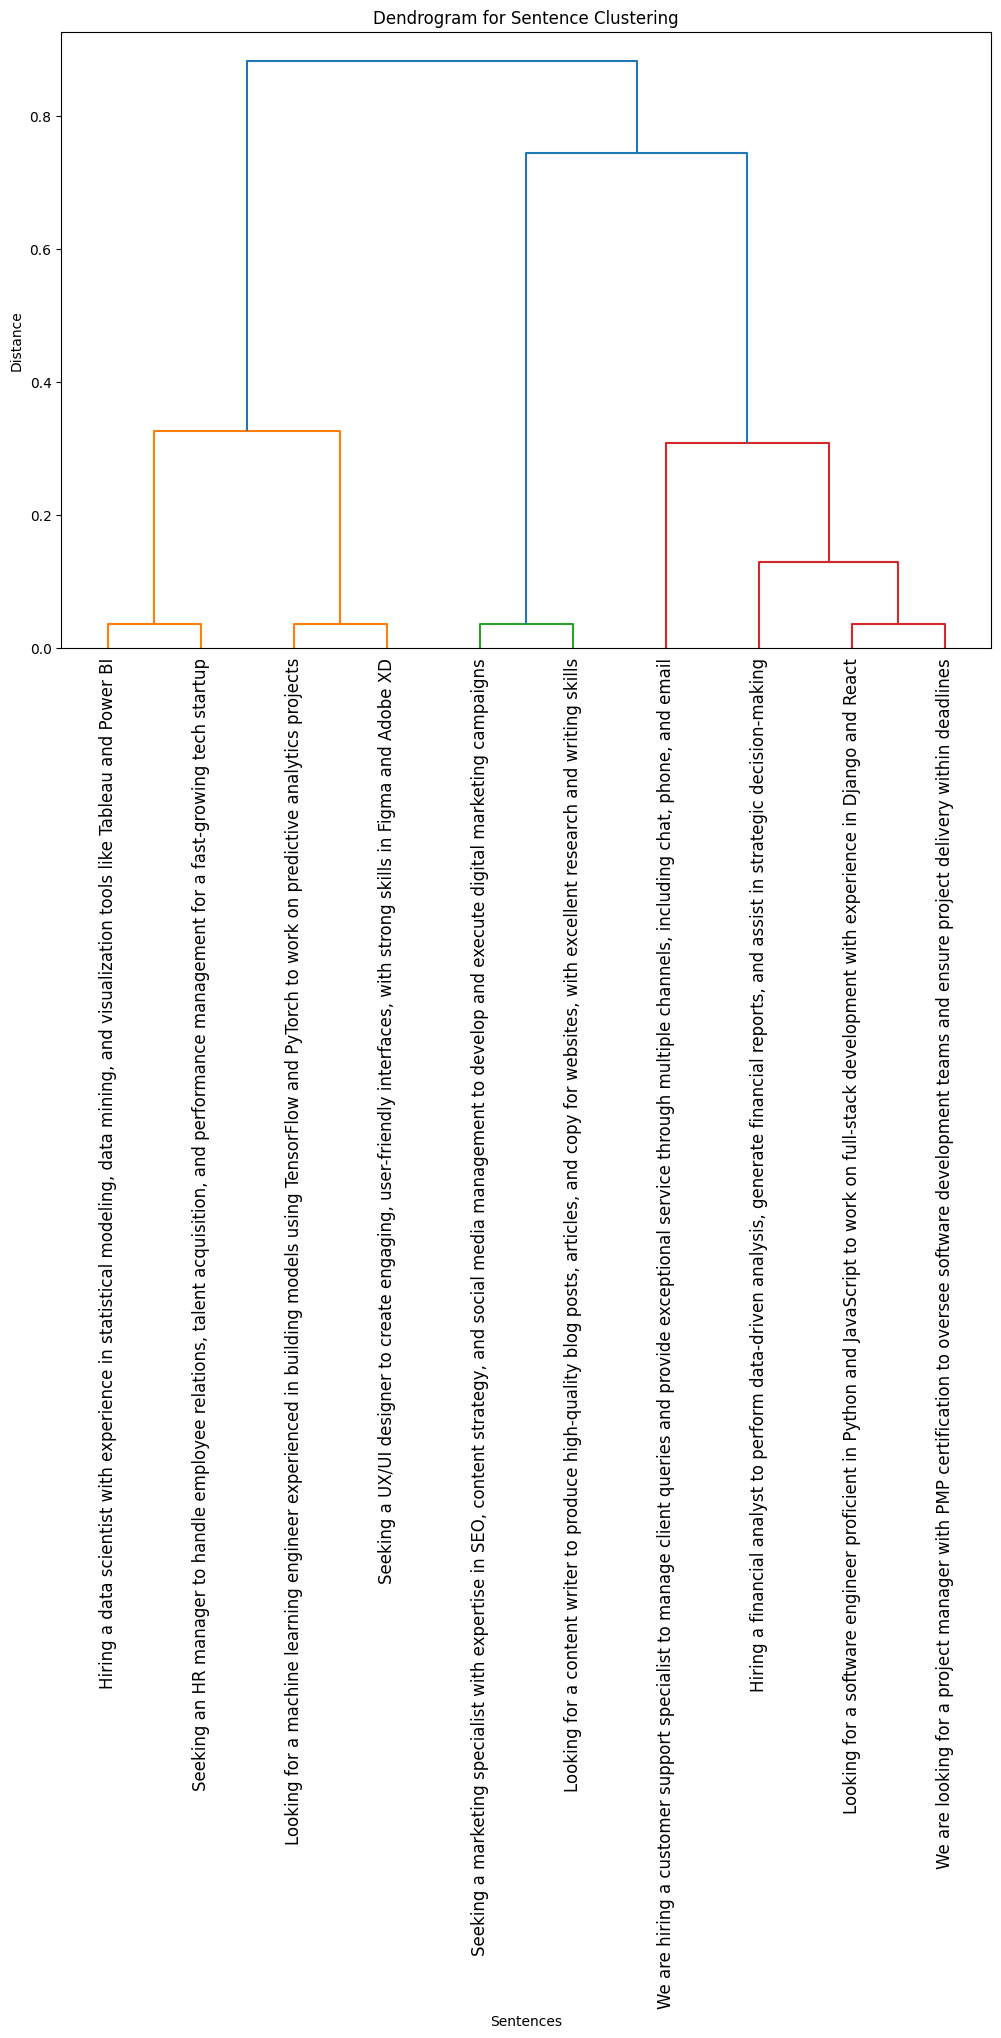

In [ ]:
paragraph = """
Looking for a software engineer proficient in Python and JavaScript to work on full-stack development with experience in Django and React. Seeking a marketing specialist with expertise in SEO, content strategy, and social media management to develop and execute digital marketing campaigns. Hiring a financial analyst to perform data-driven analysis, generate financial reports, and assist in strategic decision-making. Looking for a machine learning engineer experienced in building models using TensorFlow and PyTorch to work on predictive analytics projects. We are looking for a project manager with PMP certification to oversee software development teams and ensure project delivery within deadlines. Seeking a UX/UI designer to create engaging, user-friendly interfaces, with strong skills in Figma and Adobe XD. Hiring a data scientist with experience in statistical modeling, data mining, and visualization tools like Tableau and Power BI. Looking for a content writer to produce high-quality blog posts, articles, and copy for websites, with excellent research and writing skills. Seeking an HR manager to handle employee relations, talent acquisition, and performance management for a fast-growing tech startup. We are hiring a customer support specialist to manage client queries and provide exceptional service through multiple channels, including chat, phone, and email.
"""

# Run the sentence clustering function
cluster_sentences(paragraph)
